<a href="https://colab.research.google.com/github/sgevatschnaider/GraphAI-Data-Science-ML/blob/main/notebooks/Automatas_celulares_ejercicios_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import display, HTML


questions_data_completo = [
    {
        "id_num": 1,
        "pregunta": "1. ¿Cuál es la regla de infección fundamental en el modelo de propagación de infección presentado y por qué se considera un modelo de \"umbral\"?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La regla de infección fundamental es: "Una celda no infectada se infecta en el siguiente paso de tiempo si y solo si al menos <strong>dos</strong> de sus cuatro vecinos ortogonales (vecindario de Von Neumann) ya están infectados. Una celda que se infecta, permanece infectada (monotonicidad)."</p>
<p>Se considera un modelo de "umbral" porque una celda sana necesita alcanzar un cierto número mínimo de vecinos infectados (el umbral, que es \\(T=2\\) en este caso) para cambiar su estado de no infectada a infectada. Si el número de vecinos infectados está por debajo de este umbral, la celda no se infecta por propagación social/local.</p>
"""
    },
    {
        "id_num": 2,
        "pregunta": "2. Explique brevemente el Teorema Clave sobre el número mínimo de celdas inicialmente infectadas (\\(k\\)) para tener la posibilidad de infectar toda una cuadrícula \\(N \\times N\\) (donde N es la dimensión de un lado de la cuadrícula).",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El Teorema Clave establece que se necesitan al menos \\(N\\) celdas inicialmente infectadas (donde \\(N\\) es la longitud de un lado de la cuadrícula cuadrada \\(N \\times N\\)) para tener la posibilidad de infectar toda la cuadrícula. Es decir, si el número inicial de celdas infectadas \\(k\\) es menor que la dimensión \\(N\\) de la cuadrícula (\\(k < N\\)), es imposible infectar la totalidad de la cuadrícula.</p>
<p>La demostración rigurosa de este teorema utiliza el Principio del Palomar: si se tienen \\(k\\) celdas infectadas (palomas) y \\(N\\) filas (palomares), y \\(k < N\\), entonces al menos una fila debe estar completamente vacía de celdas infectadas inicialmente. Se demuestra por inducción que ninguna celda en esta fila inicialmente vacía podrá infectarse jamás, ya que necesitaría dos vecinos infectados, y sus vecinos horizontales en la misma fila nunca se infectarán. Un argumento similar aplica para las columnas.</p>
"""
    },
    {
        "id_num": 3,
        "pregunta": "3. ¿Qué es el \"vecindario de Von Neumann\" y cómo se diferencia del \"vecindario de Moore\" en el contexto de los ACs?",
        "respuesta_html": """
<p><strong>Respuesta:</strong></p>
<ul>
    <li>El <strong>vecindario de Von Neumann</strong> para una celda \\((i,j)\\) en una cuadrícula 2D incluye a sus cuatro vecinos ortogonales directos: arriba \\((i-1,j)\\), abajo \\((i+1,j)\\), izquierda \\((i,j-1)\\) y derecha \\((i,j+1)\\). No considera los vecinos diagonales. El kernel de convolución asociado para contar estos vecinos (excluyendo la propia celda) es:
    \\[ K_{VN} = \\pmatrix{ 0 & 1 & 0 \\\\ 1 & 0 & 1 \\\\ 0 & 1 & 0 } \\]</li>
    <li>El <strong>vecindario de Moore</strong> para una celda \\((i,j)\\) incluye a sus ocho vecinos adyacentes: los cuatro ortogonales del vecindario de Von Neumann MÁS los cuatro vecinos diagonales: \\((i-1,j-1)\\), \\((i-1,j+1)\\), \\((i+1,j-1)\\), y \\((i+1,j+1)\\). El kernel de convolución asociado para contar estos ocho vecinos es:
    \\[ K_M = \\pmatrix{ 1 & 1 & 1 \\\\ 1 & 0 & 1 \\\\ 1 & 1 & 1 } \\]</li>
</ul>
<p>La elección del vecindario impacta significativamente la dinámica de propagación; el vecindario de Moore generalmente permite una propagación más rápida o "agresiva" ya que una celda tiene más fuentes potenciales de influencia.</p>
"""
    },
    {
        "id_num": 4,
        "pregunta": "4. ¿Cómo se utiliza la convolución 2D para simular eficientemente la propagación en un AC? Describa el kernel típico para un vecindario de Von Neumann.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La convolución 2D es una operación matemática que permite calcular eficientemente el número de vecinos infectados para todas las celdas de la cuadrícula de manera simultánea. Se representa la cuadrícula de estados del AC como una matriz (donde 1 es infectado, 0 no infectado).</p>
<p>Se define un <strong>kernel</strong> (o filtro) que representa el vecindario de interés. Para el <strong>vecindario de Von Neumann</strong>, el kernel típico para contar los 4 vecinos ortogonales es una matriz de \\(3 \\times 3\\):
\\[ K = \\pmatrix{ 0 & 1 & 0 \\\\ 1 & 0 & 1 \\\\ 0 & 1 & 0 } \\]
El '0' central del kernel se alinea con la celda cuyo estado se está evaluando, y la convolución suma los productos de los elementos del kernel con los estados correspondientes de la cuadrícula. En este caso, como el kernel tiene '1' en las posiciones de los vecinos ortogonales y '0' en el centro y esquinas, la convolución \\( (S * K)(i,j) \\) directamente da el número de vecinos infectados de la celda \\(S(i,j)\\).</p>
<p>Una vez que se tiene la matriz de conteo de vecinos, se aplica la regla de transición (ej. infectar si el conteo \\(\\ge T\\) y la celda estaba sana) para obtener el estado de la cuadrícula en el siguiente paso de tiempo. Este proceso es análogo a una capa convolucional en una Red Neuronal Convolucional (CNN).</p>
"""
    },
    {
        "id_num": 5,
        "pregunta": "5. Explique el \"argumento del perímetro\" como una forma heurística de entender por qué se necesitan al menos N celdas iniciales para infectar una cuadrícula N×N (donde N es la dimensión de la cuadrícula).",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El argumento del perímetro proporciona una intuición sobre la dificultad de la propagación. El perímetro \\(L\\) del conjunto de celdas infectadas se define como el número total de lados de celdas infectadas que son adyacentes a celdas no infectadas.</p>
<ol>
    <li><strong>Perímetro Inicial:</strong> Si tenemos \\(k\\) celdas inicialmente infectadas y no adyacentes, el perímetro máximo inicial es \\(L_0 = 4k\\).</li>
    <li><strong>Cambio en el Perímetro:</strong> Cuando una nueva celda \\(c\\) (no infectada) se infecta, debe tener al menos dos vecinos \\(v_1, v_2\\) ya infectados (para umbral \\(T=2\\)). Los dos bordes entre \\(c\\) y \\(v_1\\), y entre \\(c\\) y \\(v_2\\), que antes eran parte del perímetro, ahora se vuelven internos (desaparecen del perímetro). De forma más simple: los 2 (o más) bordes compartidos con los vecinos que causan la infección desaparecen del perímetro. La celda \\(c\\), ahora infectada, puede añadir como máximo 2 nuevos bordes al perímetro (si tenía exactamente 2 vecinos infectados y los otros 2 eran sanos).</li>
    <li><strong>Conclusión Heurística:</strong> Se argumenta que el cambio neto en el perímetro \\(\\Delta L\\) tiende a ser no positivo (\\(\\Delta L \\le 0\\)). Si la infección cubriera toda la cuadrícula \\(N \\times N\\), el perímetro externo de la cuadrícula sería \\(4N\\) (si lo definimos como los bordes que "miran hacia afuera") y el perímetro interno (entre celdas infectadas y no infectadas) sería 0. Para que la infección se expanda hasta cubrir los bordes externos (requiriendo un perímetro del orden de \\(4N\\)), el perímetro inicial \\(L_0 \\approx 4k\\) no puede ser "demasiado pequeño" comparado con \\(4N\\). Si \\(4k < 4N\\) (es decir, \\(k < N\\), donde \\(N\\) es la dimensión de la cuadrícula), el "frente de infección" inicial es demasiado pequeño; la infección quedaría contenida.</li>
</ol>
<p>Este argumento es heurístico pero captura la idea de que la infección necesita un "frente" suficientemente robusto para avanzar.</p>
"""
    },
    {
        "id_num": 6,
        "pregunta": "6. ¿La condición \\(k \\ge N\\) (donde N es la dimensión de la cuadrícula) es suficiente para garantizar la infección total de una cuadrícula \\(N \\times N\\)? Justifique.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> No, la condición \\(k \\ge N\\) es <strong>necesaria pero no suficiente</strong> para garantizar la infección total.</p>
<p><strong>Justificación:</strong> Aunque se cumpla que el número de celdas iniciales infectadas \\(k\\) sea igual o mayor que \\(N\\), la configuración espacial de estas celdas es crucial. Si las \\(k\\) celdas están mal distribuidas, la infección puede no propagarse.</p>
<p>Por ejemplo, consideremos una cuadrícula de \\(4 \\times 4\\) (\\(N=4\\)). Si iniciamos con \\(k=4\\) celdas infectadas dispuestas en una línea recta en la primera fila:
\\[ \\pmatrix{ 1 & 1 & 1 & 1 \\\\ 0 & 0 & 0 & 0 \\\\ 0 & 0 & 0 & 0 \\\\ 0 & 0 & 0 & 0 } \\]
Ninguna celda en la segunda fila tiene dos vecinos infectados en la primera fila (cada celda de la segunda fila tiene como máximo un vecino infectado arriba). Por lo tanto, la infección no se propagará a la segunda fila ni al resto de la cuadrícula, a pesar de que \\(k=N=4\\).</p>
<p>En contraste, si las \\(k=N\\) celdas están dispuestas en la diagonal principal, la infección sí se propagará a toda la cuadrícula.</p>
"""
    },
    {
        "id_num": 7,
        "pregunta": "7. Describa una configuración inicial de exactamente \\(N\\) celdas (N=dimensión) que SÍ garantice la infección total de una cuadrícula \\(N \\times N\\) con umbral \\(T=2\\).",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Una configuración inicial de exactamente \\(N\\) celdas que garantiza la infección total de una cuadrícula \\(N \\times N\\) (con umbral \\(T=2\\) y vecindario de Von Neumann) es tener todas las celdas de la <strong>diagonal principal</strong> infectadas.</p>
<p>Por ejemplo, para una cuadrícula \\(3 \\times 3\\):
\\[ \\pmatrix{ 1 & 0 & 0 \\\\ 0 & 1 & 0 \\\\ 0 & 0 & 1 } \\]
En el siguiente paso, la celda \\((0,1)\\) se infectará porque tiene vecinos infectados en \\((0,0)\\) y \\((1,1)\\). Similarmente, \\((1,0)\\), \\((1,2)\\) y \\((2,1)\\) se infectarán. La infección continuará hasta cubrir toda la cuadrícula. Este es un resultado conocido en la teoría de percolación de bootstrap.</p>
<p>Otra configuración suficiente (aunque requiere más de \\(N\\) celdas si \\(N>2\\)) es un bloque sólido de \\(2 \\times 2\\) celdas infectadas; esto es suficiente para infectar cualquier cuadrícula que las contenga.</p>
"""
    },
    {
        "id_num": 8,
        "pregunta": "8. ¿Qué son las condiciones de contorno en un AC y por qué son importantes? Nombre tres tipos comunes.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Las <strong>condiciones de contorno</strong> en un Autómata Celular definido sobre una cuadrícula finita especifican cómo se calcula el estado de las celdas que se encuentran en los bordes de la cuadrícula. Estas celdas no tienen un vecindario completo dentro de la cuadrícula, por lo que se necesita una regla para determinar los valores de sus "vecinos faltantes".</p>
<p>Son importantes porque la elección de las condiciones de contorno puede tener un impacto profundo en la evolución global del sistema, afectando si la actividad se contiene, se propaga globalmente, o exhibe otros comportamientos en los límites.</p>
<p>Tres tipos comunes son:</p>
<ol>
    <li><strong>Condición de Borde Fijo (o Valor Cero / Dirichlet):</strong> Se asume que la cuadrícula está rodeada por celdas virtuales que están permanentemente en un estado fijo (generalmente "no infectado" o 0).</li>
    <li><strong>Condición de Borde Toroidal (o Periódica / Wrap-around):</strong> La cuadrícula se considera como si estuviera envuelta sobre sí misma para formar un toro. El borde derecho se conecta con el izquierdo, y el borde superior con el inferior.</li>
    <li><strong>Condición de Borde Reflejado (o Neumann con derivada cero / Espejo):</strong> Cada borde de la cuadrícula actúa como un espejo. El valor de una celda "virtual" más allá del borde se toma como el valor de la celda real adyacente dentro de la cuadrícula.</li>
</ol>
"""
    },
    {
        "id_num": 9,
        "pregunta": "9. ¿Qué significa que un sistema de AC sea \"monótono\" en el contexto de la propagación de infección?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> En el contexto de la propagación de infección, un sistema de Autómata Celular se considera <strong>monótono</strong> si el conjunto de celdas infectadas nunca disminuye con el tiempo. Es decir, si \\(A_t\\) es el conjunto de celdas infectadas en el tiempo \\(t\\), entonces \\(A_t \\subseteq A_{t+1}\\) para todo \\(t\\).</p>
<p>Esto se cumple en el modelo de infección presentado porque:
<ol>
    <li>Una celda que ya está infectada permanece infectada (persistencia de la infección).</li>
    <li>Una celda solo puede cambiar de no infectada a infectada; no puede revertirse de infectada a no infectada (no hay "curación" o recuperación en este modelo simple SI - Susceptible/Infectado).</li>
</ol>
La monotonicidad asegura que el sistema eventualmente alcanzará un estado estable (ya sea infección total o un patrón de infección contenido) en un número finito de pasos, ya que solo hay un número finito de celdas que pueden infectarse.</p>
"""
    },
    {
        "id_num": 10,
        "pregunta": "10. ¿Qué es la \"percolación de bootstrap\" y cómo se relaciona con el modelo de infección por umbral?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>percolación de bootstrap</strong> es un tipo de proceso de crecimiento o activación en una red (como una cuadrícula) donde los sitios (celdas) se activan (infectan) si un número suficiente de sus vecinos ya están activos. Es un modelo canónico en física estadística y matemáticas para estudiar transiciones de fase y autoorganización.</p>
<p>La relación con el modelo de infección por umbral (\\(T=2\\)) es directa:</p>
<ul>
    <li>Ambos operan en una cuadrícula de celdas con estados binarios (activo/inactivo o infectado/no infectado).</li>
    <li>Ambos utilizan una regla de activación local basada en un umbral de vecinos activos. El modelo de infección con umbral \\(T=2\\) es un caso específico de percolación de bootstrap con parámetro de umbral \\(\\theta=2\\).</li>
    <li>Ambos son procesos monótonos: una vez que un sitio se activa, permanece activo.</li>
    <li>Ambos estudian cómo las configuraciones iniciales de sitios activos (o infectados) llevan (o no) a una activación global de toda la red.</li>
</ul>
<p>El estudio de las configuraciones iniciales mínimas que conducen a la infección total en el modelo de AC está directamente relacionado con problemas centrales en la percolación de bootstrap determinista. La densidad crítica \\(p_c(N)\\) en la versión probabilista de los ACs también tiene su análogo en la percolación de bootstrap probabilística.</p>
"""
    },
    {
        "id_num": 11,
        "pregunta": "11. En el modelo de adopción social, ¿cuál es el análogo a la \"regla de infección por umbral\" y qué factores sociales podría representar este umbral?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> En el modelo de adopción social, el análogo a la "regla de infección por umbral" es la <strong>"regla de adopción social por umbral (\\(T_{social}\\))"</strong>.</p>
<p>Esta regla establece que una persona (o familia, en el ejemplo del compostaje) que aún no ha adoptado una idea, comportamiento o innovación, decidirá adoptarla si un número mínimo de sus contactos sociales (vecinos en el modelo de cuadrícula) ya la han adoptado. Ese número mínimo es el umbral social \\(T_{social}\\).</p>
<p>Este umbral social (\\(T_{social}\\)) podría representar varios factores sociales:</p>
<ul>
    <li><strong>Presión de Pares/Conformidad Social:</strong> La necesidad de encajar con el grupo o no quedarse atrás.</li>
    <li><strong>Validación Social/Prueba Social:</strong> Ver a otros adoptar una práctica reduce la incertidumbre y la hace parecer más legítima o beneficiosa.</li>
    <li><strong>Reducción de la Incertidumbre:</strong> Si muchos conocidos adoptan algo, puede percibirse como menos arriesgado o más probado.</li>
    <li><strong>Efectos de Red/Beneficios Directos:</strong> En algunos casos, el valor de adoptar algo aumenta con el número de otros adoptantes (ej. una nueva plataforma de comunicación).</li>
    <li><strong>Superación de la Inercia:</strong> Se necesita una cierta cantidad de influencia social para superar la resistencia al cambio o el costo de adopción.</li>
</ul>
"""
    },
    {
        "id_num": 12,
        "pregunta": "12. ¿Qué es la \"masa crítica de pioneros\" en el contexto de la difusión de innovaciones modelada por ACs?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>"masa crítica de pioneros" (\\(k_{min}\\))</strong>, en el contexto de la difusión de innovaciones modelada por Autómatas Celulares, se refiere al número mínimo de individuos iniciales (los "pioneros" o "early adopters") que deben adoptar una innovación para que esta tenga una alta probabilidad de difundirse ampliamente a través de la población (idealmente, alcanzando una adopción global o una cascada significativa).</p>
<p>Si el número de pioneros iniciales está por debajo de esta masa crítica, es probable que la "semilla" de la innovación no logre suficiente tracción y la difusión se estanque o muera rápidamente. La masa crítica no solo depende del número absoluto de pioneros, sino también de su configuración espacial y del umbral de adopción social \\(T_{social}\\).</p>
<p>Este concepto es análogo a la condición \\(k \\ge N\\) en el modelo de infección, pero en el contexto de la adopción social, la "suficiencia" para una propagación global puede requerir no solo un número mínimo sino también una distribución estratégica de esos pioneros, especialmente si el umbral social es alto.</p>
"""
    },
    {
        "id_num": 13,
        "pregunta": "13. ¿Cómo afecta la configuración espacial de los \"pioneros\" (adoptantes iniciales) la propagación de una innovación en un modelo de AC?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La configuración espacial de los pioneros tiene un impacto crucial en la propagación de una innovación, a menudo tanto o más que su número absoluto, especialmente si el umbral de adopción \\(T_{social}\\) es \\(\\ge 2\\).</p>
<ul>
    <li><strong>Pioneros Dispersos:</strong> Si los pioneros están muy dispersos, es posible que no logren "apoyarse" mutuamente para influir en sus vecinos comunes. Un pionero aislado puede no ser suficiente para superar el umbral de adopción de ninguno de sus vecinos si se necesitan múltiples influencias.</li>
    <li><strong>Pioneros Agrupados Aisladamente:</strong> Si los pioneros están muy concentrados en un pequeño clúster, pueden convertir rápidamente a sus vecinos inmediatos dentro del clúster, pero la innovación podría no "escapar" para alcanzar partes más distantes de la red si el clúster no tiene suficientes conexiones o influencia hacia el exterior.</li>
    <li><strong>Pioneros Estratégicamente Ubicados:</strong> Configuraciones como una diagonal de N pioneros, o un bloque sólido (ej. \\(2 \\times 2\\)), pueden ser muy efectivas para iniciar una cascada global porque crean múltiples frentes de influencia y permiten que la "ola" de adopción se refuerce a sí misma.</li>
</ul>
<p>El problema de encontrar la configuración óptima de pioneros para maximizar la difusión se conoce como el "Problema de Selección del Conjunto Objetivo" (Target Set Selection), que es computacionalmente difícil en grafos generales.</p>
"""
    },
    {
        "id_num": 14,
        "pregunta": "14. En el modelo de AC con Persuasión IA, ¿qué representa el término \\(\\rho_{\\text{paso,IA}} = \\frac{k \\cdot p}{N^2}\\) y cómo se relaciona con el umbral de Holroyd \\(p_c(N)\\)? (N=dimensión cuadrícula, k=OPs/paso, p=prob. persuasión)",
        "respuesta_html": """
<p><strong>Respuesta:</strong> En el modelo de AC con Persuasión IA:</p>
<ul>
    <li>\\(k\\) es el número de usuarios distintos a los que la IA aplica un tratamiento persuasivo en cada paso.</li>
    <li>\\(p\\) es la probabilidad de éxito de un solo intento de persuasión de la IA.</li>
    <li>\\(N^2\\) es el número total de usuarios (celdas) en la cuadrícula \\(N \\times N\\).</li>
</ul>
<p>El término \\(\\rho_{\\text{paso,IA}} = \\frac{k \\cdot p}{N^2}\\) representa la <strong>densidad promedio de nuevos usuarios convencidos directamente por la IA por celda y por paso de tiempo</strong>. Puede interpretarse como una tasa efectiva de "siembra" o activación exógena continua que la IA introduce en el sistema.</p>
<p>La hipótesis propuesta relaciona esta tasa de siembra dinámica con el umbral crítico de Holroyd \\(p_c(N) \\sim \\frac{\\pi^2}{18 \\log N}\\), que originalmente describe la densidad mínima de celdas <i>inicialmente y estáticamente</i> activas (distribuidas aleatoriamente) necesarias para una percolación global en el modelo de bootstrap percolation clásico. La hipótesis es que para que la persuasión IA desencadene una cascada social auto-sostenible, la tasa de siembra efectiva por la IA debe ser comparable o superar este umbral intrínseco de la red:
\\[ \\frac{k \\cdot p}{N^2} \\gtrsim p_c(N) \\]
Esto significa que la "fuerza" de la persuasión externa continua de la IA debe ser suficiente para crear localmente las condiciones (núcleos críticos) que permitan a la propagación social endógena (efecto de pares) tomar el relevo y expandirse por toda la red.</p>
"""
    },
    {
        "id_num": 15,
        "pregunta": "15. Si la regla de infección fuera \"al menos UN vecino ortogonal infectado\" (\\(T=1\\)), ¿cuál sería el número mínimo \\(k\\) de celdas iniciales para infectar toda la cuadrícula?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Si la regla de infección fuera "al menos UN vecino ortogonal infectado" (umbral \\(T=1\\)), el número mínimo \\(k\\) de celdas iniciales necesarias para infectar toda la cuadrícula (asumiendo que la cuadrícula es conexa) sería \\(k=1\\).</p>
<p><strong>Justificación:</strong> Con un umbral \\(T=1\\), una única celda infectada inicial puede, paso a paso, infectar a todos sus vecinos no infectados. Estos, a su vez, infectarán a sus propios vecinos no infectados, y así sucesivamente. Este proceso es análogo a una búsqueda en anchura (BFS) o búsqueda en profundidad (DFS) en el grafo de la cuadrícula, originada desde la celda inicial. Mientras la cuadrícula sea un componente conexo (lo cual es cierto para una cuadrícula estándar), la infección se propagará desde cualquier punto inicial a todas las demás celdas.</p>
<p>El Principio del Palomar (que establece \\(k \\ge N\\) para \\(T=2\\)) ya no sería la cota limitante porque el mecanismo de propagación es mucho más "fácil" o menos restrictivo.</p>
"""
    },
    {
        "id_num": 16,
        "pregunta": "16. ¿Qué es una \"transición de fase\" en el contexto de los autómatas celulares y cómo se manifiesta en los modelos de propagación?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Una <strong>transición de fase</strong> en los autómatas celulares, similar a las transiciones de fase en física (ej. agua a hielo), se refiere a un cambio cualitativo y a menudo abrupto en el comportamiento global del sistema cuando un parámetro de control cruza un valor crítico.</p>
<p>En los modelos de propagación (como infección o adopción social):</p>
<ul>
    <li><strong>Parámetros de control</strong> pueden ser la densidad inicial de celdas infectadas/adoptantes (\\(p_0 = k/N^2\\)), el umbral de infección/adopción (\\(T\\)), o la probabilidad de persuasión (\\(p\\)) en modelos con influencia externa.</li>
    <li><strong>Comportamiento global</strong> se refiere a si la propagación se extiende a toda la cuadrícula (fase de percolación o adopción global) o si permanece confinada a pequeños clústeres o se extingue (fase de no percolación o estancamiento).</li>
</ul>
<p>La transición de fase se manifiesta como la existencia de un <strong>valor crítico</strong> del parámetro de control (ej. densidad crítica \\(p_c\\)). Si el parámetro está por debajo del valor crítico, el sistema tiende a estar en una fase (ej. no percolación). Si está por encima, tiende a estar en la otra fase (ej. percolación global). Cerca del punto crítico, el sistema puede mostrar fluctuaciones grandes y sensibilidad a las condiciones iniciales.</p>
"""
    },
    {
        "id_num": 17,
        "pregunta": "17. ¿Cuál es el propósito de usar un kernel de convolución como \\( \\pmatrix{ -1 & -2 & -1 \\\\ 0 & 0 & 0 \\\\ 1 & 2 & 1 } \\) (Sobel horizontal) en el procesamiento de la \"cuadrícula de estados\" de un AC?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Un kernel como el de Sobel horizontal no se usa típicamente para determinar la *regla de transición principal* de un autómata celular de propagación simple como el de infección (que usa kernels de conteo como el de Von Neumann). Sin embargo, podría usarse para <strong>analizar o caracterizar la estructura</strong> de los patrones de celdas infectadas en la cuadrícula en un momento dado.</p>
<p>El kernel de Sobel horizontal está diseñado para detectar <strong>bordes o cambios de intensidad en la dirección horizontal</strong>. Si aplicamos este kernel a la cuadrícula de estados (donde 1=infectado, 0=no infectado):</p>
<ul>
    <li>Un valor absoluto alto en la salida de la convolución en una celda indicaría que hay un "borde" horizontal del clúster de infección cerca de esa celda (es decir, una transición de celdas no infectadas a infectadas, o viceversa, en la dirección vertical).</li>
    <li>Podría usarse para identificar los frentes de avance de la infección en la dirección vertical o para medir la "rugosidad" o complejidad de los bordes de los clústeres infectados.</li>
</ul>
<p>En resumen, mientras que los kernels de conteo (Von Neumann, Moore) son fundamentales para la *dinámica evolutiva* del AC de propagación, los kernels de detección de características como Sobel podrían ser herramientas para el *análisis post-hoc* de los patrones espaciales generados por el AC.</p>
"""
    },
    {
        "id_num": 18,
        "pregunta": "18. En el simulador de propagación de infección, ¿cómo afecta la elección de la condición de contorno \"toroidal\" a la evolución del perímetro \\(L\\) y a la posibilidad de infección total, comparada con la \"fija\"?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La elección de la condición de contorno afecta significativamente la evolución del perímetro y la infección total:</p>
<ul>
    <li><strong>Condición de Borde Fijo (Valor Cero):</strong>
        <ul>
            <li><strong>Perímetro \\(L\\):</strong> Las celdas en el borde de la cuadrícula "ven" a los vecinos virtuales fuera de la cuadrícula como no infectados (estado 0). Esto significa que una celda infectada en el borde contribuye con sus lados exteriores al perímetro. El argumento de \\(\\Delta L \\le 0\\) tiende a mantenerse, y los bordes físicos actúan como barreras que pueden contener la infección.</li>
            <li><strong>Infección Total:</strong> Es más difícil lograr la infección total. Si la infección no es lo suficientemente robusta para superar la "pérdida de apoyo" en los bordes, puede estancarse. La cota \\(k \\ge N\\) es particularmente relevante aquí.</li>
        </ul>
    </li>
    <li><strong>Condición de Borde Toroidal (Wrap-around):</strong>
        <ul>
            <li><strong>Perímetro \\(L\\):</strong> La cuadrícula no tiene bordes efectivos. Una celda en el borde derecho "ve" a las celdas del borde izquierdo como vecinas, y similarmente para arriba/abajo. Esto puede hacer que el concepto de perímetro y su cambio \\(\\Delta L\\) se comporte de manera diferente, especialmente cuando la infección "cruza" los bordes. Un clúster puede tener un perímetro menor si se envuelve.</li>
            <li><strong>Infección Total:</strong> Generalmente facilita la infección total para una misma configuración inicial y umbral, porque no hay barreras físicas que contengan la propagación. La infección puede "re-entrar" por el lado opuesto, potencialmente reforzando áreas que de otro modo se estancarían. La cota \\(k \\ge N\\) sigue siendo una condición necesaria (ya que se pueden seguir identificando filas/columnas "conceptuales" vacías que se envuelven), pero la propagación es menos inhibida.</li>
        </ul>
    </li>
</ul>
<p>En resumen, el toroidal elimina los efectos de borde que pueden extinguir o contener la infección, haciendo la propagación global más probable.</p>
"""
    },
    {
        "id_num": 19,
        "pregunta": "19. ¿Qué es el \"estado límite\" \\(A_\\infty\\) de un AC monótono de propagación y por qué se garantiza que se alcanza en un número finito de pasos?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El <strong>estado límite \\(A_\\infty\\)</strong> de un Autómata Celular monótono de propagación es el conjunto final de celdas infectadas que se alcanza cuando el sistema ya no cambia. Formalmente, se define como la unión de todos los conjuntos de celdas infectadas a lo largo del tiempo: \\( A_\\infty = \\bigcup_{t=0}^{\\infty} A_t \\).</p>
<p>Se garantiza que este estado límite se alcanza en un <strong>número finito de pasos</strong> debido a dos propiedades clave:</p>
<ol>
    <li><strong>Monotonicidad:</strong> Como se discutió, el conjunto de celdas infectadas nunca disminuye (\\(A_t \\subseteq A_{t+1}\\)). Esto significa que las celdas solo pueden pasar de no infectadas a infectadas, y no al revés.</li>
    <li><strong>Número Finito de Celdas:</strong> La cuadrícula tiene un número total finito de celdas (ej. \\(N \\times N\\)).</li>
</ol>
<p>Dado que en cada paso de tiempo el número de celdas infectadas o bien aumenta o bien permanece igual, y no puede exceder el número total de celdas en la cuadrícula, el sistema debe eventually llegar a un punto en el que no puedan infectarse más celdas. En este punto, \\(A_t = A_{t+1}\\), y este es el estado estable o límite \\(A_\\infty\\). Como hay un máximo de \\(N^2\\) celdas, el proceso no puede continuar cambiando indefinidamente.</p>
"""
    },
    {
        "id_num": 20,
        "pregunta": "20. Si se cambia el umbral de infección a \\(T=3\\) (se necesitan al menos 3 vecinos infectados), ¿cómo esperaría que cambie el número mínimo \\(k\\) de celdas iniciales para una posible infección total, en comparación con \\(T=2\\)?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Si el umbral de infección se aumenta a \\(T=3\\), se esperaría que el número mínimo \\(k\\) de celdas iniciales necesarias para una posible infección total <strong>aumente significativamente</strong> en comparación con el caso de \\(T=2\\).</p>
<p><strong>Justificación:</strong></p>
<ul>
    <li><strong>Mayor Requisito de Apoyo:</strong> Con \\(T=3\\), una celda no infectada necesita un "apoyo" mucho más fuerte de su entorno (tres vecinos ya infectados) para cambiar de estado. Esto hace que la propagación sea inherentemente más difícil.</li>
    <li><strong>Estabilidad de Configuraciones Pequeñas:</strong> Muchas configuraciones que se propagarían con \\(T=2\\) (como una línea de dos celdas infectadas adyacentes o la diagonal de \\(N\\) celdas) ya no lo harían con \\(T=3\\). Por ejemplo, una celda adyacente a una línea de dos celdas infectadas solo tiene dos vecinos infectados, no tres.</li>
    <li><strong>Argumento del Perímetro Modificado:</strong> El argumento del perímetro también se volvería más restrictivo. La "pérdida" de bordes perimetrales al infectar una nueva celda sería mayor (al menos 3), mientras que la ganancia máxima de nuevos bordes podría seguir siendo limitada, llevando a una disminución más rápida del perímetro o a una necesidad de configuraciones iniciales con mayor "densidad" o convexidad.</li>
    <li><strong>Cotas Conocidas:</strong> Para la percolación de bootstrap en 2D, se sabe que para \\(\\theta=2\\), una diagonal de \\(N\\) celdas es suficiente (es decir, \\(k=N\\)). Para \\(\\theta=3\\), infectar toda una cuadrícula \\(N \\times N\\) requiere una densidad inicial mucho mayor o configuraciones iniciales más robustas y compactas, como bloques sólidos más grandes. La cota inferior simple \\(k \\ge N\\) probablemente ya no sería la más relevante; se necesitarían cotas más estrictas (mayores). Por ejemplo, no bastaría una sola fila o columna infectada.</li>
</ul>
<p>En general, aumentar el umbral hace que el sistema sea más "resistente" a la propagación, requiriendo una "semilla" inicial más grande y/o mejor estructurada.</p>
"""
    },
    {
        "id_num": 21,
        "pregunta": "21. ¿Qué es el \"Target Set Selection Problem\" y cómo se relaciona con la configuración inicial de pioneros en modelos de adopción social?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El <strong>Target Set Selection (TSS) Problem</strong> (Problema de Selección del Conjunto Objetivo) es un problema en teoría de grafos y análisis de redes sociales. Dada una red social y un modelo de influencia (como un modelo de umbral), el objetivo del TSS es encontrar un conjunto mínimo de nodos iniciales (el "conjunto objetivo" o "semilla") que, si se activan o influencian inicialmente, llevarán a la activación (o adopción) de toda la red o de una fracción deseada de ella.</p>
<p>La relación con la configuración inicial de pioneros en modelos de adopción social (como el de compostaje modelado por ACs) es directa:</p>
<ul>
    <li>Los <strong>pioneros</strong> en el modelo de adopción son el "conjunto objetivo" que se "activa" inicialmente con la innovación.</li>
    <li>La <strong>red social</strong> es la cuadrícula del AC (o un grafo más general si se extiende el modelo).</li>
    <li>La <strong>regla de adopción por umbral</strong> (\\(T_{social}\\)) es el modelo de influencia.</li>
    <li>El objetivo de lograr la <strong>adopción global</strong> es análogo a activar toda la red en el TSS.</li>
</ul>
<p>Encontrar el número mínimo de pioneros (\\(k_{min}\\)) y su configuración espacial óptima para asegurar la adopción global es una instancia del Target Set Selection Problem. Este problema es conocido por ser computacionalmente difícil (NP-hard) para grafos generales y varios modelos de umbral.</p>
"""
    },
    {
        "id_num": 22,
        "pregunta": "22. ¿Por qué la convolución con un kernel que solo tiene ceros y unos (como el de Von Neumann) equivale a contar vecinos en un AC?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La convolución (o más precisamente, la correlación cruzada, que es lo que muchas bibliotecas implementan bajo el nombre de convolución para kernels simétricos o cuando se aprende el kernel) de una cuadrícula de estados \\(S\\) (donde 1=infectado, 0=sano) con un kernel \\(K\\) que solo contiene ceros y unos equivale a contar vecinos porque:</p>
<p>La operación de convolución/correlación en una posición \\((i,j)\\) se calcula como:
\\[ C(i,j) = \\sum_{m}\\sum_{n} S(m,n) \\cdot K(i-m, j-n) \\quad \\text{(Convolución estricta, una forma de escribirlo)} \\]
o más intuitivamente para implementación como filtro deslizante (correlación):
\\[ C(i,j) = \\sum_{u}\\sum_{v} S(i+u, j+v) \\cdot K(u,v) \\quad \\text{(Correlación, kernel \\(K\\) centrado en \\(u=0,v=0\\))} \\]
</p>
<ul>
    <li>Si un elemento del kernel \\(K(u,v)\\) es <strong>1</strong>, el valor del estado de la celda vecina correspondiente \\(S(i+u, j+v)\\) se multiplica por 1 y se suma al total. Si esta celda vecina está infectada (\\(S=1\\)), contribuye con 1 a la suma. Si está sana (\\(S=0\\)), contribuye con 0.</li>
    <li>Si un elemento del kernel \\(K(u,v)\\) es <strong>0</strong> (como el centro del kernel de Von Neumann, o las esquinas), el valor del estado de la celda correspondiente se multiplica por 0, por lo que no contribuye a la suma, independientemente de si está infectada o no.</li>
</ul>
<p>Por lo tanto, si el kernel tiene '1' en las posiciones que definen el vecindario de interés y '0' en el resto (especialmente en la posición central que corresponde a la propia celda), la suma resultante \\(C(i,j)\\) es simplemente el número de celdas vecinas (definidas por los '1' en el kernel) que están en estado '1' (infectadas).</p>
"""
    },
    {
        "id_num": 23,
        "pregunta": "23. ¿Qué implicaciones tiene una densidad crítica \\(p_c(N) \\sim \\frac{C}{\\log N}\\) para la infección inicial en modelos probabilísticos de ACs grandes?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Una densidad crítica \\(p_c(N) \\sim \\frac{C}{\\log N}\\) (donde \\(C\\) es una constante, como \\(\\pi^2/18\\) para la regla de 2 vecinos en 2D) para la infección inicial en modelos probabilísticos de Autómatas Celulares grandes (\\(N \\to \\infty\\)) tiene implicaciones significativas:</p>
<ol>
    <li><strong>Densidad Inicial Baja Suficiente:</strong> A medida que el tamaño de la cuadrícula \\(N\\) aumenta, el valor de \\(\\log N\\) también aumenta. Esto significa que \\(p_c(N)\\) tiende a cero. Es decir, para cuadrículas muy grandes, una densidad inicial de infección sorprendentemente baja (disminuyendo logarítmicamente con \\(N\\)) es suficiente para que la infección se propague a toda la cuadrícula con alta probabilidad.</li>
    <li><strong>Transición de Fase Aguda:</strong> El concepto de densidad crítica implica una transición de fase. Si la probabilidad inicial \\(p\\) de que cada celda esté infectada es ligeramente mayor que \\(p_c(N)\\) (\\(p > p_c(N)\\)), la infección total ocurre con probabilidad tendiendo a 1. Si \\(p < p_c(N)\\), la infección total es muy improbable (probabilidad tendiendo a 0).</li>
    <li><strong>Escalabilidad de la Infección:</strong> Contrario a una intuición simple que podría sugerir que se necesita una fracción constante de celdas infectadas, este resultado muestra que la "semilla" necesaria (en términos de densidad) puede ser cada vez menor (logarítmicamente) a medida que el sistema crece, siempre y cuando esté por encima de este umbral crítico.</li>
</ol>
<p>Esto es un resultado poderoso en la teoría de la percolación y tiene implicaciones en cómo se pueden iniciar procesos de cascada en sistemas grandes y escasamente "sembrados" inicialmente.</p>
"""
    },
    {
        "id_num": 24,
        "pregunta": "24. ¿En qué se diferencia la \"convolución matemática estricta\" de la operación de \"correlación cruzada\" y cuál se implementa más comúnmente en bibliotecas de ACs o CNNs?",
        "respuesta_html": """
<p><strong>Respuesta:</strong></p>
<ul>
    <li><strong>Convolución Matemática Estricta:</strong> En la definición matemática formal de la convolución 2D, uno de los argumentos (generalmente el kernel \\(K\\)) se invierte (rota 180 grados) antes de realizar la suma de productos ponderados. La fórmula es (una forma de escribirla):
    \\[ (S * K)(i, j) = \\sum_{m=-\\infty}^{\\infty}\\sum_{n=-\\infty}^{\\infty} S(m, n) \\cdot K(i - m, j - n) \\]
    La inversión se ve en los índices \\(i-m, j-n\\) del kernel.</li>
    <li><strong>Correlación Cruzada:</strong> En la correlación cruzada, el kernel no se invierte. La suma de productos se calcula directamente (una forma de escribirla):
    \\[ (S \\star K)(i, j) = \\sum_{m=-\\infty}^{\\infty}\\sum_{n=-\\infty}^{\\infty} S(i+m, j+n) \\cdot K(m, n) \\]
    (Los índices y rangos de suma se ajustan para cuadrículas finitas y el tamaño del kernel).</li>
</ul>
<p><strong>Implementación Común:</strong>
En la práctica, muchas bibliotecas de procesamiento de imágenes, Autómatas Celulares y, crucialmente, las capas convolucionales en Redes Neuronales Convolucionales (CNNs), implementan la operación de <strong>correlación cruzada</strong> pero la llaman "convolución".</p>
<p><strong>Razones:</strong></p>
<ul>
    <li><strong>Simplicidad:</strong> La correlación cruzada es conceptualmente un poco más simple de implementar y visualizar como una "ventana deslizante" que multiplica y suma.</li>
    <li><strong>Aprendizaje de Kernels:</strong> En CNNs, los valores del kernel son parámetros que se aprenden durante el entrenamiento. Si el kernel óptimo aprendido es \\(K_{aprendido}\\) usando una operación de correlación, y se hubiera usado una convolución estricta, la red simplemente habría aprendido el kernel invertido \\(K'_{aprendido}\\) (que es \\(K_{aprendido}\\) rotado 180 grados). El resultado funcional es el mismo.</li>
    <li><strong>Kernels Simétricos:</strong> Si el kernel es simétrico respecto a su centro (como el kernel de Von Neumann, el de Moore, o un kernel Gaussiano), la convolución y la correlación cruzada producen el mismo resultado. Muchos kernels usados en ACs o procesamiento de imágenes tradicional son simétricos.</li>
</ul>
<p>Por lo tanto, aunque el término "convolución" se use ampliamente, es muy probable que la operación subyacente en muchas herramientas computacionales sea la correlación cruzada.</p>
"""
    },
    {
        "id_num": 25,
        "pregunta": "25. Describa brevemente cómo la condición de contorno \"reflectante\" (espejo) podría influir en la propagación de la infección cerca de los bordes de la cuadrícula.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La condición de contorno <strong>"reflectante"</strong> (o de espejo, análoga a la condición de Neumann con derivada cero) trata los bordes de la cuadrícula como si fueran espejos. Esto significa que una celda en el borde "ve" a sus vecinos virtuales fuera de la cuadrícula como una reflexión de las celdas reales adyacentes dentro de la cuadrícula.</p>
<p>Influencia en la propagación cerca de los bordes:</p>
<ul>
    <li><strong>Refuerzo en los Bordes:</strong> Si una celda infectada está en el borde, "ve" su propia reflexión (o la reflexión de sus vecinas internas) como si fueran celdas adicionales al otro lado del espejo. Si estas reflexiones se consideran infectadas (porque la celda original o su vecina interna lo está), pueden contribuir al conteo de vecinos infectados para las celdas cercanas al borde. Esto puede llevar a un "refuerzo" de la infección en los bordes. Una celda en el borde tiene, efectivamente, menos "espacio para escapar" de la infección.</li>
    <li><strong>Simetría:</strong> Si el patrón inicial de infección es simétrico con respecto a un borde, esta simetría puede mantenerse durante la evolución del sistema.</li>
    <li><strong>Contención Relativa vs. Propagación:</strong> A diferencia de los bordes fijos (valor cero) que actúan como sumideros o barreras absolutas, los bordes reflectantes no "absorben" la infección, sino que la "devuelven". Esto puede hacer que la infección persista más fácilmente cerca de los bordes o incluso se propague a lo largo de ellos, en comparación con los bordes fijos. Sin embargo, a diferencia de los bordes toroidales, la infección no "salta" al lado opuesto; simplemente se acumula o se refleja en el borde.</li>
</ul>
<p>Es útil para modelar sistemas donde se espera que los bordes no disipen la "infección" o actividad, sino que la conserven o reflejen, como ondas en un recipiente cerrado.</p>
"""
    },
    {
        "id_num": 26,
        "pregunta": "26. En el contexto de los autómatas celulares, ¿qué son las \"reglas locales\" y cómo dan lugar a un \"comportamiento global\"?",
        "respuesta_html": """
<p><strong>Respuesta:</strong></p>
<ul>
    <li><strong>Reglas Locales:</strong> En un autómata celular, una "regla local" (o regla de transición) es el conjunto de instrucciones que determina cómo el estado de una celda individual cambiará en el siguiente paso de tiempo. Esta regla se basa únicamente en el estado actual de la propia celda y el estado de un conjunto finito de celdas vecinas (su vecindario). La misma regla se aplica de manera uniforme a todas las celdas de la cuadrícula. Por ejemplo, la regla "una celda se infecta si tiene al menos dos vecinos infectados" es una regla local.</li>
    <li><strong>Comportamiento Global:</strong> El "comportamiento global" se refiere a los patrones, estructuras y dinámicas a gran escala que emergen en toda la cuadrícula del autómata celular como resultado de la aplicación repetida y simultánea de estas reglas locales a todas las celdas. Ejemplos de comportamiento global incluyen la propagación de una onda de infección, la formación de patrones estables o periódicos (como en el Juego de la Vida de Conway), la autoorganización en estructuras complejas, o la convergencia a un estado homogéneo.</li>
</ul>
<p>La característica fundamental y fascinante de los autómatas celulares es precisamente cómo interacciones locales muy simples, definidas por estas reglas, pueden generar comportamientos globales complejos, a menudo impredecibles y no obvios a partir de la simple inspección de la regla local. Este es un ejemplo de <strong>emergencia</strong>.</p>
"""
    },
    {
        "id_num": 27,
        "pregunta": "27. ¿Podría un AC de propagación de infección (umbral T=2, Von Neumann) quedar \"atascado\" en un patrón donde no todas las celdas están infectadas, incluso si \\(k \\ge N\\) (N=dimensión)? Si es así, dé un ejemplo.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Sí, un AC de propagación de infección con umbral \\(T=2\\) y vecindario de Von Neumann puede quedar "atascado" en un patrón estable donde no todas las celdas están infectadas, incluso si la condición necesaria \\(k \\ge N\\) se cumple. Esto ocurre cuando ninguna celda no infectada restante tiene dos o más vecinos infectados.</p>
<p>Un ejemplo claro es la configuración lineal que se usó para demostrar que \\(k \\ge N\\) no es suficiente:</p>
<p>Para una cuadrícula \\(N \\times N\\) (ej. \\(4 \\times 4\\)), si las \\(N\\) celdas iniciales infectadas están todas en una sola fila (o columna), y no hay otras celdas infectadas:
\\[ \\pmatrix{
1 & 1 & 1 & 1 \\\\
0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0
} \\]
En esta configuración, las celdas de la primera fila están infectadas. Consideremos una celda en la segunda fila, por ejemplo, \\((1,0)\\) (usando indexación 0). Su único vecino infectado es \\((0,0)\\) (arriba). No tiene dos vecinos infectados. Lo mismo aplica para todas las celdas de la segunda fila. Por lo tanto, ninguna celda de la segunda fila se infectará. Como la segunda fila permanece sana, las filas subsiguientes tampoco podrán infectarse.</p>
<p>El sistema alcanza un estado estable (se "atasca") donde solo la primera fila está infectada, y no se produce una infección total, a pesar de que \\(k=N\\).</p>
"""
    },
    {
        "id_num": 28,
        "pregunta": "28. ¿Qué es la \"sensibilidad a las condiciones iniciales\" en el contexto de los autómatas celulares y por qué es una característica importante?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>sensibilidad a las condiciones iniciales</strong> en los autómatas celulares (y en sistemas dinámicos en general, a menudo asociada con el caos) se refiere al fenómeno donde cambios muy pequeños en la configuración inicial de estados de las celdas pueden llevar a evoluciones y estados finales drásticamente diferentes a largo plazo.</p>
<p>Aunque no todos los ACs exhiben una sensibilidad caótica extrema, muchos, especialmente aquellos capaces de comportamiento complejo (como los de Clase IV de Wolfram o algunos cercanos a transiciones de fase), pueden mostrar una fuerte dependencia de la configuración inicial:</p>
<ul>
    <li>Unas pocas celdas iniciales infectadas en una configuración pueden llevar a la extinción de la infección.</li>
    <li>Cambiar la posición de solo una de esas celdas iniciales, o añadir una más, podría resultar en una infección total o en un patrón completamente diferente y persistente.</li>
</ul>
<p>Esta característica es importante por varias razones:</p>
<ol>
    <li><strong>Impredecibilidad a Largo Plazo:</strong> Hace que la predicción detallada del estado futuro del sistema sea muy difícil, incluso si las reglas locales son deterministas.</li>
    <li><strong>Riqueza de Comportamientos:</strong> Permite que un solo conjunto de reglas genere una vasta diversidad de patrones y evoluciones a partir de diferentes "semillas" iniciales.</li>
    <li><strong>Relevancia para Modelado:</strong> Si se usa un AC para modelar un sistema real, la sensibilidad a las condiciones iniciales implica que pequeñas incertidumbres en la medición del estado inicial del sistema real pueden llevar a grandes discrepancias entre la predicción del modelo y la realidad.</li>
    <li><strong>Exploración Computacional:</strong> Es una de las razones por las que la exploración de los ACs a menudo implica ejecutar muchas simulaciones con variaciones en las condiciones iniciales.</li>
</ol>
"""
    },
    {
        "id_num": 29,
        "pregunta": "29. ¿Cómo se relaciona el concepto de \"evolución síncrona\" de los ACs con la implementación mediante convolución y actualización de la cuadrícula?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>evolución síncrona</strong> (o actualización paralela) es una característica fundamental de la mayoría de los autómatas celulares clásicos. Significa que, en cada paso de tiempo, el nuevo estado de *todas* las celdas se calcula basándose en los estados de sus vecinas en el paso de tiempo *anterior* (\\(t\\)), y luego todas las celdas actualizan sus estados *simultáneamente* para formar la configuración del paso de tiempo \\(t+1\\).</p>
<p>Esto se relaciona con la implementación mediante convolución y actualización de la cuadrícula de la siguiente manera:</p>
<ol>
    <li><strong>Cálculo Basado en el Estado Anterior:</strong> La operación de convolución (para contar vecinos infectados, por ejemplo) se aplica a la cuadrícula de estados del tiempo \\(t\\), digamos \\(S_t\\). El resultado de esta convolución, \\(C_t\\), refleja las condiciones locales para cada celda basadas en \\(S_t\\).</li>
    <li><strong>Determinación de Nuevos Estados:</strong> Usando \\(C_t\\) y la cuadrícula original \\(S_t\\), se aplica la regla de transición a cada celda para determinar cuál sería su estado en el tiempo \\(t+1\\). Es crucial que esta determinación se haga para todas las celdas *antes* de que ninguna celda cambie realmente su estado. Generalmente, esto implica almacenar los nuevos estados calculados en una cuadrícula temporal o "buffer", digamos \\(S'_{t+1}\\).</li>
    <li><strong>Actualización Simultánea:</strong> Una vez que los nuevos estados para todas las celdas han sido determinados y almacenados en \\(S'_{t+1}\\), la cuadrícula principal del sistema se actualiza reemplazando \\(S_t\\) por \\(S'_{t+1}\\). Esto simula la actualización simultánea de todas las celdas.</li>
</ol>
<p>Si se actualizara el estado de una celda y ese nuevo estado se usara inmediatamente para calcular el estado de sus vecinas en el mismo paso de tiempo, se estaría implementando una actualización asíncrona, lo cual puede llevar a dinámicas muy diferentes (dependiendo del orden de actualización de las celdas).</p>
"""
    },
    {
        "id_num": 30,
        "pregunta": "30. En el modelo de adopción social por AC, si \\(T_{social}=1\\), ¿qué tipo de configuración inicial de pioneros sería la más \"eficiente\" (menor número de pioneros) para lograr la adopción global?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Si en el modelo de adopción social por Autómatas Celulares el umbral social es \\(T_{social}=1\\) (una persona adopta si al menos uno de sus vecinos ya adoptó), la configuración inicial de pioneros más "eficiente" para lograr la adopción global es simplemente <strong>un único pionero</strong>, es decir, \\(k=1\\).</p>
<p><strong>Justificación:</strong></p>
<p>Con \\(T_{social}=1\\), el proceso de adopción se comporta de manera similar a la propagación de una enfermedad altamente contagiosa donde un solo contacto es suficiente, o a un proceso de difusión simple en un grafo. Asumiendo que la "red social" (la cuadrícula del AC) es conexa:</p>
<ol>
    <li>El pionero inicial (la primera persona que adopta) influirá en todos sus vecinos directos que aún no hayan adoptado. Con \\(T_{social}=1\\), todos estos vecinos adoptarán en el siguiente paso.</li>
    <li>Estos nuevos adoptantes, a su vez, influirán en sus propios vecinos que aún no hayan adoptado, y así sucesivamente.</li>
    <li>La "ola" de adopción se expandirá desde el pionero inicial, cubriendo gradualmente toda la red. Este proceso es análogo a una búsqueda en anchura (BFS) o una onda que se expande desde un punto.</li>
</ol>
<p>No se necesita una configuración espacial particular ni un número mayor de pioneros. Un solo individuo que inicie la tendencia es suficiente para que, con el tiempo, todos en una red conectada la adopten, si el umbral es tan bajo como 1. La velocidad de adopción global podría depender de la posición del pionero inicial (uno central podría ser más rápido que uno en una esquina), pero la adopción global se alcanzaría eventualmente desde cualquier punto.</p>
"""
    }
]

# Generar el HTML para el cuestionario interactivo
interactive_qa_html_final_str = ""
for qa_item in questions_data_completo:
    id_str = f"q{qa_item['id_num']}-ac" # ID único para cada par pregunta-respuesta
    pregunta_display = qa_item["pregunta"]
    respuesta_html_content = qa_item["respuesta_html"]

    interactive_qa_html_final_str += f"""
      <button class='question-button' onclick="toggleSectionContent('{id_str}', this)" aria-expanded='false' aria-controls='{id_str}'>
        {pregunta_display}
      </button>
      <div id='{id_str}' class='answer-content'>
        {respuesta_html_content}
      </div>
"""

# Plantilla HTML principal como una cadena normal (no f-string para evitar problemas con backslashes)
html_content_template = """
<!DOCTYPE html>
<html lang='es'>
<head>
  <meta charset='UTF-8'>
  <title>Autómatas Celulares: Teoría, Modelos y Cuestionario Interactivo</title>
  <link href='https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap' rel='stylesheet'>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <style>
    :root {
      --bg-color: #f9f9f9; --text-color: #333; --header-color: #2c3e50;
      --button-bg: #3498db; --button-hover-bg: #2980b9; --button-text-color: #fff;
      --theme-button-bg: #8e44ad; --accent-color: #2980b9; --accent-border: #2980b9;
      --sim-bg-color: #e8f4fd; --sim-border-color: #a9cce3;
      --list-item-bottom-margin: 10px; --paragraph-line-height: 1.7;
      --code-bg-light: #e8e8e8; --code-text-light: #333;
      --pre-bg-light: var(--sim-bg-color); --pre-border-light: var(--sim-border-color);
      --question-button-bg: #5dade2; --question-button-hover-bg: #4a90c1;
      --answer-bg-color: #fdfdfd;
    }
    body.dark-mode {
      --bg-color: #2c3e50; --text-color: #ecf0f1; --header-color: #ecf0f1;
      --accent-color: #9ad3de; --accent-border: #9ad3de; --button-bg: #566573;
      --button-hover-bg: #3C4A54; --sim-bg-color: #34495e; --sim-border-color: #566573;
      --code-bg-light: #4a6572; --code-text-light: #f1c40f;
      --pre-bg-light: var(--sim-bg-color); --pre-border-light: var(--sim-border-color);
      --question-button-bg: #6c7a89; --question-button-hover-bg: #505c68;
      --answer-bg-color: #3b4b5a;
    }
    body {
      font-family: 'Roboto', Arial, sans-serif; background-color: var(--bg-color);
      color: var(--text-color); margin: 0; padding: 20px;
      transition: background-color 0.3s, color 0.3s;
    }
    .container { max-width: 900px; margin: auto; position: relative; padding: 20px; }
    h1, h2, h3 { text-align: center; margin-top: 20px; margin-bottom: 10px; color: var(--header-color); }
    h1 { font-size: 2em; }
    .toggle-button > h2 {
      font-size: 1.6em; color: inherit; margin: 0; border: none; padding: 0; text-align: left;
      font-weight: bold;
    }
    .section-content h3, .section-content h4 {
        font-size: 1.3em; color: var(--accent-color);
        margin-top: 25px; margin-bottom: 15px; text-align: left;
        border-bottom: 1px dashed var(--accent-border); padding-bottom: 3px;
    }
     .section-content h4 {font-size: 1.15em; margin-top: 20px; margin-bottom:10px; border-bottom: none;}

    .section-content, .answer-content {
      display: none; margin-top: 0px; padding: 20px;
      border: 1px solid var(--accent-border); border-top: none;
      border-radius: 0 0 5px 5px; background-color: var(--sim-bg-color);
    }
    .answer-content {
        background-color: var(--answer-bg-color); border-color: var(--sim-border-color);
        margin-top: -1px; border-radius: 0 0 5px 5px;
    }
    .section-content.is-visible, .answer-content.is-visible { display: block; }

    .toggle-button, .question-button {
      color: var(--button-text-color); border: none; padding: 12px 18px;
      border-radius: 5px; cursor: pointer; margin-top: 15px;
      width: 100%; text-align: left; font-size: 1.1em;
      transition: background-color 0.3s; display: flex;
      justify-content: space-between; align-items: center; font-weight: bold;
    }
    .toggle-button { background-color: var(--button-bg); }
    .toggle-button:hover { background-color: var(--button-hover-bg); }

    .toggle-button.nested-index-button {
        background-color: var(--question-button-bg);
        margin-left: 20px; width: calc(100% - 20px);
        font-size: 1em;
    }
    .toggle-button.nested-index-button:hover {
        background-color: var(--question-button-hover-bg);
    }
    .toggle-button.nested-index-button > h3 {
        font-size: 1.1em;
        color: inherit; margin:0; border:none; padding:0; text-align: left;
        font-weight: bold;
    }
    .section-content.nested-index-content {
        margin-left: 20px; width: calc(100% - 40px);
        border-left: 2px solid var(--accent-color); padding-left:15px;
        background-color: var(--answer-bg-color);
    }
    .question-button { background-color: var(--question-button-bg); font-size: 1em; margin-top:10px;}
    .question-button:hover { background-color: var(--question-button-hover-bg); }

    .toggle-button[aria-expanded="true"], .question-button[aria-expanded="true"] {
        border-bottom-left-radius: 0; border-bottom-right-radius: 0;
    }
    .toggle-button::after, .question-button::after {
        content: '▶'; font-size: 0.8em; margin-left: 10px; transition: transform 0.2s;
    }
    .toggle-button[aria-expanded="true"]::after, .question-button[aria-expanded="true"]::after {
        content: '▼';
    }
    .theme-toggle {
      position: absolute; top: 20px; right: 20px;
      background-color: var(--theme-button-bg); color: #fff;
      border: none; padding: 10px 15px; border-radius: 5px;
      cursor: pointer; font-size: 0.9em; transition: background-color 0.3s; z-index: 10;
    }
    body.dark-mode .theme-toggle { background-color: #f39c12; }
    button:focus { outline: 2px solid var(--accent-color); outline-offset: 2px; }
    body.dark-mode button:focus { outline-color: var(--accent-color); }

    ul, ol { margin-left: 1.5em; margin-bottom: 1em; padding-left: 1.5em; }
    li { margin-bottom: var(--list-item-bottom-margin); line-height: var(--paragraph-line-height); }
    p { line-height: var(--paragraph-line-height); margin-bottom: 1em; }
    .MJXc-display, .MathJax_Display { text-align: center !important; margin: 1em 0 !important; }
    code {
        background-color: var(--code-bg-light); color: var(--code-text-light);
        padding: 3px 6px; border-radius: 4px;
        font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
        font-size: 0.9em;
    }
    pre {
        background-color: var(--pre-bg-light); border: 1px solid var(--pre-border-light);
        padding: 15px; border-radius: 5px; overflow-x: auto;
        font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
        font-size: 0.9em; line-height: 1.5;
    }
  </style>
</head>
<body>
  <div class='container'>
    <button id='theme-toggle-btn' class='theme-toggle'>Modo Oscuro</button>

    <h1>Autómatas Celulares: Teoría, Modelos y Cuestionario Interactivo</h1>
    <p style='text-align:center; font-weight:bold; margin-bottom:40px;'>
      Material Elaborado por Sergio Gevatschnaider
    </p>

    <button class='toggle-button' onclick="toggleSectionContent('sec-intro-ac', this)" aria-expanded='false' aria-controls='sec-intro-ac'>
      <h2>Introducción : Autómatas celulares </h2>
    </button>
    <div id='sec-intro-ac' class='section-content'>
      <p>
        El presente compendio de documentos, <strong>Material Elaborado por Sergio Gevatschnaider</strong>, se adentra en el fascinante mundo de los <strong>Autómatas Celulares (AC)</strong>. A través de una serie de explicaciones teóricas, ejemplos prácticos y simulaciones interactivas – facilitadas por la funcionalidad de <strong>secciones desplegables</strong> y un <strong>botón de cambio de tema</strong> para una mejor experiencia de usuario – se explora cómo reglas locales simples pueden dar lugar a comportamientos globales complejos y emergentes, con un enfoque particular en los modelos de propagación.
      </p>
      <p>
        La exploración comienza con un problema clásico: la <strong>propagación de una infección</strong> en una cuadrícula. Se desglosa este problema desde una intuición inicial, utilizando analogías como la propagación de calor en cajas de pizza, hasta un modelo formal de autómata celular. Se demuestra rigurosamente, mediante el Principio del Palomar, la condición necesaria del número mínimo de celdas iniciales para una infección total. Este análisis se complementa con la discusión de técnicas computacionales eficientes, como la <strong>convolución 2D</strong>, esencial para la simulación de estos sistemas, y se detalla la interpretación y uso de kernels como el de Von Neumann.
      </p>
      <p>
        La versatilidad de los autómatas celulares se manifiesta al extender su aplicación a la <strong>modelización de la adopción social</strong> de ideas o comportamientos, como el compostaje doméstico. Aquí, el concepto de "umbral de influencia" social juega un papel análogo al umbral de infección, y se investigan factores como la masa crítica de pioneros y su configuración espacial. Se exploran las implicaciones de estos modelos en la comprensión de la difusión de innovaciones y la dinámica de cambio en normas sociales, conectando con la teoría de la percolación de bootstrap.
      </p>
      <p>
        Se profundiza en las <strong>condiciones de contorno</strong> (fija, toroidal, reflectante) y cómo afectan la evolución de los AC, así como en el análisis del comportamiento asintótico, las condiciones de infección total (necesarias vs. suficientes) y los modelos probabilísticos de infección.
      </p>

    </div>

    <button class='toggle-button' onclick="toggleSectionContent('sec-obj-ac', this)" aria-expanded='false' aria-controls='sec-obj-ac'>
      <h2>Objetivo Educativo</h2>
    </button>
    <div id='sec-obj-ac' class='section-content'>
      <p>El objetivo principal de este conjunto de documentos, enfocado en Autómatas Celulares, es proporcionar una exploración detallada y multifacética, abarcando:</p>
      <ol>
        <li><strong>Fundamentos Teóricos de ACs:</strong> Presentar los principios matemáticos y computacionales que rigen el comportamiento de los autómatas celulares, incluyendo la propagación por umbral, las condiciones de contorno y las técnicas de simulación como la convolución 2D.</li>
        <li><strong>Modelización y Aplicación con ACs:</strong> Ilustrar la capacidad de los autómatas celulares para modelar una diversidad de fenómenos, con énfasis en la propagación de infecciones y la adopción de ideas/comportamientos sociales.</li>
        <li><strong>Principios Matemáticos en ACs:</strong> Demostrar la relevancia de conceptos matemáticos fundamentales, como el Principio del Palomar, en el análisis de los ACs.</li>
        <li><strong>Implementación y Visualización Interactiva de ACs:</strong>
          <ul>
            <li>Ofrecer herramientas prácticas (código Python, dashboards HTML/ipywidgets en Google Colab) que permitan la simulación, experimentación y visualización interactiva de los modelos de autómatas celulares.</li>
            <li>Mejorar la experiencia de usuario a través de funcionalidades web como <strong>botones de cambio de tema</strong> y <strong>secciones colapsables (botones deslizantes)</strong> para la navegación y lectura del material sobre ACs.</li>
          </ul>
        </li>
        <li><strong>Análisis Crítico de ACs:</strong> Fomentar la comprensión de las dinámicas emergentes, las transiciones de fase, los umbrales críticos y las condiciones necesarias vs. suficientes en los sistemas de autómatas celulares modelados.</li>
      </ol>
    </div>

    <button class='toggle-button' onclick="toggleSectionContent('sec-idx-ac-toc-main', this)" aria-expanded='false' aria-controls='sec-idx-ac-toc-main'>
      <h2>Índice de Secciones Teóricas sobre Autómatas Celulares</h2>
    </button>
    <div id='sec-idx-ac-toc-main' class='section-content'>

        <button class='toggle-button nested-index-button' onclick="event.stopPropagation(); toggleSectionContent('sec-idx-ac-1', this)" aria-expanded='false' aria-controls='sec-idx-ac-1'>
          <h3>1. Introducción a los ACs y Modelos de Propagación</h3>
        </button>
        <div id='sec-idx-ac-1' class='section-content nested-index-content'>
          <h4>1.1. Resumen del Problema de Propagación de Infección</h4>
          <ul>
            <li>Sistema discreto, estados, regla de infección (umbral T=2).</li>
            <li>Pregunta central (k mínimo para infección total N×N).</li>
            <li>Teorema Clave: \\(k \\ge N\\) es necesario.</li>
          </ul>
          <h4>1.2. Intuición mediante Analogía: Cajas de Pizza y Calor</h4>
          <p>Descripción de la analogía y cómo ayuda a visualizar la propagación.</p>
          <h4>1.3. Modelo Formal del Autómata Celular (AC) para Infección</h4>
          <ul>
            <li>1.3.1. Estructura del AC: Retículo, conjunto de estados, vecindario.</li>
            <li>1.3.2. Regla de transición basada en umbral.</li>
            <li>1.3.3. Evolución global del sistema.</li>
            <li>1.3.4. Propiedades del sistema: Monotonía, reglas locales, relación con percolación.</li>
          </ul>
          <h4>1.4. Argumento del Perímetro (Cota Inferior Heurística)</h4>
          <ul>
            <li>Definición de perímetro.</li>
            <li>Análisis del cambio neto del perímetro (\\(\\Delta L \\le 0\\)).</li>
          </ul>
          <h4>1.5. Demostración Rigurosa de la Cota \\(k \\ge N\\)</h4>
          <p>Explicación detallada usando el Principio del Palomar.</p>
        </div>

        <button class='toggle-button nested-index-button' onclick="event.stopPropagation(); toggleSectionContent('sec-idx-ac-2', this)" aria-expanded='false' aria-controls='sec-idx-ac-2'>
          <h3>2. Simulación y Análisis de Autómatas Celulares de Infección</h3>
        </button>
        <div id='sec-idx-ac-2' class='section-content nested-index-content'>
          <h4>2.1. La Convolución 2D como Herramienta de Simulación en ACs</h4>
          <ul>
            <li>2.1.1. Definición de Convolución 2D Discreta y su interpretación.</li>
            <li>2.1.2. Kernels de Vecindario (Von Neumann, Moore) y su uso en ACs.</li>
            <li>2.1.3. Aplicación de Convolución para contar vecinos infectados.</li>
            <li>2.1.4. Convolución vs. Correlación Cruzada en implementaciones de AC.</li>
          </ul>
          <h4>2.2. Comportamiento Asintótico y Condiciones de Infección Total</h4>
          <ul>
            <li>2.2.1. Estado Límite \\(A_\\infty\\).</li>
            <li>2.2.2. Infección Total: Definición.</li>
            <li>2.2.3. Condiciones Deterministas: Necesarias (\\(|A_0| \\ge N\\)) vs. Suficientes (ejemplos de configuraciones).</li>
            <li>2.2.4. Modelo Probabilista de Infección: Densidad crítica \\(p_c(N)\\).</li>
          </ul>
          <h4>2.3. Simulador Interactivo de Propagación de Infección V2</h4>
          <p>
            En las celdas de código Python subsiguientes de este notebook, se presentará un simulador interactivo
            implementado con <code>ipywidgets</code>. Este simulador le permitirá:
          </p>
          <ul>
            <li>Ajustar parámetros como el tamaño de la cuadrícula, el patrón inicial de infección, el umbral de infección, etc.</li>
            <li>Experimentar con diferentes condiciones de contorno (Fija, Toroidal, Reflejada).</li>
            <li>Visualizar la evolución de la infección paso a paso.</li>
            <li>Observar gráficos dinámicos del perímetro, área infectada y el cambio en el perímetro (\\(\\Delta L\\)).</li>
          </ul>
          <p>
            Le animamos a interactuar con dicho simulador para obtener una comprensión más profunda de las dinámicas presentadas.
          </p>
        </div>

        <button class='toggle-button nested-index-button' onclick="event.stopPropagation(); toggleSectionContent('sec-idx-ac-3', this)" aria-expanded='false' aria-controls='sec-idx-ac-3'>
            <h3>3. Autómatas Celulares para Modelar la Adopción Social</h3>
        </button>
        <div id='sec-idx-ac-3' class='section-content nested-index-content'>
            <h4>3.1. Paralelismo Fundamental: Infección Biológica vs. Difusión Social</h4>
            <p>Analogía entre celda/individuo, regla de transmisión/adopción, retículo/red social.</p>
            <h4>3.2. Ejemplo Concreto: Adopción de Compostaje Doméstico (Modelo AC)</h4>
            <ul>
                <li>3.2.1. Contexto del Modelo: Sistema, comportamiento, estados, vecindario.</li>
                <li>3.2.2. Regla de Transición Social (Umbral de Adopción \\(T_{social}\\)).</li>
                <li>3.2.3. Escenario Inicial (Siembra de la innovación, pioneros).</li>
                <li>3.2.4. Evolución del Sistema: Estancamiento vs. Adopción Global.</li>
                <li>3.2.5. Conexión con Percolación de Bootstrap.</li>
            </ul>
            <h4>3.3. Interrogantes Clave en Modelos de Adopción Social con ACs</h4>
            <ul>
                <li>3.3.1. Determinación de Masa Crítica de Pioneros (\\(k_{min}\\)).</li>
                <li>3.3.2. Impacto de la Configuración Espacial (Target Set Selection).</li>
                <li>3.3.3. Puntos de Inflexión y Transiciones de Fase.</li>
            </ul>
        </div>

        <button class='toggle-button nested-index-button' onclick="event.stopPropagation(); toggleSectionContent('sec-idx-ac-4', this)" aria-expanded='false' aria-controls='sec-idx-ac-4'>
            <h3>4. Análisis Avanzado de ACs: Umbral Crítico con Persuasión IA</h3>
        </button>
        <div id='sec-idx-ac-4' class='section-content nested-index-content'>
            <h4>4.1. Modelo de AC con Activación Exógena (IA) y Propagación Endógena (Social)</h4>
            <p>Descripción del modelo y sus componentes.</p>
            <h4>4.2. Conexión con Percolación de Bootstrap y el Umbral Crítico de Holroyd</h4>
            <p>Fórmula: \\(p_c(N) \\sim \\frac{\\pi^2}{18 \\log N}\\).</p>
            <h4>4.3. Adaptación al Modelo de Persuasión IA: Activación Progresiva y Densidad Efectiva.</h4>
            <h4>4.4. Hipótesis para el Umbral Crítico Adaptado: \\(\\frac{k \\cdot p}{N^2} \\gtrsim p_c(N)\\).</h4>
            <h4>4.5. Simulador Interactivo para Explorar este Umbral</h4>
            <p>
                Posteriormente en este notebook, se proporcionará una interfaz interactiva (usando <code>ipywidgets</code>)
                para variar N (tamaño de la cuadrícula), k (número de usuarios objetivo por la IA por paso), y p (probabilidad de persuasión de la IA),
                permitiendo observar si se alcanza una cascada social y cómo se compara con el umbral teórico de Holroyd adaptado.
            </p>
        </div>
    </div>

    <button class='toggle-button' onclick="toggleSectionContent('sec-questionnaire-ac', this)" aria-expanded='false' aria-controls='sec-questionnaire-ac'>
      <h2>Cuestionario Interactivo sobre Autómatas Celulares</h2>
    </button>
    <div id='sec-questionnaire-ac' class='section-content'>
      <p>Haz clic en cada pregunta para ver la respuesta detallada.</p>
      {placeholder_for_questionnaire_content}
    </div>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      let themeButton = document.getElementById('theme-toggle-btn');
      let isDark = document.body.classList.contains('dark-mode');
      localStorage.setItem('theme', isDark ? 'dark' : 'light');
      if (themeButton) {
          themeButton.textContent = isDark ? 'Modo Claro' : 'Modo Oscuro';
      }
      if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {
        try { MathJax.Hub.Queue(["Rerender", MathJax.Hub]); } catch(e){}
      }
    }

    function toggleSectionContent(contentId, buttonElement) {
      let sectionContent = document.getElementById(contentId);
      if (!sectionContent) {
        console.error("Contenido de sección no encontrado con ID:", contentId);
        return;
      }
      if (!buttonElement) {
          console.error("Elemento botón no proporcionado para:", contentId);
          return;
      }

      let isVisible = sectionContent.classList.toggle('is-visible');
      buttonElement.setAttribute('aria-expanded', String(isVisible));

      if (isVisible) {
           if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {
               if (!(MathJax.Hub.Browser && MathJax.Hub.Browser.isMSIE && MathJax.Hub.Browser.version === "9.0" && !MathJax.Hub.Browser.hasMathPlayer)) {
                  try {
                      MathJax.Hub.Queue(["Typeset", MathJax.Hub, sectionContent]);
                  } catch(e) {
                      console.error("Error al ejecutar MathJax Typeset:", e);
                  }
               }
           }
      }
    }

    document.addEventListener('DOMContentLoaded', function() {
      const savedTheme = localStorage.getItem('theme');
      const themeButton = document.getElementById('theme-toggle-btn');
      if (themeButton) {
        if (savedTheme === 'dark') {
          document.body.classList.add('dark-mode');
          themeButton.textContent = 'Modo Claro';
        } else {
          document.body.classList.remove('dark-mode');
          themeButton.textContent = 'Modo Oscuro';
        }
        themeButton.addEventListener('click', toggleTheme);
      } else {
        console.warn("Botón de cambio de tema no encontrado.");
      }

      document.querySelectorAll('.section-content, .answer-content').forEach(sec => {
        sec.classList.remove('is-visible');
      });
      document.querySelectorAll('.toggle-button, .question-button').forEach(btn => {
        btn.setAttribute('aria-expanded','false');
      });

      if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {
        try {
            MathJax.Hub.Queue(["Typeset", MathJax.Hub]);
        } catch(e) {
            console.error("Error inicial al ejecutar MathJax Typeset:", e);
        }
      }
    });
  </script>
</body>
</html>
"""

# Ensamblar el HTML final usando .replace() para el contenido del cuestionario
html_content_final_corrected = html_content_template.replace("{placeholder_for_questionnaire_content}", interactive_qa_html_final_str)

# Para mostrarlo en Colab:
display(HTML(html_content_final_corrected))

In [ ]:
from IPython.core.display import display, HTML

# Datos del cuestionario (preguntas y respuestas con formato HTML y MathJax)
# Este es el conjunto completo de 30 preguntas y respuestas.
questions_data_completo = [
    {
        "id_num": 1,
        "pregunta": "1. ¿Cuál es la regla de infección fundamental en el modelo de propagación de infección presentado y por qué se considera un modelo de \"umbral\"?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La regla de infección fundamental es: "Una celda no infectada se infecta en el siguiente paso de tiempo si y solo si al menos <strong>dos</strong> de sus cuatro vecinos ortogonales (vecindario de Von Neumann) ya están infectados. Una celda que se infecta, permanece infectada (monotonicidad)."</p>
<p>Se considera un modelo de "umbral" porque una celda sana necesita alcanzar un cierto número mínimo de vecinos infectados (el umbral, que es \\(T=2\\) en este caso) para cambiar su estado de no infectada a infectada. Si el número de vecinos infectados está por debajo de este umbral, la celda no se infecta por propagación social/local.</p>
"""
    },
    {
        "id_num": 2,
        "pregunta": "2. Explique brevemente el Teorema Clave sobre el número mínimo de celdas inicialmente infectadas (\\(k\\)) para tener la posibilidad de infectar toda una cuadrícula \\(N \\times N\\) (donde N es la dimensión de un lado de la cuadrícula).",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El Teorema Clave establece que se necesitan al menos \\(N\\) celdas inicialmente infectadas (donde \\(N\\) es la longitud de un lado de la cuadrícula cuadrada \\(N \\times N\\)) para tener la posibilidad de infectar toda la cuadrícula. Es decir, si el número inicial de celdas infectadas \\(k\\) es menor que la dimensión \\(N\\) de la cuadrícula (\\(k < N\\)), es imposible infectar la totalidad de la cuadrícula.</p>
<p>La demostración rigurosa de este teorema utiliza el Principio del Palomar: si se tienen \\(k\\) celdas infectadas (palomas) y \\(N\\) filas (palomares), y \\(k < N\\), entonces al menos una fila debe estar completamente vacía de celdas infectadas inicialmente. Se demuestra por inducción que ninguna celda en esta fila inicialmente vacía podrá infectarse jamás, ya que necesitaría dos vecinos infectados, y sus vecinos horizontales en la misma fila nunca se infectarán. Un argumento similar aplica para las columnas.</p>
"""
    },
    {
        "id_num": 3,
        "pregunta": "3. ¿Qué es el \"vecindario de Von Neumann\" y cómo se diferencia del \"vecindario de Moore\" en el contexto de los ACs?",
        "respuesta_html": """
<p><strong>Respuesta:</strong></p>
<ul>
    <li>El <strong>vecindario de Von Neumann</strong> para una celda \\((i,j)\\) en una cuadrícula 2D incluye a sus cuatro vecinos ortogonales directos: arriba \\((i-1,j)\\), abajo \\((i+1,j)\\), izquierda \\((i,j-1)\\) y derecha \\((i,j+1)\\). No considera los vecinos diagonales. El kernel de convolución asociado para contar estos vecinos (excluyendo la propia celda) es:
    \\[ K_{VN} = \\pmatrix{ 0 & 1 & 0 \\\\ 1 & 0 & 1 \\\\ 0 & 1 & 0 } \\]</li>
    <li>El <strong>vecindario de Moore</strong> para una celda \\((i,j)\\) incluye a sus ocho vecinos adyacentes: los cuatro ortogonales del vecindario de Von Neumann MÁS los cuatro vecinos diagonales: \\((i-1,j-1)\\), \\((i-1,j+1)\\), \\((i+1,j-1)\\), y \\((i+1,j+1)\\). El kernel de convolución asociado para contar estos ocho vecinos es:
    \\[ K_M = \\pmatrix{ 1 & 1 & 1 \\\\ 1 & 0 & 1 \\\\ 1 & 1 & 1 } \\]</li>
</ul>
<p>La elección del vecindario impacta significativamente la dinámica de propagación; el vecindario de Moore generalmente permite una propagación más rápida o "agresiva" ya que una celda tiene más fuentes potenciales de influencia.</p>
"""
    },
    {
        "id_num": 4,
        "pregunta": "4. ¿Cómo se utiliza la convolución 2D para simular eficientemente la propagación en un AC? Describa el kernel típico para un vecindario de Von Neumann.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La convolución 2D es una operación matemática que permite calcular eficientemente el número de vecinos infectados para todas las celdas de la cuadrícula de manera simultánea. Se representa la cuadrícula de estados del AC como una matriz (donde 1 es infectado, 0 no infectado).</p>
<p>Se define un <strong>kernel</strong> (o filtro) que representa el vecindario de interés. Para el <strong>vecindario de Von Neumann</strong>, el kernel típico para contar los 4 vecinos ortogonales es una matriz de \\(3 \\times 3\\):
\\[ K = \\pmatrix{ 0 & 1 & 0 \\\\ 1 & 0 & 1 \\\\ 0 & 1 & 0 } \\]
El '0' central del kernel se alinea con la celda cuyo estado se está evaluando, y la convolución suma los productos de los elementos del kernel con los estados correspondientes de la cuadrícula. En este caso, como el kernel tiene '1' en las posiciones de los vecinos ortogonales y '0' en el centro y esquinas, la convolución \\( (S * K)(i,j) \\) directamente da el número de vecinos infectados de la celda \\(S(i,j)\\).</p>
<p>Una vez que se tiene la matriz de conteo de vecinos, se aplica la regla de transición (ej. infectar si el conteo \\(\\ge T\\) y la celda estaba sana) para obtener el estado de la cuadrícula en el siguiente paso de tiempo. Este proceso es análogo a una capa convolucional en una Red Neuronal Convolucional (CNN).</p>
"""
    },
    {
        "id_num": 5,
        "pregunta": "5. Explique el \"argumento del perímetro\" como una forma heurística de entender por qué se necesitan al menos N celdas iniciales para infectar una cuadrícula N×N (donde N es la dimensión de la cuadrícula).",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El argumento del perímetro proporciona una intuición sobre la dificultad de la propagación. El perímetro \\(L\\) del conjunto de celdas infectadas se define como el número total de lados de celdas infectadas que son adyacentes a celdas no infectadas.</p>
<ol>
    <li><strong>Perímetro Inicial:</strong> Si tenemos \\(k\\) celdas inicialmente infectadas y no adyacentes, el perímetro máximo inicial es \\(L_0 = 4k\\).</li>
    <li><strong>Cambio en el Perímetro:</strong> Cuando una nueva celda \\(c\\) (no infectada) se infecta, debe tener al menos dos vecinos \\(v_1, v_2\\) ya infectados (para umbral \\(T=2\\)). Los dos bordes entre \\(c\\) y \\(v_1\\), y entre \\(c\\) y \\(v_2\\), que antes eran parte del perímetro, ahora se vuelven internos (desaparecen del perímetro). De forma más simple: los 2 (o más) bordes compartidos con los vecinos que causan la infección desaparecen del perímetro. La celda \\(c\\), ahora infectada, puede añadir como máximo 2 nuevos bordes al perímetro (si tenía exactamente 2 vecinos infectados y los otros 2 eran sanos).</li>
    <li><strong>Conclusión Heurística:</strong> Se argumenta que el cambio neto en el perímetro \\(\\Delta L\\) tiende a ser no positivo (\\(\\Delta L \\le 0\\)). Si la infección cubriera toda la cuadrícula \\(N \\times N\\), el perímetro externo de la cuadrícula sería \\(4N\\) (si lo definimos como los bordes que "miran hacia afuera") y el perímetro interno (entre celdas infectadas y no infectadas) sería 0. Para que la infección se expanda hasta cubrir los bordes externos (requiriendo un perímetro del orden de \\(4N\\)), el perímetro inicial \\(L_0 \\approx 4k\\) no puede ser "demasiado pequeño" comparado con \\(4N\\). Si \\(4k < 4N\\) (es decir, \\(k < N\\), donde \\(N\\) es la dimensión de la cuadrícula), el "frente de infección" inicial es demasiado pequeño; la infección quedaría contenida.</li>
</ol>
<p>Este argumento es heurístico pero captura la idea de que la infección necesita un "frente" suficientemente robusto para avanzar.</p>
"""
    },
    {
        "id_num": 6,
        "pregunta": "6. ¿La condición \\(k \\ge N\\) (donde N es la dimensión de la cuadrícula) es suficiente para garantizar la infección total de una cuadrícula \\(N \\times N\\)? Justifique.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> No, la condición \\(k \\ge N\\) es <strong>necesaria pero no suficiente</strong> para garantizar la infección total.</p>
<p><strong>Justificación:</strong> Aunque se cumpla que el número de celdas iniciales infectadas \\(k\\) sea igual o mayor que \\(N\\), la configuración espacial de estas celdas es crucial. Si las \\(k\\) celdas están mal distribuidas, la infección puede no propagarse.</p>
<p>Por ejemplo, consideremos una cuadrícula de \\(4 \\times 4\\) (\\(N=4\\)). Si iniciamos con \\(k=4\\) celdas infectadas dispuestas en una línea recta en la primera fila:
\\[ \\pmatrix{ 1 & 1 & 1 & 1 \\\\ 0 & 0 & 0 & 0 \\\\ 0 & 0 & 0 & 0 \\\\ 0 & 0 & 0 & 0 } \\]
Ninguna celda en la segunda fila tiene dos vecinos infectados en la primera fila (cada celda de la segunda fila tiene como máximo un vecino infectado arriba). Por lo tanto, la infección no se propagará a la segunda fila ni al resto de la cuadrícula, a pesar de que \\(k=N=4\\).</p>
<p>En contraste, si las \\(k=N\\) celdas están dispuestas en la diagonal principal, la infección sí se propagará a toda la cuadrícula.</p>
"""
    },
    {
        "id_num": 7,
        "pregunta": "7. Describa una configuración inicial de exactamente \\(N\\) celdas (N=dimensión) que SÍ garantice la infección total de una cuadrícula \\(N \\times N\\) con umbral \\(T=2\\).",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Una configuración inicial de exactamente \\(N\\) celdas que garantiza la infección total de una cuadrícula \\(N \\times N\\) (con umbral \\(T=2\\) y vecindario de Von Neumann) es tener todas las celdas de la <strong>diagonal principal</strong> infectadas.</p>
<p>Por ejemplo, para una cuadrícula \\(3 \\times 3\\):
\\[ \\pmatrix{ 1 & 0 & 0 \\\\ 0 & 1 & 0 \\\\ 0 & 0 & 1 } \\]
En el siguiente paso, la celda \\((0,1)\\) se infectará porque tiene vecinos infectados en \\((0,0)\\) y \\((1,1)\\). Similarmente, \\((1,0)\\), \\((1,2)\\) y \\((2,1)\\) se infectarán. La infección continuará hasta cubrir toda la cuadrícula. Este es un resultado conocido en la teoría de percolación de bootstrap.</p>
<p>Otra configuración suficiente (aunque requiere más de \\(N\\) celdas si \\(N>2\\)) es un bloque sólido de \\(2 \\times 2\\) celdas infectadas; esto es suficiente para infectar cualquier cuadrícula que las contenga.</p>
"""
    },
    {
        "id_num": 8,
        "pregunta": "8. ¿Qué son las condiciones de contorno en un AC y por qué son importantes? Nombre tres tipos comunes.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Las <strong>condiciones de contorno</strong> en un Autómata Celular definido sobre una cuadrícula finita especifican cómo se calcula el estado de las celdas que se encuentran en los bordes de la cuadrícula. Estas celdas no tienen un vecindario completo dentro de la cuadrícula, por lo que se necesita una regla para determinar los valores de sus "vecinos faltantes".</p>
<p>Son importantes porque la elección de las condiciones de contorno puede tener un impacto profundo en la evolución global del sistema, afectando si la actividad se contiene, se propaga globalmente, o exhibe otros comportamientos en los límites.</p>
<p>Tres tipos comunes son:</p>
<ol>
    <li><strong>Condición de Borde Fijo (o Valor Cero / Dirichlet):</strong> Se asume que la cuadrícula está rodeada por celdas virtuales que están permanentemente en un estado fijo (generalmente "no infectado" o 0).</li>
    <li><strong>Condición de Borde Toroidal (o Periódica / Wrap-around):</strong> La cuadrícula se considera como si estuviera envuelta sobre sí misma para formar un toro. El borde derecho se conecta con el izquierdo, y el borde superior con el inferior.</li>
    <li><strong>Condición de Borde Reflejado (o Neumann con derivada cero / Espejo):</strong> Cada borde de la cuadrícula actúa como un espejo. El valor de una celda "virtual" más allá del borde se toma como el valor de la celda real adyacente dentro de la cuadrícula.</li>
</ol>
"""
    },
    {
        "id_num": 9,
        "pregunta": "9. ¿Qué significa que un sistema de AC sea \"monótono\" en el contexto de la propagación de infección?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> En el contexto de la propagación de infección, un sistema de Autómata Celular se considera <strong>monótono</strong> si el conjunto de celdas infectadas nunca disminuye con el tiempo. Es decir, si \\(A_t\\) es el conjunto de celdas infectadas en el tiempo \\(t\\), entonces \\(A_t \\subseteq A_{t+1}\\) para todo \\(t\\).</p>
<p>Esto se cumple en el modelo de infección presentado porque:
<ol>
    <li>Una celda que ya está infectada permanece infectada (persistencia de la infección).</li>
    <li>Una celda solo puede cambiar de no infectada a infectada; no puede revertirse de infectada a no infectada (no hay "curación" o recuperación en este modelo simple SI - Susceptible/Infectado).</li>
</ol>
La monotonicidad asegura que el sistema eventualmente alcanzará un estado estable (ya sea infección total o un patrón de infección contenido) en un número finito de pasos, ya que solo hay un número finito de celdas que pueden infectarse.</p>
"""
    },
    {
        "id_num": 10,
        "pregunta": "10. ¿Qué es la \"percolación de bootstrap\" y cómo se relaciona con el modelo de infección por umbral?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>percolación de bootstrap</strong> es un tipo de proceso de crecimiento o activación en una red (como una cuadrícula) donde los sitios (celdas) se activan (infectan) si un número suficiente de sus vecinos ya están activos. Es un modelo canónico en física estadística y matemáticas para estudiar transiciones de fase y autoorganización.</p>
<p>La relación con el modelo de infección por umbral (\\(T=2\\)) es directa:</p>
<ul>
    <li>Ambos operan en una cuadrícula de celdas con estados binarios (activo/inactivo o infectado/no infectado).</li>
    <li>Ambos utilizan una regla de activación local basada en un umbral de vecinos activos. El modelo de infección con umbral \\(T=2\\) es un caso específico de percolación de bootstrap con parámetro de umbral \\(\\theta=2\\).</li>
    <li>Ambos son procesos monótonos: una vez que un sitio se activa, permanece activo.</li>
    <li>Ambos estudian cómo las configuraciones iniciales de sitios activos (o infectados) llevan (o no) a una activación global de toda la red.</li>
</ul>
<p>El estudio de las configuraciones iniciales mínimas que conducen a la infección total en el modelo de AC está directamente relacionado con problemas centrales en la percolación de bootstrap determinista. La densidad crítica \\(p_c(N)\\) en la versión probabilista de los ACs también tiene su análogo en la percolación de bootstrap probabilística.</p>
"""
    },
    {
        "id_num": 11,
        "pregunta": "11. En el modelo de adopción social, ¿cuál es el análogo a la \"regla de infección por umbral\" y qué factores sociales podría representar este umbral?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> En el modelo de adopción social, el análogo a la "regla de infección por umbral" es la <strong>"regla de adopción social por umbral (\\(T_{social}\\))"</strong>.</p>
<p>Esta regla establece que una persona (o familia, en el ejemplo del compostaje) que aún no ha adoptado una idea, comportamiento o innovación, decidirá adoptarla si un número mínimo de sus contactos sociales (vecinos en el modelo de cuadrícula) ya la han adoptado. Ese número mínimo es el umbral social \\(T_{social}\\).</p>
<p>Este umbral social (\\(T_{social}\\)) podría representar varios factores sociales:</p>
<ul>
    <li><strong>Presión de Pares/Conformidad Social:</strong> La necesidad de encajar con el grupo o no quedarse atrás.</li>
    <li><strong>Validación Social/Prueba Social:</strong> Ver a otros adoptar una práctica reduce la incertidumbre y la hace parecer más legítima o beneficiosa.</li>
    <li><strong>Reducción de la Incertidumbre:</strong> Si muchos conocidos adoptan algo, puede percibirse como menos arriesgado o más probado.</li>
    <li><strong>Efectos de Red/Beneficios Directos:</strong> En algunos casos, el valor de adoptar algo aumenta con el número de otros adoptantes (ej. una nueva plataforma de comunicación).</li>
    <li><strong>Superación de la Inercia:</strong> Se necesita una cierta cantidad de influencia social para superar la resistencia al cambio o el costo de adopción.</li>
</ul>
"""
    },
    {
        "id_num": 12,
        "pregunta": "12. ¿Qué es la \"masa crítica de pioneros\" en el contexto de la difusión de innovaciones modelada por ACs?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>"masa crítica de pioneros" (\\(k_{min}\\))</strong>, en el contexto de la difusión de innovaciones modelada por Autómatas Celulares, se refiere al número mínimo de individuos iniciales (los "pioneros" o "early adopters") que deben adoptar una innovación para que esta tenga una alta probabilidad de difundirse ampliamente a través de la población (idealmente, alcanzando una adopción global o una cascada significativa).</p>
<p>Si el número de pioneros iniciales está por debajo de esta masa crítica, es probable que la "semilla" de la innovación no logre suficiente tracción y la difusión se estanque o muera rápidamente. La masa crítica no solo depende del número absoluto de pioneros, sino también de su configuración espacial y del umbral de adopción social \\(T_{social}\\).</p>
<p>Este concepto es análogo a la condición \\(k \\ge N\\) en el modelo de infección, pero en el contexto de la adopción social, la "suficiencia" para una propagación global puede requerir no solo un número mínimo sino también una distribución estratégica de esos pioneros, especialmente si el umbral social es alto.</p>
"""
    },
    {
        "id_num": 13,
        "pregunta": "13. ¿Cómo afecta la configuración espacial de los \"pioneros\" (adoptantes iniciales) la propagación de una innovación en un modelo de AC?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La configuración espacial de los pioneros tiene un impacto crucial en la propagación de una innovación, a menudo tanto o más que su número absoluto, especialmente si el umbral de adopción \\(T_{social}\\) es \\(\\ge 2\\).</p>
<ul>
    <li><strong>Pioneros Dispersos:</strong> Si los pioneros están muy dispersos, es posible que no logren "apoyarse" mutuamente para influir en sus vecinos comunes. Un pionero aislado puede no ser suficiente para superar el umbral de adopción de ninguno de sus vecinos si se necesitan múltiples influencias.</li>
    <li><strong>Pioneros Agrupados Aisladamente:</strong> Si los pioneros están muy concentrados en un pequeño clúster, pueden convertir rápidamente a sus vecinos inmediatos dentro del clúster, pero la innovación podría no "escapar" para alcanzar partes más distantes de la red si el clúster no tiene suficientes conexiones o influencia hacia el exterior.</li>
    <li><strong>Pioneros Estratégicamente Ubicados:</strong> Configuraciones como una diagonal de N pioneros, o un bloque sólido (ej. \\(2 \\times 2\\)), pueden ser muy efectivas para iniciar una cascada global porque crean múltiples frentes de influencia y permiten que la "ola" de adopción se refuerce a sí misma.</li>
</ul>
<p>El problema de encontrar la configuración óptima de pioneros para maximizar la difusión se conoce como el "Problema de Selección del Conjunto Objetivo" (Target Set Selection), que es computacionalmente difícil en grafos generales.</p>
"""
    },
    {
        "id_num": 14,
        "pregunta": "14. En el modelo de AC con Persuasión IA, ¿qué representa el término \\(\\rho_{\\text{paso,IA}} = \\frac{k \\cdot p}{N^2}\\) y cómo se relaciona con el umbral de Holroyd \\(p_c(N)\\)? (N=dimensión cuadrícula, k=OPs/paso, p=prob. persuasión)",
        "respuesta_html": """
<p><strong>Respuesta:</strong> En el modelo de AC con Persuasión IA:</p>
<ul>
    <li>\\(k\\) es el número de usuarios distintos a los que la IA aplica un tratamiento persuasivo en cada paso.</li>
    <li>\\(p\\) es la probabilidad de éxito de un solo intento de persuasión de la IA.</li>
    <li>\\(N^2\\) es el número total de usuarios (celdas) en la cuadrícula \\(N \\times N\\).</li>
</ul>
<p>El término \\(\\rho_{\\text{paso,IA}} = \\frac{k \\cdot p}{N^2}\\) representa la <strong>densidad promedio de nuevos usuarios convencidos directamente por la IA por celda y por paso de tiempo</strong>. Puede interpretarse como una tasa efectiva de "siembra" o activación exógena continua que la IA introduce en el sistema.</p>
<p>La hipótesis propuesta relaciona esta tasa de siembra dinámica con el umbral crítico de Holroyd \\(p_c(N) \\sim \\frac{\\pi^2}{18 \\log N}\\), que originalmente describe la densidad mínima de celdas <i>inicialmente y estáticamente</i> activas (distribuidas aleatoriamente) necesarias para una percolación global en el modelo de bootstrap percolation clásico. La hipótesis es que para que la persuasión IA desencadene una cascada social auto-sostenible, la tasa de siembra efectiva por la IA debe ser comparable o superar este umbral intrínseco de la red:
\\[ \\frac{k \\cdot p}{N^2} \\gtrsim p_c(N) \\]
Esto significa que la "fuerza" de la persuasión externa continua de la IA debe ser suficiente para crear localmente las condiciones (núcleos críticos) que permitan a la propagación social endógena (efecto de pares) tomar el relevo y expandirse por toda la red.</p>
"""
    },
    {
        "id_num": 15,
        "pregunta": "15. Si la regla de infección fuera \"al menos UN vecino ortogonal infectado\" (\\(T=1\\)), ¿cuál sería el número mínimo \\(k\\) de celdas iniciales para infectar toda la cuadrícula?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Si la regla de infección fuera "al menos UN vecino ortogonal infectado" (umbral \\(T=1\\)), el número mínimo \\(k\\) de celdas iniciales necesarias para infectar toda la cuadrícula (asumiendo que la cuadrícula es conexa) sería \\(k=1\\).</p>
<p><strong>Justificación:</strong> Con un umbral \\(T=1\\), una única celda infectada inicial puede, paso a paso, infectar a todos sus vecinos no infectados. Estos, a su vez, infectarán a sus propios vecinos no infectados, y así sucesivamente. Este proceso es análogo a una búsqueda en anchura (BFS) o búsqueda en profundidad (DFS) en el grafo de la cuadrícula, originada desde la celda inicial. Mientras la cuadrícula sea un componente conexo (lo cual es cierto para una cuadrícula estándar), la infección se propagará desde cualquier punto inicial a todas las demás celdas.</p>
<p>El Principio del Palomar (que establece \\(k \\ge N\\) para \\(T=2\\)) ya no sería la cota limitante porque el mecanismo de propagación es mucho más "fácil" o menos restrictivo.</p>
"""
    },
    {
        "id_num": 16,
        "pregunta": "16. ¿Qué es una \"transición de fase\" en el contexto de los autómatas celulares y cómo se manifiesta en los modelos de propagación?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Una <strong>transición de fase</strong> en los autómatas celulares, similar a las transiciones de fase en física (ej. agua a hielo), se refiere a un cambio cualitativo y a menudo abrupto en el comportamiento global del sistema cuando un parámetro de control cruza un valor crítico.</p>
<p>En los modelos de propagación (como infección o adopción social):</p>
<ul>
    <li><strong>Parámetros de control</strong> pueden ser la densidad inicial de celdas infectadas/adoptantes (\\(p_0 = k/N^2\\)), el umbral de infección/adopción (\\(T\\)), o la probabilidad de persuasión (\\(p\\)) en modelos con influencia externa.</li>
    <li><strong>Comportamiento global</strong> se refiere a si la propagación se extiende a toda la cuadrícula (fase de percolación o adopción global) o si permanece confinida a pequeños clústeres o se extingue (fase de no percolación o estancamiento).</li>
</ul>
<p>La transición de fase se manifiesta como la existencia de un <strong>valor crítico</strong> del parámetro de control (ej. densidad crítica \\(p_c\\)). Si el parámetro está por debajo del valor crítico, el sistema tiende a estar en una fase (ej. no percolación). Si está por encima, tiende a estar en la otra fase (ej. percolación global). Cerca del punto crítico, el sistema puede mostrar fluctuaciones grandes y sensibilidad a las condiciones iniciales.</p>
"""
    },
    {
        "id_num": 17,
        "pregunta": "17. ¿Cuál es el propósito de usar un kernel de convolución como \\( \\pmatrix{ -1 & -2 & -1 \\\\ 0 & 0 & 0 \\\\ 1 & 2 & 1 } \\) (Sobel horizontal) en el procesamiento de la \"cuadrícula de estados\" de un AC?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Un kernel como el de Sobel horizontal no se usa típicamente para determinar la *regla de transición principal* de un autómata celular de propagación simple como el de infección (que usa kernels de conteo como el de Von Neumann). Sin embargo, podría usarse para <strong>analizar o caracterizar la estructura</strong> de los patrones de celdas infectadas en la cuadrícula en un momento dado.</p>
<p>El kernel de Sobel horizontal está diseñado para detectar <strong>bordes o cambios de intensidad en la dirección horizontal</strong>. Si aplicamos este kernel a la cuadrícula de estados (donde 1=infectado, 0=no infectado):</p>
<ul>
    <li>Un valor absoluto alto en la salida de la convolución en una celda indicaría que hay un "borde" horizontal del clúster de infección cerca de esa celda (es decir, una transición de celdas no infectadas a infectadas, o viceversa, en la dirección vertical).</li>
    <li>Podría usarse para identificar los frentes de avance de la infección en la dirección vertical o para medir la "rugosidad" o complejidad de los bordes de los clústeres infectados.</li>
</ul>
<p>En resumen, mientras que los kernels de conteo (Von Neumann, Moore) son fundamentales para la *dinámica evolutiva* del AC de propagación, los kernels de detección de características como Sobel podrían ser herramientas para el *análisis post-hoc* de los patrones espaciales generados por el AC.</p>
"""
    },
    {
        "id_num": 18,
        "pregunta": "18. En el simulador de propagación de infección, ¿cómo afecta la elección de la condición de contorno \"toroidal\" a la evolución del perímetro \\(L\\) y a la posibilidad de infección total, comparada con la \"fija\"?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La elección de la condición de contorno afecta significativamente la evolución del perímetro y la infección total:</p>
<ul>
    <li><strong>Condición de Borde Fijo (Valor Cero):</strong>
        <ul>
            <li><strong>Perímetro \\(L\\):</strong> Las celdas en el borde de la cuadrícula "ven" a los vecinos virtuales fuera de la cuadrícula como no infectados (estado 0). Esto significa que una celda infectada en el borde contribuye con sus lados exteriores al perímetro. El argumento de \\(\\Delta L \\le 0\\) tiende a mantenerse, y los bordes físicos actúan como barreras que pueden contener la infección.</li>
            <li><strong>Infección Total:</strong> Es más difícil lograr la infección total. Si la infección no es lo suficientemente robusta para superar la "pérdida de apoyo" en los bordes, puede estancarse. La cota \\(k \\ge N\\) es particularmente relevante aquí.</li>
        </ul>
    </li>
    <li><strong>Condición de Borde Toroidal (Wrap-around):</strong>
        <ul>
            <li><strong>Perímetro \\(L\\):</strong> La cuadrícula no tiene bordes efectivos. Una celda en el borde derecho "ve" a las celdas del borde izquierdo como vecinas, y similarmente para arriba/abajo. Esto puede hacer que el concepto de perímetro y su cambio \\(\\Delta L\\) se comporte de manera diferente, especialmente cuando la infección "cruza" los bordes. Un clúster puede tener un perímetro menor si se envuelve.</li>
            <li><strong>Infección Total:</strong> Generalmente facilita la infección total para una misma configuración inicial y umbral, porque no hay barreras físicas que contengan la propagación. La infección puede "re-entrar" por el lado opuesto, potencialmente reforzando áreas que de otro modo se estancarían. La cota \\(k \\ge N\\) sigue siendo una condición necesaria (ya que se pueden seguir identificando filas/columnas "conceptuales" vacías que se envuelven), pero la propagación es menos inhibida.</li>
        </ul>
    </li>
</ul>
<p>En resumen, el toroidal elimina los efectos de borde que pueden extinguir o contener la infección, haciendo la propagación global más probable.</p>
"""
    },
    {
        "id_num": 19,
        "pregunta": "19. ¿Qué es el \"estado límite\" \\(A_\\infty\\) de un AC monótono de propagación y por qué se garantiza que se alcanza en un número finito de pasos?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El <strong>estado límite \\(A_\\infty\\)</strong> de un Autómata Celular monótono de propagación es el conjunto final de celdas infectadas que se alcanza cuando el sistema ya no cambia. Formalmente, se define como la unión de todos los conjuntos de celdas infectadas a lo largo del tiempo: \\( A_\\infty = \\bigcup_{t=0}^{\\infty} A_t \\).</p>
<p>Se garantiza que este estado límite se alcanza en un <strong>número finito de pasos</strong> debido a dos propiedades clave:</p>
<ol>
    <li><strong>Monotonicidad:</strong> Como se discutió, el conjunto de celdas infectadas nunca disminuye (\\(A_t \\subseteq A_{t+1}\\)). Esto significa que las celdas solo pueden pasar de no infectadas a infectadas, y no al revés.</li>
    <li><strong>Número Finito de Celdas:</strong> La cuadrícula tiene un número total finito de celdas (ej. \\(N \\times N\\)).</li>
</ol>
<p>Dado que en cada paso de tiempo el número de celdas infectadas o bien aumenta o bien permanece igual, y no puede exceder el número total de celdas en la cuadrícula, el sistema debe eventually llegar a un punto en el que no puedan infectarse más celdas. En este punto, \\(A_t = A_{t+1}\\), y este es el estado estable o límite \\(A_\\infty\\). Como hay un máximo de \\(N^2\\) celdas, el proceso no puede continuar cambiando indefinidamente.</p>
"""
    },
    {
        "id_num": 20,
        "pregunta": "20. Si se cambia el umbral de infección a \\(T=3\\) (se necesitan al menos 3 vecinos infectados), ¿cómo esperaría que cambie el número mínimo \\(k\\) de celdas iniciales para una posible infección total, en comparación con \\(T=2\\)?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Si el umbral de infección se aumenta a \\(T=3\\), se esperaría que el número mínimo \\(k\\) de celdas iniciales necesarias para una posible infección total <strong>aumente significativamente</strong> en comparación con el caso de \\(T=2\\).</p>
<p><strong>Justificación:</strong></p>
<ul>
    <li><strong>Mayor Requisito de Apoyo:</strong> Con \\(T=3\\), una celda no infectada necesita un "apoyo" mucho más fuerte de su entorno (tres vecinos ya infectados) para cambiar de estado. Esto hace que la propagación sea inherentemente más difícil.</li>
    <li><strong>Estabilidad de Configuraciones Pequeñas:</strong> Muchas configuraciones que se propagarían con \\(T=2\\) (como una línea de dos celdas infectadas adyacentes o la diagonal de \\(N\\) celdas) ya no lo harían con \\(T=3\\). Por ejemplo, una celda adyacente a una línea de dos celdas infectadas solo tiene dos vecinos infectados, no tres.</li>
    <li><strong>Argumento del Perímetro Modificado:</strong> El argumento del perímetro también se volvería más restrictivo. La "pérdida" de bordes perimetrales al infectar una nueva celda sería mayor (al menos 3), mientras que la ganancia máxima de nuevos bordes podría seguir siendo limitada, llevando a una disminución más rápida del perímetro o a una necesidad de configuraciones iniciales con mayor "densidad" o convexidad.</li>
    <li><strong>Cotas Conocidas:</strong> Para la percolación de bootstrap en 2D, se sabe que para \\(\\theta=2\\), una diagonal de \\(N\\) celdas es suficiente (es decir, \\(k=N\\)). Para \\(\\theta=3\\), infectar toda una cuadrícula \\(N \\times N\\) requiere una densidad inicial mucho mayor o configuraciones iniciales más robustas y compactas, como bloques sólidos más grandes. La cota inferior simple \\(k \\ge N\\) probablemente ya no sería la más relevante; se necesitarían cotas más estrictas (mayores). Por ejemplo, no bastaría una sola fila o columna infectada.</li>
</ul>
<p>En general, aumentar el umbral hace que el sistema sea más "resistente" a la propagación, requiriendo una "semilla" inicial más grande y/o mejor estructurada.</p>
"""
    },
    {
        "id_num": 21,
        "pregunta": "21. ¿Qué es el \"Target Set Selection Problem\" y cómo se relaciona con la configuración inicial de pioneros en modelos de adopción social?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> El <strong>Target Set Selection (TSS) Problem</strong> (Problema de Selección del Conjunto Objetivo) es un problema en teoría de grafos y análisis de redes sociales. Dada una red social y un modelo de influencia (como un modelo de umbral), el objetivo del TSS es encontrar un conjunto mínimo de nodos iniciales (el "conjunto objetivo" o "semilla") que, si se activan o influencian inicialmente, llevarán a la activación (o adopción) de toda la red o de una fracción deseada de ella.</p>
<p>La relación con la configuración inicial de pioneros en modelos de adopción social (como el de compostaje modelado por ACs) es directa:</p>
<ul>
    <li>Los <strong>pioneros</strong> en el modelo de adopción son el "conjunto objetivo" que se "activa" inicialmente con la innovación.</li>
    <li>La <strong>red social</strong> es la cuadrícula del AC (o un grafo más general si se extiende el modelo).</li>
    <li>La <strong>regla de adopción por umbral</strong> (\\(T_{social}\\)) es el modelo de influencia.</li>
    <li>El objetivo de lograr la <strong>adopción global</strong> es análogo a activar toda la red en el TSS.</li>
</ul>
<p>Encontrar el número mínimo de pioneros (\\(k_{min}\\)) y su configuración espacial óptima para asegurar la adopción global es una instancia del Target Set Selection Problem. Este problema es conocido por ser computacionalmente difícil (NP-hard) para grafos generales y varios modelos de umbral.</p>
"""
    },
    {
        "id_num": 22,
        "pregunta": "22. ¿Por qué la convolución con un kernel que solo tiene ceros y unos (como el de Von Neumann) equivale a contar vecinos en un AC?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La convolución (o más precisamente, la correlación cruzada, que es lo que muchas bibliotecas implementan bajo el nombre de convolución para kernels simétricos o cuando se aprende el kernel) de una cuadrícula de estados \\(S\\) (donde 1=infectado, 0=sano) con un kernel \\(K\\) que solo contiene ceros y unos equivale a contar vecinos porque:</p>
<p>La operación de convolución/correlación en una posición \\((i,j)\\) se calcula como:
\\[ C(i,j) = \\sum_{m}\\sum_{n} S(m,n) \\cdot K(i-m, j-n) \\quad \\text{(Convolución estricta, una forma de escribirlo)} \\]
o más intuitivamente para implementación como filtro deslizante (correlación):
\\[ C(i,j) = \\sum_{u}\\sum_{v} S(i+u, j+v) \\cdot K(u,v) \\quad \\text{(Correlación, kernel \\(K\\) centrado en \\(u=0,v=0\\))} \\]
</p>
<ul>
    <li>Si un elemento del kernel \\(K(u,v)\\) es <strong>1</strong>, el valor del estado de la celda vecina correspondiente \\(S(i+u, j+v)\\) se multiplica por 1 y se suma al total. Si esta celda vecina está infectada (\\(S=1\\)), contribuye con 1 a la suma. Si está sana (\\(S=0\\)), contribuye con 0.</li>
    <li>Si un elemento del kernel \\(K(u,v)\\) es <strong>0</strong> (como el centro del kernel de Von Neumann, o las esquinas), el valor del estado de la celda correspondiente se multiplica por 0, por lo que no contribuye a la suma, independientemente de si está infectada o no.</li>
</ul>
<p>Por lo tanto, si el kernel tiene '1' en las posiciones que definen el vecindario de interés y '0' en el resto (especialmente en la posición central que corresponde a la propia celda), la suma resultante \\(C(i,j)\\) es simplemente el número de celdas vecinas (definidas por los '1' en el kernel) que están en estado '1' (infectadas).</p>
"""
    },
    {
        "id_num": 23,
        "pregunta": "23. ¿Qué implicaciones tiene una densidad crítica \\(p_c(N) \\sim \\frac{C}{\\log N}\\) para la infección inicial en modelos probabilísticos de ACs grandes?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Una densidad crítica \\(p_c(N) \\sim \\frac{C}{\\log N}\\) (donde \\(C\\) es una constante, como \\(\\pi^2/18\\) para la regla de 2 vecinos en 2D) para la infección inicial en modelos probabilísticos de Autómatas Celulares grandes (\\(N \\to \\infty\\)) tiene implicaciones significativas:</p>
<ol>
    <li><strong>Densidad Inicial Baja Suficiente:</strong> A medida que el tamaño de la cuadrícula \\(N\\) aumenta, el valor de \\(\\log N\\) también aumenta. Esto significa que \\(p_c(N)\\) tiende a cero. Es decir, para cuadrículas muy grandes, una densidad inicial de infección sorprendentemente baja (disminuyendo logarítmicamente con \\(N\\)) es suficiente para que la infección se propague a toda la cuadrícula con alta probabilidad.</li>
    <li><strong>Transición de Fase Aguda:</strong> El concepto de densidad crítica implica una transición de fase. Si la probabilidad inicial \\(p\\) de que cada celda esté infectada es ligeramente mayor que \\(p_c(N)\\) (\\(p > p_c(N)\\)), la infección total ocurre con probabilidad tendiendo a 1. Si \\(p < p_c(N)\\), la infección total es muy improbable (probabilidad tendiendo a 0).</li>
    <li><strong>Escalabilidad de la Infección:</strong> Contrario a una intuición simple que podría sugerir que se necesita una fracción constante de celdas infectadas, este resultado muestra que la "semilla" necesaria (en términos de densidad) puede ser cada vez menor (logarítmicamente) a medida que el sistema crece, siempre y cuando esté por encima de este umbral crítico.</li>
</ol>
<p>Esto es un resultado poderoso en la teoría de la percolación y tiene implicaciones en cómo se pueden iniciar procesos de cascada en sistemas grandes y escasamente "sembrados" inicialmente.</p>
"""
    },
    {
        "id_num": 24,
        "pregunta": "24. ¿En qué se diferencia la \"convolución matemática estricta\" de la operación de \"correlación cruzada\" y cuál se implementa más comúnmente en bibliotecas de ACs o CNNs?",
        "respuesta_html": """
<p><strong>Respuesta:</strong></p>
<ul>
    <li><strong>Convolución Matemática Estricta:</strong> En la definición matemática formal de la convolución 2D, uno de los argumentos (generalmente el kernel \\(K\\)) se invierte (rota 180 grados) antes de realizar la suma de productos ponderados. La fórmula es (una forma de escribirla):
    \\[ (S * K)(i, j) = \\sum_{m=-\\infty}^{\\infty}\\sum_{n=-\\infty}^{\\infty} S(m, n) \\cdot K(i - m, j - n) \\]
    La inversión se ve en los índices \\(i-m, j-n\\) del kernel.</li>
    <li><strong>Correlación Cruzada:</strong> En la correlación cruzada, el kernel no se invierte. La suma de productos se calcula directamente (una forma de escribirla):
    \\[ (S \\star K)(i, j) = \\sum_{m=-\\infty}^{\\infty}\\sum_{n=-\\infty}^{\\infty} S(i+m, j+n) \\cdot K(m, n) \\]
    (Los índices y rangos de suma se ajustan para cuadrículas finitas y el tamaño del kernel).</li>
</ul>
<p><strong>Implementación Común:</strong>
En la práctica, muchas bibliotecas de procesamiento de imágenes, Autómatas Celulares y, crucialmente, las capas convolucionales en Redes Neuronales Convolucionales (CNNs), implementan la operación de <strong>correlación cruzada</strong> pero la llaman "convolución".</p>
<p><strong>Razones:</strong></p>
<ul>
    <li><strong>Simplicidad:</strong> La correlación cruzada es conceptualmente un poco más simple de implementar y visualizar como una "ventana deslizante" que multiplica y suma.</li>
    <li><strong>Aprendizaje de Kernels:</strong> En CNNs, los valores del kernel son parámetros que se aprenden durante el entrenamiento. Si el kernel óptimo aprendido es \\(K_{aprendido}\\) usando una operación de correlación, y se hubiera usado una convolución estricta, la red simplemente habría aprendido el kernel invertido \\(K'_{aprendido}\\) (que es \\(K_{aprendido}\\) rotado 180 grados). El resultado funcional es el mismo.</li>
    <li><strong>Kernels Simétricos:</strong> Si el kernel es simétrico respecto a su centro (como el kernel de Von Neumann, el de Moore, o un kernel Gaussiano), la convolución y la correlación cruzada producen el mismo resultado. Muchos kernels usados en ACs o procesamiento de imágenes tradicional son simétricos.</li>
</ul>
<p>Por lo tanto, aunque el término "convolución" se use ampliamente, es muy probable que la operación subyacente en muchas herramientas computacionales sea la correlación cruzada.</p>
"""
    },
    {
        "id_num": 25,
        "pregunta": "25. Describa brevemente cómo la condición de contorno \"reflectante\" (espejo) podría influir en la propagación de la infección cerca de los bordes de la cuadrícula.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La condición de contorno <strong>"reflectante"</strong> (o de espejo, análoga a la condición de Neumann con derivada cero) trata los bordes de la cuadrícula como si fueran espejos. Esto significa que una celda en el borde "ve" a sus vecinos virtuales fuera de la cuadrícula como una reflexión de las celdas reales adyacentes dentro de la cuadrícula.</p>
<p>Influencia en la propagación cerca de los bordes:</p>
<ul>
    <li><strong>Refuerzo en los Bordes:</strong> Si una celda infectada está en el borde, "ve" su propia reflexión (o la reflexión de sus vecinas internas) como si fueran celdas adicionales al otro lado del espejo. Si estas reflexiones se consideran infectadas (porque la celda original o su vecina interna lo está), pueden contribuir al conteo de vecinos infectados para las celdas cercanas al borde. Esto puede llevar a un "refuerzo" de la infección en los bordes. Una celda en el borde tiene, efectivamente, menos "espacio para escapar" de la infección.</li>
    <li><strong>Simetría:</strong> Si el patrón inicial de infección es simétrico con respecto a un borde, esta simetría puede mantenerse durante la evolución del sistema.</li>
    <li><strong>Contención Relativa vs. Propagación:</strong> A diferencia de los bordes fijos (valor cero) que actúan como sumideros o barreras absolutas, los bordes reflectantes no "absorben" la infección, sino que la "devuelven". Esto puede hacer que la infección persista más fácilmente cerca de los bordes o incluso se propague a lo largo de ellos, en comparación con los bordes fijos. Sin embargo, a diferencia de los bordes toroidales, la infección no "salta" al lado opuesto; simplemente se acumula o se refleja en el borde.</li>
</ul>
<p>Es útil para modelar sistemas donde se espera que los bordes no disipen la "infección" o actividad, sino que la conserven o reflejen, como ondas en un recipiente cerrado.</p>
"""
    },
    {
        "id_num": 26,
        "pregunta": "26. En el contexto de los autómatas celulares, ¿qué son las \"reglas locales\" y cómo dan lugar a un \"comportamiento global\"?",
        "respuesta_html": """
<p><strong>Respuesta:</strong></p>
<ul>
    <li><strong>Reglas Locales:</strong> En un autómata celular, una "regla local" (o regla de transición) es el conjunto de instrucciones que determina cómo el estado de una celda individual cambiará en el siguiente paso de tiempo. Esta regla se basa únicamente en el estado actual de la propia celda y el estado de un conjunto finito de celdas vecinas (su vecindario). La misma regla se aplica de manera uniforme a todas las celdas de la cuadrícula. Por ejemplo, la regla "una celda se infecta si tiene al menos dos vecinos infectados" es una regla local.</li>
    <li><strong>Comportamiento Global:</strong> El "comportamiento global" se refiere a los patrones, estructuras y dinámicas a gran escala que emergen en toda la cuadrícula del autómata celular como resultado de la aplicación repetida y simultánea de estas reglas locales a todas las celdas. Ejemplos de comportamiento global incluyen la propagación de una onda de infección, la formación de patrones estables o periódicos (como en el Juego de la Vida de Conway), la autoorganización en estructuras complejas, o la convergencia a un estado homogéneo.</li>
</ul>
<p>La característica fundamental y fascinante de los autómatas celulares es precisamente cómo interacciones locales muy simples, definidas por estas reglas, pueden generar comportamientos globales complejos, a menudo impredecibles y no obvios a partir de la simple inspección de la regla local. Este es un ejemplo de <strong>emergencia</strong>.</p>
"""
    },
    {
        "id_num": 27,
        "pregunta": "27. ¿Podría un AC de propagación de infección (umbral T=2, Von Neumann) quedar \"atascado\" en un patrón donde no todas las celdas están infectadas, incluso si \\(k \\ge N\\) (N=dimensión)? Si es así, dé un ejemplo.",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Sí, un AC de propagación de infección con umbral \\(T=2\\) y vecindario de Von Neumann puede quedar "atascado" en un patrón estable donde no todas las celdas están infectadas, incluso si la condición necesaria \\(k \\ge N\\) se cumple. Esto ocurre cuando ninguna celda no infectada restante tiene dos o más vecinos infectados.</p>
<p>Un ejemplo claro es la configuración lineal que se usó para demostrar que \\(k \\ge N\\) no es suficiente:</p>
<p>Para una cuadrícula \\(N \\times N\\) (ej. \\(4 \\times 4\\)), si las \\(N\\) celdas iniciales infectadas están todas en una sola fila (o columna), y no hay otras celdas infectadas:
\\[ \\pmatrix{
1 & 1 & 1 & 1 \\\\
0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0
} \\]
En esta configuración, las celdas de la primera fila están infectadas. Consideremos una celda en la segunda fila, por ejemplo, \\((1,0)\\) (usando indexación 0). Su único vecino infectado es \\((0,0)\\) (arriba). No tiene dos vecinos infectados. Lo mismo aplica para todas las celdas de la segunda fila. Por lo tanto, ninguna celda de la segunda fila se infectará. Como la segunda fila permanece sana, las filas subsiguientes tampoco podrán infectarse.</p>
<p>El sistema alcanza un estado estable (se "atasca") donde solo la primera fila está infectada, y no se produce una infección total, a pesar de que \\(k=N\\).</p>
"""
    },
    {
        "id_num": 28,
        "pregunta": "28. ¿Qué es la \"sensibilidad a las condiciones iniciales\" en el contexto de los autómatas celulares y por qué es una característica importante?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>sensibilidad a las condiciones iniciales</strong> en los autómatas celulares (y en sistemas dinámicos en general, a menudo asociada con el caos) se refiere al fenómeno donde cambios muy pequeños en la configuración inicial de estados de las celdas pueden llevar a evoluciones y estados finales drásticamente diferentes a largo plazo.</p>
<p>Aunque no todos los ACs exhiben una sensibilidad caótica extrema, muchos, especialmente aquellos capaces de comportamiento complejo (como los de Clase IV de Wolfram o algunos cercanos a transiciones de fase), pueden mostrar una fuerte dependencia de la configuración inicial:</p>
<ul>
    <li>Unas pocas celdas iniciales infectadas en una configuración pueden llevar a la extinción de la infección.</li>
    <li>Cambiar la posición de solo una de esas celdas iniciales, o añadir una más, podría resultar en una infección total o en un patrón completamente diferente y persistente.</li>
</ul>
<p>Esta característica es importante por varias razones:</p>
<ol>
    <li><strong>Impredecibilidad a Largo Plazo:</strong> Hace que la predicción detallada del estado futuro del sistema sea muy difícil, incluso si las reglas locales son deterministas.</li>
    <li><strong>Riqueza de Comportamientos:</strong> Permite que un solo conjunto de reglas genere una vasta diversidad de patrones y evoluciones a partir de diferentes "semillas" iniciales.</li>
    <li><strong>Relevancia para Modelado:</strong> Si se usa un AC para modelar un sistema real, la sensibilidad a las condiciones iniciales implica que pequeñas incertidumbres en la medición del estado inicial del sistema real pueden llevar a grandes discrepancias entre la predicción del modelo y la realidad.</li>
    <li><strong>Exploración Computacional:</strong> Es una de las razones por las que la exploración de los ACs a menudo implica ejecutar muchas simulaciones con variaciones en las condiciones iniciales.</li>
</ol>
"""
    },
    {
        "id_num": 29,
        "pregunta": "29. ¿Cómo se relaciona el concepto de \"evolución síncrona\" de los ACs con la implementación mediante convolución y actualización de la cuadrícula?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> La <strong>evolución síncrona</strong> (o actualización paralela) es una característica fundamental de la mayoría de los autómatas celulares clásicos. Significa que, en cada paso de tiempo, el nuevo estado de *todas* las celdas se calcula basándose en los estados de sus vecinas en el paso de tiempo *anterior* (\\(t\\)), y luego todas las celdas actualizan sus estados *simultáneamente* para formar la configuración del paso de tiempo \\(t+1\\).</p>
<p>Esto se relaciona con la implementación mediante convolución y actualización de la cuadrícula de la siguiente manera:</p>
<ol>
    <li><strong>Cálculo Basado en el Estado Anterior:</strong> La operación de convolución (para contar vecinos infectados, por ejemplo) se aplica a la cuadrícula de estados del tiempo \\(t\\), digamos \\(S_t\\). El resultado de esta convolución, \\(C_t\\), refleja las condiciones locales para cada celda basadas en \\(S_t\\).</li>
    <li><strong>Determinación de Nuevos Estados:</strong> Usando \\(C_t\\) y la cuadrícula original \\(S_t\\), se aplica la regla de transición a cada celda para determinar cuál sería su estado en el tiempo \\(t+1\\). Es crucial que esta determinación se haga para todas las celdas *antes* de que ninguna celda cambie realmente su estado. Generalmente, esto implica almacenar los nuevos estados calculados en una cuadrícula temporal o "buffer", digamos \\(S'_{t+1}\\).</li>
    <li><strong>Actualización Simultánea:</strong> Una vez que los nuevos estados para todas las celdas han sido determinados y almacenados en \\(S'_{t+1}\\), la cuadrícula principal del sistema se actualiza reemplazando \\(S_t\\) por \\(S'_{t+1}\\). Esto simula la actualización simultánea de todas las celdas.</li>
</ol>
<p>Si se actualizara el estado de una celda y ese nuevo estado se usara inmediatamente para calcular el estado de sus vecinas en el mismo paso de tiempo, se estaría implementando una actualización asíncrona, lo cual puede llevar a dinámicas muy diferentes (dependiendo del orden de actualización de las celdas).</p>
"""
    },
    {
        "id_num": 30,
        "pregunta": "30. En el modelo de adopción social por AC, si \\(T_{social}=1\\), ¿qué tipo de configuración inicial de pioneros sería la más \"eficiente\" (menor número de pioneros) para lograr la adopción global?",
        "respuesta_html": """
<p><strong>Respuesta:</strong> Si en el modelo de adopción social por Autómatas Celulares el umbral social es \\(T_{social}=1\\) (una persona adopta si al menos uno de sus vecinos ya adoptó), la configuración inicial de pioneros más "eficiente" para lograr la adopción global es simplemente <strong>un único pionero</strong>, es decir, \\(k=1\\).</p>
<p><strong>Justificación:</strong></p>
<p>Con \\(T_{social}=1\\), el proceso de adopción se comporta de manera similar a la propagación de una enfermedad altamente contagiosa donde un solo contacto es suficiente, o a un proceso de difusión simple en un grafo. Asumiendo que la "red social" (la cuadrícula del AC) es conexa:</p>
<ol>
    <li>El pionero inicial (la primera persona que adopta) influirá en todos sus vecinos directos que aún no hayan adoptado. Con \\(T_{social}=1\\), todos estos vecinos adoptarán en el siguiente paso.</li>
    <li>Estos nuevos adoptantes, a su vez, influirán en sus propios vecinos que aún no hayan adoptado, y así sucesivamente.</li>
    <li>La "ola" de adopción se expandirá desde el pionero inicial, cubriendo gradualmente toda la red. Este proceso es análogo a una búsqueda en anchura (BFS) o una onda que se expande desde un punto.</li>
</ol>
<p>No se necesita una configuración espacial particular ni un número mayor de pioneros. Un solo individuo que inicie la tendencia es suficiente para que, con el tiempo, todos en una red conectada la adopten, si el umbral es tan bajo como 1. La velocidad de adopción global podría depender de la posición del pionero inicial (uno central podría ser más rápido que uno en una esquina), pero la adopción global se alcanzaría eventualmente desde cualquier punto.</p>
"""
    }
]

# Generar el HTML para el cuestionario interactivo
interactive_qa_html_final_str = ""
for qa_item in questions_data_completo:
    id_str = f"q{qa_item['id_num']}-ac"
    pregunta_display = qa_item["pregunta"] # Ya tiene MathJax
    respuesta_html_content = qa_item["respuesta_html"] # Ya tiene HTML y MathJax

    interactive_qa_html_final_str += f"""
      <button class='question-button' onclick="toggleSection('{id_str}')" aria-expanded='false' aria-controls='{id_str}'>
        {pregunta_display}
      </button>
      <div id='{id_str}' class='answer-content'>
        {respuesta_html_content}
      </div>
"""

# El HTML base proporcionado por el usuario, con un marcador de posición para el cuestionario
html_content_template = """
<!DOCTYPE html>
<html lang='es'>
<head>
  <meta charset='UTF-8'>
  <title>Autómatas Celulares: Teoría, Modelos y Cuestionario Interactivo</title>
  <link href='https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap' rel='stylesheet'>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <style>
    /* Variables CSS para modo claro */
    :root {{
      --bg-color: #f9f9f9;
      --text-color: #333;
      --header-color: #2c3e50;
      --button-bg: #3498db;
      --button-hover-bg: #2980b9;
      --button-text-color: #fff;
      --theme-button-bg: #8e44ad;
      --accent-color: #2980b9;
      --accent-border: #2980b9;
      --sim-bg-color: #e8f4fd;
      --sim-border-color: #a9cce3;
      --list-item-bottom-margin: 10px;
      --paragraph-line-height: 1.7;
      --code-bg-light: #e8e8e8;
      --code-text-light: #333;
      --pre-bg-light: var(--sim-bg-color);
      --pre-border-light: var(--sim-border-color);
      --question-button-bg: #5dade2; /* Azul más claro para preguntas */
      --question-button-hover-bg: #4a90c1;
      --answer-bg-color: #fdfdfd; /* Fondo ligeramente diferente para respuestas */
    }}
    /* Modo oscuro */
    body.dark-mode {{
      --bg-color: #2c3e50;
      --text-color: #ecf0f1;
      --header-color: #ecf0f1;
      --accent-color: #9ad3de;
      --accent-border: #9ad3de;
      --button-bg: #566573;
      --button-hover-bg: #3C4A54;
      --sim-bg-color: #34495e;
      --sim-border-color: #566573;
      --code-bg-light: #4a6572;
      --code-text-light: #f1c40f;
      --pre-bg-light: var(--sim-bg-color);
      --pre-border-light: var(--sim-border-color);
      --question-button-bg: #6c7a89; /* Gris oscuro para preguntas en modo oscuro */
      --question-button-hover-bg: #505c68;
      --answer-bg-color: #3b4b5a; /* Fondo más oscuro para respuestas en modo oscuro */
    }}

    body {{
      font-family: 'Roboto', Arial, sans-serif;
      background-color: var(--bg-color);
      color: var(--text-color);
      margin: 0;
      padding: 20px;
      transition: background-color 0.3s, color 0.3s;
    }}
    .container {{
      max-width: 900px;
      margin: auto;
      position: relative;
      padding: 20px;
    }}
    h1, h2, h3 {{
      text-align: center;
      margin-top: 20px;
      margin-bottom: 10px;
      color: var(--header-color);
    }}
    h1 {{ font-size: 2em; }}
    h2 {{ /* Dentro de .toggle-button */
      font-size: 1.6em;
      color: inherit;
      margin: 0; border: none; padding: 0; text-align: left;
    }}
    h3 {{ /* Subtítulos dentro de .section-content */
        font-size: 1.3em;
        color: var(--accent-color);
        margin-top: 25px; margin-bottom: 15px; text-align: left;
        border-bottom: 1px dashed var(--accent-border); padding-bottom: 3px;
    }}
    .section-content, .answer-content {{ /* Estilo base para contenido colapsable */
      display: none;
      margin-top: 0px;
      padding: 20px;
      border: 1px solid var(--accent-border);
      border-top: none;
      border-radius: 0 0 5px 5px;
      background-color: var(--sim-bg-color);
    }}
    .answer-content {{ /* Estilo específico para respuestas */
        background-color: var(--answer-bg-color);
        border-color: var(--sim-border-color); /* Borde más sutil para respuestas */
        margin-top: -1px; /* Para que se solape ligeramente con el botón de pregunta */
        border-radius: 0 0 5px 5px;
    }}
    .section-content.is-visible, .answer-content.is-visible {{
      display: block;
    }}
    .toggle-button, .question-button {{ /* Estilo base para botones colapsables */
      color: var(--button-text-color);
      border: none;
      padding: 12px 18px;
      border-radius: 5px;
      cursor: pointer;
      margin-top: 15px;
      width: 100%;
      text-align: left;
      font-size: 1.1em;
      transition: background-color 0.3s;
      display: flex;
      justify-content: space-between;
      align-items: center;
      font-weight: bold;
    }}
    .toggle-button {{ background-color: var(--button-bg); }}
    .toggle-button:hover {{ background-color: var(--button-hover-bg); }}
    .question-button {{ background-color: var(--question-button-bg); font-size: 1em; margin-top:10px;}}
    .question-button:hover {{ background-color: var(--question-button-hover-bg); }}

    .toggle-button[aria-expanded="true"], .question-button[aria-expanded="true"] {{
        border-bottom-left-radius: 0;
        border-bottom-right-radius: 0;
    }}
    .toggle-button::after, .question-button::after {{
        content: '▶';
        font-size: 0.8em; margin-left: 10px; transition: transform 0.2s;
    }}
    .toggle-button[aria-expanded="true"]::after, .question-button[aria-expanded="true"]::after {{
        content: '▼';
    }}

    .theme-toggle {{
      position: absolute; top: 20px; right: 20px;
      background-color: var(--theme-button-bg); color: #fff;
      border: none; padding: 10px 15px; border-radius: 5px;
      cursor: pointer; font-size: 0.9em; transition: background-color 0.3s; z-index: 10;
    }}
    body.dark-mode .theme-toggle {{ background-color: #f39c12; }}
    button:focus {{ outline: 2px solid var(--accent-color); outline-offset: 2px; }}
    body.dark-mode button:focus {{ outline-color: var(--accent-color); }}

    ul, ol {{ margin-left: 1.5em; margin-bottom: 1em; padding-left: 1.5em; }}
    li {{ margin-bottom: var(--list-item-bottom-margin); line-height: var(--paragraph-line-height); }}
    p {{ line-height: var(--paragraph-line-height); margin-bottom: 1em; }}
    .MJXc-display, .MathJax_Display {{ text-align: center !important; margin: 1em 0 !important; }}
    code {{
        background-color: var(--code-bg-light); color: var(--code-text-light);
        padding: 3px 6px; border-radius: 4px;
        font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
        font-size: 0.9em;
    }}
    pre {{
        background-color: var(--pre-bg-light); border: 1px solid var(--pre-border-light);
        padding: 15px; border-radius: 5px; overflow-x: auto;
        font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
        font-size: 0.9em; line-height: 1.5;
    }}
  </style>
</head>
<body>
  <div class='container'>
    <button id='theme-toggle-btn' class='theme-toggle' onclick='toggleTheme()'>Modo Oscuro</button>

    <h1>Autómatas Celulares: Teoría, Modelos y Cuestionario Interactivo</h1>
    <p style='text-align:center; font-weight:bold; margin-bottom:40px;'>
      Material Elaborado por Sergio Gevatschnaider
    </p>

    <!-- Sección Introducción Desarrollada -->
    <button class='toggle-button' onclick="toggleSection('sec-intro-ac')" aria-expanded='false' aria-controls='sec-intro-ac'>
      <h2>Introducción Desarrollada</h2>
    </button>
    <div id='sec-intro-ac' class='section-content'>
      <p>
        El presente compendio de documentos, <strong>Material Elaborado por Sergio Gevatschnaider</strong>, se adentra en el fascinante mundo de los <strong>Autómatas Celulares (AC)</strong>. A través de una serie de explicaciones teóricas, ejemplos prácticos y simulaciones interactivas – facilitadas por la funcionalidad de <strong>secciones desplegables</strong> y un <strong>botón de cambio de tema</strong> para una mejor experiencia de usuario – se explora cómo reglas locales simples pueden dar lugar a comportamientos globales complejos y emergentes, con un enfoque particular en los modelos de propagación.
      </p>
      <p>
        La exploración comienza con un problema clásico: la <strong>propagación de una infección</strong> en una cuadrícula. Se desglosa este problema desde una intuición inicial, utilizando analogías como la propagación de calor en cajas de pizza, hasta un modelo formal de autómata celular. Se demuestra rigurosamente, mediante el Principio del Palomar, la condición necesaria del número mínimo de celdas iniciales para una infección total. Este análisis se complementa con la discusión de técnicas computacionales eficientes, como la <strong>convolución 2D</strong>, esencial para la simulación de estos sistemas, y se detalla la interpretación y uso de kernels como el de Von Neumann.
      </p>
      <p>
        La versatilidad de los autómatas celulares se manifiesta al extender su aplicación a la <strong>modelización de la adopción social</strong> de ideas o comportamientos, como el compostaje doméstico. Aquí, el concepto de "umbral de influencia" social juega un papel análogo al umbral de infección, y se investigan factores como la masa crítica de pioneros y su configuración espacial. Se exploran las implicaciones de estos modelos en la comprensión de la difusión de innovaciones y la dinámica de cambio en normas sociales, conectando con la teoría de la percolación de bootstrap.
      </p>
      <p>
        Se profundiza en las <strong>condiciones de contorno</strong> (fija, toroidal, reflectante) y cómo afectan la evolución de los AC, así como en el análisis del comportamiento asintótico, las condiciones de infección total (necesarias vs. suficientes) y los modelos probabilísticos de infección.
      </p>

    </div>

    <!-- Sección Objetivo Educativo -->
    <button class='toggle-button' onclick="toggleSection('sec-obj-ac')" aria-expanded='false' aria-controls='sec-obj-ac'>
      <h2>Objetivo Educativo</h2>
    </button>
    <div id='sec-obj-ac' class='section-content'>
      <p>El objetivo principal de este conjunto de documentos, enfocado en Autómatas Celulares, es proporcionar una exploración detallada y multifacética, abarcando:</p>
      <ol>
        <li><strong>Fundamentos Teóricos de ACs:</strong> Presentar los principios matemáticos y computacionales que rigen el comportamiento de los autómatas celulares, incluyendo la propagación por umbral, las condiciones de contorno y las técnicas de simulación como la convolución 2D.</li>
        <li><strong>Modelización y Aplicación con ACs:</strong> Ilustrar la capacidad de los autómatas celulares para modelar una diversidad de fenómenos, con énfasis en la propagación de infecciones y la adopción de ideas/comportamientos sociales.</li>
        <li><strong>Principios Matemáticos en ACs:</strong> Demostrar la relevancia de conceptos matemáticos fundamentales, como el Principio del Palomar, en el análisis de los ACs.</li>
        <li><strong>Implementación y Visualización Interactiva de ACs:</strong>
          <ul>
            <li>Ofrecer herramientas prácticas (código Python, dashboards HTML/ipywidgets en Google Colab) que permitan la simulación, experimentación y visualización interactiva de los modelos de autómatas celulares.</li>
            <li>Mejorar la experiencia de usuario a través de funcionalidades web como <strong>botones de cambio de tema</strong> y <strong>secciones colapsables (botones deslizantes)</strong> para la navegación y lectura del material sobre ACs.</li>
          </ul>
        </li>
        <li><strong>Análisis Crítico de ACs:</strong> Fomentar la comprensión de las dinámicas emergentes, las transiciones de fase, los umbrales críticos y las condiciones necesarias vs. suficientes en los sistemas de autómatas celulares modelados.</li>
      </ol>
    </div>

    <!-- INICIO DEL ÍNDICE TEÓRICO DE AUTÓMATAS CELULARES -->
    <button class='toggle-button' onclick="toggleSection('sec-idx-ac-toc-main')" aria-expanded='false' aria-controls='sec-idx-ac-toc-main'>
      <h2>Índice de Secciones Teóricas sobre Autómatas Celulares</h2>
    </button>
    <div id='sec-idx-ac-toc-main' class='section-content'>

        <button class='toggle-button' style='background-color: var(--question-button-bg); margin-left: 20px; width: calc(100% - 20px);' onclick="event.stopPropagation(); toggleSection('sec-idx-ac-1')" aria-expanded='false' aria-controls='sec-idx-ac-1'>
          <h3>1. Introducción a los ACs y Modelos de Propagación</h3>
        </button>
        <div id='sec-idx-ac-1' class='section-content' style='margin-left: 20px; width: calc(100% - 40px); border-left: 2px solid var(--accent-color); padding-left:15px;'>
          <h4>1.1. Resumen del Problema de Propagación de Infección</h4>
          <ul>
            <li>Sistema discreto, estados, regla de infección (umbral T=2).</li>
            <li>Pregunta central (k mínimo para infección total N×N).</li>
            <li>Teorema Clave: \\(k \\ge N\\) es necesario.</li>
          </ul>
          <h4>1.2. Intuición mediante Analogía: Cajas de Pizza y Calor</h4>
          <p>Descripción de la analogía y cómo ayuda a visualizar la propagación.</p>
          <h4>1.3. Modelo Formal del Autómata Celular (AC) para Infección</h4>
          <ul>
            <li>1.3.1. Estructura del AC: Retículo, conjunto de estados, vecindario.</li>
            <li>1.3.2. Regla de transición basada en umbral.</li>
            <li>1.3.3. Evolución global del sistema.</li>
            <li>1.3.4. Propiedades del sistema: Monotonía, reglas locales, relación con percolación.</li>
          </ul>
          <h4>1.4. Argumento del Perímetro (Cota Inferior Heurística)</h4>
          <ul>
            <li>Definición de perímetro.</li>
            <li>Análisis del cambio neto del perímetro (\\(\\Delta L \\le 0\\)).</li>
          </ul>
          <h4>1.5. Demostración Rigurosa de la Cota \\(k \\ge N\\)</h4>
          <p>Explicación detallada usando el Principio del Palomar.</p>
        </div>

        <button class='toggle-button' style='background-color: var(--question-button-bg); margin-left: 20px; width: calc(100% - 20px);' onclick="event.stopPropagation(); toggleSection('sec-idx-ac-2')" aria-expanded='false' aria-controls='sec-idx-ac-2'>
          <h3>2. Simulación y Análisis de Autómatas Celulares de Infección</h3>
        </button>
        <div id='sec-idx-ac-2' class='section-content' style='margin-left: 20px; width: calc(100% - 40px); border-left: 2px solid var(--accent-color); padding-left:15px;'>
          <h4>2.1. La Convolución 2D como Herramienta de Simulación en ACs</h4>
          <ul>
            <li>2.1.1. Definición de Convolución 2D Discreta y su interpretación.</li>
            <li>2.1.2. Kernels de Vecindario (Von Neumann, Moore) y su uso en ACs.</li>
            <li>2.1.3. Aplicación de Convolución para contar vecinos infectados.</li>
            <li>2.1.4. Convolución vs. Correlación Cruzada en implementaciones de AC.</li>
          </ul>
          <h4>2.2. Comportamiento Asintótico y Condiciones de Infección Total</h4>
          <ul>
            <li>2.2.1. Estado Límite \\(A_\\infty\\).</li>
            <li>2.2.2. Infección Total: Definición.</li>
            <li>2.2.3. Condiciones Deterministas: Necesarias (\\(|A_0| \\ge N\\)) vs. Suficientes (ejemplos de configuraciones).</li>
            <li>2.2.4. Modelo Probabilista de Infección: Densidad crítica \\(p_c(N)\\).</li>
          </ul>
          <h4>2.3. Simulador Interactivo de Propagación de Infección V2</h4>
          <p>
            En las celdas de código Python subsiguientes de este notebook, se presentará un simulador interactivo
            implementado con <code>ipywidgets</code>. Este simulador le permitirá:
          </p>
          <ul>
            <li>Ajustar parámetros como el tamaño de la cuadrícula, el patrón inicial de infección, el umbral de infección, etc.</li>
            <li>Experimentar con diferentes condiciones de contorno (Fija, Toroidal, Reflejada).</li>
            <li>Visualizar la evolución de la infección paso a paso.</li>
            <li>Observar gráficos dinámicos del perímetro, área infectada y el cambio en el perímetro (\\(\\Delta L\\)).</li>
          </ul>
          <p>
            Le animamos a interactuar con dicho simulador para obtener una comprensión más profunda de las dinámicas presentadas.
          </p>
        </div>

        <button class='toggle-button' style='background-color: var(--question-button-bg); margin-left: 20px; width: calc(100% - 20px);' onclick="event.stopPropagation(); toggleSection('sec-idx-ac-3')" aria-expanded='false' aria-controls='sec-idx-ac-3'>
            <h3>3. Autómatas Celulares para Modelar la Adopción Social</h3>
        </button>
        <div id='sec-idx-ac-3' class='section-content' style='margin-left: 20px; width: calc(100% - 40px); border-left: 2px solid var(--accent-color); padding-left:15px;'>
            <h4>3.1. Paralelismo Fundamental: Infección Biológica vs. Difusión Social</h4>
            <p>Analogía entre celda/individuo, regla de transmisión/adopción, retículo/red social.</p>
            <h4>3.2. Ejemplo Concreto: Adopción de Compostaje Doméstico (Modelo AC)</h4>
            <ul>
                <li>3.2.1. Contexto del Modelo: Sistema, comportamiento, estados, vecindario.</li>
                <li>3.2.2. Regla de Transición Social (Umbral de Adopción \\(T_{social}\\)).</li>
                <li>3.2.3. Escenario Inicial (Siembra de la innovación, pioneros).</li>
                <li>3.2.4. Evolución del Sistema: Estancamiento vs. Adopción Global.</li>
                <li>3.2.5. Conexión con Percolación de Bootstrap.</li>
            </ul>
            <h4>3.3. Interrogantes Clave en Modelos de Adopción Social con ACs</h4>
            <ul>
                <li>3.3.1. Determinación de Masa Crítica de Pioneros (\\(k_{min}\\)).</li>
                <li>3.3.2. Impacto de la Configuración Espacial (Target Set Selection).</li>
                <li>3.3.3. Puntos de Inflexión y Transiciones de Fase.</li>
            </ul>
        </div>

        <button class='toggle-button' style='background-color: var(--question-button-bg); margin-left: 20px; width: calc(100% - 20px);' onclick="event.stopPropagation(); toggleSection('sec-idx-ac-4')" aria-expanded='false' aria-controls='sec-idx-ac-4'>
            <h3>4. Análisis Avanzado de ACs: Umbral Crítico con Persuasión IA</h3>
        </button>
        <div id='sec-idx-ac-4' class='section-content' style='margin-left: 20px; width: calc(100% - 40px); border-left: 2px solid var(--accent-color); padding-left:15px;'>
            <h4>4.1. Modelo de AC con Activación Exógena (IA) y Propagación Endógena (Social)</h4>
            <p>Descripción del modelo y sus componentes.</p>
            <h4>4.2. Conexión con Percolación de Bootstrap y el Umbral Crítico de Holroyd</h4>
            <p>Fórmula: \\(p_c(N) \\sim \\frac{\\pi^2}{18 \\log N}\\).</p>
            <h4>4.3. Adaptación al Modelo de Persuasión IA: Activación Progresiva y Densidad Efectiva.</h4>
            <h4>4.4. Hipótesis para el Umbral Crítico Adaptado: \\(\\frac{k \\cdot p}{N^2} \\gtrsim p_c(N)\\).</h4>
            <h4>4.5. Simulador Interactivo para Explorar este Umbral</h4>
            <p>
                Posteriormente en este notebook, se proporcionará una interfaz interactiva (usando <code>ipywidgets</code>)
                para variar N (tamaño de la cuadrícula), k (número de usuarios objetivo por la IA por paso), y p (probabilidad de persuasión de la IA),
                permitiendo observar si se alcanza una cascada social y cómo se compara con el umbral teórico de Holroyd adaptado.
            </p>
        </div>
    </div>
    <!-- FIN DEL ÍNDICE TEÓRICO -->


    <!-- INICIO DEL CUESTIONARIO INTERACTIVO -->
    <button class='toggle-button' onclick="toggleSection('sec-questionnaire-ac')" aria-expanded='false' aria-controls='sec-questionnaire-ac'>
      <h2>Cuestionario Interactivo sobre Autómatas Celulares</h2>
    </button>
    <div id='sec-questionnaire-ac' class='section-content'>
      <p>Haz clic en cada pregunta para ver la respuesta detallada.</p>

      {questionnaire_content_placeholder}

    </div>
    <!-- FIN DEL CUESTIONARIO INTERACTIVO -->

  </div> <!-- Cierre de .container -->

  <script>
    function toggleTheme() {{
      document.body.classList.toggle('dark-mode');
      let themeButton = document.getElementById('theme-toggle-btn');
      let isDark = document.body.classList.contains('dark-mode');
      localStorage.setItem('theme', isDark ? 'dark' : 'light');
      themeButton.textContent = isDark ? 'Modo Claro' : 'Modo Oscuro';
    }}

    function toggleSection(id) {{
      let sectionContent = document.getElementById(id);
      let button = document.querySelector('button[aria-controls=\"' + id + '\"]');

      if (!sectionContent) {{
        console.error("Contenido de sección no encontrado con ID:", id);
        return;
      }}
       if (!button) {{ // Si no se encuentra por aria-controls, podría ser un botón que no lo usa explícitamente
           // Intentar obtener el botón como el elemento previo si es una respuesta y no tiene aria-controls
           if (sectionContent.previousElementSibling && sectionContent.previousElementSibling.tagName.toLowerCase() === 'button') {{
               button = sectionContent.previousElementSibling;
           }} else {{
                console.error("Botón para la sección no encontrado:", id);
                return;
           }}
       }}

      if (sectionContent && button) {{
        let isVisible = sectionContent.classList.toggle('is-visible');
        button.setAttribute('aria-expanded', String(isVisible)); // Asegurar que sea string

        if (isVisible) {{
             if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {{
                 if (!(MathJax.Hub.Browser && MathJax.Hub.Browser.isMSIE && MathJax.Hub.Browser.version === "9.0" && !MathJax.Hub.Browser.hasMathPlayer)) {{
                    try {{
                        MathJax.Hub.Queue(["Typeset", MathJax.Hub, sectionContent]);
                    }} catch(e) {{
                        console.error("Error al ejecutar MathJax Typeset:", e);
                    }}
                 }}
             }}
        }}
      }}
    }}

    window.onload = function() {{
      const savedTheme = localStorage.getItem('theme');
      const themeButton = document.getElementById('theme-toggle-btn');
      if (savedTheme === 'dark') {{
        document.body.classList.add('dark-mode');
        if (themeButton) {{
            themeButton.textContent = 'Modo Claro';
        }}
      }} else {{
        document.body.classList.remove('dark-mode');
        if (themeButton) {{
            themeButton.textContent = 'Modo Oscuro';
        }}
      }}

      document.querySelectorAll('.section-content, .answer-content').forEach(sec => {{
        sec.classList.remove('is-visible');
      }});
      document.querySelectorAll('.toggle-button, .question-button').forEach(btn => {{
        btn.setAttribute('aria-expanded','false');
      }});

      if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {{
        try {{
            MathJax.Hub.Queue(["Typeset", MathJax.Hub]);
        }} catch(e) {{
            console.error("Error inicial al ejecutar MathJax Typeset:", e);
        }}
      }}
    }};
  </script>
</body>
</html>
"""

# Ensamblar el HTML final
html_content_final = html_content_template.replace("{questionnaire_content_placeholder}", interactive_qa_html_final_str)

# Para mostrarlo en Colab:
display(HTML(html_content_final))

In [ ]:
from IPython.display import display, HTML

# Todo el contenido HTML, CSS y JavaScript va dentro de esta cadena multilínea.
# Asegúrate de que r""" está al principio y """ está al final sin nada más en esas líneas.
html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Demostración de Propagación de Infección</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #ffffff;
      --text-light: #333333;
      --header-light: #2c3e50;
      --button-bg: #3498db;
      --button-hover: #2980b9;
      --toggle-bg-dark: #95a5a6;
      --toggle-hover-dark: #7f8c8d;
      --doc-button-bg: #2ecc71; /* Green for doc button */
      --doc-button-hover: #27ae60; /* Darker green */
    }
    body {
      margin: 0;
      padding: 20px;
      font-family: 'Roboto', sans-serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      transition: background-color 0.3s, color 0.3s;
      line-height: 1.6;
    }
    body.dark-mode {
      --bg-light: #2c3e50;
      --text-light: #ecf0f1;
      --header-light: #ecf0f1;
    }
    .container {
      max-width: 900px;
      margin: auto;
    }
    h1 {
      text-align: center;
      color: var(--header-light);
      margin-bottom: 5px;
    }
    .author {
      text-align: center;
      font-size: 0.9em;
      margin-bottom: 20px;
    }
    .theme-toggle {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      float: right;
      margin-bottom: 10px;
    }
    .theme-toggle:hover {
      background-color: var(--button-hover);
    }
    .toggle-button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 10px 15px; /* Increased padding */
      border-radius: 5px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1.1em; /* Slightly larger font */
      margin-top: 10px; /* Increased margin */
      font-weight: bold;
    }
    .toggle-button:hover {
      background-color: var(--button-hover);
    }
    body.dark-mode .toggle-button {
      background-color: var(--toggle-bg-dark);
    }
    body.dark-mode .toggle-button:hover {
      background-color: var(--toggle-hover-dark);
    }
    .hidden { display: none; }
    .content-section {
        padding: 15px;
        border: 1px solid #ddd; /* Light border for content sections */
        border-top: none;
        border-radius: 0 0 5px 5px;
        background-color: var(--bg-light); /* Ensure background matches body */
    }
    body.dark-mode .content-section {
        border-color: #4A6572; /* Darker border for dark mode */
    }
    ul, ol {
        margin-left: 20px;
        padding-left: 20px; /* Ensure padding for list markers */
    }
    li {
        margin-bottom: 8px;
    }
    .content-section h3 {
        margin-top: 20px;
        margin-bottom: 10px;
        color: var(--header-light);
    }
    .content-section h4 {
        margin-top: 15px;
        margin-bottom: 5px;
        font-weight: bold;
    }
    .doc-button {
      display: inline-block;
      background-color: var(--doc-button-bg);
      color: white;
      padding: 10px 15px;
      text-decoration: none;
      border-radius: 5px;
      margin-top: 20px;
      text-align: center;
      transition: background-color 0.3s;
    }
    .doc-button:hover {
      background-color: var(--doc-button-hover);
    }
    code {
      background-color: #f0f0f0;
      padding: 2px 4px;
      border-radius: 3px;
      font-family: monospace;
    }
    body.dark-mode code {
      background-color: #4A6572;
      color: #f1c40f;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Modo Oscuro</button>
    <h1>Demostración de Propagación de Infección</h1>
    <p class="author">Material por Sergio Gevatschnaider</p>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec1', this)">Parte 1: Resumen del Problema</button>
    <div id="sec1" class="hidden content-section">
      <p>Consideramos un sistema discreto modelado por una cuadrícula (o retículo) de \(N \times N\) celdas. Cada celda puede estar en uno de dos estados: "infectada" o "no infectada".</p>
      <p>Inicialmente, un subconjunto de estas celdas se designa como infectado.</p>
      <p><strong>La regla de infección es fundamental:</strong> Una celda no infectada se infecta en el siguiente paso de tiempo si y solo si al menos <em>dos</em> de sus cuatro vecinos ortogonales (arriba, abajo, izquierda, derecha; también conocido como vecindario de Von Neumann) ya están infectados. Las celdas diagonales no se consideran para esta regla. Una vez que una celda se infecta, permanece infectada.</p>
      <p><strong>La pregunta central es:</strong> ¿Cuál es el número mínimo de celdas inicialmente infectadas, denotado como \(k\), necesario para garantizar que, con el tiempo, toda la cuadrícula \(N \times N\) se infecte?</p>
      <p><strong>El teorema clave que se demuestra es:</strong> Se necesitan al menos \(N\) celdas inicialmente infectadas para tener la posibilidad de infectar toda la cuadrícula. Es decir, si \(k < N\), es imposible infectar la totalidad de la cuadrícula \(N \times N\).</p>
      <p>Este problema se puede simular utilizando un autómata celular. La propagación de la infección se puede implementar eficientemente aplicando un núcleo (kernel) de convolución en cada paso de tiempo para contar los vecinos infectados de cada celda.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec2', this)">Parte 2: Intuición mediante una Analogía</button>
    <div id="sec2" class="hidden content-section">
      <p><strong>Analogía: Cajas de Pizza y Calor</strong><br>
      Imaginemos una mesa sobre la cual se disponen cajas de pizza formando una cuadrícula \(N \times N\). El objetivo es que todas las cajas terminen calientes.</p>
      <p>Una caja de pizza (celda) que está fría (no infectada) solo puede calentarse (infectarse) si al menos dos de las cajas adyacentes con las que comparte un borde (vecinos ortogonales) ya están calientes. Las cajas que solo se tocan en las esquinas (diagonalmente) no se transmiten calor directamente de esta manera.</p>
      <p>Comenzamos calentando un número inicial \(k\) de cajas. El calor se propaga de acuerdo con la regla: una caja fría se calienta si tiene al menos dos vecinas calientes. Las cajas calientes permanecen calientes.</p>
      <p>La pregunta es: ¿Cuál es el número mínimo de cajas que debemos calentar inicialmente para que, eventualmente, todas las cajas de la cuadrícula \(N \times N\) se calienten?</p>
      <p>Esta analogía ayuda a visualizar cómo la "infección" (calor) necesita "apoyo" de múltiples fuentes para avanzar. Una sola caja caliente vecina no es suficiente para calentar una caja fría; se requiere un "frente de calor" más robusto. Esto sugiere que la propagación en áreas escasamente pobladas por cajas calientes será difícil o imposible.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec3', this)">Parte 3: Modelo Formal del Autómata Celular</button>
    <div id="sec3" class="hidden content-section">
      <p>El problema de propagación de una infección en una cuadrícula puede modelarse rigurosamente como un <strong>autómata celular (AC)</strong>, un tipo de sistema dinámico discreto ampliamente estudiado en matemáticas, física computacional y teoría de la complejidad.</p>

      <h3>1. Estructura del autómata</h3>
      <p>El autómata celular se define por los siguientes componentes:</p>
      <ul>
        <li><strong>Retículo o cuadrícula:</strong> Un espacio discreto \(G\), que en este caso es una matriz bidimensional de tamaño \(N \times N\). Cada celda \((i,j) \in G\) (donde \(0 \le i, j < N\)) representa una posición espacial.</li>
        <li><strong>Conjunto de estados:</strong> Cada celda puede estar en uno de los dos estados: \(S_t(i,j) \in \{0, 1\}\), donde \(S_t(i,j) = 0\) representa una celda no infectada en el tiempo \(t\), y \(S_t(i,j) = 1\) indica que está infectada.</li>
        <li><strong>Vecindario de Von Neumann:</strong> Para una celda \((i,j)\), su vecindario ortogonal \(\mathcal{N}(i,j)\) está dado por:
        \[ \mathcal{N}(i,j) = \{ (i-1,j), (i+1,j), (i,j-1), (i,j+1) \} \cap G \]
        Este vecindario considera únicamente las celdas adyacentes en sentido horizontal y vertical, dentro de los límites de la cuadrícula. Las condiciones de contorno son "abiertas" (celdas fuera de la cuadrícula se consideran no existentes o permanentemente no infectadas).</li>
      </ul>

      <h3>2. Regla de transición basada en umbral</h3>
      <p>La dinámica del sistema está gobernada por una regla local determinista que actualiza el estado de cada celda en pasos de tiempo discretos.</p>
      <p>Para cada celda \((i,j)\), definimos \(N_t(i,j)\) como el número de vecinos infectados de la celda \((i,j)\) en el tiempo \(t\), es decir, \(N_t(i,j) = \sum_{(x,y) \in \mathcal{N}(i,j)} S_t(x,y)\).</p>
      <p>La regla de transición para el estado \(S_{t+1}(i,j)\) de la celda \((i,j)\) en el tiempo \(t+1\) es:</p>
      \[ S_{t+1}(i,j) = \begin{cases}
          1, & \text{si } S_t(i,j) = 1 \quad (\text{persistencia de infección}) \\
          1, & \text{si } S_t(i,j) = 0 \text{ y } N_t(i,j) \ge 2 \\
          0, & \text{si } S_t(i,j) = 0 \text{ y } N_t(i,j) < 2
          \end{cases}
      \]
      <p>Esta es una regla basada en umbral: una celda sana se infecta si al menos dos vecinos están infectados. Una vez infectada, la celda permanece infectada indefinidamente. Esto hace que el sistema sea <strong>monótono</strong>.</p>

      <h3>3. Evolución global del sistema (forma en conjuntos)</h3>
      <p>El conjunto de celdas infectadas en el tiempo \(t\) se denota como \(A_t = \{ (i,j) \in G \mid S_t(i,j) = 1 \}\).</p>
      <p>La evolución global del sistema se define formalmente mediante:</p>
      \[ A_{t+1} = A_t \cup \{ (i,j) \in G \setminus A_t \mid | \mathcal{N}(i,j) \cap A_t | \ge 2 \} \]
      Esto significa que, en el paso \(t+1\), el conjunto de celdas infectadas \(A_{t+1}\) incluye todas las celdas que ya estaban en \(A_t\), además de aquellas celdas no infectadas en \(A_t\) que tienen al menos dos vecinos en \(A_t\).</p>

      <h3>4. Interpretación mediante convolución discreta</h3>
      <p>El número de vecinos infectados \(N_t(i,j)\) para todas las celdas simultáneamente puede calcularse eficientemente mediante una convolución discreta bidimensional. Representando la cuadrícula \(G\) en el tiempo \(t\) como una matriz binaria (1 si está infectada, 0 si no), se utiliza el siguiente kernel de Von Neumann:</p>
      \[ K = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix} \]
      <p>La operación de convolución discreta \( (G_t * K)[i,j] \) calcula la suma de los productos de los elementos del kernel con los elementos correspondientes de la cuadrícula alrededor de la celda \((i,j)\). Efectivamente, esto suma los estados de los cuatro vecinos ortogonales de \((i,j)\).</p>
      \[ (G_t * K)[i,j] = \sum_{dx=-1}^{1} \sum_{dy=-1}^{1} S_t(i-dx, j-dy) \cdot K[dx+1, dy+1] \]
      (Asumiendo manejo adecuado de bordes, donde \(S_t(x,y)=0\) si \((x,y) \notin G\). Los índices del kernel \(K\) se mapean, por ejemplo, de `[0..2]` a `dx,dy` `[-1..1]`.)
      <p>En contextos computacionales, esta operación es análoga a aplicar una capa convolucional con pesos fijos en una red neuronal convolucional, seguida de una función de activación tipo umbral (la regla de transición).</p>

      <h3>5. Propiedades del sistema</h3>
      <ul>
        <li><strong>Monotonía:</strong> El sistema es monótono, es decir, \(A_t \subseteq A_{t+1}\) para todo \(t\). El conjunto de celdas infectadas nunca disminuye. Por lo tanto, el sistema converge a un conjunto límite \(A_\infty\) en un número finito de pasos. Este estado final \(A_\infty\) puede ser el conjunto total \(G\) (infección total) o un subconjunto si la infección se estanca.</li>
        <li><strong>Basado en reglas locales:</strong> La evolución depende exclusivamente de la información local (los vecinos inmediatos) y se aplica sincrónicamente a todas las celdas, lo cual es característico de los autómatas celulares clásicos.</li>
        <li><strong>Relación con modelos de percolación:</strong> Este sistema corresponde a una variante de la percolación de tipo <em>bootstrap</em>. El estudio de qué configuraciones iniciales conducen a la infección total de la cuadrícula está relacionado con problemas de conectividad, umbrales críticos y expansión en grafos.</li>
      </ul>
      <p><strong>Conclusión del Modelo Formal:</strong> Este modelo de autómata celular define un proceso de propagación de infección determinado por condiciones locales y reglas umbral. Su formulación matemática, tanto en forma de conjuntos como mediante operaciones de convolución discreta, permite analizar de manera precisa cómo se extiende la infección en el espacio y el tiempo. La simplicidad estructural del modelo permite estudiar configuraciones críticas, convergencia, dinámica de propagación, y conexiones con teoría de grafos, redes complejas y sistemas dinámicos discretos.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec4', this)">Parte 4: Argumento del Perímetro (Cota Inferior Heurística)</button>
    <div id="sec4" class="hidden content-section">
      <p>Una forma de intuir por qué se necesitan muchas celdas iniciales es considerar el "perímetro" del conjunto de celdas infectadas. Definamos el perímetro \(L\) como el número total de lados de celdas infectadas que son adyacentes a celdas no infectadas.</p>
      <p>Si tenemos \(k\) celdas inicialmente infectadas, el perímetro máximo inicial, \(L_0\), que estas celdas pueden formar es \(4k\) (esto ocurre si ninguna de las \(k\) celdas es adyacente a otra celda infectada). Si las celdas están agrupadas, el perímetro será menor.</p>
      <p>Consideremos cómo cambia el perímetro \(L\) cuando una nueva celda \(c\) se infecta. Para que \(c\) se infecte, debe tener al menos dos vecinos, digamos \(v_1\) y \(v_2\), que ya estaban infectados.
      <ul>
        <li>Los bordes entre \(c\) y \(v_1\), y entre \(c\) y \(v_2\), eran parte del perímetro antes de que \(c\) se infectara. Ahora, estos (al menos) 2 segmentos de borde ya no son parte del perímetro (se convierten en bordes internos del conjunto infectado). Así, el perímetro disminuye en al menos 2 unidades por estos bordes "perdidos".</li>
        <li>La celda \(c\), ahora infectada, puede tener como máximo dos vecinos restantes que estén no infectados (si tenía exactamente 2 vecinos infectados y 2 no infectados). Estos nuevos bordes entre \(c\) y sus vecinos no infectados se añaden al perímetro. Así, el perímetro aumenta en como máximo 2 unidades por estos bordes "ganados".</li>
      </ul>
      </p>
      <p>Por lo tanto, el cambio neto en el perímetro, \(\Delta L\), cuando una o más celdas se infectan, satisface \(\Delta L \le -2 (\text{perdidos}) + 2 (\text{ganados}) = 0\). Esto significa que <strong>el perímetro del conjunto infectado no puede aumentar</strong> (es no creciente).</p>
      <p>Si la infección lograra cubrir toda la cuadrícula \(N \times N\), el "perímetro interno" sería 0. Para llegar a ese punto, el área infectada debe expandirse. Si consideramos el perímetro externo de la cuadrícula \(N \times N\), que es \(4N\), el conjunto infectado debe en algún momento tener un perímetro de este orden para cubrir los bordes.
      Dado que \(L_0 \le 4k\) y \(L_t\) es no creciente, si \(4k < 4N\) (es decir, \(k < N\)), el perímetro inicial es menor que el perímetro de la cuadrícula. Esto sugiere que el conjunto infectado no puede "estirarse" lo suficiente como para cubrir toda la cuadrícula si comienza con un perímetro demasiado pequeño. La infección quedaría contenida. Este argumento es una heurística poderosa y es la base de pruebas más formales en modelos de percolación de bootstrap.</p>
      <p>Un resultado más profundo en la teoría de percolación de bootstrap (para reglas de umbral \(\theta=2\) en 2D) es que para que un conjunto finito de celdas infectadas crezca indefinidamente en una cuadrícula infinita, debe contener al menos un rectángulo de \(m \times n\) celdas infectadas con \(m, n \ge \theta\). Para nuestro caso, \(\theta=2\), implicaría la necesidad de un bloque inicial de al menos \(2 \times 2\) para una propagación robusta, aunque este argumento del perímetro es más general para la cota \(k \ge N\).</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec5', this)">Parte 5: Demostración Rigurosa de la Cota \(k \ge N\)</button>
    <div id="sec5" class="hidden content-section">
      <p>Probaremos que si el número de celdas inicialmente infectadas \(k\) es menor que \(N\) (es decir, \(k < N\)), entonces es imposible infectar toda la cuadrícula \(N \times N\).</p>
      <p>La prueba se basa en el <strong>Principio del Palomar (Pigeonhole Principle)</strong>:</p>
      <blockquote>Si se tienen \(m\) palomas y \(n\) palomares, y \(m < n\), entonces al menos un palomar debe estar vacío.</blockquote>
      <p>Apliquemos este principio a nuestra cuadrícula:</p>
      <ol>
        <li>Consideremos las \(k\) celdas inicialmente infectadas como las "palomas".</li>
        <li>Consideremos las \(N\) filas de la cuadrícula como los "palomares".</li>
      </ol>
      <p>Si \(k < N\) (el número de celdas infectadas es menor que el número de filas), entonces, por el Principio del Palomar, debe existir <strong>al menos una fila que no contenga ninguna celda inicialmente infectada</strong>. Llamemos a esta fila \(R_{\text{vacía}}\).</p>
      <p>Ahora, demostraremos que ninguna celda en esta fila \(R_{\text{vacía}}\) podrá infectarse jamás:</p>
      <ul>
        <li>Sea \(c = (r, j)\) una celda cualquiera en la fila \(R_{\text{vacía}}\) (así que la coordenada de fila de \(c\) es \(r\), donde la fila \(r\) es \(R_{\text{vacía}}\)).</li>
        <li>Para que la celda \(c\) se infecte en algún momento \(t+1\), debe tener al menos dos vecinos ortogonales infectados en el momento \(t\).</li>
        <li>Los vecinos ortogonales de \(c\) son: \( (r, j-1) \), \( (r, j+1) \), \( (r-1, j) \), y \( (r+1, j) \) (dentro de los límites de la cuadrícula).</li>
        <li>Los vecinos horizontales de \(c\), es decir, \( (r, j-1) \) y \( (r, j+1) \), también pertenecen a la fila \(R_{\text{vacía}}\).</li>
        <li>Supongamos, por inducción, que ninguna celda en \(R_{\text{vacía}}\) está infectada en el tiempo \(t\). Esto es cierto para \(t=0\) por definición de \(R_{\text{vacía}}\).</li>
        <li>Para que la celda \(c\) en \(R_{\text{vacía}}\) se infecte en \(t+1\), necesitaría dos vecinos infectados en \(t\). Como sus vecinos horizontales en \(R_{\text{vacía}}\) no están infectados en \(t\) (por la hipótesis inductiva), los únicos candidatos para ser los dos vecinos infectados serían sus vecinos verticales: \( (r-1, j) \) y \( (r+1, j) \).</li>
        <li>Esto significa que para que <em>cualquier</em> celda en la fila \(R_{\text{vacía}}\) se infecte, requeriría que <em>ambos</em> de sus vecinos verticales estuvieran infectados simultáneamente en el paso anterior.</li>
        <li>Sin embargo, si esto fuera necesario para todas las celdas de \(R_{\text{vacía}}\) para infectarse, ninguna podría ser la <em>primera</em> en infectarse en esa fila, ya que sus vecinas dentro de la fila estarían no infectadas.</li>
      </ul>
      <p>De forma más concisa: Si una fila \(R_{\text{vacía}}\) está completamente desprovista de celdas infectadas en el tiempo \(t\), también lo estará en el tiempo \(t+1\). Cualquier celda \(c \in R_{\text{vacía}}\) tiene a sus vecinos horizontales también en \(R_{\text{vacía}}\) (y por lo tanto no infectados en \(t\)). Para que \(c\) se infecte, necesitaría que sus vecinos superior e inferior estuvieran ambos infectados en \(t\). Pero si esto no ocurre para ninguna celda en \(R_{\text{vacía}}\), la fila permanece sin infectar. Por inducción, si una fila comienza vacía, permanece vacía.</p>
      <p>Dado que existe al menos una fila \(R_{\text{vacía}}\) que nunca se infectará, la cuadrícula completa \(N \times N\) no puede llegar a estar totalmente infectada.</p>
      <p>El mismo argumento se aplica si usamos las \(N\) columnas como "palomares": si \(k < N\), al menos una columna estará inicialmente vacía y permanecerá vacía, impidiendo la infección total.</p>
      <p><strong>Conclusión de la demostración:</strong> Se requiere que \(k \ge N\) para que exista la posibilidad de infectar toda la cuadrícula.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec6', this)">Parte 6: Comportamiento Asintótico y Condiciones de Infección Total</button>
    <div id="sec6" class="hidden content-section">
      <p>Dado un autómata celular monótono como el que hemos descrito, su evolución está completamente determinada por la configuración inicial \(A_0\). Dado que la infección es irreversible (las celdas infectadas no se recuperan), el sistema tiene una dinámica monótona creciente en el conjunto de celdas infectadas:</p>
      \[ A_0 \subseteq A_1 \subseteq A_2 \subseteq \dots \subseteq A_\infty \]
      <p>donde el estado asintótico o estacionario \(A_\infty\) se alcanza en un número finito de pasos, ya que el número total de celdas es finito.</p>

      <h4>Estado Límite</h4>
      <p>Se define el estado límite como: \( A_\infty = \bigcup_{t=0}^{\infty} A_t \). Este es el conjunto final de celdas infectadas: aquellas que, directa o indirectamente, fueron alcanzadas a través de la regla de propagación.</p>

      <h4>Infección Total</h4>
      <p>Decimos que ocurre infección total si \(A_\infty = G\), es decir, si todas las celdas de la cuadrícula se infectan eventualmente. El objetivo central del análisis es determinar bajo qué condiciones iniciales se alcanza este estado.</p>
      <p>Este problema se puede dividir en dos categorías:</p>

      <ol>
        <li><strong>Determinista: Condiciones Suficientes y Necesarias</strong>
          <p>Ya se ha demostrado que:</p>
          <ul>
            <li><strong>Condición necesaria:</strong> \(|A_0| \ge N\). Con menos de \(N\) celdas infectadas inicialmente, al menos una fila o columna estará vacía, impidiendo la propagación completa.</li>
            <li><strong>No es condición suficiente:</strong> Tener \(|A_0| = N\) (o incluso más) puede no bastar si las celdas están mal distribuidas. La configuración espacial es crucial. Por ejemplo, \(N\) celdas alineadas en el centro de una cuadrícula mucho mayor podrían no propagarse.</li>
          </ul>
          <p>Ejemplos de configuraciones <em>suficientes</em> para infectar una cuadrícula \(N \times N\):</p>
          <ul>
            <li>Una <strong>diagonal principal</strong> de \(N\) celdas infectadas.</li>
            <li>Un <strong>bloque sólido</strong> de \(2 \times 2\) celdas infectadas es suficiente para infectar cualquier cuadrícula \(N \times N\) que las contenga (esto es más de \(N\) celdas si \(N > 4\), pero ilustra una semilla robusta). Para \(k=N\), la diagonal es el ejemplo canónico.</li>
          </ul>
          <p>Este análisis pertenece al campo de la <em>bootstrap percolation</em> determinista, donde se buscan configuraciones mínimas que garanticen expansión total.</p>
        </li>

        <li><strong>Probabilista: Modelo Estocástico de Infección</strong>
          <p>Se puede extender el análisis al caso en que cada celda está infectada inicialmente con probabilidad \(p\) de manera independiente. Este enfoque da lugar al estudio del modelo de <em>bootstrap percolation</em> probabilístico.</p>
          <p><strong>Modelo:</strong></p>
          <ul>
            <li>Cuadrícula \(G\) de \(N \times N\).</li>
            <li>Cada celda \((i,j) \in G\) se infecta inicialmente con probabilidad \(p \in [0,1]\).</li>
            <li>Se aplica la regla de umbral 2 (como antes).</li>
          </ul>
          <p><strong>Objetivo:</strong> Determinar la probabilidad de que \(A_\infty = G\) (infección total), en función de \(N\) y \(p\).</p>
          <p><strong>Concepto clave: Densidad crítica \(p_c(N)\)</strong></p>
          <p>Existe un valor crítico \(p_c(N) \in (0,1)\) tal que:</p>
          <ul>
            <li>Si \(p > p_c(N)\), la infección total ocurre con alta probabilidad (tendiendo a 1 cuando \(N \to \infty\)).</li>
            <li>Si \(p < p_c(N)\), es muy improbable que toda la cuadrícula se infecte (probabilidad tendiendo a 0 cuando \(N \to \infty\)).</li>
          </ul>
          <p>A medida que \(N \to \infty\), el valor de \(p_c(N)\) tiende a cero. Para la regla de 2 vecinos en una cuadrícula 2D infinita (\(\mathbb{Z}^2\)), se ha demostrado (por ejemplo, Holroyd, 2003, basándose en trabajos anteriores de Aizenman y Lebowitz) que el umbral crítico tiene un comportamiento asintótico del tipo:</p>
          \[ p_c(N) \sim \frac{\pi^2 / 18}{\log N} \quad (\text{para cuadrículas } N \times N \text{ grandes}) \]
          <p>Esto implica que incluso una densidad inicial de infección muy baja (disminuyendo logarítmicamente con el tamaño de la cuadrícula) puede bastar para provocar infección total en cuadrículas muy grandes.</p>
        </li>
      </ol>

      <h4>Relación con Teoría de Grafos y Redes Aleatorias</h4>
      <p>La cuadrícula puede verse como un grafo regular, donde cada nodo (celda) está conectado a sus 4 vecinos ortogonales. El proceso de infección es entonces un ejemplo de proceso de activación con umbral fijo en grafos.</p>
      <p>Esto se puede generalizar a:</p>
      <ul>
        <li>Redes no regulares (e.g., grafos aleatorios Erdős–Rényi).</li>
        <li>Redes con distribución de grado no uniforme (e.g., redes de mundo pequeño, redes libres de escala).</li>
        <li>Modelos donde el umbral depende del grado del nodo (umbral relativo o adaptativo).</li>
      </ul>
      <p>En estos modelos más generales, el análisis cambia sustancialmente, y los valores críticos de activación dependen fuertemente de la estructura global de la red.</p>

      <p><strong>Conclusión de la Ampliación:</strong> El estudio del autómata celular con regla de infección por umbral 2 permite una formulación formal clara. Su comportamiento a largo plazo está bien caracterizado: el sistema converge en pasos finitos a un conjunto estable de celdas infectadas. El problema central es entender qué configuraciones iniciales (deterministas o aleatorias) conducen a infección total, conectando con temas de percolación, dinámica de redes y procesos estocásticos.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec7', this)">Parte 7: Detalles de la Simulación</button>
    <div id="sec7" class="hidden content-section">
      <p>La simulación de este proceso de infección en una cuadrícula se realiza típicamente en pasos de tiempo discretos. En cada paso, se actualiza el estado de todas las celdas basándose en la regla de infección.</p>
      <p>Un método eficiente para determinar el número de vecinos infectados para todas las celdas simultáneamente es mediante una <strong>convolución discreta</strong>. Se utiliza un núcleo (kernel) específico que define el vecindario de interés.</p>
      <p>Para el vecindario de Von Neumann (solo vecinos ortogonales), el kernel \(K\) es una matriz 3×3:</p>
      \[ K = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix} \]
      <p>Donde el centro del kernel (el '0' central) se alinea con la celda \((i, j)\) cuyo estado se está evaluando. La celda central en sí misma no contribuye a la cuenta de sus vecinos infectados.</p>
      <p>Si la cuadrícula de infección \(G_t\) en el tiempo \(t\) representa celdas infectadas con '1' y no infectadas con '0', la convolución \( (G_t * K)[i,j] \) calcula la suma ponderada, que en este caso es simplemente el número de vecinos infectados de la celda \((i,j)\) en \(G_t\).</p>
      <p>Después de calcular esta convolución para toda la cuadrícula, se obtiene una nueva cuadrícula \(G'_{\text{counts}}\) donde cada celda \((i,j)\) contiene el número de vecinos infectados de la celda original \((i,j)\) en el tiempo \(t\).</p>
      <p>Luego, se aplica la regla de umbral para determinar el estado de la cuadrícula en el siguiente paso de tiempo, \(G_{t+1}\):
      <ul>
        <li>Si \(G_t[i,j] = 1\) (ya infectada), entonces \(G_{t+1}[i,j] = 1\).</li>
        <li>Si \(G_t[i,j] = 0\) (no infectada) Y \(G'_{\text{counts}}[i,j] \ge 2\), entonces \(G_{t+1}[i,j] = 1\).</li>
        <li>En otro caso (no infectada y \(G'_{\text{counts}}[i,j] < 2\)), entonces \(G_{t+1}[i,j] = 0\).</li>
      </ul>
      </p>
      <p><strong>Analogía con Redes Neuronales Convolucionales (CNN):</strong> Este proceso es análogo a una capa convolucional en una CNN seguida de una función de activación.</p>
      <ul>
        <li>El kernel \(K\) es equivalente a un filtro (o kernel) de convolución en una CNN.</li>
        <li>La operación de convolución es la misma.</li>
        <li>La aplicación de la regla de umbral (infectar si \(\ge 2\) vecinos y persistir infección) es similar a una función de activación no lineal (como una función escalón combinada con la preservación del estado anterior si era '1').</li>
      </ul>
      <p>La diferencia clave es que en este modelo, el kernel está fijo y diseñado para una tarea específica (contar vecinos), mientras que en las CNNs, los pesos del kernel suelen aprenderse durante un proceso de entrenamiento. La simulación de este autómata celular es como ejecutar una pasada hacia adelante ("forward pass") de una red con una arquitectura y pesos predefinidos.</p>
      <p>Las operaciones de convolución son altamente paralelizables y pueden implementarse de manera muy eficiente en hardware moderno como GPUs, lo que permite simular cuadrículas muy grandes rápidamente.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec8', this)">Parte 8: Condición Necesaria vs. Suficiente y Configuraciones</button>
    <div id="sec8" class="hidden content-section">
      <p>Hemos demostrado que \(k \ge N\) es una <strong>condición necesaria</strong> para infectar toda la cuadrícula. Es decir, si no se cumple (\(k < N\)), la infección total es imposible.</p>
      <p>Sin embargo, \(k = N\) (o incluso \(k > N\)) <strong>no es una condición suficiente</strong>. El hecho de tener \(N\) celdas iniciales no garantiza que toda la cuadrícula se infecte. La configuración espacial de estas \(N\) celdas iniciales es crucial.</p>
      <p><strong>Ejemplo de Insuficiencia con \(k=N\):</strong></p>
      <ul>
        <li>Consideremos una cuadrícula de 4×4 (\(N=4\)). Se necesitan al menos \(k=4\) celdas iniciales.</li>
        <li>Si las 4 celdas iniciales están dispuestas en una línea recta en la primera fila, por ejemplo:
          <p>\[ \begin{pmatrix} 1 & 1 & 1 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix} \] </p>
          Consideremos la celda \((1,0)\) (segunda fila, primera columna). Sus vecinos ortogonales en la primera fila es \((0,0)\) (infectado). Sus otros vecinos ortogonales son \((2,0)\) (no infectado, si \(N \ge 3\)), \((1,1)\) (no infectado) y \((0,-1)\) (fuera de la cuadrícula, considerado no infectado). Para que \((1,0)\) se infecte, necesitaría dos vecinos infectados. Solo \((0,0)\) está infectado. El vecino \((1,1)\) también está en la segunda fila y no está infectado.
          Si miramos la celda \((1,1)\), sus vecinos son \((0,1)\) (infectado), \((2,1)\) (no infectado), \((1,0)\) (no infectado), \((1,2)\) (no infectado).
          Ninguna celda en la segunda fila tiene dos vecinos infectados en el primer paso si solo la primera fila está infectada, bajo la regla estricta de 2 vecinos ortogonales. Por lo tanto, la infección no se propagará más allá de la primera fila en este caso.
        </li>
      </ul>
      <p><strong>Ejemplo de Suficiencia con \(k=N\):</strong></p>
      <ul>
        <li>Una <strong>diagonal principal</strong> de \(N\) celdas infectadas:
          <p>\[ \begin{pmatrix} 1 & 0 & \dots & 0 \\ 0 & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & 1 \end{pmatrix} \] </p>
          Esta configuración <em>sí</em> infecta toda la cuadrícula \(N \times N\). Por ejemplo, en una cuadrícula 3x3:
          <p>\[ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \rightarrow
             \begin{pmatrix} 1 & \mathbf{1} & 0 \\ \mathbf{1} & 1 & \mathbf{1} \\ 0 & \mathbf{1} & 1 \end{pmatrix} \rightarrow \dots \rightarrow
             \begin{pmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{pmatrix}
           \] </p>
           (La celda (0,1) tiene vecinos (0,0) y (1,1) infectados, por lo que se infecta. La celda (1,0) tiene vecinos (0,0) y (1,1) infectados, por lo que se infecta. Similarmente para (1,2) y (2,1). Luego el proceso continúa.)
        </li>
      </ul>
      <p>Encontrar la configuración mínima absoluta y las condiciones exactas para la infección total es un problema complejo, estudiado bajo el nombre de <strong>percolación de bootstrap</strong>. Para la regla de 2 vecinos en una cuadrícula 2D, se sabe que una diagonal de \(N\) celdas es suficiente.</p>
      <p>El punto clave es que \(k \ge N\) es solo un umbral inferior necesario.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec9', this)">Parte 9: Resumen General</button>
    <div id="sec9" class="hidden content-section">
      <ul>
        <li><strong>Regla de Infección Crítica:</strong> Una celda se infecta si al menos <em>dos</em> de sus vecinos ortogonales ya están infectados. Esto crea un cuello de botella para la propagación: la infección necesita "apoyo" concertado.</li>
        <li><strong>Modelo de Autómata Celular:</strong> El sistema se modela formalmente como un AC monótono con una regla de umbral, estados discretos, vecindario de Von Neumann y evolución síncrona.</li>
        <li><strong>Cota Inferior \(k \ge N\):</strong> Si se inician menos de \(N\) celdas (\(k < N\)), inevitablemente existirá al menos una fila o columna completamente desprovista de infección inicial. Esta fila/columna actuará como una barrera permanente, impidiendo que la infección alcance toda la cuadrícula. (Probado por Principio del Palomar).</li>
        <li><strong>Argumento del Perímetro:</strong> El perímetro del área infectada tiende a no aumentar, lo que intuitivamente limita la capacidad de expansión si el perímetro inicial (relacionado con \(k\)) es demasiado pequeño.</li>
        <li><strong>Necesario, no Suficiente:</strong> \(k \ge N\) es una condición necesaria. Sin embargo, tener \(N\) (o más) celdas iniciales no garantiza la infección total; la configuración espacial de estas celdas es determinante. Por ejemplo, una diagonal de \(N\) celdas sí infecta toda la cuadrícula.</li>
        <li><strong>Simulación por Convolución:</strong> El proceso se simula eficientemente mediante convoluciones con un kernel específico, análogo a las CNNs.</li>
        <li><strong>Comportamiento Asintótico y Probabilístico:</strong> El sistema converge a un estado estable. En modelos probabilísticos, existe una densidad crítica \(p_c(N)\) para la infección inicial aleatoria que determina la probabilidad de infección total.</li>
      </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec10', this)">Parte 10: Comprueba tu Comprensión</button>
    <div id="sec10" class="hidden content-section">
      <ol>
        <li><strong>Principio del Palomar:</strong> Explica con tus propias palabras por qué, si tienes \(k\) celdas infectadas y \(k < N\) en una cuadrícula N×N, al menos una fila (o una columna) debe estar completamente vacía de celdas infectadas inicialmente. ¿Cómo se usa esto para probar que la infección total es imposible?</li>
        <li><strong>Modelo AC:</strong> ¿Cuáles son los componentes clave que definen el autómata celular para este problema? (Retículo, Estados, Vecindario, Regla de Transición). Describe brevemente cada uno.</li>
        <li><strong>Interpretación Matemática de la Convolución:</strong> En el contexto de la simulación con el kernel de Von Neumann \( K = \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix} \), ¿qué representa exactamente el valor de \((G_t*K)[i,j]\) para una celda \((i,j)\) de la cuadrícula \(G_t\)?</li>
        <li><strong>Suficiencia y Configuraciones:</strong>
            <ul>
                <li>¿Es la condición \(k=N\) siempre <em>suficiente</em> para infectar toda la cuadrícula N×N? Justifica tu respuesta con un ejemplo o contraejemplo para \(N=4\), explicando por qué no se propaga si es el caso.</li>
                <li>Describe una configuración de exactamente \(N\) celdas iniciales que <em>garantice</em> la infección de toda la cuadrícula N×N.</li>
            </ul>
        </li>
        <li><strong>Variación de la Regla:</strong>
            <ul>
              <li>Si la regla de infección fuera "al menos <em>un</em> vecino ortogonal infectado", ¿cuál sería el número mínimo \(k\) de celdas iniciales para infectar toda la cuadrícula? ¿Por qué?</li>
              <li>Si la regla de infección fuera "al menos <em>tres</em> vecinos ortogonales infectados", ¿cómo esperarías que cambie el requisito mínimo de celdas iniciales \(k\) en comparación con la regla de "al menos dos"? (No necesitas una prueba formal, solo una intuición razonada). ¿Sería \(k \ge N\) aún relevante?</li>
            </ul>
        </li>
        <li><strong>Perímetro:</strong> ¿Por qué el argumento del perímetro sugiere que \(k\) no puede ser demasiado pequeño para infectar toda la cuadrícula? ¿Qué significa que el perímetro del conjunto infectado "no puede aumentar"?</li>
        <li><strong>Comportamiento Probabilístico:</strong> ¿Qué es la densidad crítica \(p_c(N)\) en el contexto de la infección inicial aleatoria? ¿Qué indica sobre la propagación de la infección en cuadrículas grandes?</li>
      </ol>
    </div>

    <!-- Recurso adicional (opcional) -->
    <a class="doc-button" href="https://cseweb.ucsd.edu/~dakane/Math154/154-textbook.pdf" target="_blank" rel="noopener noreferrer">📖 Descargar libro de referencia (Inglés)</a>
  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var btn = document.querySelector('.theme-toggle');
      btn.textContent = document.body.classList.contains('dark-mode') ? 'Modo Claro' : 'Modo Oscuro';
      localStorage.setItem('theme', document.body.classList.contains('dark-mode') ? 'dark' : 'light');
    }
    function toggleSection(id, btn) {
      var sec = document.getElementById(id);
      var isHidden = sec.classList.toggle('hidden');
      btn.setAttribute('aria-expanded', String(!isHidden)); // aria-expanded should be string "true" or "false"
    }
    // Initialize theme based on localStorage
    document.addEventListener('DOMContentLoaded', function() {
      if (localStorage.getItem('theme') === 'dark') {
        document.body.classList.add('dark-mode');
        document.querySelector('.theme-toggle').textContent = 'Modo Claro';
      } else {
        document.body.classList.remove('dark-mode'); // Ensure light mode if not dark
        document.querySelector('.theme-toggle').textContent = 'Modo Oscuro';
      }

      // Ensure all sections are collapsed by default and buttons reflect this
      var buttons = document.querySelectorAll('.toggle-button');
      buttons.forEach(function(button) {
        var sectionId = button.getAttribute('onclick').match(/'([^']+)'/)[1];
        var section = document.getElementById(sectionId);
        if (section) { // Check if section exists
            section.classList.add('hidden'); // Ensure it's hidden
            button.setAttribute('aria-expanded', 'false'); // Set ARIA attribute
        }
      });
    });
  </script>
</body>
</html>
"""

# Finalmente, para mostrar el contenido HTML en Colab:
display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Modelos de Adopción Social: Autómatas Celulares y Grafos</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Lato:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #f4f6f8; /* Light grey background */
      --text-light: #333333;
      --header-light: #2c3e50;
      --accent-color: #3498db; /* Main accent blue */
      --button-bg: var(--accent-color);
      --button-hover: #2980b9; /* Darker blue */
      --toggle-bg-dark: #566573; /* Dark grey for dark mode buttons */
      --toggle-hover-dark: #3C4A54;
      --doc-button-bg: #2ecc71; /* Green */
      --doc-button-hover: #27ae60;
      --highlight-bg-light: #e8f4fd; /* Light blue for highlighting */
      --highlight-text-light: #1a5276;
      --highlight-paragraph-bg-light: #e6fef0; /* Light green for paragraph highlight */
      --highlight-paragraph-border-light: #a3e9a4;

      --bg-dark: #212f3c; /* Dark blue-grey background */
      --text-dark: #ecf0f1;
      --header-dark: #ecf0f1;
      --highlight-bg-dark: #2c3e50; /* Darker blue for highlighting in dark mode */
      --highlight-text-dark: #a9cce3;
      --highlight-paragraph-bg-dark: #1e5639; /* Dark green for paragraph highlight in dark mode */
      --highlight-paragraph-border-dark: #27ae60;
    }
    body {
      margin: 0;
      padding: 20px;
      font-family: 'Lato', sans-serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      transition: background-color 0.3s, color 0.3s;
      line-height: 1.7;
    }
    body.dark-mode {
      --bg-light: var(--bg-dark);
      --text-light: var(--text-dark);
      --header-light: var(--header-dark);
      --highlight-bg-light: var(--highlight-bg-dark);
      --highlight-text-light: var(--highlight-text-dark);
      --highlight-paragraph-bg-light: var(--highlight-paragraph-bg-dark);
      --highlight-paragraph-border-light: var(--highlight-paragraph-border-dark);
    }
    .container {
      max-width: 950px;
      margin: auto;
      padding: 15px;
      background-color: #ffffff; /* White content area for light mode */
      border-radius: 8px;
      box-shadow: 0 4px 12px rgba(0,0,0,0.08);
    }
    body.dark-mode .container {
      background-color: #34495e; /* Darker content area for dark mode */
      box-shadow: 0 4px 12px rgba(0,0,0,0.2);
    }
    h1, h2, h3 {
      font-family: 'Roboto', sans-serif;
      color: var(--header-light);
      margin-top: 1.5em;
      margin-bottom: 0.8em;
    }
    h1 { text-align: center; margin-bottom: 5px; font-size: 2.2em; }
    h2 { font-size: 1.8em; border-bottom: 2px solid var(--accent-color); padding-bottom: 0.3em;}
    h3 { font-size: 1.4em; color: var(--accent-color); }
    .subtitle {
      text-align: center;
      font-size: 1.1em;
      color: #555;
      margin-bottom: 30px;
    }
    body.dark-mode .subtitle { color: #bdc3c7; }
    .theme-toggle {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 10px 15px;
      border-radius: 20px; /* Pill shape */
      cursor: pointer;
      position: fixed; /* Keep it in view */
      top: 20px;
      right: 20px;
      z-index: 1000; /* Ensure it's on top */
      box-shadow: 0 2px 5px rgba(0,0,0,0.2);
    }
    .theme-toggle:hover { background-color: var(--button-hover); }
    .toggle-button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 12px 18px;
      border-radius: 6px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1.2em;
      margin-top: 15px;
      font-weight: bold;
      transition: background-color 0.2s;
      display: flex; /* For icon alignment */
      justify-content: space-between; /* Pushes icon to the right */
      align-items: center; /* Vertically aligns text and icon */
    }
    .toggle-button:hover { background-color: var(--button-hover); }
    .toggle-button .arrow {
        transition: transform 0.3s ease;
        display: inline-block; /* Allows transform */
    }
    .toggle-button[aria-expanded="true"] .arrow {
        transform: rotate(90deg);
    }
    body.dark-mode .toggle-button { background-color: var(--toggle-bg-dark); }
    body.dark-mode .toggle-button:hover { background-color: var(--toggle-hover-dark); }
    .hidden { display: none; }
    .content-section {
        padding: 20px;
        border: 1px solid #e0e0e0;
        border-top: none;
        border-radius: 0 0 6px 6px;
        background-color: #fdfdfd; /* Slightly off-white for sections */
        margin-bottom: 10px;
    }
    body.dark-mode .content-section {
        border-color: #4A6572;
        background-color: #2c3e50; /* Darker section background */
    }
    ul, ol { margin-left: 25px; padding-left: 0; }
    li { margin-bottom: 10px; }
    .doc-button {
      display: inline-block;
      background-color: var(--doc-button-bg);
      color: white !important; /* Ensure text is white */
      padding: 12px 20px;
      text-decoration: none;
      border-radius: 6px;
      margin-top: 25px;
      text-align: center;
      font-weight: bold;
      transition: background-color 0.3s;
    }
    .doc-button:hover { background-color: var(--doc-button-hover); }
    code, .highlight-text {
      background-color: var(--highlight-bg-light);
      color: var(--highlight-text-light);
      padding: 3px 6px;
      border-radius: 4px;
      font-family: 'Courier New', Courier, monospace;
      font-weight: bold;
    }
    .highlight-paragraph {
      background-color: var(--highlight-paragraph-bg-light);
      border-left: 5px solid var(--highlight-paragraph-border-light);
      padding: 15px;
      margin: 15px 0;
      border-radius: 0 4px 4px 0;
    }
    blockquote {
        border-left: 4px solid var(--accent-color);
        padding-left: 15px;
        margin-left: 0;
        font-style: italic;
        color: #555;
    }
    body.dark-mode blockquote { color: #bdc3c7;}

  </style>
</head>
<body>
  <button class="theme-toggle" onclick="toggleTheme()">☀️ / 🌙</button>
  <div class="container">
    <h1>Modelos de Adopción Social</h1>
    <p class="subtitle">De la Infección Biológica a la Difusión de Ideas: Un Análisis desde los Autómatas Celulares y la Teoría de Grafos</p>

    <p>La propagación de enfermedades y la difusión de ideas o comportamientos en una sociedad, aunque aparentemente dispares, comparten una profunda similitud estructural. Ambos pueden ser modelados como <code class="highlight-text">procesos de activación en redes</code>, donde el estado de un individuo (o "nodo") es influenciado por el estado de sus vecinos. Como especialistas en <code class="highlight-text">autómatas celulares</code> y <code class="highlight-text">teoría de grafos</code>, podemos aprovechar estas herramientas para desentrañar las dinámicas complejas de la adopción social.</p>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec1', this)">
      <span>Sección 1: El Paralelismo Fundamental: Infección y Difusión Social</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec1" class="hidden content-section">
      <h2>El Paralelismo Fundamental: Infección y Difusión Social</h2>
      <p>La analogía entre la propagación de una infección y la difusión de un comportamiento o idea en una red social es un pilar en la sociología matemática y el estudio de sistemas complejos. Esta correspondencia nos permite transferir conceptos y herramientas analíticas de un dominio a otro.</p>
      <h3>Concepto en Infección Biológica:</h3>
      <ul>
        <li><strong>Celda/Individuo Infectado:</strong> Un organismo portador y potencialmente transmisor de un patógeno.</li>
        <li><strong>Regla de Transmisión (Umbral):</strong> Por ejemplo, \(S_{t+1}(i,j) = 1\) si \(S_t(i,j) = 0\) Y \(N_t(i,j) \ge \text{Umbral_Infeccion}\). Una vez infectado, permanece infectado (modelo SI o SIR con recuperación muy lenta). El umbral representa la dosis infecciosa o la susceptibilidad.</li>
        <li><strong>Retículo/Cuadrícula (Grafo de Contacto):</strong> Representa la estructura espacial o la red de contactos físicos a través de los cuales el patógeno puede transmitirse. Un <code class="highlight-text">grafo de rejilla 2D</code> es un caso particular de una red de contacto local.</li>
        <li><strong>Propagación del Virus:</strong> El proceso dinámico por el cual el patógeno se extiende a través de la población susceptible.</li>
      </ul>
      <h3>Modelo Social Equivalente (Adopción de Ideas/Comportamientos):</h3>
      <ul>
        <li><strong>Persona que Adopta una Idea/Comportamiento:</strong> Un individuo que ha interiorizado y manifiesta una nueva creencia, moda, tecnología o práctica social.</li>
        <li><strong>Regla de Adopción Social (Presión de Pares/Influencia Social - Umbral):</strong> Una persona decide adoptar un nuevo comportamiento no solo por su mérito intrínseco, sino fuertemente influenciada por cuántos en su círculo social (vecindario en el grafo) ya lo han hecho. La regla <code class="highlight-text">"cambia solo si al menos T amigos ya cambiaron"</code> (donde T es el umbral social) es un ejemplo clásico de un <code class="highlight-text">modelo de umbral de Granovetter</code>. Este umbral refleja la necesidad de validación social, la reducción de la incertidumbre, o la superación de la inercia.</li>
        <li><strong>Comunidad Local/Red Social (Grafo Social):</strong> La estructura de relaciones e interacciones dentro de la cual se produce la influencia. Puede ser una comunidad geográfica (vecindario, escuela, ciudad), una red de amistades online/offline, o una red profesional. Un grafo de rejilla 2D simplifica esto a interacciones locales y homogéneas.</li>
        <li><strong>Difusión de Innovaciones/Comportamientos:</strong> El proceso mediante el cual una nueva idea, producto, moda, práctica (e.g., reciclaje, uso de una app) o incluso participación en un movimiento social (e.g., una protesta) se extiende entre los miembros de un sistema social. Este es el foco de la teoría de <code class="highlight-text">Difusión de Innovaciones de Rogers</code>.</li>
      </ul>
      <div class="highlight-paragraph">
          <p><strong>Párrafo Clave:</strong> La esencia de este paralelismo radica en la <code class="highlight-text">dependencia local</code> y la <code class="highlight-text">activación por umbral</code>. El estado futuro de una unidad (celda/persona) depende de los estados actuales de sus unidades vecinas, y un cambio de estado ocurre solo cuando se alcanza un nivel crítico de influencia vecinal. Esto hace que los <code class="highlight-text">Autómatas Celulares (AC)</code>, especialmente aquellos con reglas basadas en umbral, sean herramientas idóneas para modelar ambos fenómenos.</p>
      </div>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec2', this)">
      <span>Sección 2: Ejemplo Concreto: Adopción de Compostaje (Modelo AC)</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec2" class="hidden content-section">
      <h2>Ejemplo Concreto: Adopción de Compostaje Doméstico en un Vecindario</h2>
      <p>Para ilustrar estos principios, consideremos un modelo simplificado pero potente basado en un autómata celular sobre una cuadrícula.</p>
      <h3>Contexto del Modelo:</h3>
      <ul>
        <li><strong>Sistema:</strong> Un vecindario representado como un <code class="highlight-text">grafo de rejilla 2D</code> (cuadrícula) de tamaño \(N \times N\), por ejemplo, \(8 \times 8\). Cada celda \((i,j)\) en la cuadrícula representa una unidad de decisión (una persona, una familia, un hogar).</li>
        <li><strong>Comportamiento a Adoptar:</strong> La práctica del <code class="highlight-text">compostaje doméstico</code>, una innovación ecológica.</li>
        <li><strong>Estados de las Celdas:</strong>
            <ul>
                <li><code>0</code>: No adopta el compostaje (Susceptible; No-Adoptante).</li>
                <li><code>1</code>: Adopta el compostaje (Infectado; Adoptante).</li>
            </ul>
        </li>
        <li><strong>Vecindario:</strong> Se utiliza el <code class="highlight-text">vecindario de Von Neumann</code>. Para una celda \((i,j)\), sus vecinos son \((i-1, j), (i+1, j), (i, j-1), (i, j+1)\), asumiendo condiciones de contorno de valor cero (celdas fuera de la cuadrícula se consideran no adoptantes y no influyen).</li>
      </ul>
      <h3>Regla de Transición Social (Umbral de Adopción):</h3>
      <ul>
        <li>Sea \(S_t(i,j)\) el estado de la celda \((i,j)\) en el tiempo (o ronda) \(t\).</li>
        <li>Sea \(A_t(i,j)\) el número de vecinos adoptantes (estado 1) de la celda \((i,j)\) en el tiempo \(t\).</li>
        <li>La regla de transición para que una familia \((i,j)\) comience a compostar es:
            \(S_{t+1}(i,j) = 1\) si:
            <ol>
                <li>\(S_t(i,j) = 1\) (<code class="highlight-text">Monotonicidad</code>: una vez que se adopta el compostaje, no se abandona en este modelo simple).</li>
                <li>O, \(S_t(i,j) = 0\) Y \(A_t(i,j) \ge T_{social}\), donde \(T_{social}\) es el <code class="highlight-text">umbral de presión de pares</code>. Para nuestro ejemplo canónico, usaremos \(T_{social} = 2\).</li>
            </ol>
        </li>
        <li>En caso contrario, \(S_{t+1}(i,j) = S_t(i,j)\).</li>
      </ul>
      <h3>Escenario Inicial (Siembra de la Innovación):</h3>
      <ul>
        <li>Se selecciona un pequeño conjunto de k familias, las "ecoguerreras" o <code class="highlight-text">pioneros (early adopters)</code>, que comienzan a compostar desde el tiempo \(t=0\). Estas son las celdas inicialmente "infectadas".</li>
        <li>La elección de k y la <code class="highlight-text">configuración espacial</code> de estos pioneros son variables cruciales del modelo.</li>
      </ul>
      <h3>Evolución del Sistema (Simulación del AC):</h3>
      <ul>
        <li>El sistema evoluciona en pasos de tiempo discretos ("rondas de decisión").</li>
        <li>En cada ronda, todas las familias (celdas) evalúan simultáneamente la regla de adopción basándose en el estado del vecindario de la ronda anterior.</li>
        <li>El proceso se repite, y el conjunto de adoptantes puede crecer (o no).</li>
        <li>La simulación termina cuando se alcanza un <code class="highlight-text">estado estable</code>:
            <ol>
                <li><strong>Estancamiento:</strong> Ninguna nueva familia adopta el compostaje en una ronda, pero no todas las familias han adoptado. La innovación queda contenida.</li>
                <li><strong>Adopción Global (Fijación):</strong> Todas las \(N \times N\) familias han adoptado el compostaje.</li>
            </ol>
        </li>
      </ul>
      <div class="highlight-paragraph">
          <p><strong>Párrafo Clave:</strong> Este modelo de compostaje es una instancia de <code class="highlight-text">percolación de bootstrap</code> en una red 2D. La "percolación" se refiere a cómo se propaga la influencia a través de la red, y "bootstrap" alude a que una celda necesita un cierto nivel de apoyo de sus vecinos ya activos para activarse ella misma. La dinámica resultante es altamente no lineal y sensible a las condiciones iniciales.</p>
      </div>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec3', this)">
      <span>Sección 3: Interrogantes Clave y Conexiones Teóricas</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec3" class="hidden content-section">
      <h2>Interrogantes Clave y Conexiones Teóricas que el Modelo Aborda</h2>
      <p>Este tipo de modelo de autómata celular nos permite investigar preguntas fundamentales sobre la difusión social:</p>
      <ol>
        <li><strong>Determinación de la Masa Crítica de Pioneros (\(k_{min}\)):</strong>
          <ul>
            <li>¿Cuál es el número mínimo de pioneros (k) necesario para asegurar (o hacer probable) la adopción global del compostaje?</li>
            <li>Si k es demasiado pequeño, la "semilla" de la innovación muere rápidamente. Esto se relaciona con el <code class="highlight-text">argumento del perímetro</code> en ACs: si k < N para una cuadrícula \(N \times N\) y un umbral de 2, el perímetro inicial \(L_0 \le 4k\) puede ser menor que \(4N\). Como el perímetro \(L_t\) es no creciente (\(\Delta L \le 0\)), la "infección" no puede expandirse. Por lo tanto, <code class="highlight-text">k >= N es una condición necesaria</code> para la adopción global con umbral 2.</li>
          </ul>
        </li>
        <li><strong>Impacto de la Configuración Espacial de los Pioneros:</strong>
          <ul>
            <li>Dado k pioneros, ¿dónde ubicarlos para maximizar la adopción?</li>
            <li>Si están dispersos, pueden no "apoyarse" para iniciar la propagación si \(T_{social} \ge 2\).</li>
            <li>Si están agrupados aisladamente, la innovación podría no "escapar".</li>
            <li>Configuraciones como una <code class="highlight-text">diagonal de N pioneros</code> o una <code class="highlight-text">fila completa de N pioneros</code> garantizan adopción global en cuadrículas \(N \times N\) con umbral 2.</li>
            <li>Esto es el núcleo del <code class="highlight-text">Problema de Selección del Conjunto Objetivo (Target Set Selection - TSS)</code>, que es <code class="highlight-text">NP-difícil</code> en grafos generales.</li>
          </ul>
        </li>
        <li><strong>Identificación de Puntos de Inflexión y Transiciones de Fase:</strong>
          <ul>
            <li>¿Existen valores críticos para \(k/N^2\) (densidad inicial) o \(T_{social}\) que marquen transiciones abruptas entre no propagación y propagación global? Análogo a <code class="highlight-text">transiciones de fase</code> en física.</li>
          </ul>
        </li>
        <li><strong>Robustez y Vulnerabilidad de las Normas Sociales:</strong>
          <ul>
            <li>¿Cuán resistente es una comunidad a una nueva idea? Si \(T_{social}\) es alto (alto conformismo), la difusión es lenta y requiere una "semilla" mayor y/o mejor coordinada.</li>
          </ul>
        </li>
      </ol>
      <div class="highlight-paragraph">
          <p><strong>Párrafo Clave:</strong> El estudio de estos modelos revela que la difusión exitosa no es solo una cuestión de cuántos individuos inician un comportamiento, sino crucialmente de <code class="highlight-text">quiénes son y cómo están conectados</code> entre sí y con el resto de la red. La estructura del grafo social y las reglas locales de influencia dictan el destino de una innovación.</p>
      </div>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec4', this)">
      <span>Sección 4: Resultados Típicos y Umbral Social Crítico</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec4" class="hidden content-section">
      <h2>Resultados Típicos y la Noción de Umbral Social Crítico</h2>
      <p>Los modelos de AC con umbral, como el del compostaje, generan patrones de difusión característicos:</p>
      <ul>
        <li><strong>Existencia de un Umbral Social Crítico:</strong>
            <ul>
                <li>La propagación con \(T_{social} \ge 2\) es inherentemente más difícil que con \(T_{social} = 1\).</li>
                <li>Si \(T_{social} = 1\), la propagación es similar a una <code class="highlight-text">Búsqueda en Anchura (BFS)</code>.</li>
                <li>Cuando \(T_{social} \ge 2\), se necesita una <code class="highlight-text">masa crítica</code> de adoptantes tempranos interconectados.</li>
            </ul>
        </li>
        <li><strong>Impacto de la Estructura Social (Topología del Grafo):</strong>
            <ul>
                <li><strong>Sociedades con Lazos Fuertes y Alto Conformismo:</strong> Redes densas y/o \(T_{social}\) alto pueden significar resistencia a nuevas ideas y difusión lenta.</li>
                <li><strong>Importancia de "Puentes" y "Concentradores":</strong> En grafos realistas (no cuadrículas), nodos con alta centralidad pueden ser cruciales.</li>
            </ul>
        </li>
        <li><strong>Logro de Cambio Colectivo Global:</strong>
            <ul>
                <li>Si se alcanza una <code class="highlight-text">masa crítica mínima de pioneros (\(k_{crit}\))</code>, distribuidos estratégicamente, es posible una <code class="highlight-text">cascada de adopción</code>.</li>
                <li>Pequeños grupos iniciales pueden generar cambios sociales significativos si se cumplen condiciones estructurales y de umbral.</li>
            </ul>
        </li>
      </ul>
      <div class="highlight-paragraph">
          <p><strong>Párrafo Clave:</strong> El modelo no solo predice si una idea se propagará, sino también la <code class="highlight-text">velocidad y el patrón de difusión</code>. La emergencia de clústeres, frentes de adopción y la saturación (o estancamiento) son fenómenos visualizables y analizables.</p>
      </div>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec5', this)">
      <span>Sección 5: Conclusión Generalizada y Aplicaciones</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec5" class="hidden content-section">
      <h2>Conclusión Generalizada y Ampliación de Aplicaciones</h2>
      <p>El modelo de propagación de "infección" en una cuadrícula con umbral \(T_{social} \ge 2\) es formalmente idéntico a un proceso de difusión social impulsado por presión de pares. Este tipo de AC encapsula la idea de que una innovación solo se propaga si existe un <code class="highlight-text">apoyo local suficiente</code>.</p>
      <p>Este principio modela con sorprendente veracidad fenómenos como:</p>
      <ul>
        <li><strong>Adopción de Tecnologías:</strong> Smartphones, software.</li>
        <li><strong>Participación en Movimientos Sociales y Protestas:</strong> (Mark Granovetter, "Threshold Models of Collective Behavior").</li>
        <li><strong>Cambios de Dieta o Estilo de Vida:</strong> Vegetarianismo, ejercicio, dejar de fumar.</li>
        <li><strong>Difusión de Modas y Tendencias Culturales.</strong></li>
        <li><strong>Propagación de Rumores o Información (y Desinformación).</strong></li>
        <li><strong>Decisiones Económicas:</strong> Inversiones, prácticas agrícolas (Ryan y Gross sobre maíz híbrido).</li>
        <li><strong>Vacunación.</strong></li>
      </ul>
      <h3>Extensiones y Variaciones del Modelo:</h3>
      <p>El modelo base puede enriquecerse:</p>
      <ul>
        <li><code class="highlight-text">Umbrales Heterogéneos:</code> Diferentes individuos, diferentes umbrales.</li>
        <li><code class="highlight-text">Influencia Ponderada:</code> No todos los vecinos influyen igual.</li>
        <li><code class="highlight-text">Redes Sociales Complejas:</code> Topologías realistas (mundo pequeño, libre de escala).</li>
        <li><code class="highlight-text">Abandono o Des-adopción:</code> Modelos SIS o SIRS.</li>
        <li><code class="highlight-text">Influencia Externa (Medios de Comunicación):</code> Campo de influencia global.</li>
      </ul>
      <div class="highlight-paragraph">
          <p><strong>Párrafo Clave Final:</strong> Los autómatas celulares y los modelos de grafos basados en umbrales nos proporcionan un <code class="highlight-text">laboratorio computacional</code> para explorar las dinámicas de la influencia social y el cambio colectivo. Al comprender estos mecanismos, podemos diseñar intervenciones más efectivas para fomentar cambios positivos o mitigar la difusión de fenómenos indeseables.</p>
      </div>
      <div style="text-align: center; margin-top: 30px;">
        <a class="doc-button" href="https://cseweb.ucsd.edu/~dakane/Math154/154-textbook.pdf" target="_blank" rel="noopener noreferrer">📖 Descargar libro de referencia (Inglés)</a>
      </div>
    </div>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var theme = document.body.classList.contains('dark-mode') ? 'dark' : 'light';
      localStorage.setItem('theme', theme);
    }

    function toggleSection(id, btn) {
      var sec = document.getElementById(id);
      var isHidden = sec.classList.toggle('hidden');
      btn.setAttribute('aria-expanded', String(!isHidden));
      // Update arrow icon (simple text change, could be SVG or FontAwesome for fancier arrows)
      var arrowSpan = btn.querySelector('.arrow');
      if (arrowSpan) {
          arrowSpan.textContent = isHidden ? '▶' : '▼';
      }
    }

    document.addEventListener('DOMContentLoaded', function() {
      // Initialize theme
      if (localStorage.getItem('theme') === 'dark') {
        document.body.classList.add('dark-mode');
      } else {
        document.body.classList.remove('dark-mode');
      }

      // Ensure all sections are collapsed by default and buttons reflect this
      var buttons = document.querySelectorAll('.toggle-button');
      buttons.forEach(function(button) {
        // Correctly extract sectionId from the onclick attribute string
        var onclickAttr = button.getAttribute('onclick');
        // Robust way to get the first argument of toggleSection('arg1', ...)
        var match = onclickAttr.match(/toggleSection\s*\(\s*['"]([^'"]+)['"]\s*(?:,\s*this\s*)?\)/);
        if (match && match[1]) {
            var sectionId = match[1];
            var section = document.getElementById(sectionId);
            if (section) {
                section.classList.add('hidden');
                button.setAttribute('aria-expanded', 'false');
                var arrowSpan = button.querySelector('.arrow');
                if (arrowSpan) {
                    arrowSpan.textContent = '▶';
                }
            } else {
                console.warn('Section with ID "' + sectionId + '" not found for button: ', button);
            }
        } else {
            console.warn('Could not parse section ID from onclick attribute: ', onclickAttr, ' for button: ', button);
        }
      });
    });
  </script>
</body>
</html>
"""

# Aplicar los cambios específicos para MathJax
# 1. Correcciones para N (ya hechas en la respuesta anterior, verificamos que sigan)
html_content = html_content.replace(r'<code class="highlight-text">diagonal de \(N\) pioneros</code>', r'<code class="highlight-text">diagonal de N pioneros</code>')
html_content = html_content.replace(r'<code class="highlight-text">fila completa de \(N\) pioneros</code>', r'<code class="highlight-text">fila completa de N pioneros</code>')

# 2. Typo en ID de sección (ya hecho en la respuesta anterior, verificamos)
html_content = html_content.replace("onclick=\"toggleSection('sc4', this)\"", "onclick=\"toggleSection('sec4', this)\"")

# 3. Cambios para \(T\)
html_content = html_content.replace(
    r'<code class="highlight-text">"cambia solo si al menos \(T\) amigos ya cambiaron"</code> (donde \(T\) es el umbral social)',
    r'<code class="highlight-text">"cambia solo si al menos T amigos ya cambiaron"</code> (donde T es el umbral social)'
)

# 4. Cambios para \(k\)
html_content = html_content.replace(r'conjunto de \(k\) familias', r'conjunto de k familias')
html_content = html_content.replace(r'pioneros (\(k\)) necesario', r'pioneros (k) necesario')
html_content = html_content.replace(r'Si \(k\) es demasiado pequeño', r'Si k es demasiado pequeño')
html_content = html_content.replace(r'Dado \(k\) pioneros', r'Dado k pioneros')

# 5. Cambio para \(k < N\) (usando < para HTML)
html_content = html_content.replace(
    r'ACs: si \(k < N\) para una cuadrícula \(N \times N\)', # Mantenemos \(N \times N\) para MathJax
    r'ACs: si k < N para una cuadrícula \(N \times N\)'
)

# 6. Cambio para \(k \ge N\) (usando >= para HTML dentro de <code>)
html_content = html_content.replace(
    r'<code class="highlight-text">\(k \ge N\) es una condición necesaria</code>',
    r'<code class="highlight-text">k >= N es una condición necesaria</code>'
)

display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML

html_content_analisis_critico_interactivo = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Análisis de Umbral Crítico Interactivo</title>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-color: #f4f4f9;
      --text-color: #333;
      --container-bg: #fff;
      --header-color: #2c3e50;
      --accent-color: #3498db;
      --border-color: #bdc3c7;
      --code-bg: #e8e8e8;
      --formula-bg: #ecf0f1;
      --note-bg: #eaf6ff;
      --note-border: #3498db;
      --button-bg: #3498db; /* Para el botón de tema */
      --button-text: white;
      --button-hover-bg: #2980b9;
      --interactive-block-bg: #f9f9f9; /* Aunque se elimine el contenido, la clase puede quedar por si se usa en otro lado */
      --interactive-block-border: #ccc;
    }

    body.dark-mode {
      --bg-color: #2c3e50;
      --text-color: #ecf0f1;
      --container-bg: #34495e;
      --header-color: #ecf0f1;
      --accent-color: #5dade2;
      --border-color: #566573;
      --code-bg: #4a6572;
      --formula-bg: #2c3e50;
      --note-bg: #283747;
      --note-border: #5dade2;
      --button-bg: #5dade2;
      --button-text: #2c3e50;
      --button-hover-bg: #85c1e9;
      --interactive-block-bg: #3e5265;
      --interactive-block-border: #556677;
    }

    body {
      font-family: 'Roboto', sans-serif;
      line-height: 1.6;
      margin: 0;
      padding: 0;
      background-color: var(--bg-color);
      color: var(--text-color);
      transition: background-color 0.3s, color 0.3s;
    }
    .theme-toggle-button {
      position: fixed;
      top: 15px;
      right: 15px;
      padding: 8px 12px;
      background-color: var(--button-bg);
      color: var(--button-text);
      border: none;
      border-radius: 5px;
      cursor: pointer;
      font-size: 0.9em;
      z-index: 1000;
      box-shadow: 0 2px 5px rgba(0,0,0,0.2);
    }
    .theme-toggle-button:hover {
      background-color: var(--button-hover-bg);
    }

    .container {
      max-width: 900px;
      margin: 20px auto;
      background-color: var(--container-bg);
      padding: 25px;
      border-radius: 8px;
      box-shadow: 0 2px 10px rgba(0,0,0,0.1);
      transition: background-color 0.3s;
    }
    h1, h2, h3 { color: var(--header-color); margin-top: 1.5em; margin-bottom: 0.8em; transition: color 0.3s;}
    h1 { text-align: center; border-bottom: 2px solid var(--accent-color); padding-bottom: 0.5em;}
    h2 { border-left: 4px solid var(--accent-color); padding-left: 10px;}
    h3 {
        font-size: 1.2em;
        color: var(--accent-color);
        margin-top: 1.5em;
        margin-bottom: 0.5em;
        padding-bottom: 0.2em;
        border-bottom: 1px dashed var(--border-color);
    }
    p, li { margin-bottom: 0.8em; }
    ul, ol { padding-left: 20px; }
    code { background-color: var(--code-bg); padding: 2px 5px; border-radius: 4px; font-family: monospace; transition: background-color 0.3s;}
    .formula {
        display: block;
        text-align: center;
        margin-top: 1em;
        margin-bottom: 1em;
        font-size: 1.1em;
        padding: 10px;
        background-color: var(--formula-bg);
        border-radius: 4px;
        transition: background-color 0.3s;
    }
    table { width: 100%; border-collapse: collapse; margin-top: 1em; margin-bottom: 1em; }
    th, td { border: 1px solid var(--border-color); padding: 10px; text-align: left; transition: border-color 0.3s;}
    th { background-color: var(--accent-color); color: var(--button-text); transition: background-color 0.3s, color 0.3s;}
    .highlight { color: #e74c3c; font-weight: bold; }
    body.dark-mode .highlight { color: #f1948a; }
    .note {
        background-color: var(--note-bg);
        border-left: 5px solid var(--note-border);
        padding: 15px;
        margin: 15px 0;
        border-radius: 4px;
        transition: background-color 0.3s, border-left-color 0.3s;
    }
    /* La clase .interactive-feature-explanation y su h4 se mantienen por si se usan en otro lugar,
       pero el contenido específico ha sido eliminado del HTML. */
    .interactive-feature-explanation {
        background-color: var(--interactive-block-bg);
        border: 1px dashed var(--interactive-block-border);
        padding: 15px;
        border-radius: 4px;
        margin-top: 0.5em;
    }
    .interactive-feature-explanation h4 { margin-top:0; color: var(--accent-color); }

  </style>
</head>
<body>
  <button class="theme-toggle-button" onclick="toggleTheme()">Modo Oscuro</button>

  <div class="container">
    <h1>Análisis del Umbral Crítico de Cascada Social en Autómatas Celulares con Persuasión IA</h1>

    <h2>1. Introducción y Formalización del Modelo</h2>
    <p>El sistema que hemos desarrollado simula la dinámica de persuasión en una población de usuarios, representada computacionalmente como una <strong>cuadrícula (o retículo) bidimensional de \(N \times N\) celdas</strong>. Cada celda representa un usuario individual que puede encontrarse en uno de dos estados: <em>no convencido</em> (estado 0) o <em>convencido</em> (estado 1).</p>
    <p>La evolución del sistema se rige por dos mecanismos principales que operan en pasos de tiempo discretos:</p>
    <ul>
        <li><strong>Activación Exógena (Intervención de IA):</strong> En cada paso de tiempo, un agente de Inteligencia Artificial (IA) selecciona un número k de usuarios actualmente no convencidos. A cada uno de estos usuarios seleccionados se le aplica un "tratamiento" persuasivo. Este tratamiento tiene una probabilidad p de éxito, es decir, de cambiar el estado del usuario de no convencido a convencido.</li>
        <li><strong>Propagación Endógena (Efecto Social):</strong> Independientemente de la IA, un usuario no convencido puede cambiar su estado a convencido si un número suficiente de sus vecinos ya lo están. Específicamente, si al menos T de sus vecinos ortogonales (en el vecindario de Von Neumann: arriba, abajo, izquierda, derecha) están en estado convencido, el usuario también se convence.</li>
    </ul>
    <p>Desde la perspectiva de la teoría de sistemas dinámicos, este modelo es un ejemplo de un <strong>autómata celular (AC) con umbral</strong>. Es un AC porque consiste en un retículo regular de celdas, cada una con un estado finito, que evoluciona sincrónicamente según reglas locales. Es "con umbral" debido a la condición de T vecinos para la propagación social.</p>
    <p>Las simulaciones numéricas y los mapas de parámetros (como los heatmaps que hemos visto) revelan un comportamiento emergente fascinante: una <strong>transición de fase</strong>. Esto significa que existen ciertas combinaciones de los parámetros del modelo (k, p, T, N) para las cuales la persuasión se propaga masivamente hasta alcanzar a casi toda la población (una <em>cascada global</em> o <em>percolación</em>), mientras que para otras combinaciones, la persuasión queda confinada a pequeñas agrupaciones locales o se extingue rápidamente.</p>
    <p>Este tipo de transición de fase es característico de muchos sistemas complejos y encuentra un análogo teórico muy estudiado en la <strong>percolación de bootstrap (bootstrap percolation)</strong>, un modelo canónico en física estadística, matemáticas y teoría de redes complejas.</p>

    <!-- El siguiente bloque de "Mejorando la Experiencia del Usuario" ha sido eliminado -->

    <h2>2. Percolación de Bootstrap y el Umbral Crítico de Holroyd</h2>
    <h3>Detalles sobre Percolación de Bootstrap</h3>
    <div>
      <p>Para entender la transición de fase observada, recurrimos al modelo de percolación de bootstrap. En su formulación más común (para una regla de umbral T, a menudo T=2 en 2D) en una cuadrícula \(G = \mathbb{Z}_N \times \mathbb{Z}_N\):</p>
      <ol>
          <li><strong>Inicialización Aleatoria:</strong> Al tiempo \(t=0\), cada celda de la cuadrícula se designa como "activa" (análogo a "convencida") con una probabilidad \(p_{init}\) (probabilidad de ocupación inicial), de forma independiente para todas las celdas. Las celdas no activadas están "inactivas".</li>
          <li><strong>Regla de Evolución Dinámica:</strong> En cada paso de tiempo discreto subsecuente, una celda inactiva se activa si y solo si tiene al menos T vecinos ortogonales que ya están activos.</li>
          <li><strong>Monotonía:</strong> Una vez que una celda se activa, permanece activa para siempre.</li>
      </ol>
      <p>La pregunta central en la percolación de bootstrap es: ¿cuál es la mínima probabilidad de ocupación inicial \(p_{init}\) necesaria para que, con alta probabilidad (cuando \(N \to \infty\)), toda la cuadrícula termine activándose?</p>
      <p>Se demuestra que existe un <strong>umbral crítico \(p_c(N)\)</strong> tal que:</p>
      <ul>
          <li>Si \(p_{init} < p_c(N)\), la activación generalmente no se propaga a toda la red; se forman conglomerados finitos de celdas activas.</li>
          <li>Si \(p_{init} > p_c(N)\), entonces, con una probabilidad que tiende a 1 a medida que \(N \to \infty\), la activación eventualmente cubre toda la cuadrícula.</li>
      </ul>
      <p>Un resultado fundamental, establecido por Holroyd (2003) para el caso de T=2 en una cuadrícula 2D (basándose en trabajos pioneros de Aizenman y Lebowitz), establece el comportamiento asintótico de este umbral crítico para cuadrículas grandes \(N \times N\):</p>
      <div class="formula">
        \( p_c(N) \sim \frac{\pi^2}{18 \log N} \)
      </div>
      <p>Este valor \(p_c(N)\) representa la <strong>densidad mínima de celdas activas iniciales, distribuidas aleatoriamente por toda la cuadrícula</strong>, que es necesaria para que emerja un "núcleo crítico". Un núcleo crítico es una configuración local de celdas activas suficientemente robusta como para auto-expandirse bajo la regla de umbral T, sin necesidad de más activaciones externas, hasta llenar todo el espacio.</p>
    </div>



    <h2>3. Adaptación al Modelo de Persuasión IA: Activación Progresiva</h2>
    <p>El modelo de persuasión IA que estamos analizando difiere del bootstrap percolation clásico en un aspecto fundamental: el mecanismo de "siembra" o activación inicial...</p>
    <p>Paralelamente a esta siembra continua por la IA, la propagación social endógena ocurre: si una celda no convencida tiene al menos T vecinos ya convencidos (ya sea por la IA en ese paso o en pasos anteriores, o por propagación social previa), también se convence.</p>
    <p>Este modelo introduce una <strong>fuente dinámica y persistente de activación</strong>. La pregunta crítica se transforma: ¿cuándo es esta tasa de activación externa, mantenida por la IA, suficiente para desencadenar una cascada social auto-sostenible que eventualmente envuelva a toda la red?</p>

    <h2>4. Densidad Efectiva de Activación por Paso Inducida por la IA</h2>
    <p>Para conectar nuestro modelo con la teoría de bootstrap, podemos considerar la "fuerza" con la que la IA introduce nuevas células convencidas en el sistema en cada paso de tiempo...</p>
    <p>Si consideramos la cuadrícula completa de \(N \times N = N^2\) celdas, la <strong>densidad promedio de nuevas celdas convencidas por la IA por paso</strong> es:</p>
    <div class="formula">
      \( \rho_{\text{paso,IA}} = \frac{k \cdot p}{N^2} \)
    </div>
    <p>Este valor, \( \rho_{\text{paso,IA}} \), puede interpretarse como una tasa efectiva de "siembra" o activación por celda que la IA introduce en el sistema en cada ciclo. Es crucial entender que esta no es una densidad de ocupación inicial estática como en bootstrap clásico, sino un flujo continuo de nuevas activaciones.</p>

    <h2>5. Una Hipótesis para el Umbral Crítico Adaptado</h2>
    <p>Proponemos una hipótesis para adaptar el concepto del umbral crítico de Holroyd a nuestro régimen de activación progresiva...</p>
    <div class="formula highlight">
      \( \frac{k \cdot p}{N^2} \gtrsim p_c(N) \)
    </div>
    <p>Donde \(p_c(N) = \frac{\pi^2}{18 \log N}\) es el umbral de Holroyd. La notación \( \gtrsim \) indica "aproximadamente mayor o igual que", reconociendo la naturaleza heurística de esta adaptación.</p>
    <div class="note">
        <p><strong>Importante Distinción Temporal:</strong> El \(p_c(N)\) de Holroyd se refiere a una densidad inicial <em>estática</em>. Nuestro \( \rho_{\text{paso,IA}} \) es una tasa de adición <em>dinámica</em>...</p>
    </div>

    <h2>6. Interpretación Detallada de la Desigualdad Adaptada</h2>
    <h3>Tabla de Interpretación de Términos</h3>
    <div>
        <table>
          <thead>
            <tr>
              <th>Término</th>
              <th>Significado en el Modelo de Persuasión IA</th>
              <th>Rol en la Dinámica</th>
            </tr>
          </thead>
          <tbody>
            <tr><td>p</td><td>Probabilidad de éxito de un solo intento de persuasión de la IA.</td><td>Eficiencia intrínseca del mensaje/táctica de la IA.</td></tr>
            <tr><td>k</td><td>Número de usuarios (OPs) distintos a los que la IA aplica un tratamiento persuasivo en cada paso de tiempo.</td><td>Alcance o esfuerzo de la IA por unidad de tiempo.</td></tr>
            <tr><td>\(N^2\)</td><td>Número total de usuarios (celdas) en la cuadrícula.</td><td>Tamaño del sistema sobre el cual se distribuye el esfuerzo de la IA.</td></tr>
            <tr><td>\(\frac{k \cdot p}{N^2}\)</td><td>Densidad media de nuevos usuarios convencidos <em>directamente por la IA</em> por celda, por paso de tiempo.</td><td>Tasa de "siembra" efectiva de la IA en el sistema.</td></tr>
            <tr><td>\(p_c(N)\)</td><td>Umbral crítico de Holroyd</td><td>Requisito intrínseco de la red para la auto-propagación social</td></tr>
            <tr><td>\(\frac{k \cdot p}{N^2} \gtrsim p_c(N)\)</td><td>Condición heurística para régimen supercrítico.</td><td>Criterio predictivo para cascada social.</td></tr>
          </tbody>
        </table>
    </div>

    <h2>7. Ejemplo Numérico y la Acumulación Temporal</h2>
     <p>Consideremos una cuadrícula de N=50. El umbral de Holroyd es: ...</p>
    <div class="formula">
      \( p_c(50) \approx \frac{\pi^2}{18 \log 50} \approx 0.1402 \)
    </div>
    <p><strong>Escenario 1: Baja siembra de IA</strong> ... \( \rho_{\text{paso,IA}} = 0.0008 \)</p>
    <p><strong>Escenario 2: Siembra de IA moderada y acumulación</strong> ... \( \rho_{\text{paso,IA}} = 0.014 \)</p>
    <p>Esto sugiere que incluso si la tasa de siembra instantánea \( \rho_{\text{paso,IA}} \) es subcrítica respecto a \(p_c(N)\), el sistema aún puede experimentar una cascada si la IA opera durante un tiempo suficiente...</p>

    <h2>8. Conclusión: Una Guía Heurística para el Régimen Supercrítico</h2>
    <p>La expresión heurística: </p>
    <div class="formula highlight">
      \( \frac{k \cdot p}{N^2} \gtrsim p_c(N) \)
    </div>
    <p>sirve como una guía útil, aunque aproximada, para predecir cuándo el modelo de persuasión IA tiene una alta probabilidad de entrar en el <strong>régimen supercrítico</strong>. Desde la perspectiva de un especialista en autómatas celulares, esta relación encapsula una idea fundamental: la intervención externa de la IA, representada por la tasa de siembra efectiva por celda \( \frac{k \cdot p}{N^2} \), debe ser lo suficientemente potente como para superar la "resistencia" intrínseca del sistema a la propagación espontánea, cuantificada por el umbral de percolación de bootstrap \( p_c(N) \). En esencia, la IA necesita "inyectar" suficientes celdas convencidas en cada paso para que, localmente, se creen configuraciones que satisfagan la regla de umbral \(T\) del autómata celular (por ejemplo, T=2 vecinos convencidos). Si la tasa de siembra es demasiado baja, las nuevas celdas convencidas por la IA podrían quedar aisladas o en grupos subcríticos que no pueden auto-sostener la propagación según las reglas locales del AC. Cuando la tasa de siembra de la IA iguala o supera \( p_c(N) \), es más probable que se formen "núcleos críticos" o "proto-clusters" de celdas convencidas. Estos núcleos, una vez formados, pueden entonces expandirse autónomamente gracias a la dinámica propia del autómata celular, llevando a una cascada de persuasión global. La naturaleza heurística de la relación se debe, en parte, a que \( p_c(N) \) se deriva de una siembra inicial aleatoria y estática, mientras que la intervención de la IA es un proceso dinámico y continuo, cuya efectividad también podría depender de la estrategia de selección de las \(k\) celdas.</p>
    <p>Estudios futuros podrían refinar esta heurística, posiblemente incorporando la duración de la intervención de la IA, la estrategia específica de selección de las \(k\) celdas, o el impacto de la variabilidad estocástica en la formación temprana de clusters críticos. La belleza de los autómatas celulares radica en su capacidad para modelar estas complejas interacciones entre influencias externas y dinámicas locales emergentes.</p>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      const themeButton = document.querySelector('.theme-toggle-button');
      if (document.body.classList.contains('dark-mode')) {
        themeButton.textContent = 'Modo Claro';
        localStorage.setItem('themePreference', 'dark');
      } else {
        themeButton.textContent = 'Modo Oscuro';
        localStorage.setItem('themePreference', 'light');
      }
    }

    document.addEventListener('DOMContentLoaded', () => {
      // Restaurar tema
      const savedTheme = localStorage.getItem('themePreference');
      if (savedTheme === 'dark') {
        document.body.classList.add('dark-mode');
        document.querySelector('.theme-toggle-button').textContent = 'Modo Claro';
      } else {
        document.body.classList.remove('dark-mode');
        document.querySelector('.theme-toggle-button').textContent = 'Modo Oscuro';
      }
    });
  </script>
</body>
</html>
"""

display(HTML(html_content_analisis_critico_interactivo))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, BoundaryNorm
import ipywidgets as widgets
from IPython.display import display, HTML as IPythonHTML, clear_output
from tqdm.notebook import tqdm
from ipywidgets import HTML as WidgetHTML


plt.rcParams['figure.dpi'] = 100
plt.style.use('fivethirtyeight')


class RedditPersuasionAutomata:
    def __init__(self, size=15,
                 prob_generic=0.168, prob_personalized=0.180, prob_community_aligned=0.090,
                 baseline_human=0.027,
                 enable_social_effect=False, beta_social_influence=0.2, threshold_social_influence=2,
                 neighborhood_social='vonneumann'):

        self.size = int(size)
        self.grid_states = np.zeros((self.size, self.size), dtype=int)
        self.grid_attributes = np.random.randint(0, 3, size=(self.size, self.size))

        self.probs_ia = {'G': prob_generic, 'P': prob_personalized, 'CA': prob_community_aligned}
        self.baseline_human = baseline_human

        self.enable_social_effect = enable_social_effect
        self.beta_social = beta_social_influence
        self.T_social = int(threshold_social_influence)
        self.neighborhood_social = neighborhood_social

        self.history_states = []
        self.metrics_history = {
            'step': [],
            'newly_convinced_G': [], 'newly_convinced_P': [], 'newly_convinced_CA': [],
            'cumulative_G': [], 'cumulative_P': [], 'cumulative_CA': [],
            'total_convinced_this_step': [], 'total_convinced_cumulative': []
        }
        self.current_step = 0
        self.ops_targeted_by_ia_mask = np.zeros_like(self.grid_states, dtype=bool)
        self.treatment_counts = {'G': 0, 'P': 0, 'CA': 0}
        self.initialize_grid()

    def initialize_grid(self):
        self.current_step = 0
        self.grid_states = np.zeros((self.size, self.size), dtype=int)

        self.history_states = [self.grid_states.copy()]
        self.metrics_history = {key: [] for key in self.metrics_history}
        self.ops_targeted_by_ia_mask.fill(False)
        self.treatment_counts = {'G': 0, 'P': 0, 'CA': 0}
        self._update_metrics()

    def _get_spatial_neighbors_coords(self, r, c):
        coords = []
        if self.neighborhood_social == 'moore':
            deltas = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]
        else:
            deltas = [(-1,0),(1,0),(0,-1),(0,1)]

        for dr, dc in deltas:
            nr, nc = r + dr, c + dc
            if 0 <= nr < self.size and 0 <= nc < self.size:
                coords.append((nr, nc))
        return coords

    def simulation_step(self, num_ops_to_target=1, ia_treatment_strategy='random_per_op'):
        if self.size == 0: return False
        if self.current_step > (self.size * self.size * 2 + 70) and self.size > 0:
            return False

        current_grid_before_ia_and_social = self.grid_states.copy()
        self.ops_targeted_by_ia_mask.fill(False)

        newly_convinced_counts_ia = {'G': 0, 'P': 0, 'CA': 0}

        susceptible_ops_indices = np.argwhere(self.grid_states == 0)
        num_targetable_ops = susceptible_ops_indices.shape[0]

        if num_targetable_ops > 0:
            actual_num_to_target = min(num_ops_to_target, num_targetable_ops)
            if actual_num_to_target > 0:
                selected_op_indices_in_list = np.random.choice(num_targetable_ops, actual_num_to_target, replace=False)

                for op_list_idx in selected_op_indices_in_list:
                    r, c = susceptible_ops_indices[op_list_idx]
                    self.ops_targeted_by_ia_mask[r, c] = True

                    current_op_treatment_type = ''
                    if ia_treatment_strategy == 'all_G': current_op_treatment_type = 'G'
                    elif ia_treatment_strategy == 'all_P': current_op_treatment_type = 'P'
                    elif ia_treatment_strategy == 'all_CA': current_op_treatment_type = 'CA'
                    else: current_op_treatment_type = np.random.choice(list(self.probs_ia.keys()))

                    self.treatment_counts[current_op_treatment_type] += 1
                    prob_conversion_ia = self.probs_ia[current_op_treatment_type]

                    if np.random.rand() < prob_conversion_ia:
                        self.grid_states[r, c] = 1
                        newly_convinced_counts_ia[current_op_treatment_type] += 1

        changed_by_ia_this_step = not np.array_equal(current_grid_before_ia_and_social, self.grid_states)

        current_grid_before_social_effect = self.grid_states.copy()
        changed_by_social_this_step = False
        if self.enable_social_effect:
            next_states_after_social = self.grid_states.copy()
            for r_soc in range(self.size):
                for c_soc in range(self.size):
                    if self.grid_states[r_soc, c_soc] == 0:
                        convinced_neighbors = 0
                        for nr_n, nc_n in self._get_spatial_neighbors_coords(r_soc, c_soc):
                            if self.grid_states[nr_n, nc_n] == 1:
                                convinced_neighbors += 1

                        if convinced_neighbors >= self.T_social:
                           next_states_after_social[r_soc, c_soc] = 1
            self.grid_states = next_states_after_social
            changed_by_social_this_step = not np.array_equal(current_grid_before_social_effect, self.grid_states)

        self.current_step += 1
        self.history_states.append(self.grid_states.copy())
        self._update_metrics(
            newly_g=newly_convinced_counts_ia['G'],
            newly_p=newly_convinced_counts_ia['P'],
            newly_ca=newly_convinced_counts_ia['CA']
        )

        return changed_by_ia_this_step or changed_by_social_this_step

    def _update_metrics(self, newly_g=0, newly_p=0, newly_ca=0):
        self.metrics_history['step'].append(self.current_step)
        self.metrics_history['newly_convinced_G'].append(newly_g)
        self.metrics_history['newly_convinced_P'].append(newly_p)
        self.metrics_history['newly_convinced_CA'].append(newly_ca)
        self.metrics_history['cumulative_G'].append(
            newly_g + (self.metrics_history['cumulative_G'][-1] if self.metrics_history['cumulative_G'] else 0))
        self.metrics_history['cumulative_P'].append(
            newly_p + (self.metrics_history['cumulative_P'][-1] if self.metrics_history['cumulative_P'] else 0))
        self.metrics_history['cumulative_CA'].append(
            newly_ca + (self.metrics_history['cumulative_CA'][-1] if self.metrics_history['cumulative_CA'] else 0))
        current_total_convinced = np.sum(self.grid_states == 1)
        prev_total_convinced = self.metrics_history['total_convinced_cumulative'][-1] if self.metrics_history['total_convinced_cumulative'] else 0
        self.metrics_history['total_convinced_this_step'].append(current_total_convinced - prev_total_convinced)
        self.metrics_history['total_convinced_cumulative'].append(current_total_convinced)

    def get_persuasion_rates(self):
        rates = {}
        for t_type_key in self.probs_ia.keys():
            if self.treatment_counts[t_type_key] > 0:
                convinced_for_type = self.metrics_history[f'cumulative_{t_type_key}'][-1] if self.metrics_history[f'cumulative_{t_type_key}'] else 0
                rates[t_type_key] = convinced_for_type / self.treatment_counts[t_type_key]
            else:
                rates[t_type_key] = 0.0
        return rates

cmap_persuasion = ListedColormap(['#D3D3D3', '#4CAF50', '#FFA726'])
norm_persuasion = BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap_persuasion.N)
treatment_colors = {'G': '#1f77b4', 'P': '#ff7f0e', 'CA': '#2ca02c', 'Baseline': '#d62728'}
treatment_names = {'G': 'Genérico', 'P': 'Personalizado', 'CA': 'Alineado Com.', 'Baseline': 'Base Humana'}

def plot_persuasion_grid(automata_instance, ax, title_suffix=""):
    ax.clear()
    if automata_instance.size == 0:
        ax.text(0.5, 0.5, "Grid no inicializado", ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(f"Propagación Persuasión IA {title_suffix}", fontsize=10)
        return

    grid_to_display = automata_instance.grid_states.copy().astype(float)
    if hasattr(automata_instance, 'ops_targeted_by_ia_mask') and \
       automata_instance.ops_targeted_by_ia_mask.shape == grid_to_display.shape:
        target_mask_visual = automata_instance.ops_targeted_by_ia_mask & (automata_instance.grid_states == 0)
        grid_to_display[target_mask_visual] = 2

    ax.imshow(grid_to_display, cmap=cmap_persuasion, norm=norm_persuasion,
              interpolation='nearest', aspect='equal')

    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=cmap_persuasion.colors[0], edgecolor='#555', label='No Convencido'),
        Patch(facecolor=cmap_persuasion.colors[1], edgecolor='#555', label='Convencido'),
        Patch(facecolor=cmap_persuasion.colors[2], edgecolor='#555', label='Tratado sin Éxito (Paso Actual)')
    ]
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.03),
              ncol=3, frameon=False, fontsize=7)

    ax.set_title(f"Persuasión IA (Paso {automata_instance.current_step}) {title_suffix}", fontsize=10, pad=20)
    ax.set_xticks(np.arange(-.5, automata_instance.size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, automata_instance.size, 1), minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=0.5)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_aspect('equal', adjustable='box')

def plot_persuasion_dashboard(automata_instance, fig_ax_tuple=None, show_baseline_on_rates=True):
    if fig_ax_tuple is None:
        fig = plt.figure(figsize=(12, 9.5))
        gs = fig.add_gridspec(2, 2, height_ratios=[1,1], width_ratios=[1, 1.2])
        ax_grid = fig.add_subplot(gs[0, 0])
        ax_pie = fig.add_subplot(gs[0, 1])
        ax_cumulative_types = fig.add_subplot(gs[1, 0])
        ax_rates_comparison = fig.add_subplot(gs[1, 1])
    else:
        fig, ((ax_grid, ax_pie), (ax_cumulative_types, ax_rates_comparison)) = fig_ax_tuple
        for ax_item in [ax_grid, ax_pie, ax_cumulative_types, ax_rates_comparison]:
            ax_item.clear()

    plot_persuasion_grid(automata_instance, ax_grid)

    if automata_instance.size > 0 and automata_instance.metrics_history['total_convinced_cumulative']:
        total_nodes_val = automata_instance.size**2
        convinced_val = automata_instance.metrics_history['total_convinced_cumulative'][-1]
        not_convinced_val = total_nodes_val - convinced_val

        sizes_pie, labels_pie, colors_pie_state = [], [], []
        if not_convinced_val > 0:
            sizes_pie.append(not_convinced_val); labels_pie.append(f'No Conv. ({not_convinced_val})'); colors_pie_state.append(cmap_persuasion.colors[0])
        if convinced_val > 0:
            sizes_pie.append(convinced_val); labels_pie.append(f'Conv. ({convinced_val})'); colors_pie_state.append(cmap_persuasion.colors[1])

        if sum(sizes_pie) > 0:
             ax_pie.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%', startangle=90, colors=colors_pie_state,
                        wedgeprops={'edgecolor':'white', 'linewidth':0.5}, textprops={'fontsize': 8})
             ax_pie.axis('equal')
        else: ax_pie.text(0.5, 0.5, "Sin datos", ha='center', va='center')
    else: ax_pie.text(0.5, 0.5, "No hay datos", ha='center', va='center')
    ax_pie.set_title("Distribución de Estados Actual", fontsize=10)

    steps_plt = automata_instance.metrics_history['step']
    line_plot_colors = {'G': '#1f77b4', 'P': '#ff7f0e', 'CA': '#2ca02c'}

    if steps_plt:
        ax_cumulative_types.plot(steps_plt, automata_instance.metrics_history['cumulative_G'], 'o-', label='Genérico', color=line_plot_colors['G'], markersize=3, lw=1.5)
        ax_cumulative_types.plot(steps_plt, automata_instance.metrics_history['cumulative_P'], 's-', label='Personalizado', color=line_plot_colors['P'], markersize=3, lw=1.5)
        ax_cumulative_types.plot(steps_plt, automata_instance.metrics_history['cumulative_CA'], '^-', label='Alineado Com.', color=line_plot_colors['CA'], markersize=3, lw=1.5)

    ax_cumulative_types.set_xlabel("Paso de Simulación", fontsize=9)
    ax_cumulative_types.set_ylabel("N° Convencidos Acum. (por IA)", fontsize=9)
    ax_cumulative_types.set_title("Eficacia Acum. Tratamientos IA", fontsize=10)
    ax_cumulative_types.legend(fontsize=7, loc='upper left')
    ax_cumulative_types.grid(True, linestyle=':', alpha=0.7)
    if steps_plt: ax_cumulative_types.set_xlim(left=-0.1, right=max(1, steps_plt[-1]+0.1))
    max_y_val_types = 10
    if automata_instance.metrics_history['cumulative_P']:
        max_y_val_types = max(max_y_val_types, max(automata_instance.metrics_history['cumulative_P']) * 1.1 + 1) if automata_instance.metrics_history['cumulative_P'] else 10
    ax_cumulative_types.set_ylim(bottom= -max_y_val_types*0.05 , top=max_y_val_types)

    sim_rates_dict = automata_instance.get_persuasion_rates()
    paper_rates_dict = {
        'G': automata_instance.probs_ia['G'], 'P': automata_instance.probs_ia['P'],
        'CA': automata_instance.probs_ia['CA'], 'Baseline': automata_instance.baseline_human
    }
    bar_labels, sim_plot_rates, paper_plot_rates, bar_colors, treatment_counts_for_plot = [], [], [], [], []
    plot_order = ['P', 'G', 'CA']
    if show_baseline_on_rates: plot_order.append('Baseline')

    for t_key in plot_order:
        bar_labels.append(treatment_names[t_key])
        sim_plot_rates.append(sim_rates_dict.get(t_key, 0.0) if t_key != 'Baseline' else 0.0)
        paper_plot_rates.append(paper_rates_dict[t_key])
        bar_colors.append(treatment_colors[t_key])
        treatment_counts_for_plot.append(automata_instance.treatment_counts.get(t_key, 0) if t_key != 'Baseline' else 'N/A')

    x_indices = np.arange(len(bar_labels))
    bar_width = 0.35
    rects1 = ax_rates_comparison.bar(x_indices - bar_width/2, paper_plot_rates, bar_width, label='Paper (Tasa Base)', color=bar_colors, alpha=0.6)
    rects2 = ax_rates_comparison.bar(x_indices + bar_width/2, sim_plot_rates, bar_width, label='Simulación (Efectiva)', color=bar_colors, alpha=1, hatch='//') # Cambiado hatch

    ax_rates_comparison.set_ylabel('Tasa de Persuasión (Δ)', fontsize=9)
    ax_rates_comparison.set_title('Tasas de Persuasión: Base vs. Simulación', fontsize=10)
    ax_rates_comparison.set_xticks(x_indices)
    ax_rates_comparison.set_xticklabels(bar_labels, rotation=30, ha="right", fontsize=8)
    ax_rates_comparison.legend(fontsize=7)
    ax_rates_comparison.grid(axis='y', linestyle=':', alpha=0.7)
    current_max_rate = 0
    if paper_plot_rates: current_max_rate = max(current_max_rate, max(paper_plot_rates))
    if sim_plot_rates: current_max_rate = max(current_max_rate, max(sim_plot_rates))
    ax_rates_comparison.set_ylim(0, max(0.3, current_max_rate * 1.2 + 0.05))

    for i, rect_sim in enumerate(rects2):
        height_sim = rect_sim.get_height()
        if bar_labels[i] != 'Base Humana':
            ax_rates_comparison.text(rect_sim.get_x() + rect_sim.get_width() / 2., height_sim + 0.005,
                                     f'{height_sim:.3f}', ha='center', va='bottom', fontsize=7)
            count_val = treatment_counts_for_plot[i]
            if count_val != 'N/A' and count_val > 0:
                 ax_rates_comparison.text(rect_sim.get_x() + rect_sim.get_width() / 2., height_sim / 2,
                                     f'n={count_val}', ha='center', va='center', fontsize=6, color='white', weight='bold')

    fig.tight_layout(rect=[0,0,1,0.97])
    return fig

html_intro_str = """
    <div style="padding:10px; border:1px solid #e0e0e0; border-radius:5px; background-color:#f9f9f9; font-family: sans-serif;">
    <h3 style="color:var(--jp-widgets-color-primary, #1976d2); margin-top:0;">Simulación de Persuasión IA tipo Reddit (AC-Reddit)</h3>
    <p style="font-size:0.95em;">Este modelo simula cómo los LLMs pueden persuadir a usuarios, inspirado en el paper <a href="https://arxiv.org/abs/2405.02925" target="_blank" style="color:var(--jp-widgets-color-primary-light, #42a5f5);">"Can AI Change Your View?"</a>.</p>
    <h4 style="margin-bottom:5px; margin-top:10px;">Componentes:</h4>
    <ul style="padding-left:20px; font-size:0.9em; margin-top:0;">
        <li><strong>Usuarios (Celdas):</strong> Estado: No Convencido (gris), Convencido (verde), o Tratado sin Éxito (naranja).</li>
        <li><strong>Agente IA:</strong> Trata a N OPs/paso.</li>
        <li><strong>Tratamientos IA:</strong> Tasas de éxito base configurables.</li>
        <li><strong>Efecto Social (Opcional):</strong> Usuarios convencidos pueden influir en vecinos.</li>
    </ul>
    </div>
"""
html_intro_w = WidgetHTML(value=html_intro_str)

sim_plot_output_persuasion = widgets.Output()
style_desc_persuasion = {'description_width': 'initial'}
size_w_persuasion = widgets.IntSlider(value=15, min=5, max=30, step=1, description='Tamaño Grid N:', style=style_desc_persuasion, layout=widgets.Layout(width='280px'))
ops_target_w_persuasion = widgets.IntSlider(value=5, min=1, max=50, step=1, description='OPs/Paso:', style=style_desc_persuasion, layout=widgets.Layout(width='280px'))
treatment_w_persuasion = widgets.Dropdown(options=[('Aleatorio por OP', 'random_per_op'), ('Todo Genérico', 'all_G'),
                                        ('Todo Personalizado', 'all_P'), ('Todo Alineado Com.', 'all_CA')],
                               value='random_per_op', description='Estrategia IA:', style=style_desc_persuasion, layout=widgets.Layout(width='320px'))
prob_g_w_persuasion = widgets.FloatSlider(value=0.168, min=0, max=1, step=0.001, description='P(Δ|Genérico):', style=style_desc_persuasion, readout_format='.3f', layout=widgets.Layout(flex='1 1 auto', width='auto'))
prob_p_w_persuasion = widgets.FloatSlider(value=0.180, min=0, max=1, step=0.001, description='P(Δ|Personal.):', style=style_desc_persuasion, readout_format='.3f', layout=widgets.Layout(flex='1 1 auto', width='auto'))
prob_ca_w_persuasion = widgets.FloatSlider(value=0.090, min=0, max=1, step=0.001, description='P(Δ|Alin.Com.):', style=style_desc_persuasion, readout_format='.3f', layout=widgets.Layout(flex='1 1 auto', width='auto'))
enable_social_w_persuasion = widgets.Checkbox(value=False, description='Activar Efecto Social', indent=False, layout={'width':'auto', 'margin':'5px 0 0 0'})
social_neigh_w_persuasion = widgets.Dropdown(options=[('Von Neumann (4)', 'vonneumann'), ('Moore (8)', 'moore')],value='vonneumann', description='Vecind. Social:', style=style_desc_persuasion, disabled=True, layout=widgets.Layout(width='250px'))
t_social_w_persuasion = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral Tₛ:', style=style_desc_persuasion, disabled=True, layout=widgets.Layout(width='250px'))

init_btn_persuasion = widgets.Button(description='Inicializar', icon='refresh', button_style='info', layout={'width':'120px'})
step_btn_persuasion = widgets.Button(description='Paso', icon='step-forward', disabled=True, layout={'width':'90px'})
auto_btn_persuasion = widgets.Button(description='Auto', icon='play', button_style='success', disabled=True, layout={'width':'90px'})

fig_main_dashboard, ((ax_grid_main, ax_pie_main), (ax_cumulative_main, ax_rates_main)) = \
    plt.subplots(2, 2, figsize=(11, 8.5), gridspec_kw={'width_ratios': [1, 1.2]})
plt.close(fig_main_dashboard)

def handle_social_toggle_persuasion(change_or_value):
    is_enabled = change_or_value.new if hasattr(change_or_value, 'new') else change_or_value
    social_neigh_w_persuasion.disabled = not is_enabled
    t_social_w_persuasion.disabled = not is_enabled
enable_social_w_persuasion.observe(handle_social_toggle_persuasion, names='value')
handle_social_toggle_persuasion(enable_social_w_persuasion.value)

automata_persuasion_instance = None
is_auto_running_global = False

def update_dashboard_persuasion_ui():
    global automata_persuasion_instance, fig_main_dashboard
    if automata_persuasion_instance:
        with sim_plot_output_persuasion:
            clear_output(wait=True)
            plot_persuasion_dashboard(automata_persuasion_instance,
                                      fig_ax_tuple=(fig_main_dashboard,
                                                    ((ax_grid_main, ax_pie_main),
                                                     (ax_cumulative_main, ax_rates_main)))
                                     )
            display(fig_main_dashboard)

def on_init_button_persuasion_clicked(b):
    global automata_persuasion_instance, is_auto_running_global
    is_auto_running_global = False
    auto_btn_persuasion.description = 'Auto'; auto_btn_persuasion.icon = 'play'; auto_btn_persuasion.button_style = 'success'

    automata_persuasion_instance = RedditPersuasionAutomata(
        size=size_w_persuasion.value,
        prob_generic=prob_g_w_persuasion.value,
        prob_personalized=prob_p_w_persuasion.value,
        prob_community_aligned=prob_ca_w_persuasion.value,
        enable_social_effect=enable_social_w_persuasion.value,
        threshold_social_influence=t_social_w_persuasion.value,
        neighborhood_social=social_neigh_w_persuasion.value
    )
    step_btn_persuasion.disabled = False
    auto_btn_persuasion.disabled = False
    update_dashboard_persuasion_ui()

def on_step_button_persuasion_clicked(b):
    global automata_persuasion_instance
    if automata_persuasion_instance:
        changed = automata_persuasion_instance.simulation_step(
            num_ops_to_target=ops_target_w_persuasion.value,
            ia_treatment_strategy=treatment_w_persuasion.value
        )
        update_dashboard_persuasion_ui()
        if not changed:
            step_btn_persuasion.disabled = True
            auto_btn_persuasion.disabled = True

def run_auto_persuasion_steps():
    global automata_persuasion_instance, is_auto_running_global, auto_btn_persuasion, step_btn_persuasion, init_btn_persuasion
    max_steps_for_full_treatment_approx = (automata_persuasion_instance.size**2 / max(1, ops_target_w_persuasion.value)) * 1.5
    safety_buffer = 70 # Aumentar buffer para más pasos si es necesario
    max_auto_steps = int(max_steps_for_full_treatment_approx + safety_buffer)

    if automata_persuasion_instance.size == 0: return

    with tqdm(total=max_auto_steps, desc="Simulación Automática", leave=False, position=0, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}{postfix}]') as pbar:
        for i_step_auto in range(max_auto_steps): # Renombrar i_step a i_step_auto
            if not is_auto_running_global:
                pbar.set_description("Auto Pausado")
                pbar.total=i_step_auto; pbar.refresh()
                break

            changed = automata_persuasion_instance.simulation_step(
                num_ops_to_target=ops_target_w_persuasion.value,
                ia_treatment_strategy=treatment_w_persuasion.value
            )
            pbar.update(1)
            if (i_step_auto % 10 == 0 and i_step_auto > 0) or not changed : # Actualizar UI menos frecuentemente para velocidad
                update_dashboard_persuasion_ui()

            if not changed:
                pbar.set_description(f"Convergencia en Paso {automata_persuasion_instance.current_step}")
                pbar.total=automata_persuasion_instance.current_step; pbar.refresh()
                break
        else:
             pbar.set_description(f"Max Pasos Auto ({automata_persuasion_instance.current_step})")
             # Si seguía cambiando pero llegó al límite
             if 'changed' in locals() and changed: # locals() para verificar si changed fue definido en el loop
                print(f"Advertencia: 'Auto' alcanzó {max_auto_steps} pasos y aún había cambios.")

    update_dashboard_persuasion_ui() # Una actualización final

    is_auto_running_global = False
    auto_btn_persuasion.description = 'Auto'; auto_btn_persuasion.icon = 'play'; auto_btn_persuasion.button_style = 'success'
    final_changed_status = changed if 'changed' in locals() else True
    step_btn_persuasion.disabled = not final_changed_status
    auto_btn_persuasion.disabled = not final_changed_status
    init_btn_persuasion.disabled = False

def on_auto_button_persuasion_clicked(b):
    global is_auto_running_global, init_btn_persuasion, step_btn_persuasion, auto_btn_persuasion
    if not automata_persuasion_instance: return

    if is_auto_running_global:
        is_auto_running_global = False
    else:
        is_auto_running_global = True
        auto_btn_persuasion.description = 'Pausa'; auto_btn_persuasion.icon = 'pause'; auto_btn_persuasion.button_style = 'warning'
        step_btn_persuasion.disabled = True
        init_btn_persuasion.disabled = True
        run_auto_persuasion_steps()

init_btn_persuasion.on_click(on_init_button_persuasion_clicked)
step_btn_persuasion.on_click(on_step_button_persuasion_clicked)
auto_btn_persuasion.on_click(on_auto_button_persuasion_clicked)

title_html_persuasion = WidgetHTML("<h1 style='text-align:center; color:var(--jp-widgets-color-primary, #1976d2); margin-bottom:5px;'>🔬 Simulador de Persuasión IA (AC-Reddit)</h1><hr style='margin-bottom:15px;'>")
controls_r1 = widgets.HBox([size_w_persuasion, ops_target_w_persuasion, treatment_w_persuasion])
controls_r2_probs_title = widgets.HTML("<p style='font-weight:bold; margin-top:10px; margin-bottom:3px; font-size:0.95em;'>Tasas de Éxito Base de IA (Probabilidades de Otorgar Δ):</p>")
controls_r2_probs = widgets.HBox([prob_g_w_persuasion, prob_p_w_persuasion, prob_ca_w_persuasion])
social_box_title = widgets.HTML("<p style='font-weight:bold; margin-top:10px; margin-bottom:3px; font-size:0.95em;'>Efecto Social / Cascada (Opcional):</p>")
controls_r3_social_line1 = widgets.HBox([enable_social_w_persuasion, social_neigh_w_persuasion, t_social_w_persuasion])
controls_buttons_panel = widgets.HBox([init_btn_persuasion, step_btn_persuasion, auto_btn_persuasion],
                             layout={'margin': '15px 0 0 0', 'justify_content':'center', 'gap':'10px'})
controls_panel_complete = widgets.VBox([controls_r1, controls_r2_probs_title, controls_r2_probs, social_box_title, controls_r3_social_line1, controls_buttons_panel])

tab_intro_persuasion = html_intro_w
tab_simulador_persuasion = widgets.VBox([controls_panel_complete, sim_plot_output_persuasion])
main_tab_widget_persuasion = widgets.Tab(children=[tab_intro_persuasion, tab_simulador_persuasion])
main_tab_widget_persuasion.set_title(0, "ℹ️ Introducción y Modelo")
main_tab_widget_persuasion.set_title(1, "🕹️ Simulador Interactivo")

display(title_html_persuasion, main_tab_widget_persuasion)
on_init_button_persuasion_clicked(None)

HTML(value="<h1 style='text-align:center; color:var(--jp-widgets-color-primary, #1976d2); margin-bottom:5px;'>…

Simulación Automática:   0%|          | 0/83 [00:00<?, ?it/s]

Simulación Automática:   0%|          | 0/83 [00:00<?, ?it/s]

Simulación Automática:   0%|          | 0/83 [00:00<?, ?it/s]

Simulación Automática:   0%|          | 0/83 [00:00<?, ?it/s]

Simulación Automática:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
"""
Simulador de Persuasión IA (AC‑Reddit)
Versión corregida – incluye cálculo del umbral crítico de Holroyd y la tasa
 efectiva de siembra ρ_paso,IA. Todo el código original se mantiene y se
 añaden solamente utilidades para comparar ρ con p_c(N).
"""

# %% --------------------------------------------------
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, BoundaryNorm
import ipywidgets as widgets
from IPython.display import display, HTML as IPythonHTML, clear_output
from tqdm.notebook import tqdm
from ipywidgets import HTML as WidgetHTML

plt.rcParams['figure.dpi'] = 100
plt.style.use('fivethirtyeight')

# %% --------------------------------------------------
#  Helper: Holroyd critical threshold for bootstrap percolation (T=2, 2‑D)

def holroyd_threshold(N: int) -> float:
    """Return p_c(N) ≈ π² / (18 log N) for N ≥ 2 (Holroyd 2003).
    For N<=1 returns 1.0 to avoid div/0.
    """
    if N <= 1:
        return 1.0
    return (np.pi ** 2) / (18 * np.log(N))

# %% --------------------------------------------------
#  Main class
class RedditPersuasionAutomata:
    def __init__(self, size=15,
                 prob_generic=0.168, prob_personalized=0.180, prob_community_aligned=0.090,
                 baseline_human=0.027,
                 enable_social_effect=False, beta_social_influence=0.2, threshold_social_influence=2,
                 neighborhood_social='vonneumann'):

        # --- Grid and attributes
        self.size = int(size)
        self.grid_states = np.zeros((self.size, self.size), dtype=int)  # 0 no convencido | 1 convencido
        self.grid_attributes = np.random.randint(0, 3, size=(self.size, self.size))

        # --- IA probabilities
        self.probs_ia = {'G': prob_generic, 'P': prob_personalized, 'CA': prob_community_aligned}
        self.baseline_human = baseline_human

        # --- Social effect settings
        self.enable_social_effect = enable_social_effect
        self.beta_social = beta_social_influence
        self.T_social = int(threshold_social_influence)
        self.neighborhood_social = neighborhood_social

        # --- History containers
        self.history_states = []
        self.metrics_history = {
            'step': [],
            'newly_convinced_G': [], 'newly_convinced_P': [], 'newly_convinced_CA': [],
            'cumulative_G': [], 'cumulative_P': [], 'cumulative_CA': [],
            'total_convinced_this_step': [], 'total_convinced_cumulative': []
        }

        # --- Counters & masks
        self.current_step = 0
        self.ops_targeted_by_ia_mask = np.zeros_like(self.grid_states, dtype=bool)
        self.treatment_counts = {'G': 0, 'P': 0, 'CA': 0}
        self.last_k = 0  # último número de OPs tratados → necesario para ρ_paso,IA

        self.initialize_grid()

    # --------------------------------------------------
    #  Public helpers for Holroyd comparison
    def effective_seeding_rate(self) -> float:
        """ρ_paso,IA  =  k · p̄ / N²  — p̄: media simple de las tres tasas base."""
        if self.size == 0:
            return 0.0
        p_bar = np.mean(list(self.probs_ia.values()))
        return (self.last_k * p_bar) / (self.size ** 2)

    def compare_with_holroyd(self):
        """Return dict with ρ_paso,IA, p_c and boolean for supercritical condition."""
        rho = self.effective_seeding_rate()
        pc = holroyd_threshold(self.size)
        return {
            'rho_step_IA': rho,
            'pc_holroyd': pc,
            'supercritical': rho >= pc
        }

    # --------------------------------------------------
    #  Grid initialisation
    def initialize_grid(self):
        self.current_step = 0
        self.grid_states = np.zeros((self.size, self.size), dtype=int)
        self.history_states = [self.grid_states.copy()]
        self.metrics_history = {key: [] for key in self.metrics_history}
        self.ops_targeted_by_ia_mask.fill(False)
        self.treatment_counts = {'G': 0, 'P': 0, 'CA': 0}
        self._update_metrics()

    # --------------------------------------------------
    #  Neighbour coordinates helper
    def _get_spatial_neighbors_coords(self, r, c):
        coords = []
        deltas = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)] if self.neighborhood_social == 'moore' else [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dr, dc in deltas:
            nr, nc = r + dr, c + dc
            if 0 <= nr < self.size and 0 <= nc < self.size:
                coords.append((nr, nc))
        return coords

    # --------------------------------------------------
    #  One simulation step  --------------------------------------------------
    def simulation_step(self, num_ops_to_target: int = 1, ia_treatment_strategy: str = 'random_per_op'):
        if self.size == 0:
            return False
        if self.current_step > (self.size * self.size * 2 + 70):
            return False

        # Track k for ρ_paso,IA
        self.last_k = num_ops_to_target

        # Backup before actions
        current_grid_before_ia = self.grid_states.copy()
        self.ops_targeted_by_ia_mask.fill(False)
        newly_convinced_counts_ia = {'G': 0, 'P': 0, 'CA': 0}

        # ----------  IA seeding  ----------
        susceptible_ops_indices = np.argwhere(self.grid_states == 0)
        num_targetable_ops = susceptible_ops_indices.shape[0]
        if num_targetable_ops > 0:
            actual_num_to_target = min(num_ops_to_target, num_targetable_ops)
            if actual_num_to_target > 0:
                selected_idx_list = np.random.choice(num_targetable_ops, actual_num_to_target, replace=False)
                for idx in selected_idx_list:
                    r, c = susceptible_ops_indices[idx]
                    self.ops_targeted_by_ia_mask[r, c] = True

                    # Mensaje aplicado
                    if ia_treatment_strategy == 'all_G':
                        t_type = 'G'
                    elif ia_treatment_strategy == 'all_P':
                        t_type = 'P'
                    elif ia_treatment_strategy == 'all_CA':
                        t_type = 'CA'
                    else:  # random_per_op
                        t_type = np.random.choice(list(self.probs_ia.keys()))

                    self.treatment_counts[t_type] += 1
                    if np.random.rand() < self.probs_ia[t_type]:
                        self.grid_states[r, c] = 1
                        newly_convinced_counts_ia[t_type] += 1

        changed_by_ia = not np.array_equal(current_grid_before_ia, self.grid_states)

        # ----------  Social propagation  ----------
        changed_by_social = False
        if self.enable_social_effect:
            before_social = self.grid_states.copy()
            next_states = self.grid_states.copy()
            for r_s in range(self.size):
                for c_s in range(self.size):
                    if self.grid_states[r_s, c_s] == 0:
                        convinced_neighbors = sum(self.grid_states[nr, nc] == 1 for nr, nc in self._get_spatial_neighbors_coords(r_s, c_s))
                        if convinced_neighbors >= self.T_social:
                            next_states[r_s, c_s] = 1
            self.grid_states = next_states
            changed_by_social = not np.array_equal(before_social, self.grid_states)

        # ----------  Final bookkeeping  ----------
        self.current_step += 1
        self.history_states.append(self.grid_states.copy())
        self._update_metrics(
            newly_g=newly_convinced_counts_ia['G'],
            newly_p=newly_convinced_counts_ia['P'],
            newly_ca=newly_convinced_counts_ia['CA']
        )
        return changed_by_ia or changed_by_social

    # --------------------------------------------------
    #  Metrics helper
    def _update_metrics(self, newly_g=0, newly_p=0, newly_ca=0):
        self.metrics_history['step'].append(self.current_step)
        for key, val in zip(('G', 'P', 'CA'), (newly_g, newly_p, newly_ca)):
            self.metrics_history[f'newly_convinced_{key}'].append(val)
            cumulative_key = f'cumulative_{key}'
            prev = self.metrics_history[cumulative_key][-1] if self.metrics_history[cumulative_key] else 0
            self.metrics_history[cumulative_key].append(prev + val)
        current_total = np.sum(self.grid_states == 1)
        prev_total = self.metrics_history['total_convinced_cumulative'][-1] if self.metrics_history['total_convinced_cumulative'] else 0
        self.metrics_history['total_convinced_this_step'].append(current_total - prev_total)
        self.metrics_history['total_convinced_cumulative'].append(current_total)

    # --------------------------------------------------
    #  Persuasion rate per treatment type
    def get_persuasion_rates(self):
        rates = {}
        for t_type in self.probs_ia.keys():
            if self.treatment_counts[t_type] > 0:
                convinced = self.metrics_history[f'cumulative_{t_type}'][-1]
                rates[t_type] = convinced / self.treatment_counts[t_type]
            else:
                rates[t_type] = 0.0
        return rates

# %% --------------------------------------------------
#  Colour maps & labels
cmap_persuasion = ListedColormap(['#D3D3D3', '#4CAF50', '#FFA726'])
norm_persuasion = BoundaryNorm([-0.5, 0.5, 1.5, 2.5], cmap_persuasion.N)
treatment_colors = {'G': '#1f77b4', 'P': '#ff7f0e', 'CA': '#2ca02c', 'Baseline': '#d62728'}
treatment_names = {'G': 'Genérico', 'P': 'Personalizado', 'CA': 'Alineado Com.', 'Baseline': 'Base Humana'}

# %% --------------------------------------------------
#  Plotting helpers (grid + dashboard)

def plot_persuasion_grid(automata_instance, ax, title_suffix=""):
    ax.clear()
    if automata_instance.size == 0:
        ax.text(0.5, 0.5, "Grid no inicializado", ha='center', va='center')
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(f"Propagación Persuasión IA {title_suffix}", fontsize=10)
        return

    grid_display = automata_instance.grid_states.copy().astype(float)
    if hasattr(automata_instance, 'ops_targeted_by_ia_mask'):
        mask = automata_instance.ops_targeted_by_ia_mask & (automata_instance.grid_states == 0)
        grid_display[mask] = 2

    ax.imshow(grid_display, cmap=cmap_persuasion, norm=norm_persuasion, interpolation='nearest')
    from matplotlib.patches import Patch
    legend_elems = [
        Patch(facecolor=cmap_persuasion.colors[0], edgecolor='#555', label='No Convencido'),
        Patch(facecolor=cmap_persuasion.colors[1], edgecolor='#555', label='Convencido'),
        Patch(facecolor=cmap_persuasion.colors[2], edgecolor='#555', label='Tratado sin Éxito')
    ]
    ax.legend(handles=legend_elems, loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=3, frameon=False, fontsize=7)
    ax.set_title(f"Persuasión IA (Paso {automata_instance.current_step}) {title_suffix}", fontsize=10, pad=20)
    ax.set_xticks([]); ax.set_yticks([])


def plot_persuasion_dashboard(automata_instance, fig_ax_tuple=None, show_baseline_on_rates=True):
    if fig_ax_tuple is None:
        fig = plt.figure(figsize=(12, 9.5))
        gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1.2])
        ax_grid = fig.add_subplot(gs[0, 0])
        ax_pie = fig.add_subplot(gs[0, 1])
        ax_cum = fig.add_subplot(gs[1, 0])
        ax_rates = fig.add_subplot(gs[1, 1])
    else:
        fig, ((ax_grid, ax_pie), (ax_cum, ax_rates)) = fig_ax_tuple
        for _ax in [ax_grid, ax_pie, ax_cum, ax_rates]:
            _ax.clear()

    # -- Grid
    plot_persuasion_grid(automata_instance, ax_grid)

    # -- Pie
    if automata_instance.metrics_history['total_convinced_cumulative']:
        total = automata_instance.size ** 2
        convinced = automata_instance.metrics_history['total_convinced_cumulative'][-1]
        not_conv = total - convinced
        sizes, labels, colors = [], [], []
        if not_conv:
            sizes.append(not_conv)
            labels.append(f'No Conv. ({not_conv})')
            colors.append(cmap_persuasion.colors[0])
        if convinced:
            sizes.append(convinced)
            labels.append(f'Conv. ({convinced})')
            colors.append(cmap_persuasion.colors[1])
        ax_pie.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor':'white'})
        ax_pie.axis('equal')
    else:
        ax_pie.text(0.5, 0.5, "No hay datos", ha='center', va='center')
    ax_pie.set_title("Distribución de Estados Actual", fontsize=10)

    # -- Cumulative successes
    steps = automata_instance.metrics_history['step']
    if steps:
        for key, marker in zip(('G', 'P', 'CA'), ('o', 's', '^')):
            ax_cum.plot(steps, automata_instance.metrics_history[f'cumulative_{key}'], marker+'-', label=treatment_names[key], color=treatment_colors[key], markersize=3, lw=1.5)
    ax_cum.set_xlabel('Paso de Simulación', fontsize=9)
    ax_cum.set_ylabel('N° Convencidos Acum. (IA)', fontsize=9)
    ax_cum.legend(fontsize=7)
    ax_cum.grid(True, linestyle=':', alpha=0.7)

    # -- Persuasion rates bars
    sim_rates = automata_instance.get_persuasion_rates()
    paper_rates = {'G': automata_instance.probs_ia['G'], 'P': automata_instance.probs_ia['P'], 'CA': automata_instance.probs_ia['CA'], 'Baseline': automata_instance.baseline_human}
    order = ['P', 'G', 'CA'] + (['Baseline'] if show_baseline_on_rates else [])
    labels = [treatment_names[k] for k in order]
    sim_vals = [sim_rates.get(k, 0.0) if k != 'Baseline' else 0.0 for k in order]
    pap_vals = [paper_rates[k] for k in order]
    x = np.arange(len(labels))
    bar_w = 0.35
    r1 = ax_rates.bar(x - bar_w/2, pap_vals, bar_w, color=[treatment_colors[k] for k in order], alpha=0.6, label='Paper (Base)')
    r2 = ax_rates.bar(x + bar_w/2, sim_vals, bar_w, color=[treatment_colors[k] for k in order], alpha=1, hatch='//', label='Simulación')
    ax_rates.set_xticks(x)
    ax_rates.set_xticklabels(labels, rotation=30, ha='right', fontsize=8)
    ax_rates.set_ylabel('Tasa de Persuasión (Δ)', fontsize=9)
    ax_rates.legend(fontsize=7)
    ax_rates.grid(axis='y', linestyle=':', alpha=0.7)

    # Annotate bars with values and n
    for bar, val in zip(r2, sim_vals):
        ax_rates.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=7)

    # -- Holroyd comparison annotation ----------------------
    cmp = automata_instance.compare_with_holroyd()
    txt = f"ρₚₐₛₒ,IA = {cmp['rho_step_IA']:.4f}    p_c(N) = {cmp['pc_holroyd']:.4f}"
    ax_rates.text(0.5, 0.92, txt, transform=ax_rates.transAxes, ha='center', va='top', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))

    fig.tight_layout(rect=[0, 0, 1, 0.97])
    return fig

# %% --------------------------------------------------
#  >>>>>>>>>>>>>>>  Widgets & UI <<<<<<<<<<<<<<<<<<<<<<
html_intro_str = """
    <div style="padding:10px; border:1px solid #e0e0e0; border-radius:5px; background-color:#f9f9f9; font-family: sans-serif;">
    <h3 style="color:var(--jp-widgets-color-primary, #1976d2); margin-top:0;">Simulación de Persuasión IA tipo Reddit (AC‑Reddit)</h3>
    <p style="font-size:0.95em;">Modelo inspirado en el paper <a href="https://arxiv.org/abs/2405.02925" target="_blank">"Can AI Change Your View?"</a>. Ahora incluye la comparación <em>ρ vs. p_c(N)</em> (Holroyd).</p>
    </div>
"""

html_intro_w = WidgetHTML(value=html_intro_str)

# -- Sliders & controls
style_desc = {'description_width': 'initial'}
size_w = widgets.IntSlider(value=15, min=5, max=30, step=1, description='Tamaño Grid N:', style=style_desc, layout=widgets.Layout(width='280px'))
ops_target_w = widgets.IntSlider(value=5, min=1, max=50, step=1, description='OPs/Paso:', style=style_desc, layout=widgets.Layout(width='280px'))
strategy_w = widgets.Dropdown(options=[('Aleatorio por OP', 'random_per_op'), ('Todo Genérico', 'all_G'), ('Todo Personalizado', 'all_P'), ('Todo Alineado Com.', 'all_CA')], value='random_per_op', description='Estrategia IA:', style=style_desc, layout=widgets.Layout(width='320px'))
prob_g_w = widgets.FloatSlider(value=0.168, min=0, max=1, step=0.001, description='P(Δ|Genérico):', style=style_desc, readout_format='.3f', layout=widgets.Layout(width='auto'))
prob_p_w = widgets.FloatSlider(value=0.180, min=0, max=1, step=0.001, description='P(Δ|Personal.):', style=style_desc, readout_format='.3f', layout=widgets.Layout(width='auto'))
prob_ca_w = widgets.FloatSlider(value=0.090, min=0, max=1, step=0.001, description='P(Δ|Alin.Com.):', style=style_desc, readout_format='.3f', layout=widgets.Layout(width='auto'))
enable_social_w = widgets.Checkbox(value=False, description='Activar Efecto Social', indent=False)
social_neigh_w = widgets.Dropdown(options=[('Von Neumann (4)', 'vonneumann'), ('Moore (8)', 'moore')], value='vonneumann', description='Vecind. Social:', style=style_desc, disabled=True)
t_social_w = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral Tₛ:', style=style_desc, disabled=True, layout=widgets.Layout(width='250px'))

# Buttons
init_btn = widgets.Button(description='Inicializar', icon='refresh', button_style='info', layout={'width': '120px'})
step_btn = widgets.Button(description='Paso', icon='step-forward', disabled=True, layout={'width': '90px'})
auto_btn = widgets.Button(description='Auto', icon='play', button_style='success', disabled=True, layout={'width': '90px'})

# Observe checkbox → enable/disable social sliders

def _toggle_social(change):
    social_neigh_w.disabled = t_social_w.disabled = not change['new']

enable_social_w.observe(_toggle_social, names='value')

# %% --------------------------------------------------
#  Global state for widgets
automata_inst = None
is_auto_running = False

# Figure used across updates
fig_dash, ((ax_grid_m, ax_pie_m), (ax_cum_m, ax_rates_m)) = plt.subplots(2, 2, figsize=(11, 8.5), gridspec_kw={'width_ratios': [1, 1.2]})
plt.close(fig_dash)

# Render dashboard helper

def update_dashboard_ui():
    if automata_inst:
        with sim_plot_out:
            clear_output(wait=True)
            plot_persuasion_dashboard(automata_inst, fig_ax_tuple=(fig_dash, ((ax_grid_m, ax_pie_m), (ax_cum_m, ax_rates_m))))
            display(fig_dash)

# %% --------------------------------------------------
#  Button callbacks

def on_init(b):
    global automata_inst, is_auto_running
    is_auto_running = False
    auto_btn.description, auto_btn.icon, auto_btn.button_style = 'Auto', 'play', 'success'

    automata_inst = RedditPersuasionAutomata(
        size=size_w.value,
        prob_generic=prob_g_w.value,
        prob_personalized=prob_p_w.value,
        prob_community_aligned=prob_ca_w.value,
        enable_social_effect=enable_social_w.value,
        threshold_social_influence=t_social_w.value,
        neighborhood_social=social_neigh_w.value
    )
    step_btn.disabled = auto_btn.disabled = False
    update_dashboard_ui()

def on_step(b):
    if automata_inst:
        changed = automata_inst.simulation_step(num_ops_to_target=ops_target_w.value, ia_treatment_strategy=strategy_w.value)
        update_dashboard_ui()
        if not changed:
            step_btn.disabled = auto_btn.disabled = True

def run_auto():
    global is_auto_running
    max_est = int((automata_inst.size ** 2 / max(1, ops_target_w.value)) * 1.5 + 70)
    with tqdm(total=max_est, desc='Auto', leave=False) as pbar:
        for _ in range(max_est):
            if not is_auto_running:
                break
            changed = automata_inst.simulation_step(num_ops_to_target=ops_target_w.value, ia_treatment_strategy=strategy_w.value)
            pbar.update(1)
            if (_ % 10 == 0) or not changed:
                update_dashboard_ui()
            if not changed:
                break
    update_dashboard_ui()
    is_auto_running = False
    auto_btn.description, auto_btn.icon, auto_btn.button_style = 'Auto', 'play', 'success'
    step_btn.disabled = auto_btn.disabled = True


def on_auto(b):
    global is_auto_running
    if not automata_inst:
        return
    if is_auto_running:
        is_auto_running = False
    else:
        is_auto_running = True
        auto_btn.description, auto_btn.icon, auto_btn.button_style = 'Pausa', 'pause', 'warning'
        step_btn.disabled = True
        run_auto()

# Attach
init_btn.on_click(on_init)
step_btn.on_click(on_step)
auto_btn.on_click(on_auto)

# %% --------------------------------------------------
#  Build layout
controls_r1 = widgets.HBox([size_w, ops_target_w, strategy_w])
controls_r2_title = WidgetHTML("<p style='font-weight:bold; margin-top:10px;'>Tasas de Éxito Base IA:</p>")
controls_r2 = widgets.HBox([prob_g_w, prob_p_w, prob_ca_w])
social_title = WidgetHTML("<p style='font-weight:bold; margin-top:10px;'>Efecto Social / Cascada:</p>")
controls_social = widgets.HBox([enable_social_w, social_neigh_w, t_social_w])
controls_btns = widgets.HBox([init_btn, step_btn, auto_btn], layout={'margin': '15px 0 0 0', 'justify_content': 'center', 'gap': '10px'})
controls_panel = widgets.VBox([controls_r1, controls_r2_title, controls_r2, social_title, controls_social, controls_btns])

sim_plot_out = widgets.Output()

# Tabs
intro_tab = html_intro_w
sim_tab = widgets.VBox([controls_panel, sim_plot_out])
main_tabs = widgets.Tab(children=[intro_tab, sim_tab])
main_tabs.set_title(0, 'ℹ️ Introducción')
main_tabs.set_title(1, '🕹️ Simulador')

title_html = WidgetHTML("<h1 style='text-align:center; color:var(--jp-widgets-color-primary, #1976d2);'>🔬 Simulador de Persuasión IA (AC‑Reddit)</h1><hr>")

# Display
display(title_html, main_tabs)

# Auto‑init grid once for convenience
on_init(None)


HTML(value="<h1 style='text-align:center; color:var(--jp-widgets-color-primary, #1976d2);'>🔬 Simulador de Pers…

Auto:   0%|          | 0/137 [00:00<?, ?it/s]

Auto:   0%|          | 0/137 [00:00<?, ?it/s]

Auto:   0%|          | 0/76 [00:00<?, ?it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import ipywidgets as widgets
from IPython.display import display, clear_output
# import copy # copy no se usa, se puede quitar

# ==============================================================================
# NECESITAS DEFINIR LA CLASE RedditPersuasionAutomata AQUÍ
# Basado en tu código React y el uso en las funciones de análisis,
# debería parecerse a algo así:
# ==============================================================================

class RedditPersuasionAutomata:
    def __init__(self, size=15,
                 prob_generic=0.1, prob_personalized=0.1, prob_community_aligned=0.1,
                 enable_social_effect=True, threshold_social=2, # Renombrado de threshold_social_influence
                 neighborhood_social='vonneumann', num_ops_target_init=5): # num_ops_target_init para diferenciar del parámetro de step

        self.size = size
        self.grid_states = np.zeros((size, size), dtype=int) # Usar NumPy array es más eficiente
        # Atributos no se usan en este análisis, pero los mantengo si son parte del modelo completo
        # self.grid_attributes = np.random.randint(0, 3, size=(size, size))

        self.probs_ia = {'G': prob_generic, 'P': prob_personalized, 'CA': prob_community_aligned}
        self.enable_social_effect = enable_social_effect
        self.threshold_social = threshold_social # Nombre consistente
        self.neighborhood_social = neighborhood_social
        # self.num_ops_target_init = num_ops_target_init # Almacenar el num_ops_target para cada paso

        # Métricas (opcional, si las necesitas fuera de la simulación directa)
        self.current_step = 0
        # self.metrics = { ... } # Podrías añadir métricas si son útiles

    def get_neighbor_coords(self, r, c):
        coords = []
        if self.neighborhood_social == 'moore':
            deltas = [[-1,-1],[-1,0],[-1,1],[0,-1],[0,1],[1,-1],[1,0],[1,1]]
        else: # vonneumann
            deltas = [[-1,0],[1,0],[0,-1],[0,1]]

        for dr, dc in deltas:
            nr, nc = r + dr, c + dc
            if 0 <= nr < self.size and 0 <= nc < self.size:
                coords.append((nr, nc))
        return coords

    def simulation_step(self, num_ops_to_target=5, ia_treatment_strategy='random_per_op'):
        if self.size == 0:
            return False

        changed_this_step = False

        # --- Fase de Tratamiento IA ---
        susceptible_ops_coords = np.argwhere(self.grid_states == 0) # Coordenadas de celdas no convencidas (estado 0)

        if susceptible_ops_coords.shape[0] > 0:
            num_to_target_actual = min(num_ops_to_target, susceptible_ops_coords.shape[0])

            # Seleccionar OPs aleatoriamente para tratar
            # np.random.choice es eficiente para esto
            indices_to_target = np.random.choice(
                susceptible_ops_coords.shape[0],
                size=num_to_target_actual,
                replace=False # No tratar al mismo OP dos veces en un paso
            )

            ops_to_treat = susceptible_ops_coords[indices_to_target]

            for r_op, c_op in ops_to_treat:
                if self.grid_states[r_op, c_op] == 1: # Ya convencido (por otro OP en el mismo paso, improbable con replace=False)
                    continue

                treatment_type = ''
                if ia_treatment_strategy == 'all_G': treatment_type = 'G'
                elif ia_treatment_strategy == 'all_P': treatment_type = 'P'
                elif ia_treatment_strategy == 'all_CA': treatment_type = 'CA'
                else: # random_per_op o default
                    treatment_type = np.random.choice(list(self.probs_ia.keys()))

                if np.random.rand() < self.probs_ia[treatment_type]:
                    if self.grid_states[r_op, c_op] == 0: # Doble check
                        self.grid_states[r_op, c_op] = 1
                        changed_this_step = True

        # --- Fase de Efecto Social ---
        if self.enable_social_effect:
            # Crear una copia para la actualización, para evitar que los cambios afecten el cálculo de vecinos en el mismo paso
            new_grid_states = np.copy(self.grid_states)

            for r in range(self.size):
                for c in range(self.size):
                    if self.grid_states[r, c] == 0: # Solo celdas no convencidas
                        convinced_neighbors = 0
                        for nr, nc in self.get_neighbor_coords(r, c):
                            if self.grid_states[nr, nc] == 1: # Usa el estado *antes* de esta fase social
                                convinced_neighbors += 1

                        if convinced_neighbors >= self.threshold_social:
                            if new_grid_states[r,c] == 0: # Doble check
                                new_grid_states[r, c] = 1
                                changed_this_step = True
            self.grid_states = new_grid_states # Actualizar el grid con los cambios de la fase social

        self.current_step += 1
        return changed_this_step

    def reset(self): # Útil para múltiples pruebas
        self.grid_states = np.zeros((self.size, self.size), dtype=int)
        self.current_step = 0
        # Resetear métricas si las tienes

# ==============================================================================
# Fin de la definición de RedditPersuasionAutomata (EJEMPLO)
# ==============================================================================


def run_experiment(grid_size, ops_per_step, persuasion_prob, social_threshold=2,
                   neighborhood='vonneumann', max_steps=1000, verbose=False):
    """
    Run a single experiment with given parameters to test for cascade
    """
    # Create a model instance with all treatment types having the same probability
    model = RedditPersuasionAutomata(
        size=grid_size,
        prob_generic=persuasion_prob,       # Usar el mismo prob para todos los tipos
        prob_personalized=persuasion_prob,
        prob_community_aligned=persuasion_prob,
        enable_social_effect=True,
        threshold_social=social_threshold,    # Ajustado para coincidir con el constructor
        neighborhood_social=neighborhood,   # Ajustado para coincidir con el constructor
        num_ops_target_init=ops_per_step    # Aunque el step lo controla directamente
    )

    # Run the simulation until convergence or max steps
    steps = 0
    for _ in range(max_steps):
        # El método simulation_step ahora toma num_ops_to_target
        changed = model.simulation_step(
            num_ops_to_target=ops_per_step, # Pasar ops_per_step aquí
            ia_treatment_strategy='random_per_op'
        )
        steps += 1

        if not changed:
            break

    # Calculate results
    total_cells = grid_size * grid_size
    if total_cells == 0: return {"final_convinced_ratio": 0,"steps_to_convergence": steps,"cascade_occurred": False}

    convinced_cells = np.sum(model.grid_states == 1) # Asumiendo grid_states es un NumPy array
    convinced_ratio = convinced_cells / total_cells

    cascade_occurred = convinced_ratio > 0.9

    if verbose:
        print(f"Convinced: {convinced_ratio:.3f}, Steps: {steps}, Cascade: {cascade_occurred}")

    return {
        "final_convinced_ratio": convinced_ratio,
        "steps_to_convergence": steps,
        "cascade_occurred": cascade_occurred
    }

def find_critical_threshold(grid_size, ops_per_step_range, prob_range, social_threshold=2,
                           neighborhood='vonneumann', trials_per_config=3, max_steps_exp=1000): # Añadido max_steps_exp
    """
    Find the critical threshold for cascade by testing different parameters
    """
    results = []

    total_experiments = len(ops_per_step_range) * len(prob_range) * trials_per_config

    with tqdm(total=total_experiments, desc="Running experiments") as pbar:
        for ops in ops_per_step_range:
            for prob in prob_range:
                cascade_count = 0
                convinced_ratios = []
                steps_list = []

                for _ in range(trials_per_config): # Renombrado trial a _ si no se usa
                    trial_result = run_experiment(
                        grid_size=grid_size,
                        ops_per_step=ops,
                        persuasion_prob=prob,
                        social_threshold=social_threshold,
                        neighborhood=neighborhood,
                        max_steps=max_steps_exp # Pasar max_steps aquí
                    )

                    cascade_count += 1 if trial_result["cascade_occurred"] else 0
                    convinced_ratios.append(trial_result["final_convinced_ratio"])
                    steps_list.append(trial_result["steps_to_convergence"])
                    pbar.update(1)

                cascade_probability = cascade_count / trials_per_config
                avg_convinced = np.mean(convinced_ratios) if convinced_ratios else 0
                avg_steps = np.mean(steps_list) if steps_list else 0

                results.append({
                    "grid_size": grid_size,
                    "ops_per_step": ops,
                    "persuasion_prob": prob,
                    "social_threshold": social_threshold,
                    "neighborhood": neighborhood,
                    "cascade_probability": cascade_probability,
                    "avg_convinced_ratio": avg_convinced,
                    "avg_steps": avg_steps
                })

    return results

def plot_critical_surface(results, theoretical_threshold_pc=None): # Renombrado para claridad
    """
    Plot the critical surface showing when cascades occur
    """
    if not results:
        print("No results to plot.")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        ax1.set_title('Probabilidad de Cascada Social (Sin Datos)')
        ax2.set_title('Proporción Media de Convencidos (Sin Datos)')
        plt.tight_layout()
        return fig

    ops_values = sorted(list(set([r["ops_per_step"] for r in results])))
    prob_values = sorted(list(set([r["persuasion_prob"] for r in results])))

    if not ops_values or not prob_values:
        print("Ops or Prob values are empty. Cannot plot.")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        ax1.set_title('Probabilidad de Cascada Social (Datos Inválidos)')
        ax2.set_title('Proporción Media de Convencidos (Datos Inválidos)')
        plt.tight_layout()
        return fig

    cascade_matrix = np.zeros((len(prob_values), len(ops_values)))
    convinced_matrix = np.zeros((len(prob_values), len(ops_values)))

    for r in results:
        try:
            ops_idx = ops_values.index(r["ops_per_step"])
            prob_idx = prob_values.index(r["persuasion_prob"])
            cascade_matrix[prob_idx, ops_idx] = r["cascade_probability"]
            convinced_matrix[prob_idx, ops_idx] = r["avg_convinced_ratio"]
        except ValueError:
            print(f"Warning: Skipping result due to index error for ops/prob value: {r}")
            continue

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot cascade probability
    # Usar pcolormesh para mejor alineación de ejes con imshow
    X_ops, Y_prob = np.meshgrid(np.append(ops_values, ops_values[-1] + (ops_values[1]-ops_values[0] if len(ops_values)>1 else 1)),
                                np.append(prob_values, prob_values[-1] + (prob_values[1]-prob_values[0] if len(prob_values)>1 else 0.01)))


    im1 = ax1.imshow(cascade_matrix, origin='lower', cmap='viridis', vmin=0, vmax=1,
                    extent=[min(ops_values)-0.5*(ops_values[1]-ops_values[0] if len(ops_values)>1 else 1),
                            max(ops_values)+0.5*(ops_values[1]-ops_values[0] if len(ops_values)>1 else 1),
                            min(prob_values)-0.5*(prob_values[1]-prob_values[0] if len(prob_values)>1 else 0.01),
                            max(prob_values)+0.5*(prob_values[1]-prob_values[0] if len(prob_values)>1 else 0.01)],
                    aspect='auto')
    ax1.set_title('Probabilidad de Cascada Social')
    ax1.set_xlabel('OPs Tratados por Paso')
    ax1.set_ylabel('Probabilidad de Persuasión (P(Δ|t))')
    ax1.set_xticks(ops_values)
    ax1.set_yticks(prob_values)
    fig.colorbar(im1, ax=ax1, label='Probabilidad de Cascada')

    if np.any(cascade_matrix > 0) and np.any(cascade_matrix < 1): # Solo si hay variación
        CS = ax1.contour(ops_values, prob_values, cascade_matrix, levels=[0.5], colors='red', linewidths=2)
        ax1.clabel(CS, inline=True, fontsize=10, fmt=lambda x: f'{x*100:.0f}%') # Formato correcto

    # Plot average convinced ratio
    im2 = ax2.imshow(convinced_matrix, origin='lower', cmap='plasma', vmin=0, vmax=1,
                   extent=[min(ops_values)-0.5*(ops_values[1]-ops_values[0] if len(ops_values)>1 else 1),
                           max(ops_values)+0.5*(ops_values[1]-ops_values[0] if len(ops_values)>1 else 1),
                           min(prob_values)-0.5*(prob_values[1]-prob_values[0] if len(prob_values)>1 else 0.01),
                           max(prob_values)+0.5*(prob_values[1]-prob_values[0] if len(prob_values)>1 else 0.01)],
                   aspect='auto')
    ax2.set_title('Proporción Media de Convencidos')
    ax2.set_xlabel('OPs Tratados por Paso')
    ax2.set_ylabel('Probabilidad de Persuasión (P(Δ|t))')
    ax2.set_xticks(ops_values)
    ax2.set_yticks(prob_values)
    fig.colorbar(im2, ax=ax2, label='Proporción Convencidos')

    if np.any(convinced_matrix > 0) and np.any(convinced_matrix < 1): # Solo si hay variación
        CS2 = ax2.contour(ops_values, prob_values, convinced_matrix, levels=[0.9], colors='red', linewidths=2)
        ax2.clabel(CS2, inline=True, fontsize=10, fmt=lambda x: f'{x*100:.0f}%') # Formato correcto

    if theoretical_threshold_pc is not None and isinstance(theoretical_threshold_pc, float):
        grid_size = results[0]["grid_size"] if results else 15 # Default

        # Interpretación: p_c(Holroyd) es la probabilidad por celda para que una cuadrícula N×N se llene
        # En el modelo, la "fuerza" de siembra por paso es ops_per_step * persuasion_prob
        # Si queremos que la *probabilidad de persuasión* sea el eje Y:
        # persuasion_prob = p_c(Holroyd) / (ops_per_step / (grid_size**2))  -- si ops es densidad
        # O si ops_per_step es un número k, y p_c es la prob por celda,
        # una interpretación es que la tasa de "siembra efectiva" por celda es persuasion_prob * ops_per_step / (N*N)
        # Y esto debe ser igual a p_c(Holroyd).
        # persuasion_prob * ops_per_step / (N*N) = p_c(Holroyd)
        # persuasion_prob = p_c(Holroyd) * (N*N) / ops_per_step
        # Esto parece más plausible si ops_per_step es un número absoluto.

        x_plot_ops = np.linspace(min(ops_values), max(ops_values), 100)

        # Relación: persuasion_prob = C / ops_per_step_normalized
        # donde C es el umbral teórico de Holroyd (pc) y ops_per_step_normalized
        # podría ser ops_per_step / (grid_size*grid_size) si ops_per_step es el número total
        # o simplemente ops_per_step si se considera como un "factor k" de la percolación.
        # La forma original y_values = theoretical_threshold_pc / x_values implica
        # persuasion_prob = theoretical_threshold_pc / ops_per_step.
        # Esto asume que ops_per_step es análogo a un factor k multiplicando una probabilidad base.

        y_theoretical_persuasion_prob = theoretical_threshold_pc * (grid_size**2) / x_plot_ops
        # y_theoretical_persuasion_prob = theoretical_threshold_pc / (x_plot_ops / (grid_size**2) ) # Si ops_per_step fuera una densidad


        valid_indices = (y_theoretical_persuasion_prob >= min(prob_values)) & \
                        (y_theoretical_persuasion_prob <= max(prob_values)) & \
                        (x_plot_ops > 0) # Evitar división por cero si ops_values puede ser 0

        if np.any(valid_indices):
            ax1.plot(x_plot_ops[valid_indices], y_theoretical_persuasion_prob[valid_indices],
                     'w--', linewidth=2, label=f'Holroyd P_c={theoretical_threshold_pc:.3f} (interpretado)')
            ax2.plot(x_plot_ops[valid_indices], y_theoretical_persuasion_prob[valid_indices], 'w--', linewidth=2)
            ax1.legend()
            ax1.set_ylim(min(prob_values), max(prob_values)) # Para que la línea teórica no desajuste mucho la escala

    plt.tight_layout()
    return fig

def calculate_holroyd_threshold(grid_size):
    if grid_size <= 1: return np.inf # log(1)=0, log(x<1) < 0
    return np.pi**2 / (18 * np.log(grid_size))

# --- Widgets y Funciones de Interfaz (adaptadas) ---
def create_critical_threshold_widget():
    output = widgets.Output()

    grid_size_w = widgets.IntSlider(value=15, min=10, max=50, step=5, description='Tamaño Grid:', style={'description_width': 'initial'}) # Aumentado max
    ops_min_w = widgets.IntSlider(value=1, min=1, max=10, step=1, description='OPs Mín:', style={'description_width': 'initial'})
    ops_max_w = widgets.IntSlider(value=10, min=5, max=50, step=1, description='OPs Máx:', style={'description_width': 'initial'}) # Aumentado max
    ops_steps_w = widgets.IntSlider(value=5, min=3, max=10, step=1, description='Pasos OPs:', style={'description_width': 'initial'})
    prob_min_w = widgets.FloatSlider(value=0.01, min=0.01, max=0.2, step=0.01, description='Prob. Mín:', style={'description_width': 'initial'}, readout_format='.3f')
    prob_max_w = widgets.FloatSlider(value=0.2, min=0.05, max=0.5, step=0.01, description='Prob. Máx:', style={'description_width': 'initial'}, readout_format='.3f') # Aumentado max
    prob_steps_w = widgets.IntSlider(value=5, min=3, max=10, step=1, description='Pasos Prob:', style={'description_width': 'initial'})
    social_threshold_w = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral Social:', style={'description_width': 'initial'}) # Moore puede tener 8 vecinos
    neighborhood_w = widgets.Dropdown(options=[('Von Neumann (4)', 'vonneumann'), ('Moore (8)', 'moore')], value='vonneumann', description='Vecindario:', style={'description_width': 'initial'})
    trials_w = widgets.IntSlider(value=3, min=1, max=20, step=1, description='Pruebas/Config:', style={'description_width': 'initial'}) # Aumentado max
    max_steps_w = widgets.IntSlider(value=500, min=100, max=2000, step=100, description='Max Pasos/Exp:', style={'description_width': 'initial'})

    use_theoretical_w = widgets.Checkbox(value=True, description='Mostrar Umbral Teórico (Holroyd Interpretado)', style={'description_width': 'initial'})
    run_button = widgets.Button(description='Ejecutar Análisis', button_style='success', icon='play')

    def run_analysis_button_click(b): # Renombrado para evitar colisión de nombres si se define globalmente
        grid_size = grid_size_w.value
        # Asegurar que ops_max >= ops_min y prob_max >= prob_min
        actual_ops_min = min(ops_min_w.value, ops_max_w.value)
        actual_ops_max = max(ops_min_w.value, ops_max_w.value)
        actual_prob_min = min(prob_min_w.value, prob_max_w.value)
        actual_prob_max = max(prob_min_w.value, prob_max_w.value)

        if actual_ops_max == actual_ops_min: # Evitar error en linspace si min=max
             ops_range = np.array([actual_ops_min], dtype=int)
        else:
            ops_range = np.linspace(actual_ops_min, actual_ops_max, ops_steps_w.value, dtype=int)

        if actual_prob_max == actual_prob_min:
            prob_range = np.array([actual_prob_min])
        else:
            prob_range = np.linspace(actual_prob_min, actual_prob_max, prob_steps_w.value)

        social_threshold = social_threshold_w.value
        neighborhood = neighborhood_w.value
        trials = trials_w.value
        max_steps_exp = max_steps_w.value

        with output:
            clear_output(wait=True) # wait=True para evitar parpadeo
            print(f"Ejecutando análisis para grid {grid_size}x{grid_size}...")
            print(f"Rango OPs: {ops_range}, Rango Prob: {[f'{p:.3f}' for p in prob_range]}")
            print(f"Parámetros: Umbral Social={social_threshold}, Vecindario={neighborhood}, Pruebas={trials}, Max Pasos={max_steps_exp}")

            theoretical_pc = calculate_holroyd_threshold(grid_size) if use_theoretical_w.value else None
            if theoretical_pc is not None:
                print(f"Umbral teórico de Holroyd p_c(N={grid_size}): {theoretical_pc:.4f} (prob. por celda)")

            results = find_critical_threshold(
                grid_size=grid_size, ops_per_step_range=ops_range, prob_range=prob_range,
                social_threshold=social_threshold, neighborhood=neighborhood,
                trials_per_config=trials, max_steps_exp=max_steps_exp
            )

            if results:
                fig = plot_critical_surface(results, theoretical_pc)
                plt.show(fig) # Mostrar la figura devuelta

                threshold_configs = [r for r in results if 0.4 < r["cascade_probability"] < 0.6]
                if threshold_configs:
                    print("\nConfiguraciones cerca del umbral crítico (prob. cascada ≈ 50%):")
                    for config in threshold_configs:
                        print(f"  OPs: {config['ops_per_step']}, Prob: {config['persuasion_prob']:.3f}, " +
                              f"Cascada: {config['cascade_probability']:.1%}, Convencidos: {config['avg_convinced_ratio']:.1%}")
                else:
                    print("\nNo se encontraron configuraciones cercanas al 50% de probabilidad de cascada con los parámetros actuales.")
            else:
                print("No se generaron resultados.")

    run_button.on_click(run_analysis_button_click)

    params_box1 = widgets.HBox([grid_size_w, social_threshold_w, neighborhood_w])
    params_box2 = widgets.HBox([ops_min_w, ops_max_w, ops_steps_w])
    params_box3 = widgets.HBox([prob_min_w, prob_max_w, prob_steps_w])
    params_box4 = widgets.HBox([trials_w, max_steps_w, use_theoretical_w])

    controls = widgets.VBox([
        widgets.HTML("<h3>Análisis de Umbral Crítico para Cascada Social</h3>"),
        params_box1, params_box2, params_box3, params_box4, run_button
    ])
    return widgets.VBox([controls, output])


def create_critical_demo():
    output = widgets.Output()
    grid_size_w = widgets.IntSlider(value=15, min=10, max=30, step=1, description='Grid:', style={'description_width': 'initial'})
    ops_w = widgets.IntSlider(value=3, min=1, max=20, step=1, description='OPs/Paso:', style={'description_width': 'initial'})
    prob_w = widgets.FloatSlider(value=0.05, min=0.01, max=0.4, step=0.005, description='Prob:', style={'description_width': 'initial'}, readout_format='.3f')
    social_threshold_w = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral:', style={'description_width': 'initial'})
    neighborhood_w = widgets.Dropdown(options=[('Von Neumann', 'vonneumann'), ('Moore', 'moore')], value='vonneumann', description='Vecindario:', style={'description_width': 'initial'})
    max_sim_steps_w = widgets.IntSlider(value=100, min=20, max=500, step=10, description='Max Pasos Sim:', style={'description_width': 'initial'})
    update_interval_w = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Actualizar Cada:', style={'description_width': 'initial'})

    run_button = widgets.Button(description='Ejecutar Simulación', button_style='success', icon='play')
    theoretical_info = widgets.HTML()

    def run_demo_button_click(b): # Renombrado
        grid_size = grid_size_w.value
        ops = ops_w.value
        prob = prob_w.value
        social_threshold = social_threshold_w.value
        neighborhood = neighborhood_w.value
        max_steps_sim = max_sim_steps_w.value
        update_interval = update_interval_w.value

        theoretical_pc = calculate_holroyd_threshold(grid_size)

        # Interpretación de umbral para la demo:
        # persuasion_prob_critica_estimada = theoretical_pc * (grid_size**2) / ops (si ops > 0)
        estimated_critical_persuasion_prob = (theoretical_pc * (grid_size**2) / ops) if ops > 0 else float('inf')

        status_color = "green" if prob >= estimated_critical_persuasion_prob else "red"
        status_text = "SUPERCRÍTICO (esperada cascada)" if prob >= estimated_critical_persuasion_prob else "SUBCRÍTICO (no esperada cascada)"

        theoretical_info.value = (f"<b>Holroyd p_c(N={grid_size}):</b> {theoretical_pc:.4f}. "
                                  f"<b>Prob. persuasión crítica estimada para {ops} OPs/paso:</b> {estimated_critical_persuasion_prob:.4f}.<br>"
                                  f"<b>Estado Actual (Prob={prob:.3f}):</b> <span style='color:{status_color}; font-weight:bold;'>{status_text}</span>")

        with output:
            clear_output(wait=True)
            print(f"Simulando: Grid {grid_size}x{grid_size}, OPs/paso={ops}, Prob={prob:.3f}, Umbral Social={social_threshold}")

            model = RedditPersuasionAutomata(
                size=grid_size, prob_generic=prob, prob_personalized=prob, prob_community_aligned=prob,
                enable_social_effect=True, threshold_social=social_threshold, neighborhood_social=neighborhood
            )

            fig_demo, (ax_grid_demo, ax_stats_demo) = plt.subplots(1, 2, figsize=(12, 5))
            conv_history, time_steps_hist = [], []

            for step in range(max_steps_sim):
                changed = model.simulation_step(num_ops_to_target=ops, ia_treatment_strategy='random_per_op')
                total_cells = grid_size**2
                convinced = np.sum(model.grid_states == 1)
                convinced_pct = 100 * convinced / total_cells if total_cells > 0 else 0
                conv_history.append(convinced_pct)
                time_steps_hist.append(step)

                if step == 0 or (step + 1) % update_interval == 0 or not changed or step == max_steps_sim - 1:
                    clear_output(wait=True) # Limpia la salida de la celda, no el output del widget

                    ax_grid_demo.clear()
                    ax_grid_demo.set_title(f"Paso {step+1}/{max_steps_sim}")
                    ax_grid_demo.imshow(model.grid_states, cmap='viridis', vmin=0, vmax=1, interpolation='nearest')
                    ax_grid_demo.set_xticks([])
                    ax_grid_demo.set_yticks([])

                    ax_stats_demo.clear()
                    ax_stats_demo.set_title("Progreso de Convencimiento")
                    ax_stats_demo.set_xlabel("Paso")
                    ax_stats_demo.set_ylabel("% Convencidos")
                    ax_stats_demo.plot(time_steps_hist, conv_history, 'b-')
                    ax_stats_demo.grid(True)
                    ax_stats_demo.set_ylim(0, 100)
                    ax_stats_demo.set_xlim(0, max_steps_sim)

                    display(fig_demo) # Muestra la figura dentro del output del widget
                    print(f"Paso {step+1}: {convinced_pct:.1f}% convencidos.")

                if not changed:
                    print(f"\nSimulación convergida en el paso {step+1}.")
                    break

            plt.close(fig_demo) # Cerrar la figura para liberar memoria después del bucle
            final_msg = "✅ CASCADA SOCIAL" if convinced_pct > 90 else "❌ SIN CASCADA COMPLETA"
            print(f"\nResultado final ({convinced_pct:.1f}% convencidos): {final_msg}")


    run_button.on_click(run_demo_button_click)

    controls_demo = widgets.VBox([
        widgets.HTML("<h3>Demostración Interactiva de Umbral Crítico</h3>"),
        theoretical_info,
        widgets.HBox([grid_size_w, ops_w, prob_w]),
        widgets.HBox([social_threshold_w, neighborhood_w, max_sim_steps_w, update_interval_w]),
        run_button
    ])
    return widgets.VBox([controls_demo, output])


def create_main_interface():
    tab1_content = create_critical_threshold_widget()
    tab2_content = create_critical_demo()

    tabs = widgets.Tab(children=[tab1_content, tab2_content])
    tabs.set_title(0, "Mapa de Umbral Crítico")
    tabs.set_title(1, "Demostración Interactiva")

    return tabs

# --- Para ejecutar en un notebook ---
# display(create_main_interface())
# quick_demo() # Puedes descomentar esto para una prueba rápida sin widgets

# Si ejecutas esto en un script, necesitarías una forma diferente de manejar la interfaz
if __name__ == '__main__':
    # Esto es solo un placeholder si se ejecuta como script.
    # Para la interfaz interactiva, ejecuta en un Jupyter Notebook y usa display().
    print("Para la interfaz interactiva, ejecuta este código en un Jupyter Notebook y usa:\nfrom IPython.display import display\ndisplay(create_main_interface())")

    # Ejemplo de cómo podrías ejecutar una simulación sin la interfaz gráfica:
    # print("\nEjecutando una simulación de prueba rápida (sin UI):")
    # results_quick = run_experiment(grid_size=15, ops_per_step=5, persuasion_prob=0.1, social_threshold=2)
    # print(results_quick)

    # Para ver la interfaz en un notebook:
    from IPython.display import display
    display(create_main_interface())

Para la interfaz interactiva, ejecuta este código en un Jupyter Notebook y usa:
from IPython.display import display
display(create_main_interface())


# Modelado de Difusión Social con Autómatas Celulares
## Basado en los principios de propagación de ideas y comportamientos en redes sociales

### Estudio comparativo de diferentes configuraciones y umbrales


Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

Simulando:   0%|          | 0/100 [00:00<?, ?it/s]

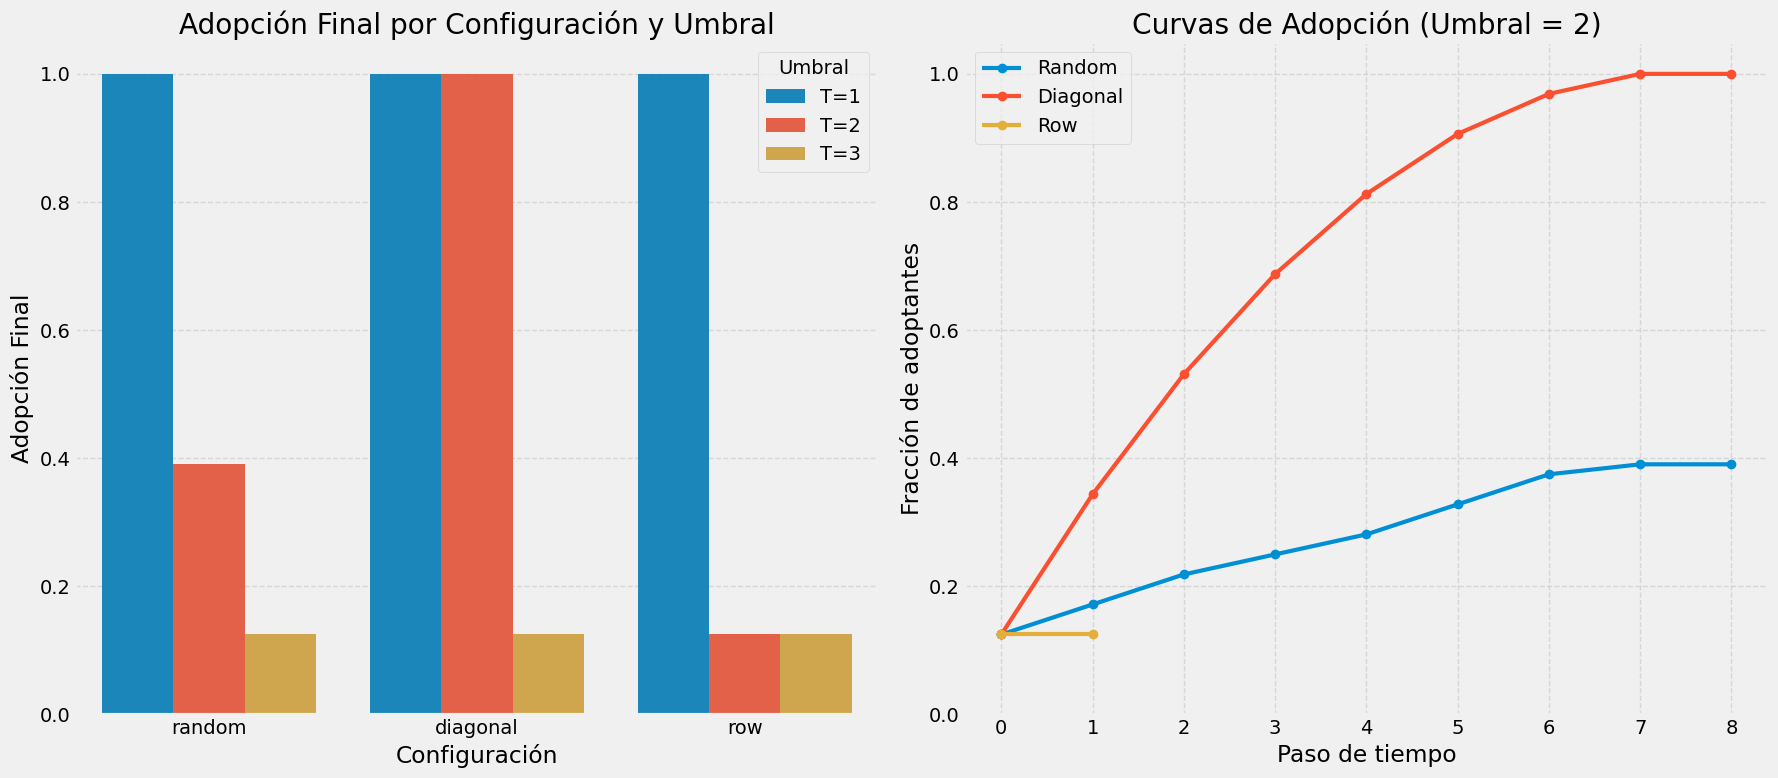


### Dashboard interactivo para experimentar con el modelo
Ajuste los parámetros y presione 'Ejecutar simulación' para ver los resultados:



## Conclusiones Teóricas

1. **Umbral Social Crítico**: Cuando el umbral es 1, la propagación es mucho más fácil y completa, similar a una búsqueda en anchura. Con umbrales más altos (≥2), se necesita una masa crítica y configuración adecuada de pioneros.

2. **Importancia de la Configuración Inicial**: La distribución espacial de los pioneros es tan importante como su número. Una diagonal o fila completa garantiza la propagación total con umbral 2 en una cuadrícula NxN, mientras que la misma cantidad de pioneros dispersos aleatoriamente puede no lograrlo.

3. **Percolación de Bootstrap**: Este modelo representa una percolación de bootstrap en una red 2D, donde se necesita un "apoyo mutuo" inicial para que la propagación sea sostenible.

4. **Condición Necesaria**: Para un umbral T=2 en una cuadrícula NxN, se necesitan al menos N pioneros estratégicamente ubicados para garantizar la adopción global.

5. **Analogía con Fenómenos Sociales Reales**: Este modelo simple captura esencialmen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import networkx as nx
from matplotlib.patches import Rectangle
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.gridspec as gridspec

# Clase para el Autómata Celular de Difusión Social
class DiffusionAutomata:
    def __init__(self, size=8, threshold=2, seed_config='random', seed_count=None, neighborhood='vonneumann'):
        """
        Inicializa el autómata celular para modelar difusión social

        Parámetros:
        size (int): Tamaño de la cuadrícula (size x size)
        threshold (int): Número de vecinos necesarios para adoptar (umbral social)
        seed_config (str): Configuración inicial - 'random', 'diagonal', 'row', 'corner'
        seed_count (int): Número de celdas pioneras (si es None, se calcula según la configuración)
        neighborhood (str): Tipo de vecindario - 'vonneumann' (4 vecinos) o 'moore' (8 vecinos)
        """
        self.size = size
        self.threshold = threshold
        self.neighborhood = neighborhood

        # Inicializar la cuadrícula
        self.grid = np.zeros((size, size), dtype=int)
        self.history = [self.grid.copy()]

        # Establecer la configuración inicial
        if seed_count is None:
            if seed_config == 'diagonal':
                seed_count = size
            elif seed_config == 'row' or seed_config == 'column':
                seed_count = size
            elif seed_config == 'corner':
                seed_count = size // 2
            else:  # random
                seed_count = size  # Por defecto, usar N pioneros

        self.seed_count = seed_count
        self.initialize_seeds(seed_config)

    def initialize_seeds(self, config):
        """Coloca las semillas iniciales (pioneros) según la configuración"""
        if config == 'random':
            # Colocar semillas aleatoriamente
            indices = np.random.choice(self.size*self.size, self.seed_count, replace=False)
            for idx in indices:
                i, j = idx // self.size, idx % self.size
                self.grid[i, j] = 1

        elif config == 'diagonal':
            # Colocar pioneros en la diagonal principal
            for i in range(min(self.size, self.seed_count)):
                self.grid[i, i] = 1

        elif config == 'row':
            # Colocar pioneros en la primera fila
            self.grid[0, :self.seed_count] = 1

        elif config == 'column':
            # Colocar pioneros en la primera columna
            self.grid[:self.seed_count, 0] = 1

        elif config == 'corner':
            # Colocar pioneros en la esquina superior izquierda
            corner_size = int(np.ceil(np.sqrt(self.seed_count)))
            count = 0
            for i in range(corner_size):
                for j in range(corner_size):
                    if count < self.seed_count and i < self.size and j < self.size:
                        self.grid[i, j] = 1
                        count += 1

        # Guardar el estado inicial en el historial
        self.history = [self.grid.copy()]

    def count_neighbors(self, i, j):
        """Cuenta el número de vecinos adoptantes"""
        if self.neighborhood == 'vonneumann':
            # Vecindario de Von Neumann (4 vecinos)
            neighbors = [
                (i-1, j), (i+1, j), (i, j-1), (i, j+1)
            ]
        else:  # Moore
            # Vecindario de Moore (8 vecinos)
            neighbors = [
                (i-1, j), (i+1, j), (i, j-1), (i, j+1),
                (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)
            ]

        count = 0
        for ni, nj in neighbors:
            # Comprobar que el vecino está dentro de los límites
            if 0 <= ni < self.size and 0 <= nj < self.size:
                count += self.grid[ni, nj]

        return count

    def step(self):
        """Realiza un paso de tiempo en la simulación"""
        new_grid = self.grid.copy()

        # Para cada celda, aplicar la regla de transición
        for i in range(self.size):
            for j in range(self.size):
                # Si ya adoptó, continúa adoptando (monotonicidad)
                if self.grid[i, j] == 1:
                    continue

                # Contar vecinos adoptantes
                adoptant_neighbors = self.count_neighbors(i, j)

                # Aplicar regla de umbral: adoptar si hay suficientes vecinos adoptantes
                if adoptant_neighbors >= self.threshold:
                    new_grid[i, j] = 1

        self.grid = new_grid
        self.history.append(self.grid.copy())

        # Verificar si hubo cambio
        if len(self.history) >= 2:
            return not np.array_equal(self.history[-1], self.history[-2])
        return True

    def run_simulation(self, max_steps=100):
        """Ejecuta la simulación hasta un estado estable o máximo de pasos"""
        steps = 0
        changed = True

        with tqdm(total=max_steps, desc="Simulando") as pbar:
            while changed and steps < max_steps:
                changed = self.step()
                steps += 1
                pbar.update(1)
                if not changed:
                    pbar.set_description(f"Convergió en {steps} pasos")
                    break

        return steps

    def get_adoption_curve(self):
        """Devuelve la curva de adopción a lo largo del tiempo"""
        adoption = [np.sum(grid) / (self.size * self.size) for grid in self.history]
        return adoption

    def get_perimeter(self, step=-1):
        """Calcula el perímetro de la zona adoptante en un paso dado"""
        grid = self.history[step]
        perimeter = 0

        for i in range(self.size):
            for j in range(self.size):
                if grid[i, j] == 1:  # Si es adoptante
                    # Contar vecinos no adoptantes (frontera)
                    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                    for ni, nj in neighbors:
                        if 0 <= ni < self.size and 0 <= nj < self.size:
                            if grid[ni, nj] == 0:
                                perimeter += 1
                        else:  # Borde de la cuadrícula
                            perimeter += 1

        return perimeter

    def get_perimeter_history(self):
        """Devuelve el historial del perímetro"""
        return [self.get_perimeter(step) for step in range(len(self.history))]


# Funciones para visualización

def plot_grid(grid, ax=None, title=None, cmap=None):
    """Visualiza la cuadrícula del autómata celular"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    if cmap is None:
        # Verde para adoptantes, gris para no adoptantes
        cmap = ListedColormap(['#f0f0f0', '#2ecc71'])

    ax.matshow(grid, cmap=cmap)

    # Agregar líneas de cuadrícula
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    if title:
        ax.set_title(title)

    return ax

def create_adoption_animation(automata):
    """Crea una animación de la difusión social"""
    fig, ax = plt.subplots(figsize=(8, 8))

    def update(frame):
        ax.clear()
        if frame < len(automata.history):
            plot_grid(automata.history[frame], ax=ax,
                      title=f'Paso {frame}: {np.sum(automata.history[frame])} adoptantes '
                            f'({100*np.sum(automata.history[frame])/(automata.size**2):.1f}%)')
        return [ax]

    ani = animation.FuncAnimation(fig, update, frames=len(automata.history),
                                 interval=500, blit=False)
    return ani

def plot_adoption_curve(automata, ax=None):
    """Visualiza la curva de adopción a lo largo del tiempo"""
    adoption = automata.get_adoption_curve()

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(adoption, 'o-', color='#2ecc71', linewidth=3)
    ax.set_xlabel('Paso de tiempo')
    ax.set_ylabel('Fracción de adoptantes')
    ax.set_title('Curva de Adopción')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.05)

    # Anotar la saturación final
    if len(adoption) > 1:
        ax.annotate(f'Saturación final: {adoption[-1]:.2%}',
                   xy=(len(adoption)-1, adoption[-1]),
                   xytext=(len(adoption)-1, adoption[-1]+0.1),
                   arrowprops=dict(arrowstyle='->'))

    return ax

def plot_perimeter(automata, ax=None):
    """Visualiza la evolución del perímetro a lo largo del tiempo"""
    perimeter = automata.get_perimeter_history()

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(perimeter, 'o-', color='#e74c3c', linewidth=3)
    ax.set_xlabel('Paso de tiempo')
    ax.set_ylabel('Perímetro')
    ax.set_title('Evolución del Perímetro')
    ax.grid(True, linestyle='--', alpha=0.7)

    return ax

def create_social_graph(automata, step=-1):
    """Crea un grafo social basado en el estado del autómata"""
    G = nx.grid_2d_graph(automata.size, automata.size)

    # Asignar estados como atributos de los nodos
    grid = automata.history[step]
    for i in range(automata.size):
        for j in range(automata.size):
            G.nodes[(i, j)]['adopted'] = bool(grid[i, j])

    return G

def plot_social_graph(G, ax=None):
    """Visualiza el grafo social con colores según adopción"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    # Posiciones para cuadrícula
    pos = {(i, j): (j, -i) for i, j in G.nodes()}

    # Colores según adopción
    node_colors = ['#2ecc71' if G.nodes[node]['adopted'] else '#f0f0f0' for node in G.nodes()]

    # Dibujar nodos
    nx.draw(G, pos, node_color=node_colors, node_size=500, ax=ax,
            edgecolors='black', linewidths=1)

    ax.set_title('Representación como Grafo Social')
    ax.set_axis_off()

    return ax

def plot_comparative_study(size=8, threshold_range=[1, 2, 3], seed_configs=['random', 'diagonal', 'row']):
    """Realiza un estudio comparativo de diferentes parámetros"""
    results = {}

    # Ejecutar simulaciones para cada combinación
    for threshold in threshold_range:
        results[threshold] = {}
        for config in seed_configs:
            automata = DiffusionAutomata(size=size, threshold=threshold, seed_config=config)
            automata.run_simulation()
            adoption_curve = automata.get_adoption_curve()
            final_adoption = adoption_curve[-1]
            steps_to_converge = len(adoption_curve) - 1

            results[threshold][config] = {
                'final_adoption': final_adoption,
                'steps': steps_to_converge,
                'curve': adoption_curve
            }

    # Visualizar resultados
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Gráfico de barras para adopción final
    configs = []
    thresholds = []
    adoptions = []

    for t in threshold_range:
        for c in seed_configs:
            configs.append(c)
            thresholds.append(f'T={t}')
            adoptions.append(results[t][c]['final_adoption'])

    df = {'Configuración': configs, 'Umbral': thresholds, 'Adopción Final': adoptions}

    # Usar seaborn para el gráfico de barras agrupadas
    ax = axes[0]
    sns.barplot(x='Configuración', y='Adopción Final', hue='Umbral', data=df, ax=ax)
    ax.set_ylim(0, 1.05)
    ax.set_title('Adopción Final por Configuración y Umbral')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Curvas de adopción para cada configuración con umbral = 2
    ax = axes[1]
    threshold = 2  # Mostramos las curvas para umbral = 2

    for config in seed_configs:
        curve = results[threshold][config]['curve']
        ax.plot(curve, '-o', label=f'{config.capitalize()}', linewidth=3)

    ax.set_xlabel('Paso de tiempo')
    ax.set_ylabel('Fracción de adoptantes')
    ax.set_title(f'Curvas de Adopción (Umbral = {threshold})')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim(0, 1.05)
    ax.legend()

    plt.tight_layout()
    return fig, results

# Interfaz interactiva para experimentar con el modelo

def create_diffusion_dashboard():
    """Crea un dashboard interactivo para experimentar con el modelo de difusión"""
    style = """
    <style>
    .widget-label {
        font-weight: bold;
        font-size: 1.2em;
    }
    .widget-readout {
        font-size: 1.1em;
    }
    .output_wrapper {
        margin-top: 20px;
    }
    </style>
    """
    display(HTML(style))

    # Widgets para parámetros
    size_slider = widgets.IntSlider(value=8, min=5, max=20, step=1, description='Tamaño:',
                                   style={'description_width': 'initial'})

    threshold_slider = widgets.IntSlider(value=2, min=1, max=4, step=1, description='Umbral social:',
                                        style={'description_width': 'initial'})

    seed_config = widgets.Dropdown(options=[
        ('Aleatorio', 'random'),
        ('Diagonal', 'diagonal'),
        ('Primera fila', 'row'),
        ('Primera columna', 'column'),
        ('Esquina', 'corner')
    ], value='random', description='Configuración inicial:',
       style={'description_width': 'initial'})

    seed_count = widgets.IntSlider(value=8, min=1, max=20, step=1, description='Núm. pioneros:',
                                  style={'description_width': 'initial'})

    neighborhood = widgets.RadioButtons(options=[
        ('Von Neumann (4 vecinos)', 'vonneumann'),
        ('Moore (8 vecinos)', 'moore')
    ], value='vonneumann', description='Vecindario:',
                                      style={'description_width': 'initial'})

    # Botones
    run_button = widgets.Button(description='Ejecutar simulación',
                               style={'button_color': '#2ecc71'})

    # Salida para mensajes
    output = widgets.Output()

    # Función de actualización al cambiar parámetros
    def update_seed_count(*args):
        if seed_config.value == 'diagonal':
            seed_count.value = size_slider.value
        elif seed_config.value == 'row' or seed_config.value == 'column':
            seed_count.value = size_slider.value
        elif seed_config.value == 'corner':
            seed_count.value = size_slider.value // 2
        else:  # random
            seed_count.value = size_slider.value

    # Conectar eventos
    seed_config.observe(update_seed_count, 'value')
    size_slider.observe(update_seed_count, 'value')

    # Función para ejecutar la simulación
    def run_simulation(b):
        with output:
            clear_output()

            # Crear el autómata
            automata = DiffusionAutomata(
                size=size_slider.value,
                threshold=threshold_slider.value,
                seed_config=seed_config.value,
                seed_count=seed_count.value,
                neighborhood=neighborhood.value
            )

            # Ejecutar simulación
            steps = automata.run_simulation()

            # Crear visualizaciones
            fig = plt.figure(figsize=(18, 12))
            gs = gridspec.GridSpec(2, 3, figure=fig)

            # Estado inicial
            ax1 = fig.add_subplot(gs[0, 0])
            plot_grid(automata.history[0], ax=ax1, title='Estado Inicial')

            # Estado final
            ax2 = fig.add_subplot(gs[0, 1])
            plot_grid(automata.history[-1], ax=ax2, title=f'Estado Final ({steps} pasos)')

            # Grafo social
            ax3 = fig.add_subplot(gs[0, 2])
            G = create_social_graph(automata, -1)
            plot_social_graph(G, ax=ax3)

            # Curva de adopción
            ax4 = fig.add_subplot(gs[1, 0:2])
            plot_adoption_curve(automata, ax=ax4)

            # Evolución del perímetro
            ax5 = fig.add_subplot(gs[1, 2])
            plot_perimeter(automata, ax=ax5)

            plt.tight_layout()
            plt.show()

            # Mostrar estadísticas
            adoption_curve = automata.get_adoption_curve()
            print("\n--- Estadísticas de la Simulación ---")
            print(f"Pasos hasta convergencia: {steps}")
            print(f"Adopción final: {adoption_curve[-1]:.2%}")
            print(f"Número inicial de pioneros: {automata.seed_count} ({automata.seed_count/(automata.size**2):.2%})")

            # Crear animación
            print("\n--- Animación de la Difusión ---")
            ani = create_adoption_animation(automata)
            plt.close()  # Cerrar la figura de la animación para no mostrarla duplicada

            # Mostrar la animación
            display(HTML(ani.to_jshtml()))

    # Conectar el botón
    run_button.on_click(run_simulation)

    # Organizar widgets
    params_box = widgets.VBox([
        widgets.HBox([size_slider, threshold_slider]),
        widgets.HBox([seed_config, seed_count]),
        neighborhood,
        run_button
    ])

    # Mostrar widgets
    display(widgets.VBox([params_box, output]))

# Ejecutar el estudio comparativo para mostrar ejemplos
print("# Modelado de Difusión Social con Autómatas Celulares")
print("## Basado en los principios de propagación de ideas y comportamientos en redes sociales")
print("\n### Estudio comparativo de diferentes configuraciones y umbrales")

fig, results = plot_comparative_study()
plt.show()

print("\n### Dashboard interactivo para experimentar con el modelo")
print("Ajuste los parámetros y presione 'Ejecutar simulación' para ver los resultados:")

create_diffusion_dashboard()

# Añadir algunas conclusiones teóricas
print("""
## Conclusiones Teóricas

1. **Umbral Social Crítico**: Cuando el umbral es 1, la propagación es mucho más fácil y completa, similar a una búsqueda en anchura. Con umbrales más altos (≥2), se necesita una masa crítica y configuración adecuada de pioneros.

2. **Importancia de la Configuración Inicial**: La distribución espacial de los pioneros es tan importante como su número. Una diagonal o fila completa garantiza la propagación total con umbral 2 en una cuadrícula NxN, mientras que la misma cantidad de pioneros dispersos aleatoriamente puede no lograrlo.

3. **Percolación de Bootstrap**: Este modelo representa una percolación de bootstrap en una red 2D, donde se necesita un "apoyo mutuo" inicial para que la propagación sea sostenible.

4. **Condición Necesaria**: Para un umbral T=2 en una cuadrícula NxN, se necesitan al menos N pioneros estratégicamente ubicados para garantizar la adopción global.

5. **Analogía con Fenómenos Sociales Reales**: Este modelo simple captura esencialmente cómo se propagan las innovaciones, comportamientos y tendencias en sociedades reales, donde la presión de pares y la validación social juegan roles fundamentales.
""")

## Dashboard de Simulación de Propagación de Infección V2 ##
Ajuste los parámetros y ejecute la simulación para ver la dinámica y los gráficos actualizados.


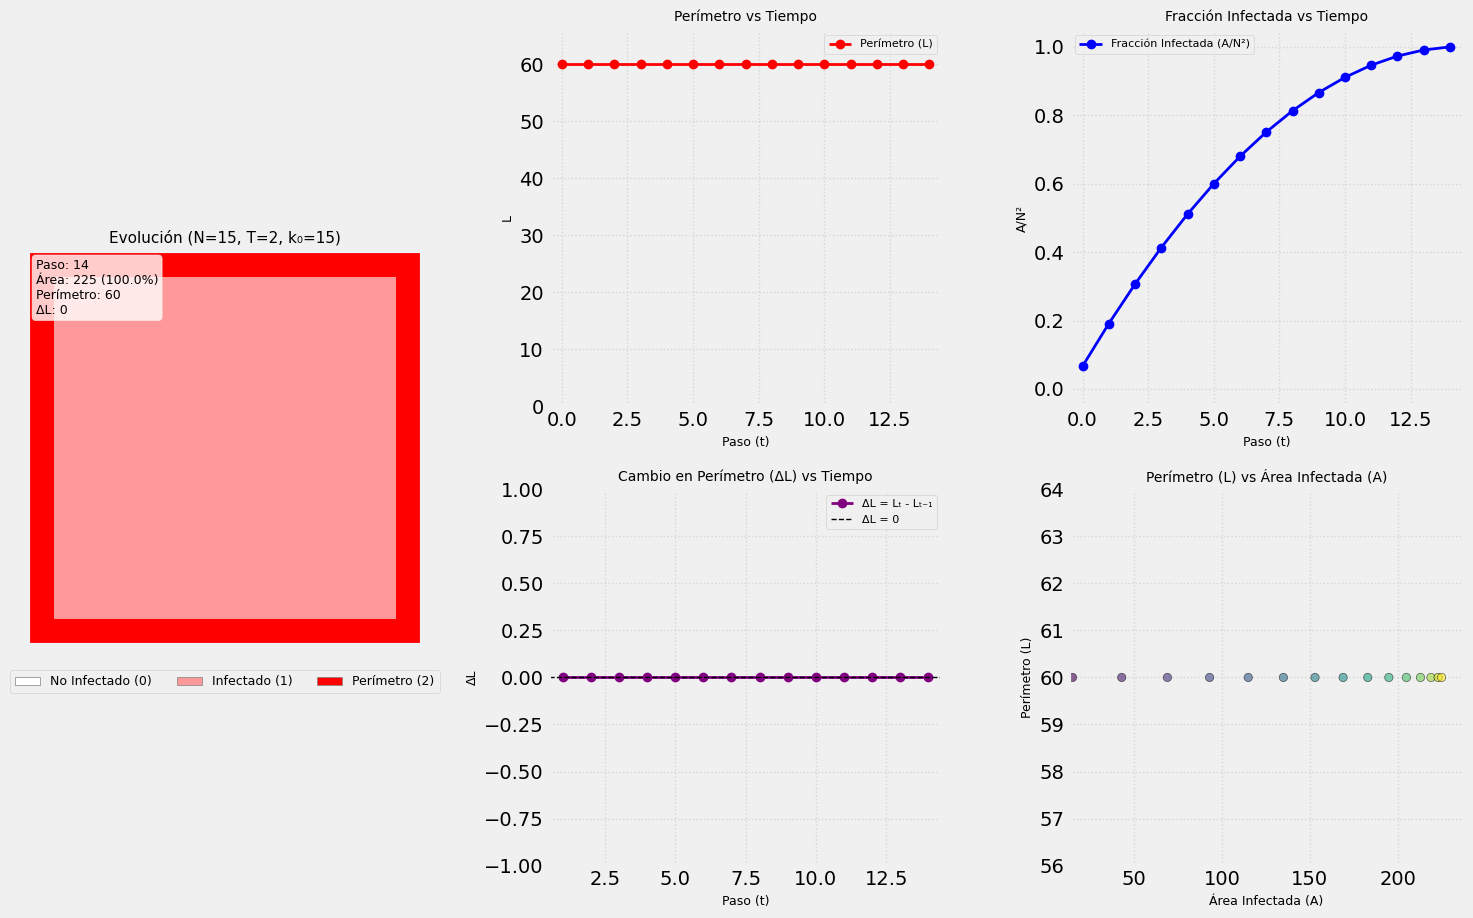

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d # Para la convolución
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
from matplotlib import colors
import time # No se usa activamente pero es común en simulaciones

# Función principal para ejecutar la simulación
def run_infection_simulation_v2(
    grid_size=15,
    initial_pattern="diagonal_N",
    k_custom_value=None, # Para patrón 'custom_k'
    infection_threshold=2,
    animation_speed=300,
    max_steps=200,
    neighborhood_type='von_neumann' # 'von_neumann' o 'moore'
):
    print(f"\n--- Iniciando Simulación V2 ---")
    print(f"Tamaño: {grid_size}x{grid_size}, Patrón: {initial_pattern}, Umbral: {infection_threshold}, Vecindario: {neighborhood_type}")
    print(f"Máx Pasos: {max_steps}")

    # Inicializar la cuadrícula
    grid = np.zeros((grid_size, grid_size), dtype=int)
    k_initial_infected = 0

    # --- Definición de Patrones Iniciales ---
    center_row, center_col = grid_size // 2, grid_size // 2
    initial_infected_coords = []

    if initial_pattern == "grupo":
        coords_to_add = [(center_row, center_col-1), (center_row, center_col), (center_row, center_col+1),
                         (center_row-1, center_col), (center_row+1, center_col)]
        for r, c in coords_to_add:
            if 0 <= r < grid_size and 0 <= c < grid_size:
                initial_infected_coords.append((r, c))
        if not initial_infected_coords and grid_size > 0: initial_infected_coords.append((center_row,center_col))


    elif initial_pattern == "linea_corta":
        start_c = max(0, center_col - 2)
        end_c = min(grid_size, center_col + 3)
        for c in range(start_c, end_c):
             if 0 <= center_row < grid_size and 0 <= c < grid_size:
                initial_infected_coords.append((center_row, c))

    elif initial_pattern == "esquina_2x2":
        coords_to_add = [(0,0), (0,1), (1,0), (1,1)]
        for r,c in coords_to_add:
            if 0 <= r < grid_size and 0 <= c < grid_size:
                initial_infected_coords.append((r,c))


    elif initial_pattern == "aleatorio_N":
        # k = N (grid_size)
        num_initial = grid_size
        if num_initial > grid_size*grid_size: num_initial = grid_size*grid_size
        indices = np.random.choice(grid_size*grid_size, num_initial, replace=False)
        for idx in indices:
            initial_infected_coords.append((idx // grid_size, idx % grid_size))

    elif initial_pattern == "custom_k":
        num_initial = k_custom_value if k_custom_value is not None else grid_size
        if num_initial > grid_size*grid_size: num_initial = grid_size*grid_size
        if num_initial < 0 : num_initial = 0
        indices = np.random.choice(grid_size*grid_size, num_initial, replace=False)
        for idx in indices:
            initial_infected_coords.append((idx // grid_size, idx % grid_size))
        print(f"Patrón 'custom_k' con {num_initial} celdas aleatorias.")


    elif initial_pattern == "diagonal_N": # k = N
        for i in range(grid_size):
            initial_infected_coords.append((i, i))

    elif initial_pattern == "linea_N_no_propaga": # k = N, pero no se propaga con T=2
        for c in range(grid_size):
            initial_infected_coords.append((center_row, c))

    elif initial_pattern == "dos_filas_2N": # k = 2N
        if grid_size >= 2:
            row1 = center_row -1 if center_row > 0 else 0
            row2 = center_row
            for c in range(grid_size): initial_infected_coords.append((row1,c))
            for c in range(grid_size): initial_infected_coords.append((row2,c))
        elif grid_size == 1:
            initial_infected_coords.append((0,0))


    # Aplicar el patrón inicial, asegurando que no haya duplicados
    unique_coords = list(set(initial_infected_coords))
    for r_idx, c_idx in unique_coords:
        if 0 <= r_idx < grid_size and 0 <= c_idx < grid_size:
            grid[r_idx, c_idx] = 1

    k_initial_infected = np.sum(grid)
    if k_initial_infected == 0 and grid_size > 0:
        grid[center_row, center_col] = 1 # Asegurar al menos una si la configuración falló
        k_initial_infected = 1
    print(f"Celdas infectadas inicialmente (k_0): {k_initial_infected}")


    # --- Definición del Kernel del Vecindario ---
    if neighborhood_type == 'von_neumann':
        kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=int)
    elif neighborhood_type == 'moore':
        kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=int)
    else: # Default a Von Neumann
        kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=int)


    # --- Funciones Auxiliares del Autómata ---
    def infection_step_ac(current_grid_ac):
        # Convolve2D cuenta los vecinos infectados para cada celda
        neighbor_count = convolve2d(current_grid_ac, kernel, mode='same', boundary='fill', fillvalue=0)

        # Aplicar la regla de transición
        # 1. Las celdas ya infectadas permanecen infectadas (monotonicidad implícita si no las cambiamos)
        # 2. Las celdas no infectadas (0) se infectan si neighbor_count >= umbral
        newly_infected_mask = (current_grid_ac == 0) & (neighbor_count >= infection_threshold)

        next_grid_ac = current_grid_ac.copy()
        next_grid_ac[newly_infected_mask] = 1
        return next_grid_ac

    def calculate_perimeter_ac(grid_to_calc):
        perimeter_val = 0
        # Usar padding para manejar bordes más fácilmente
        padded_grid = np.pad(grid_to_calc, pad_width=1, mode='constant', constant_values=0)
        for r_idx in range(1, grid_size + 1): # Iterar sobre la grilla original en la versión con padding
            for c_idx in range(1, grid_size + 1):
                if padded_grid[r_idx, c_idx] == 1:  # Si la celda está infectada
                    # Contar lados adyacentes a celdas no infectadas (0) en el vecindario de Von Neumann
                    if padded_grid[r_idx-1, c_idx] == 0: perimeter_val += 1 # Arriba
                    if padded_grid[r_idx+1, c_idx] == 0: perimeter_val += 1 # Abajo
                    if padded_grid[r_idx, c_idx-1] == 0: perimeter_val += 1 # Izquierda
                    if padded_grid[r_idx, c_idx+1] == 0: perimeter_val += 1 # Derecha
        return perimeter_val

    def identify_perimeter_cells_ac(grid_to_identify):
        perimeter_cells_grid = np.zeros_like(grid_to_identify, dtype=int)
        padded_grid = np.pad(grid_to_identify, pad_width=1, mode='constant', constant_values=0)
        for r_idx in range(1, grid_size + 1):
            for c_idx in range(1, grid_size + 1):
                if padded_grid[r_idx, c_idx] == 1: # Si está infectada
                    is_on_perimeter = False
                    if padded_grid[r_idx-1, c_idx] == 0: is_on_perimeter = True
                    elif padded_grid[r_idx+1, c_idx] == 0: is_on_perimeter = True
                    elif padded_grid[r_idx, c_idx-1] == 0: is_on_perimeter = True
                    elif padded_grid[r_idx, c_idx+1] == 0: is_on_perimeter = True

                    if is_on_perimeter:
                        perimeter_cells_grid[r_idx-1, c_idx-1] = 1 # Mapear de vuelta
        return perimeter_cells_grid

    # --- Simulación ---
    history_grids = [grid.copy()]
    history_perimeters = [calculate_perimeter_ac(grid)]
    history_infected_areas = [np.sum(grid)]
    history_delta_L = ["N/A"] # Delta L para el paso t es L_t - L_{t-1}

    stable = False
    step_count = 0
    total_cells_in_grid = grid_size * grid_size
    all_infected_flag = False

    print("Iniciando bucle de simulación...")
    while not stable and step_count < max_steps:
        current_grid_state = history_grids[-1]
        new_grid_state = infection_step_ac(current_grid_state)

        history_grids.append(new_grid_state)
        current_perimeter_val = calculate_perimeter_ac(new_grid_state)
        history_perimeters.append(current_perimeter_val)
        history_infected_areas.append(np.sum(new_grid_state))

        # Calcular Delta L
        delta_L_val = current_perimeter_val - history_perimeters[-2] # L_t - L_{t-1}
        history_delta_L.append(delta_L_val)

        if np.array_equal(new_grid_state, current_grid_state):
            stable = True
            print(f"Simulación estabilizada en {step_count+1} pasos.")
        elif history_infected_areas[-1] == total_cells_in_grid:
            stable = True
            all_infected_flag = True
            print(f"¡Toda la cuadrícula infectada en {step_count+1} pasos!")
        else:
            step_count += 1

    if step_count == max_steps and not stable:
        print(f"Simulación detenida al alcanzar el máximo de {max_steps} pasos.")

    num_total_steps_simulated = len(history_grids)

    # --- Preparación para Visualización ---
    # Colores: 0: No Infectada, 1: Infectada Interna, 2: Celda de Perímetro
    custom_cmap = colors.ListedColormap(['#FFFFFF', '#FF9999', '#FF0000']) # Blanco, Rosa claro, Rojo
    cmap_bounds = [-0.5, 0.5, 1.5, 2.5]
    cmap_norm = colors.BoundaryNorm(cmap_bounds, custom_cmap.N)

    fig_main = plt.figure(figsize=(15, 10)) # Tamaño general de la figura
    gs_main = fig_main.add_gridspec(2, 3) # 2 filas, 3 columnas

    ax_grid_anim = fig_main.add_subplot(gs_main[:, 0]) # Animación de la cuadrícula ocupa 2 filas, 1ra col
    ax_perimeter_plot = fig_main.add_subplot(gs_main[0, 1]) # Perímetro vs Tiempo
    ax_area_plot = fig_main.add_subplot(gs_main[0, 2])      # Área Infectada vs Tiempo
    ax_delta_L_plot = fig_main.add_subplot(gs_main[1, 1])   # Delta L vs Tiempo
    ax_perimeter_vs_area_plot = fig_main.add_subplot(gs_main[1, 2]) # Perímetro vs Área (Scatter)


    # Inicializar la visualización de la cuadrícula animada
    # Combinar la grilla de infección con la de perímetro para visualización
    # 0: no infectado, 1: infectado (no perímetro), 2: infectado (perímetro)
    combined_display_grid = np.zeros_like(history_grids[0], dtype=int)
    perimeter_cell_mask_initial = identify_perimeter_cells_ac(history_grids[0])
    combined_display_grid[history_grids[0] == 1] = 1
    combined_display_grid[(history_grids[0] == 1) & (perimeter_cell_mask_initial == 1)] = 2

    im_animation = ax_grid_anim.imshow(combined_display_grid, cmap=custom_cmap, norm=cmap_norm, animated=True)
    ax_grid_anim.set_title(f'Evolución (N={grid_size}, T={infection_threshold}, k₀={k_initial_infected})', fontsize=11)
    ax_grid_anim.set_xticks([])
    ax_grid_anim.set_yticks([])
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='#FFFFFF', edgecolor='grey', label='No Infectado (0)'),
        plt.Rectangle((0,0),1,1, facecolor='#FF9999', edgecolor='grey', label='Infectado (1)'),
        plt.Rectangle((0,0),1,1, facecolor='#FF0000', edgecolor='grey', label='Perímetro (2)')
    ]
    ax_grid_anim.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=3, fontsize=9)
    text_info_on_grid = ax_grid_anim.text(0.02, 0.98, '', transform=ax_grid_anim.transAxes, fontsize=9,
                                       verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

    # Gráfico de Perímetro vs Tiempo
    line_perimeter_time, = ax_perimeter_plot.plot([], [], 'o-', color='red', lw=2, label='Perímetro (L)')
    ax_perimeter_plot.set_xlim(-0.5, num_total_steps_simulated - 0.5)
    ax_perimeter_plot.set_ylim(0, max(1, max(history_perimeters, default=0) * 1.1))
    ax_perimeter_plot.set_title('Perímetro vs Tiempo', fontsize=10)
    ax_perimeter_plot.set_xlabel('Paso (t)', fontsize=9)
    ax_perimeter_plot.set_ylabel('L', fontsize=9)
    ax_perimeter_plot.grid(True, linestyle=':', alpha=0.7)
    ax_perimeter_plot.legend(fontsize=8)

    # Gráfico de Área Infectada vs Tiempo
    fraction_infected = [area / total_cells_in_grid if total_cells_in_grid > 0 else 0 for area in history_infected_areas]
    line_area_time, = ax_area_plot.plot([], [], 'o-', color='blue', lw=2, label='Fracción Infectada (A/N²)')
    ax_area_plot.set_xlim(-0.5, num_total_steps_simulated - 0.5)
    ax_area_plot.set_ylim(-0.05, 1.05)
    ax_area_plot.set_title('Fracción Infectada vs Tiempo', fontsize=10)
    ax_area_plot.set_xlabel('Paso (t)', fontsize=9)
    ax_area_plot.set_ylabel('A/N²', fontsize=9)
    ax_area_plot.grid(True, linestyle=':', alpha=0.7)
    ax_area_plot.legend(fontsize=8)

    # Gráfico de Delta L vs Tiempo
    # history_delta_L[0] es "N/A", así que graficamos desde el paso 1
    valid_delta_Ls = [dl for dl in history_delta_L[1:] if isinstance(dl, (int, float))]
    steps_for_delta_L = range(1, len(valid_delta_Ls) + 1)
    line_delta_L_time, = ax_delta_L_plot.plot([], [], 'o-', color='purple', lw=2, label='ΔL = L\u209c - L\u209c\u208B\u2081')
    ax_delta_L_plot.axhline(0, color='black', linestyle='--', lw=1, label='ΔL = 0') # Línea de referencia
    ax_delta_L_plot.set_xlim(0.5, num_total_steps_simulated -0.5 if num_total_steps_simulated > 1 else 1.5)
    min_dl = min(valid_delta_Ls, default=-1) * 1.1 if valid_delta_Ls else -2
    max_dl = max(valid_delta_Ls, default=1) * 1.1 if valid_delta_Ls else 2
    if min_dl == 0 and max_dl == 0 and valid_delta_Ls : min_dl, max_dl = -1,1 # Evitar ylim iguales si todo es 0
    ax_delta_L_plot.set_ylim(min(min_dl, -0.5) , max(max_dl, 0.5) )
    ax_delta_L_plot.set_title('Cambio en Perímetro (ΔL) vs Tiempo', fontsize=10)
    ax_delta_L_plot.set_xlabel('Paso (t)', fontsize=9)
    ax_delta_L_plot.set_ylabel('ΔL', fontsize=9)
    ax_delta_L_plot.grid(True, linestyle=':', alpha=0.7)
    ax_delta_L_plot.legend(fontsize=8)


    # Gráfico de Perímetro vs Área (Scatter)
    scatter_perimeter_area = ax_perimeter_vs_area_plot.scatter([], [], c=[], cmap='viridis', alpha=0.6, edgecolors='k',linewidths=0.5)
    ax_perimeter_vs_area_plot.set_xlabel('Área Infectada (A)', fontsize=9)
    ax_perimeter_vs_area_plot.set_ylabel('Perímetro (L)', fontsize=9)
    ax_perimeter_vs_area_plot.set_title('Perímetro (L) vs Área Infectada (A)', fontsize=10)
    ax_perimeter_vs_area_plot.grid(True, linestyle=':', alpha=0.7)
    if history_infected_areas and history_perimeters:
        ax_perimeter_vs_area_plot.set_xlim(min(history_infected_areas, default=0)*0.9, max(history_infected_areas, default=1)*1.1)
        ax_perimeter_vs_area_plot.set_ylim(min(history_perimeters, default=0)*0.9, max(history_perimeters, default=1)*1.1)
    # Colorbar para el scatter plot (representa el tiempo)
    # cbar = fig_main.colorbar(scatter_perimeter_area, ax=ax_perimeter_vs_area_plot, label='Paso (t)', pad=0.1, aspect=10)
    # cbar.ax.tick_params(labelsize=8)


    # --- Función de Actualización para la Animación ---
    def update_animation(frame):
        # Actualizar cuadrícula
        g_frame = history_grids[frame]
        pg_viz_frame = identify_perimeter_cells_ac(g_frame)
        combined_display_grid_update = np.zeros_like(g_frame, dtype=int)
        combined_display_grid_update[g_frame == 1] = 1
        combined_display_grid_update[(g_frame == 1) & (pg_viz_frame == 1)] = 2
        im_animation.set_array(combined_display_grid_update)

        # Actualizar texto en la cuadrícula
        area_frame = history_infected_areas[frame]
        perimeter_frame = history_perimeters[frame]
        delta_L_frame = history_delta_L[frame]
        percent_filled_frame = (area_frame / total_cells_in_grid) * 100 if total_cells_in_grid > 0 else 0
        info_str_frame = (f'Paso: {frame}\n'
                          f'Área: {area_frame} ({percent_filled_frame:.1f}%)\n'
                          f'Perímetro: {perimeter_frame}\n'
                          f'ΔL: {delta_L_frame}')
        text_info_on_grid.set_text(info_str_frame)

        # Actualizar gráficos de líneas (hasta el frame actual)
        line_perimeter_time.set_data(range(frame + 1), history_perimeters[:frame + 1])
        line_area_time.set_data(range(frame + 1), fraction_infected[:frame + 1])
        if frame > 0: # Delta L se calcula desde el paso 1
            line_delta_L_time.set_data(steps_for_delta_L[:frame], valid_delta_Ls[:frame])
        else: # Para el frame 0, no hay delta L aún
            line_delta_L_time.set_data([],[])


        # Actualizar scatter plot (todos los puntos hasta el frame actual)
        # Para el scatter, es mejor rehacerlo o usar set_offsets y set_array para colores
        # Aquí una forma simple, aunque no la más eficiente para blitting:
        ax_perimeter_vs_area_plot.clear() # Limpiar para redibujar
        ax_perimeter_vs_area_plot.scatter(history_infected_areas[:frame+1], history_perimeters[:frame+1],
                                          c=range(frame+1), cmap='viridis', alpha=0.6, edgecolors='k', linewidths=0.5)
        ax_perimeter_vs_area_plot.set_xlabel('Área Infectada (A)', fontsize=9)
        ax_perimeter_vs_area_plot.set_ylabel('Perímetro (L)', fontsize=9)
        ax_perimeter_vs_area_plot.set_title('Perímetro (L) vs Área Infectada (A)', fontsize=10)
        ax_perimeter_vs_area_plot.grid(True, linestyle=':', alpha=0.7)
        if history_infected_areas and history_perimeters: # Re-establecer límites por si clear() los borra
            ax_perimeter_vs_area_plot.set_xlim(min(history_infected_areas, default=0)*0.95-1, max(history_infected_areas, default=1)*1.05+1)
            ax_perimeter_vs_area_plot.set_ylim(min(history_perimeters, default=0)*0.95-1, max(history_perimeters, default=1)*1.05+1)


        return [im_animation, text_info_on_grid, line_perimeter_time, line_area_time, line_delta_L_time] # No incluir scatter_perimeter_area si se redibuja

    # Crear la animación
    # blit=False porque redibujar el scatter plot es complejo con blit=True
    anim = FuncAnimation(fig_main, update_animation, frames=num_total_steps_simulated,
                         blit=False, interval=animation_speed, repeat=False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Ajustar layout
    # plt.show() # No es necesario si se usa display(HTML(...))

    # --- Estadísticas Finales ---
    final_infected_stat = history_infected_areas[-1]
    percentage_stat = (final_infected_stat / total_cells_in_grid) * 100 if total_cells_in_grid > 0 else 0
    print(f"\n--- Estadísticas Finales de la Simulación ---")
    print(f"Pasos simulados: {num_total_steps_simulated - 1}")
    print(f"Perímetro inicial (L_0): {history_perimeters[0]}")
    print(f"Perímetro final (L_final): {history_perimeters[-1]}")
    print(f"Celdas infectadas iniciales (k_0): {k_initial_infected}")
    print(f"Celdas infectadas finales: {final_infected_stat} de {total_cells_in_grid} ({percentage_stat:.1f}%)")
    if all_infected_flag:
        print("Resultado: ¡La infección cubrió toda la cuadrícula!")
    elif stable:
        print("Resultado: La infección se estabilizó antes de cubrir toda la cuadrícula.")
    else:
        print("Resultado: La simulación alcanzó el límite de pasos.")

    # Verificación del Argumento del Perímetro (ΔL ≤ 0)
    print(f"\nAnálisis del Argumento del Perímetro (ΔL = L_t - L_{{t-1}} ≤ 0):")
    all_non_increasing_perimeter = True
    for i_step in range(1, len(history_delta_L)):
        dl_val = history_delta_L[i_step]
        if isinstance(dl_val, (int, float)) and dl_val > 0:
            print(f"  Paso {i_step}: ΔL = {dl_val} (> 0) ¡El perímetro aumentó!")
            all_non_increasing_perimeter = False
    if all_non_increasing_perimeter and len(history_delta_L) > 1 :
        print("  Confirmado: El perímetro fue no creciente (ΔL ≤ 0) en todos los pasos donde se calculó.")
    elif len(history_delta_L) <=1:
        print("  No hubo suficientes pasos para calcular ΔL.")
    print(f"----------------------------------")

    return HTML(anim.to_jshtml())


# --- Controles Interactivos (Widgets) ---
# Estilo para descripciones de widgets
style_desc = {'description_width': 'initial'}

grid_size_w = widgets.IntSlider(value=15, min=3, max=50, step=1, description='Tamaño Cuadrícula (N):', style=style_desc)
k_value_w = widgets.IntSlider(value=15, min=0, max=2500, step=1, description='k (para "custom_k"):', style=style_desc)

pattern_options_w = [
    ('Grupo Central', 'grupo'), ('Línea Corta Central', 'linea_corta'), ('Esquina 2x2', 'esquina_2x2'),
    ('Aleatorio (k=N)', 'aleatorio_N'), ('Aleatorio (k personalizado)', 'custom_k'),
    ('Diagonal (k=N)', 'diagonal_N'), ('Línea N Central (no propaga T=2)', 'linea_N_no_propaga'),
    ('Dos Filas Centrales (k≈2N)', 'dos_filas_2N')
]
initial_pattern_w = widgets.Dropdown(options=pattern_options_w, value='diagonal_N', description='Patrón Inicial:', style=style_desc)

infection_threshold_w = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral Infección (T):', style=style_desc) # Max 8 para Moore
animation_speed_w = widgets.IntSlider(value=300, min=50, max=1000, step=50, description='Velocidad Anim (ms):', style=style_desc)
max_steps_w = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Max Pasos Sim:', style=style_desc)
neighborhood_w = widgets.RadioButtons(options=[('Von Neumann (4)', 'von_neumann'), ('Moore (8)', 'moore')],
                                      value='von_neumann', description='Vecindario:', style=style_desc)

run_button_w = widgets.Button(description='Ejecutar Simulación V2', button_style='success', icon='play')
output_w = widgets.Output()

# Función para manejar la visibilidad de k_custom_value
def handle_pattern_change(change):
    if change.new == 'custom_k':
        k_value_w.layout.display = 'flex'
    else:
        k_value_w.layout.display = 'none'
initial_pattern_w.observe(handle_pattern_change, names='value')
# Estado inicial del widget k_value_w
k_value_w.layout.display = 'none' if initial_pattern_w.value != 'custom_k' else 'flex'


def on_run_button_clicked(b):
    with output_w:
        clear_output(wait=True) # Limpiar salida anterior

        # Obtener valor de k si es custom, sino None
        k_val_to_pass = k_value_w.value if initial_pattern_w.value == 'custom_k' else None

        # Llamar a la función de simulación
        animation_html = run_infection_simulation_v2(
            grid_size=grid_size_w.value,
            initial_pattern=initial_pattern_w.value,
            k_custom_value=k_val_to_pass,
            infection_threshold=infection_threshold_w.value,
            animation_speed=animation_speed_w.value,
            max_steps=max_steps_w.value,
            neighborhood_type=neighborhood_w.value
        )
        display(animation_html)
        # plt.close('all') # Cerrar todas las figuras para liberar memoria tras la animación JSHTML

run_button_w.on_click(on_run_button_clicked)

# --- Mostrar Dashboard ---
print("## Dashboard de Simulación de Propagación de Infección V2 ##")
print("Ajuste los parámetros y ejecute la simulación para ver la dinámica y los gráficos actualizados.")

controls_layout1 = widgets.HBox([grid_size_w, infection_threshold_w])
controls_layout2 = widgets.HBox([initial_pattern_w, k_value_w]) # k_value_w se mostrará/ocultará
controls_layout3 = widgets.HBox([animation_speed_w, max_steps_w])
controls_layout4 = widgets.HBox([neighborhood_w, run_button_w], layout=widgets.Layout(align_items='center')) # Alinear botón

display(widgets.VBox([
    controls_layout1,
    controls_layout2,
    controls_layout3,
    controls_layout4,
    output_w
]))

# Ejecutar una simulación inicial de ejemplo (opcional)
# with output_w:
#    print("Ejecutando simulación de ejemplo al cargar...")
#    default_anim_html = run_infection_simulation_v2(grid_size=10, initial_pattern='diagonal_N', infection_threshold=2)
#    display(default_anim_html)
#    plt.close('all')

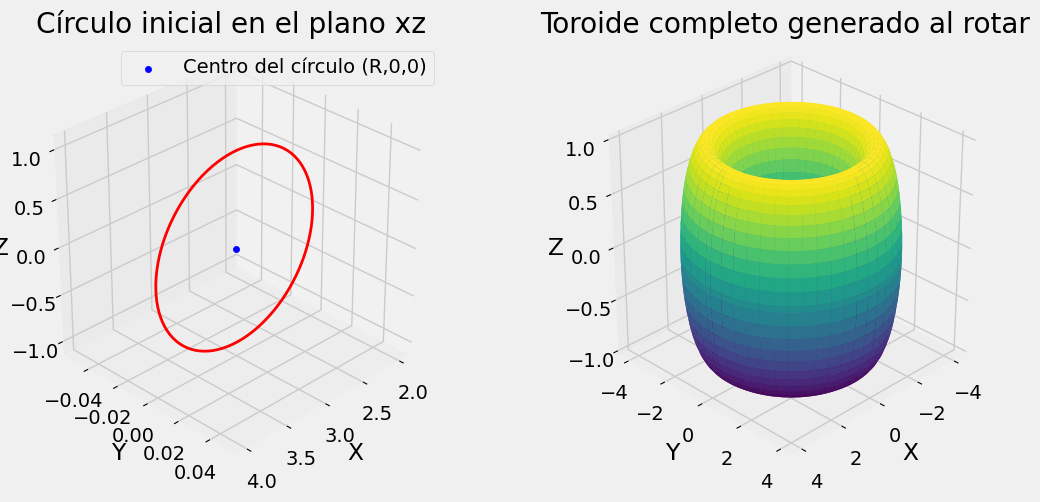

In [ ]:
# Reimportar bibliotecas después del reset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Paso 1: Círculo inicial en plano xz
theta = np.linspace(0, 2 * np.pi, 100)
r = 1
R = 3

circle_x = R + r * np.cos(theta)  # desplazado a la derecha
circle_y = np.zeros_like(theta)
circle_z = r * np.sin(theta)

# Paso 2: Construcción 3D del toroide
phi = np.linspace(0, 2 * np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta, phi)

X = (R + r * np.cos(theta_grid)) * np.cos(phi_grid)
Y = (R + r * np.cos(theta_grid)) * np.sin(phi_grid)
Z = r * np.sin(theta_grid)

# Graficar el círculo inicial y luego el toroide completo
fig1 = plt.figure(figsize=(12, 5))

# Subplot 1: el círculo original
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax1.plot(circle_x, circle_y, circle_z, color='red', linewidth=2)
ax1.scatter([R], [0], [0], color='blue', label='Centro del círculo (R,0,0)')
ax1.set_title("Círculo inicial en el plano xz")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_box_aspect([1,1,1])
ax1.legend()
ax1.view_init(elev=30, azim=45)

# Subplot 2: el toroide generado
ax2 = fig1.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax2.set_title("Toroide completo generado al rotar")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.set_box_aspect([1,1,1])
ax2.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()


In [ ]:
# 0. Instalaciones y habilitación de widgets (necesario en Colab)
!pip install -q ipywidgets
from google.colab import output
output.enable_custom_widget_manager() # Habilitar widgets personalizados si es necesario

# 1. Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
# FuncAnimation NO es necesario para el estático
from ipywidgets import (
    FloatSlider, Dropdown, ColorPicker, Output,
    Checkbox, Button, VBox, HBox, Layout, IntSlider # Añadido IntSlider
)
from IPython.display import display, clear_output, HTML # HTML para el título
import warnings

warnings.filterwarnings("ignore", category=UserWarning) # Ignorar warnings comunes

# 2. Función para crear el toroide
def create_toroid(R, r, theta_res=20, phi_res=20):
    """Genera las coordenadas X, Y, Z para un toroide."""
    θ_ang = np.linspace(0, 2 * np.pi, theta_res)
    φ_ang = np.linspace(0, 2 * np.pi, phi_res)
    θ, φ = np.meshgrid(θ_ang, φ_ang)
    X = (R + r * np.cos(θ)) * np.cos(φ)
    Y = (R + r * np.cos(θ)) * np.sin(φ)
    Z = r * np.sin(θ)
    return X, Y, Z

# 3. Opciones de colormap
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
              'coolwarm', 'rainbow', 'jet', 'twilight', 'hsv']

# 4. Widget de Salida para el gráfico y UI
static_plot_output = Output()
ui_output_static = Output()

# 5. Función principal para el Toroide Estático Interactivo
def setup_interactive_static_toroid():
    with ui_output_static:
        clear_output(wait=True)
        display(HTML("<h3>Toroide Estático Interactivo (Aspecto Corregido)</h3>"))

        # --- Widgets ---
        R_slider = FloatSlider(value=3.0, min=0.5, max=10.0, step=0.1, description='R (Radio Mayor):')
        r_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='r (Radio Menor):')

        elev_slider = FloatSlider(value=30, min=-90, max=90, step=5, description='Elevación Vista:')
        azim_slider = FloatSlider(value=30, min=0, max=360, step=5, description='Azimut Vista:')

        alpha_slider = FloatSlider(value=0.9, min=0.1, max=1.0, step=0.05, description='Alpha (Opacidad):')
        colormap_dropdown = Dropdown(options=color_maps, value='viridis', description='Colormap:')

        bg_color_picker = ColorPicker(value='#e0e0e0', description='Fondo Figura:')
        surface_color_picker = ColorPicker(value='#336699', description='Sup. (si no cmap):')
        edge_color_picker = ColorPicker(value='#222222', description='Color Bordes:')
        title_color_picker = ColorPicker(value='black', description='Color Título:')

        mesh_res_slider = IntSlider(value=30, min=10, max=80, step=2, description='Resolución Malla:')

        use_colormap_checkbox = Checkbox(value=True, description='Usar Colormap')
        show_edges_checkbox = Checkbox(value=True, description='Mostrar Bordes')

        update_button = Button(description='Actualizar Gráfico', button_style='primary', icon='refresh')

        # --- Layout de UI ---
        ui_layout = VBox([
            HBox([R_slider, r_slider]),
            HBox([mesh_res_slider, alpha_slider]),
            HBox([elev_slider, azim_slider]),
            HBox([colormap_dropdown, use_colormap_checkbox]),
            HBox([bg_color_picker, surface_color_picker]),
            HBox([edge_color_picker, title_color_picker]),
            show_edges_checkbox,
            update_button
        ])
        display(ui_layout)

    # --- Lógica del Botón ---
    def on_update_button_clicked(b):
        with static_plot_output:
            clear_output(wait=True) # Limpiar el gráfico anterior

            # --- Obtener valores de los widgets ---
            R_val = R_slider.value
            r_val = r_slider.value
            elev_val = elev_slider.value
            azim_val = azim_slider.value
            alpha_val = alpha_slider.value
            cmap_val = colormap_dropdown.value
            use_cmap = use_colormap_checkbox.value
            bg_color = bg_color_picker.value
            surf_color_val = surface_color_picker.value
            edge_color_val = edge_color_picker.value
            title_color = title_color_picker.value
            mesh_res = mesh_res_slider.value
            show_edges = show_edges_checkbox.value

            # --- Preparar figura y ejes ---
            fig = plt.figure(figsize=(7, 7)) # Figura cuadrada ayuda visualmente
            ax = fig.add_subplot(111, projection='3d')
            fig.patch.set_facecolor(bg_color)
            ax.set_facecolor(bg_color)

            # Generar datos del toroide
            X, Y, Z = create_toroid(R_val, r_val, theta_res=mesh_res, phi_res=mesh_res)

            # Determinar color/colormap de la superficie
            surface_plot_kwargs = {
                'alpha': alpha_val,
                'rstride': 1,
                'cstride': 1
            }
            if use_cmap:
                surface_plot_kwargs['cmap'] = cmap_val
            else:
                surface_plot_kwargs['color'] = surf_color_val

            if show_edges:
                surface_plot_kwargs['edgecolor'] = edge_color_val
                surface_plot_kwargs['linewidth'] = 0.3
            else:
                surface_plot_kwargs['edgecolor'] = 'none'


            # Dibujar la superficie
            ax.plot_surface(X, Y, Z, **surface_plot_kwargs)

            # Configurar ejes (título, quitar ticks)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
            ax.set_title("Toroide Estático 3D (Aspecto Corregido)", color=title_color, fontsize=16)

            # Configurar vista de cámara
            ax.view_init(elev=elev_val, azim=azim_val)

            # --- CLAVE PARA LA FORMA DE DONA CORRECTA ---
            # 1. Determinar el límite máximo para la caja de ploteo cúbica.
            #    El toroide se extiende hasta (R+r) en X e Y, y hasta r en Z.
            #    Usamos la mayor de estas extensiones para definir una caja cúbica.
            plot_limit = R_val + r_val # Esta es la extensión máxima del toroide.
                                       # Si r_val > R_val + r_val (imposible para un toroide),
                                       # se usaría r_val, pero R+r siempre será >= r.

            # 2. Establecer límites iguales para todos los ejes basados en plot_limit.
            #    Esto crea una "caja de datos" que es cúbica.
            ax.set_xlim([-plot_limit * 1.1, plot_limit * 1.1])
            ax.set_ylim([-plot_limit * 1.1, plot_limit * 1.1])
            ax.set_zlim([-plot_limit * 1.1, plot_limit * 1.1]) # Importante: Eje Z usa el mismo `plot_limit`

            # 3. Aplicar el aspect ratio para que las unidades visuales sean iguales.
            #    Esto actúa sobre la "caja de datos" cúbica que acabamos de definir.
            ax.set_box_aspect((1,1,1))
            #----------------------------------------------------

            plt.tight_layout()
            display(fig)
            plt.close(fig)

    update_button.on_click(on_update_button_clicked)

    # Valores iniciales para demostrar la corrección con tus parámetros de "canasta"
    R_slider.value = 3.0
    r_slider.value = 1.0
    mesh_res_slider.value = 30
    elev_slider.value = 30
    azim_slider.value = 30
    alpha_slider.value = 0.9
    # colormap_dropdown.value = 'viridis' # Ya es el default
    # edge_color_picker.value = '#222222' # Ya es el default
    # bg_color_picker.value = '#e0e0e0' # Ya es el default
    # show_edges_checkbox.value = True # Ya es el default

    on_update_button_clicked(None) # Generar un gráfico al inicio con los valores por defecto

# --- Ejecución ---
display(ui_output_static)
display(static_plot_output)
setup_interactive_static_toroid()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


Output()

Output()

In [ ]:
# 0. Instalaciones y habilitación de widgets (necesario en Colab)
!apt-get update -y > /dev/null
!apt-get install -y ffmpeg > /dev/null
!pip install -q ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

# 1. Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import (
    FloatSlider, Dropdown, ColorPicker, Output,
    Checkbox, IntSlider, Button, VBox, HBox, Layout
)
from IPython.display import display, clear_output, HTML
import warnings
import shutil # Para shutil.which("ffmpeg")

warnings.filterwarnings("ignore", category=UserWarning) # Ignorar warnings comunes de Matplotlib

# 2. Función para crear el toroide
def create_toroid(R, r, theta_res=20, phi_res=20):
    """Genera las coordenadas X, Y, Z para un toroide."""
    θ = np.linspace(0, 2 * np.pi, theta_res)
    φ = np.linspace(0, 2 * np.pi, phi_res)
    θ, φ = np.meshgrid(θ, φ)
    X = (R + r * np.cos(θ)) * np.cos(φ)
    Y = (R + r * np.cos(θ)) * np.sin(φ)
    Z = r * np.sin(θ)
    return X, Y, Z

# 3. Opciones de colormap
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
              'coolwarm', 'rainbow', 'jet', 'twilight', 'hsv']

# 4. Widget de Salida para la animación y UI
animation_output = Output()
ui_output = Output() # Para los controles

# 5. Variable global para mantener la referencia a la animación
current_animation = None

# 6. Función para mostrar la animación (video HTML5 o JS fallback)
def display_anim(anim):
    """Muestra la animación y cierra la figura estática."""
    global current_animation
    current_animation = anim # Guardar la referencia
    plt.close(anim._fig) # Cierra la figura estática que Matplotlib podría intentar mostrar

    if shutil.which("ffmpeg") is not None:
        video_html = anim.to_html5_video()
        display(HTML(video_html))
    else:
        js_html = anim.to_jshtml()
        display(HTML(js_html))
        print("ffmpeg no encontrado. Usando JS fallback (puede ser más lento y consumir más recursos).")


# 7. Función principal para configurar y mostrar el toroide rotatorio interactivo
def setup_interactive_rotating_toroid():
    """Configura la UI y la lógica para el toroide rotatorio interactivo."""

    with ui_output:
        clear_output(wait=True)
        display(HTML("<h3>Toroide Rotatorio Interactivo (Aspecto Corregido)</h3>"))

        # --- Widgets ---
        R_slider = FloatSlider(value=3.0, min=1.0, max=10.0, step=0.1, description='R (Radio Mayor):')
        r_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='r (Radio Menor):')
        alpha_slider = FloatSlider(value=0.9, min=0.1, max=1.0, step=0.05, description='Alpha (Opacidad):')
        mesh_res_slider = IntSlider(value=20, min=10, max=50, step=2, description='Resolución Malla:') # Añadido para consistencia

        colormap_dropdown = Dropdown(options=color_maps, value='viridis', description='Colormap:')
        bg_color_picker = ColorPicker(value='#1c1c1c', description='Fondo Fig:')
        title_color_picker = ColorPicker(value='white', description='Título Color:')

        frames_slider = IntSlider(value=60, min=20, max=240, step=10, description='Frames Anim:')
        interval_slider = IntSlider(value=100, min=20, max=500, step=10, description='Intervalo (ms):')

        show_edges_checkbox = Checkbox(value=False, description='Mostrar Bordes') # Default False

        start_button = Button(description='Generar/Actualizar Animación', button_style='info', icon='play')

        # --- Layout de UI ---
        ui_layout = VBox([
            HBox([R_slider, r_slider]),
            HBox([alpha_slider, mesh_res_slider]), # Añadido mesh_res_slider
            HBox([colormap_dropdown, frames_slider, interval_slider]),
            HBox([bg_color_picker, title_color_picker]),
            show_edges_checkbox,
            start_button
        ])
        display(ui_layout)

    def on_start_button_clicked(b):
        with animation_output:
            clear_output(wait=True)

            # --- Obtener valores de los widgets ---
            R_val = R_slider.value
            r_val = r_slider.value
            alpha_val = alpha_slider.value
            mesh_res = mesh_res_slider.value # Obtener valor
            cmap_val = colormap_dropdown.value
            bg_color = bg_color_picker.value
            title_color = title_color_picker.value
            num_frames = frames_slider.value
            interval_ms = interval_slider.value
            show_edges = show_edges_checkbox.value

            # --- Preparar figura y ejes ---
            fig = plt.figure(figsize=(7, 7))
            ax = fig.add_subplot(111, projection='3d')

            fig.patch.set_facecolor(bg_color)
            ax.set_facecolor(bg_color)

            # Generar datos del toroide con la resolución especificada
            X, Y, Z = create_toroid(R_val, r_val, theta_res=mesh_res, phi_res=mesh_res)

            edgecolor_param = 'gray' if show_edges else None
            linewidth_param = 0.2 if show_edges else 0

            # Dibujar la superficie una vez, antes de la animación
            surf = ax.plot_surface(X, Y, Z, cmap=cmap_val, alpha=alpha_val,
                                   edgecolor=edgecolor_param, linewidth=linewidth_param,
                                   rstride=1, cstride=1)

            # Configurar título y quitar ticks de los ejes
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
            ax.set_title("Toroide Rotatorio (Aspecto Corregido)", color=title_color, fontsize=16)

            # --- CLAVE PARA LA FORMA DE DONA CORRECTA ---
            # 1. Determinar el límite máximo para la caja de ploteo cúbica.
            plot_limit = R_val + r_val

            # 2. Establecer límites iguales para todos los ejes basados en plot_limit.
            ax.set_xlim([-plot_limit * 1.1, plot_limit * 1.1])
            ax.set_ylim([-plot_limit * 1.1, plot_limit * 1.1])
            ax.set_zlim([-plot_limit * 1.1, plot_limit * 1.1]) # Eje Z usa el mismo `plot_limit`

            # 3. Aplicar el aspect ratio para que las unidades visuales sean iguales.
            ax.set_box_aspect((1,1,1))
            #----------------------------------------------------

            # La elevación de la cámara es fija para esta animación, solo el azimut cambia.
            fixed_elevation = 30

            # Función de actualización para la animación (solo rota el azimut de la vista)
            def update_view(frame_angle_azim):
                ax.view_init(elev=fixed_elevation, azim=frame_angle_azim)
                return surf,

            # Crear la animación
            anim = FuncAnimation(fig, update_view,
                                 frames=np.linspace(0, 360, num_frames, endpoint=False),
                                 interval=interval_ms,
                                 blit=False) # blit=False es más robusto con cambios de view_init

            # Mostrar la animación usando la función helper
            display_anim(anim)

    start_button.on_click(on_start_button_clicked)

    # Valores iniciales para R y r para probar la corrección
    R_slider.value = 3.0
    r_slider.value = 1.0
    # Llamada inicial para mostrar una animación al cargar
    on_start_button_clicked(None)

# --- Ejecución ---
display(ui_output)
display(animation_output)
setup_interactive_rotating_toroid()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Output()

Output()

In [ ]:
# 0. Instalaciones y habilitación de widgets (necesario en Colab)
!apt-get update -y > /dev/null
!apt-get install -y ffmpeg > /dev/null
!pip install -q ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

# 1. Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import (
    FloatSlider, Dropdown, ColorPicker, Output,
    Checkbox, IntSlider, Button, VBox, HBox, Layout
)
from IPython.display import display, clear_output, HTML
import warnings
import shutil # Para shutil.which("ffmpeg")

warnings.filterwarnings("ignore", category=UserWarning)

# 2. Función para crear el toroide (no se usa directamente en update_wave,
# ya que el cálculo de r_wave es específico aquí)
# def create_toroid(R, r, theta_res=20, phi_res=20):
#     ...

# 3. Opciones de colormap
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
              'coolwarm', 'rainbow', 'jet', 'twilight', 'hsv']

# 4. Widget de Salida para la animación y UI
animation_output_wave = Output()
ui_output_wave = Output()

# 5. Variable global para mantener la referencia a la animación
current_animation_wave = None

# 6. Función para mostrar la animación
def display_anim_wave(anim):
    global current_animation_wave
    current_animation_wave = anim
    plt.close(anim._fig)
    if shutil.which("ffmpeg") is not None:
        video_html = anim.to_html5_video()
        display(HTML(video_html))
    else:
        js_html = anim.to_jshtml()
        display(HTML(js_html))
        print("ffmpeg no encontrado. Usando JS fallback.")

# 7. Función principal para el Toroide Ondulante Interactivo
def setup_interactive_waving_toroid():
    with ui_output_wave:
        clear_output(wait=True)
        display(HTML("<h3>Toroide Ondulante Interactivo (Aspecto Corregido)</h3>"))

        # --- Widgets ---
        R_slider = FloatSlider(value=3.0, min=1.0, max=10.0, step=0.1, description='R Base:')
        r_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='r Base:')
        amp_slider = FloatSlider(value=0.3, min=0.0, max=0.8, step=0.05, description='Amplitud Onda:')

        alpha_slider = FloatSlider(value=0.9, min=0.1, max=1.0, step=0.05, description='Alpha:')
        colormap_dropdown = Dropdown(options=color_maps, value='plasma', description='Colormap:')

        bg_color_picker = ColorPicker(value='#1c1c1c', description='Fondo Fig:')
        title_color_picker = ColorPicker(value='white', description='Título Color:')

        frames_slider = IntSlider(value=60, min=20, max=180, step=10, description='Frames Anim:')
        interval_slider = IntSlider(value=100, min=20, max=500, step=10, description='Intervalo (ms):')

        mesh_res_slider = IntSlider(value=20, min=10, max=50, step=2, description='Resolución Malla:')
        show_edges_checkbox = Checkbox(value=False, description='Mostrar Bordes')
        start_button = Button(description='Generar/Actualizar Animación', button_style='success', icon='play')

        def _update_amp_max(*args):
            amp_slider.max = r_slider.value * 0.9
            if amp_slider.value > amp_slider.max:
                amp_slider.value = amp_slider.max
        r_slider.observe(_update_amp_max, 'value')
        _update_amp_max()

        ui_layout = VBox([
            HBox([R_slider, r_slider, amp_slider]),
            HBox([alpha_slider, colormap_dropdown, mesh_res_slider]),
            HBox([frames_slider, interval_slider]),
            HBox([bg_color_picker, title_color_picker]),
            show_edges_checkbox,
            start_button
        ])
        display(ui_layout)

    def on_start_button_clicked(b):
        with animation_output_wave:
            clear_output(wait=True)

            R_base = R_slider.value
            r_base = r_slider.value
            amplitude = amp_slider.value
            alpha_val = alpha_slider.value
            cmap_val = colormap_dropdown.value
            bg_color = bg_color_picker.value
            title_color = title_color_picker.value
            num_frames = frames_slider.value
            interval_ms = interval_slider.value
            mesh_res = mesh_res_slider.value
            show_edges = show_edges_checkbox.value

            fig = plt.figure(figsize=(7, 7))
            ax = fig.add_subplot(111, projection='3d')
            fig.patch.set_facecolor(bg_color)

            theta_ang = np.linspace(0, 2 * np.pi, mesh_res)
            phi_ang = np.linspace(0, 2 * np.pi, mesh_res)
            THETA, PHI = np.meshgrid(theta_ang, phi_ang)

            fixed_elevation = 25 # Elevación de la cámara

            def update_wave(frame_index):
                ax.clear()
                ax.set_facecolor(bg_color)

                wave_offset = frame_index * (2 * np.pi / num_frames)
                r_wave = r_base + amplitude * np.sin(PHI + wave_offset)

                X = (R_base + r_wave * np.cos(THETA)) * np.cos(PHI)
                Y = (R_base + r_wave * np.cos(THETA)) * np.sin(PHI)
                Z = r_wave * np.sin(THETA)

                edgecolor_param = 'gray' if show_edges else None
                linewidth_param = 0.2 if show_edges else 0
                surf = ax.plot_surface(X, Y, Z, cmap=cmap_val, alpha=alpha_val,
                                       edgecolor=edgecolor_param, linewidth=linewidth_param,
                                       rstride=1, cstride=1)

                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_zticks([])
                ax.set_title("Toroide Ondulante (Aspecto Corregido)", color=title_color, fontsize=16)

                # --- CLAVE PARA LA FORMA DE DONA CORRECTA (DENTRO DE UPDATE) ---
                # 1. Determinar el límite máximo para la caja de ploteo cúbica.
                #    El radio menor máximo posible es r_base + amplitude.
                #    La extensión XY máxima es R_base + (r_base + amplitude).

                r_max_actual = r_base + amplitude # Radio menor máximo que alcanzará la onda
                plot_limit = R_base + r_max_actual # Extensión máxima del toroide ondulante

                # 2. Establecer límites iguales para todos los ejes basados en plot_limit.
                ax.set_xlim([-plot_limit * 1.1, plot_limit * 1.1])
                ax.set_ylim([-plot_limit * 1.1, plot_limit * 1.1])
                ax.set_zlim([-plot_limit * 1.1, plot_limit * 1.1]) # Eje Z usa el mismo `plot_limit`

                # 3. Aplicar el aspect ratio para que las unidades visuales sean iguales.
                ax.set_box_aspect((1,1,1))
                #----------------------------------------------------

                azim_angle = frame_index * (360.0 / num_frames)
                ax.view_init(elev=fixed_elevation, azim=azim_angle)

                return surf,

            anim = FuncAnimation(fig, update_wave,
                                 frames=num_frames,
                                 interval=interval_ms,
                                 blit=False)

            display_anim_wave(anim)

    start_button.on_click(on_start_button_clicked)

    # Valores iniciales para R y r para probar la corrección
    R_slider.value = 3.0
    r_slider.value = 1.0
    amp_slider.value = 0.3 # Amplitud moderada

    on_start_button_clicked(None)

# --- Ejecución ---
display(ui_output_wave)
display(animation_output_wave)
setup_interactive_waving_toroid()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Output()

Output()

In [ ]:
# 0. Instalaciones y habilitación de widgets (necesario en Colab)
!apt-get update -y > /dev/null
!apt-get install -y ffmpeg > /dev/null
!pip install -q ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

# 1. Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import (
    FloatSlider, Dropdown, ColorPicker, Output,
    Checkbox, IntSlider, Button, VBox, HBox, Layout
)
from IPython.display import display, clear_output, HTML
import warnings
import shutil

warnings.filterwarnings("ignore", category=UserWarning)

# 2. Función para crear el toroide
def create_toroid(R, r, theta_res=20, phi_res=20):
    θ_ang = np.linspace(0, 2 * np.pi, theta_res)
    φ_ang = np.linspace(0, 2 * np.pi, phi_res)
    θ, φ = np.meshgrid(θ_ang, φ_ang)
    X = (R + r * np.cos(θ)) * np.cos(φ)
    Y = (R + r * np.cos(θ)) * np.sin(φ)
    Z = r * np.sin(θ)
    return X, Y, Z

# 3. Opciones de colormap
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
              'coolwarm', 'rainbow', 'jet', 'twilight', 'hsv']

# 4. Widget de Salida para la animación y UI
animation_output_morph = Output()
ui_output_morph = Output()

# 5. Variable global para mantener la referencia a la animación
current_animation_morph = None

# 6. Función para mostrar la animación
def display_anim_morph(anim):
    global current_animation_morph
    current_animation_morph = anim
    plt.close(anim._fig)
    if shutil.which("ffmpeg") is not None:
        video_html = anim.to_html5_video()
        display(HTML(video_html))
    else:
        js_html = anim.to_jshtml()
        display(HTML(js_html))
        print("ffmpeg no encontrado. Usando JS fallback.")

# 7. Función principal para el Toroide Morphing Interactivo
def setup_interactive_morphing_toroid():
    with ui_output_morph:
        clear_output(wait=True)
        display(HTML("<h3>Toroide Morphing Interactivo (Aspecto Corregido)</h3>"))

        # --- Widgets ---
        R0_slider = FloatSlider(value=3.0, min=0.5, max=10.0, step=0.1, description='R Inicio:')
        r0_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='r Inicio:')
        R1_slider = FloatSlider(value=5.0, min=0.5, max=10.0, step=0.1, description='R Fin:')
        r1_slider = FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description='r Fin:')

        alpha_slider = FloatSlider(value=0.9, min=0.1, max=1.0, step=0.05, description='Alpha:')
        colormap_dropdown = Dropdown(options=color_maps, value='coolwarm', description='Colormap:')

        bg_color_picker = ColorPicker(value='#1c1c1c', description='Fondo Fig:')
        title_color_picker = ColorPicker(value='white', description='Título Color:')

        frames_slider = IntSlider(value=90, min=30, max=240, step=10, description='Frames Anim:')
        interval_slider = IntSlider(value=100, min=20, max=500, step=10, description='Intervalo (ms):')

        mesh_res_slider = IntSlider(value=20, min=10, max=50, step=2, description='Resolución Malla:')
        show_edges_checkbox = Checkbox(value=False, description='Mostrar Bordes')
        start_button = Button(description='Generar/Actualizar Animación', button_style='warning', icon='play')

        ui_layout = VBox([
            HBox([R0_slider, r0_slider]),
            HBox([R1_slider, r1_slider]),
            HBox([alpha_slider, colormap_dropdown, mesh_res_slider]),
            HBox([frames_slider, interval_slider]),
            HBox([bg_color_picker, title_color_picker]),
            show_edges_checkbox,
            start_button
        ])
        display(ui_layout)

    def on_start_button_clicked(b):
        with animation_output_morph:
            clear_output(wait=True)

            R_start = R0_slider.value
            r_start = r0_slider.value
            R_end = R1_slider.value
            r_end = r1_slider.value
            alpha_val = alpha_slider.value
            cmap_val = colormap_dropdown.value
            bg_color = bg_color_picker.value
            title_color = title_color_picker.value
            num_frames = frames_slider.value
            interval_ms = interval_slider.value
            mesh_res = mesh_res_slider.value
            show_edges = show_edges_checkbox.value

            fig = plt.figure(figsize=(7, 7))
            ax = fig.add_subplot(111, projection='3d')
            fig.patch.set_facecolor(bg_color)

            # --- PRE-CALCULAR LÍMITES GLOBALES PARA LA ANIMACIÓN ---
            # Para que la caja de datos sea cúbica y el aspect ratio funcione,
            # necesitamos que los límites de los ejes sean los mismos y abarquen
            # la máxima extensión que el toroide alcanzará durante el morphing.

            # Máximo R y r que se alcanzarán durante la animación
            max_R_overall = max(R_start, R_end)
            max_r_overall = max(r_start, r_end)

            # La máxima extensión del toroide en cualquier momento es max_R_overall + max_r_overall
            global_plot_limit = max_R_overall + max_r_overall
            #---------------------------------------------------------

            fixed_elevation = 25 # Elevación de la cámara

            def update_morph(frame_index):
                ax.clear()
                ax.set_facecolor(bg_color)

                if num_frames > 1:
                    t = frame_index / (num_frames - 1)
                else:
                    t = 0

                current_R = R_start + t * (R_end - R_start)
                current_r = r_start + t * (r_end - r_start)
                current_r = max(0.01, current_r)

                X, Y, Z = create_toroid(current_R, current_r, theta_res=mesh_res, phi_res=mesh_res)

                edgecolor_param = 'gray' if show_edges else None
                linewidth_param = 0.2 if show_edges else 0
                surf = ax.plot_surface(X, Y, Z, cmap=cmap_val, alpha=alpha_val,
                                       edgecolor=edgecolor_param, linewidth=linewidth_param,
                                       rstride=1, cstride=1)

                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_zticks([])
                ax.set_title("Toroide Morphing ", color=title_color, fontsize=16)

                # --- CLAVE PARA LA FORMA DE DONA CORRECTA (DENTRO DE UPDATE) ---
                # Usamos el global_plot_limit pre-calculado.
                ax.set_xlim([-global_plot_limit * 1.1, global_plot_limit * 1.1])
                ax.set_ylim([-global_plot_limit * 1.1, global_plot_limit * 1.1])
                ax.set_zlim([-global_plot_limit * 1.1, global_plot_limit * 1.1])

                ax.set_box_aspect((1,1,1))
                #----------------------------------------------------

                azim_angle = frame_index * (360.0 / num_frames)
                ax.view_init(elev=fixed_elevation, azim=azim_angle)

                return surf,

            anim = FuncAnimation(fig, update_morph,
                                 frames=num_frames,
                                 interval=interval_ms,
                                 blit=False)

            display_anim_morph(anim)

    start_button.on_click(on_start_button_clicked)

    # Valores iniciales para probar la corrección
    R0_slider.value = 3.0
    r0_slider.value = 1.0
    R1_slider.value = 1.5 # Hacer que se encoja un poco
    r1_slider.value = 0.3

    on_start_button_clicked(None)

# --- Ejecución ---
display(ui_output_morph)
display(animation_output_morph)
setup_interactive_morphing_toroid()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Output()

Output()

In [ ]:
# 0. Instalaciones y habilitación de widgets (necesario en Colab)
!apt-get update -y > /dev/null
!apt-get install -y ffmpeg > /dev/null
!pip install -q ipywidgets
from google.colab import output
output.enable_custom_widget_manager()

# 1. Imports necesarios
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import (
    FloatSlider, Dropdown, ColorPicker, Output,
    Checkbox, IntSlider, Button, VBox, HBox, Layout
)
from IPython.display import display, clear_output, HTML
import warnings
import shutil # Para shutil.which("ffmpeg")

warnings.filterwarnings("ignore", category=UserWarning)

# 2. Función para crear el toroide (no se usa directamente en update_wave,
# ya que el cálculo de r_wave es específico aquí)
# def create_toroid(R, r, theta_res=20, phi_res=20):
#     ...

# 3. Opciones de colormap
color_maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
              'coolwarm', 'rainbow', 'jet', 'twilight', 'hsv']

# 4. Widget de Salida para la animación y UI
animation_output_wave = Output()
ui_output_wave = Output()

# 5. Variable global para mantener la referencia a la animación
current_animation_wave = None

# 6. Función para mostrar la animación
def display_anim_wave(anim):
    global current_animation_wave
    current_animation_wave = anim
    plt.close(anim._fig)
    if shutil.which("ffmpeg") is not None:
        video_html = anim.to_html5_video()
        display(HTML(video_html))
    else:
        js_html = anim.to_jshtml()
        display(HTML(js_html))
        print("ffmpeg no encontrado. Usando JS fallback.")

# 7. Función principal para el Toroide Ondulante Interactivo
def setup_interactive_waving_toroid():
    with ui_output_wave:
        clear_output(wait=True)
        display(HTML("<h3>Toroide Ondulante Interactivo (Aspecto Corregido)</h3>"))

        # --- Widgets ---
        R_slider = FloatSlider(value=3.0, min=1.0, max=10.0, step=0.1, description='R Base:')
        r_slider = FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='r Base:')
        amp_slider = FloatSlider(value=0.3, min=0.0, max=0.8, step=0.05, description='Amplitud Onda:')

        alpha_slider = FloatSlider(value=0.9, min=0.1, max=1.0, step=0.05, description='Alpha:')
        colormap_dropdown = Dropdown(options=color_maps, value='plasma', description='Colormap:')

        bg_color_picker = ColorPicker(value='#1c1c1c', description='Fondo Fig:')
        title_color_picker = ColorPicker(value='white', description='Título Color:')

        frames_slider = IntSlider(value=60, min=20, max=180, step=10, description='Frames Anim:')
        interval_slider = IntSlider(value=100, min=20, max=500, step=10, description='Intervalo (ms):')

        mesh_res_slider = IntSlider(value=20, min=10, max=50, step=2, description='Resolución Malla:')
        show_edges_checkbox = Checkbox(value=False, description='Mostrar Bordes')
        start_button = Button(description='Generar/Actualizar Animación', button_style='success', icon='play')

        def _update_amp_max(*args):
            amp_slider.max = r_slider.value * 0.9
            if amp_slider.value > amp_slider.max:
                amp_slider.value = amp_slider.max
        r_slider.observe(_update_amp_max, 'value')
        _update_amp_max()

        ui_layout = VBox([
            HBox([R_slider, r_slider, amp_slider]),
            HBox([alpha_slider, colormap_dropdown, mesh_res_slider]),
            HBox([frames_slider, interval_slider]),
            HBox([bg_color_picker, title_color_picker]),
            show_edges_checkbox,
            start_button
        ])
        display(ui_layout)

    def on_start_button_clicked(b):
        with animation_output_wave:
            clear_output(wait=True)

            R_base = R_slider.value
            r_base = r_slider.value
            amplitude = amp_slider.value
            alpha_val = alpha_slider.value
            cmap_val = colormap_dropdown.value
            bg_color = bg_color_picker.value
            title_color = title_color_picker.value
            num_frames = frames_slider.value
            interval_ms = interval_slider.value
            mesh_res = mesh_res_slider.value
            show_edges = show_edges_checkbox.value

            fig = plt.figure(figsize=(7, 7))
            ax = fig.add_subplot(111, projection='3d')
            fig.patch.set_facecolor(bg_color)

            theta_ang = np.linspace(0, 2 * np.pi, mesh_res)
            phi_ang = np.linspace(0, 2 * np.pi, mesh_res)
            THETA, PHI = np.meshgrid(theta_ang, phi_ang)

            fixed_elevation = 25 # Elevación de la cámara

            def update_wave(frame_index):
                ax.clear()
                ax.set_facecolor(bg_color)

                wave_offset = frame_index * (2 * np.pi / num_frames)
                r_wave = r_base + amplitude * np.sin(PHI + wave_offset)

                X = (R_base + r_wave * np.cos(THETA)) * np.cos(PHI)
                Y = (R_base + r_wave * np.cos(THETA)) * np.sin(PHI)
                Z = r_wave * np.sin(THETA)

                edgecolor_param = 'gray' if show_edges else None
                linewidth_param = 0.2 if show_edges else 0
                surf = ax.plot_surface(X, Y, Z, cmap=cmap_val, alpha=alpha_val,
                                       edgecolor=edgecolor_param, linewidth=linewidth_param,
                                       rstride=1, cstride=1)

                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_zticks([])
                ax.set_title("Toroide Ondulante" , color=title_color, fontsize=16)

                # --- CLAVE PARA LA FORMA DE DONA CORRECTA (DENTRO DE UPDATE) ---
                # 1. Determinar el límite máximo para la caja de ploteo cúbica.
                #    El radio menor máximo posible es r_base + amplitude.
                #    La extensión XY máxima es R_base + (r_base + amplitude).

                r_max_actual = r_base + amplitude # Radio menor máximo que alcanzará la onda
                plot_limit = R_base + r_max_actual # Extensión máxima del toroide ondulante

                # 2. Establecer límites iguales para todos los ejes basados en plot_limit.
                ax.set_xlim([-plot_limit * 1.1, plot_limit * 1.1])
                ax.set_ylim([-plot_limit * 1.1, plot_limit * 1.1])
                ax.set_zlim([-plot_limit * 1.1, plot_limit * 1.1]) # Eje Z usa el mismo `plot_limit`

                # 3. Aplicar el aspect ratio para que las unidades visuales sean iguales.
                ax.set_box_aspect((1,1,1))
                #----------------------------------------------------

                azim_angle = frame_index * (360.0 / num_frames)
                ax.view_init(elev=fixed_elevation, azim=azim_angle)

                return surf,

            anim = FuncAnimation(fig, update_wave,
                                 frames=num_frames,
                                 interval=interval_ms,
                                 blit=False)

            display_anim_wave(anim)

    start_button.on_click(on_start_button_clicked)

    # Valores iniciales para R y r para probar la corrección
    R_slider.value = 3.0
    r_slider.value = 1.0
    amp_slider.value = 0.3 # Amplitud moderada

    on_start_button_clicked(None)

# --- Ejecución ---
display(ui_output_wave)
display(animation_output_wave)
setup_interactive_waving_toroid()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.0 MB/s eta 0:00:00


Output()

Output()

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d # Para la convolución
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
from matplotlib import colors
import matplotlib.gridspec as gridspec # Para layout de comparación
import time # No se usa activamente pero es común en simulaciones

# Función principal para ejecutar la simulación
def run_infection_simulation_v2(
    grid_size=15,
    initial_pattern="diagonal_N",
    k_custom_value=None, # Para patrón 'custom_k'
    infection_threshold=2,
    animation_speed=300,
    max_steps=200,
    neighborhood_type='von_neumann', # 'von_neumann' o 'moore'
    boundary_condition='fixed_zero', # 'fixed_zero', 'toroidal', 'reflective'
    verbose=True # Controla si se imprimen los detalles de esta ejecución
):
    if verbose:
        print(f"\n--- Iniciando Simulación V2 ({boundary_condition.replace('_', ' ').title()}) ---")
        print(f"Tamaño: {grid_size}x{grid_size}, Patrón: {initial_pattern}, Umbral: {infection_threshold}")
        print(f"Vecindario: {neighborhood_type}, Cond. Frontera: {boundary_condition}")
        print(f"Máx Pasos: {max_steps}")

    # Inicializar la cuadrícula
    grid = np.zeros((grid_size, grid_size), dtype=int)
    k_initial_infected = 0

    # --- Definición de Patrones Iniciales ---
    center_row, center_col = grid_size // 2, grid_size // 2
    initial_infected_coords = []

    if initial_pattern == "grupo":
        coords_to_add = [(center_row, center_col-1), (center_row, center_col), (center_row, center_col+1),
                         (center_row-1, center_col), (center_row+1, center_col)]
        for r, c in coords_to_add:
            if 0 <= r < grid_size and 0 <= c < grid_size:
                initial_infected_coords.append((r, c))
        if not initial_infected_coords and grid_size > 0: initial_infected_coords.append((center_row,center_col))
    elif initial_pattern == "linea_corta":
        start_c = max(0, center_col - 2)
        end_c = min(grid_size, center_col + 3)
        for c in range(start_c, end_c):
             if 0 <= center_row < grid_size and 0 <= c < grid_size:
                initial_infected_coords.append((center_row, c))
    elif initial_pattern == "esquina_2x2":
        coords_to_add = [(0,0), (0,1), (1,0), (1,1)]
        for r,c in coords_to_add:
            if 0 <= r < grid_size and 0 <= c < grid_size:
                initial_infected_coords.append((r,c))
    elif initial_pattern == "aleatorio_N":
        num_initial = grid_size
        if num_initial > grid_size*grid_size: num_initial = grid_size*grid_size
        indices = np.random.choice(grid_size*grid_size, num_initial, replace=False)
        for idx in indices:
            initial_infected_coords.append((idx // grid_size, idx % grid_size))
    elif initial_pattern == "custom_k":
        num_initial = k_custom_value if k_custom_value is not None else grid_size
        if num_initial > grid_size*grid_size: num_initial = grid_size*grid_size
        if num_initial < 0 : num_initial = 0
        indices = np.random.choice(grid_size*grid_size, num_initial, replace=False)
        for idx in indices:
            initial_infected_coords.append((idx // grid_size, idx % grid_size))
        if verbose: print(f"Patrón 'custom_k' con {num_initial} celdas aleatorias.")
    elif initial_pattern == "diagonal_N":
        for i in range(grid_size):
            initial_infected_coords.append((i, i))
    elif initial_pattern == "linea_N_no_propaga":
        for c in range(grid_size):
            initial_infected_coords.append((center_row, c))
    elif initial_pattern == "dos_filas_2N":
        if grid_size >= 2:
            row1 = center_row -1 if center_row > 0 else 0
            row2 = center_row
            for c in range(grid_size): initial_infected_coords.append((row1,c))
            for c in range(grid_size): initial_infected_coords.append((row2,c))
        elif grid_size == 1:
            initial_infected_coords.append((0,0))

    unique_coords = list(set(initial_infected_coords))
    for r_idx, c_idx in unique_coords:
        if 0 <= r_idx < grid_size and 0 <= c_idx < grid_size:
            grid[r_idx, c_idx] = 1

    k_initial_infected = np.sum(grid)
    if k_initial_infected == 0 and grid_size > 0 :
        if grid_size > 0 : # Evitar error si grid_size es 0
             grid[center_row, center_col] = 1
             k_initial_infected = 1
    if verbose: print(f"Celdas infectadas inicialmente (k_0): {k_initial_infected}")

    if neighborhood_type == 'von_neumann':
        kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=int)
    elif neighborhood_type == 'moore':
        kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]], dtype=int)
    else:
        kernel = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]], dtype=int)

    def infection_step_ac(current_grid_ac):
        boundary_mode = 'fill'
        fill_val = 0
        if boundary_condition == 'toroidal':
            boundary_mode = 'wrap'
        elif boundary_condition == 'reflective':
            boundary_mode = 'symm'
        neighbor_count = convolve2d(current_grid_ac, kernel, mode='same', boundary=boundary_mode, fillvalue=fill_val if boundary_mode == 'fill' else 0)
        newly_infected_mask = (current_grid_ac == 0) & (neighbor_count >= infection_threshold)
        next_grid_ac = current_grid_ac.copy()
        next_grid_ac[newly_infected_mask] = 1
        return next_grid_ac

    def calculate_perimeter_ac(grid_to_calc):
        perimeter_val = 0
        padded_grid = np.pad(grid_to_calc, pad_width=1, mode='constant', constant_values=0)
        for r_idx in range(1, grid_size + 1):
            for c_idx in range(1, grid_size + 1):
                if padded_grid[r_idx, c_idx] == 1:
                    if padded_grid[r_idx-1, c_idx] == 0: perimeter_val += 1
                    if padded_grid[r_idx+1, c_idx] == 0: perimeter_val += 1
                    if padded_grid[r_idx, c_idx-1] == 0: perimeter_val += 1
                    if padded_grid[r_idx, c_idx+1] == 0: perimeter_val += 1
        return perimeter_val

    def identify_perimeter_cells_ac(grid_to_identify):
        perimeter_cells_grid = np.zeros_like(grid_to_identify, dtype=int)
        padded_grid = np.pad(grid_to_identify, pad_width=1, mode='constant', constant_values=0)
        for r_idx in range(1, grid_size + 1):
            for c_idx in range(1, grid_size + 1):
                if padded_grid[r_idx, c_idx] == 1:
                    is_on_perimeter = False
                    if padded_grid[r_idx-1, c_idx] == 0: is_on_perimeter = True
                    elif padded_grid[r_idx+1, c_idx] == 0: is_on_perimeter = True
                    elif padded_grid[r_idx, c_idx-1] == 0: is_on_perimeter = True
                    elif padded_grid[r_idx, c_idx+1] == 0: is_on_perimeter = True
                    if is_on_perimeter:
                        perimeter_cells_grid[r_idx-1, c_idx-1] = 1
        return perimeter_cells_grid

    history_grids = [grid.copy()]
    history_perimeters = [calculate_perimeter_ac(grid)]
    history_infected_areas = [np.sum(grid)]
    history_delta_L = ["N/A"]

    stable = False
    step_count = 0
    total_cells_in_grid = grid_size * grid_size if grid_size > 0 else 0 # Manejar grid_size = 0
    all_infected_flag = False

    if verbose: print("Iniciando bucle de simulación...")
    while not stable and step_count < max_steps:
        current_grid_state = history_grids[-1]
        new_grid_state = infection_step_ac(current_grid_state)
        history_grids.append(new_grid_state)
        current_perimeter_val = calculate_perimeter_ac(new_grid_state)
        history_perimeters.append(current_perimeter_val)
        history_infected_areas.append(np.sum(new_grid_state))
        delta_L_val = current_perimeter_val - history_perimeters[-2]
        history_delta_L.append(delta_L_val)

        if np.array_equal(new_grid_state, current_grid_state):
            stable = True
            if verbose: print(f"Simulación estabilizada en {step_count+1} pasos.")
        elif history_infected_areas[-1] == total_cells_in_grid and total_cells_in_grid > 0:
            stable = True
            all_infected_flag = True
            if verbose: print(f"¡Toda la cuadrícula infectada en {step_count+1} pasos!")
        else:
            step_count += 1

    if step_count == max_steps and not stable and verbose:
        print(f"Simulación detenida al alcanzar el máximo de {max_steps} pasos.")

    num_total_steps_simulated = len(history_grids)

    # --- Preparación para Visualización (solo si animation_speed > 0 o es una simulación individual) ---
    # Para evitar crear figuras innecesarias durante la comparación automatizada si no se pide animación
    html_output = None
    if animation_speed > 0 and verbose: # Solo generar animación si se pide (y es una ejecución 'verbose')
        custom_cmap = colors.ListedColormap(['#FFFFFF', '#FF9999', '#FF0000'])
        cmap_bounds = [-0.5, 0.5, 1.5, 2.5]
        cmap_norm = colors.BoundaryNorm(cmap_bounds, custom_cmap.N)

        fig_main = plt.figure(figsize=(15, 10))
        gs_main_fig = fig_main.add_gridspec(2, 3) # Renombrado para evitar conflicto con gs de comparación
        ax_grid_anim = fig_main.add_subplot(gs_main_fig[:, 0])
        ax_perimeter_plot = fig_main.add_subplot(gs_main_fig[0, 1])
        ax_area_plot = fig_main.add_subplot(gs_main_fig[0, 2])
        ax_delta_L_plot = fig_main.add_subplot(gs_main_fig[1, 1])
        ax_perimeter_vs_area_plot = fig_main.add_subplot(gs_main_fig[1, 2])

        combined_display_grid = np.zeros_like(history_grids[0], dtype=int)
        if grid_size > 0: # Solo si hay cuadrícula
            perimeter_cell_mask_initial = identify_perimeter_cells_ac(history_grids[0])
            combined_display_grid[history_grids[0] == 1] = 1
            combined_display_grid[(history_grids[0] == 1) & (perimeter_cell_mask_initial == 1)] = 2

        im_animation = ax_grid_anim.imshow(combined_display_grid, cmap=custom_cmap, norm=cmap_norm, animated=True)
        title_str = (f'Evolución (N={grid_size}, T={infection_threshold}, k₀={k_initial_infected})\n'
                     f'Vec: {neighborhood_type.replace("_"," ").title()}, Frontera: {boundary_condition.replace("_"," ").title()}')
        ax_grid_anim.set_title(title_str, fontsize=10)
        ax_grid_anim.set_xticks([])
        ax_grid_anim.set_yticks([])
        legend_elements = [
            plt.Rectangle((0,0),1,1, facecolor='#FFFFFF', edgecolor='grey', label='No Infectado (0)'),
            plt.Rectangle((0,0),1,1, facecolor='#FF9999', edgecolor='grey', label='Infectado (1)'),
            plt.Rectangle((0,0),1,1, facecolor='#FF0000', edgecolor='grey', label='Perímetro (2)')
        ]
        ax_grid_anim.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=3, fontsize=9)
        text_info_on_grid = ax_grid_anim.text(0.02, 0.98, '', transform=ax_grid_anim.transAxes, fontsize=9,
                                           verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

        line_perimeter_time, = ax_perimeter_plot.plot([], [], 'o-', color='red', lw=2, label='Perímetro (L)')
        ax_perimeter_plot.set_xlim(-0.5, num_total_steps_simulated - 0.5)
        ax_perimeter_plot.set_ylim(0, max(1, max(history_perimeters, default=0) * 1.1))
        ax_perimeter_plot.set_title('Perímetro vs Tiempo', fontsize=10)
        ax_perimeter_plot.set_xlabel('Paso (t)', fontsize=9)
        ax_perimeter_plot.set_ylabel('L', fontsize=9)
        ax_perimeter_plot.grid(True, linestyle=':', alpha=0.7)
        ax_perimeter_plot.legend(fontsize=8)

        fraction_infected = [area / total_cells_in_grid if total_cells_in_grid > 0 else 0 for area in history_infected_areas]
        line_area_time, = ax_area_plot.plot([], [], 'o-', color='blue', lw=2, label='Fracción Infectada (A/N²)')
        ax_area_plot.set_xlim(-0.5, num_total_steps_simulated - 0.5)
        ax_area_plot.set_ylim(-0.05, 1.05)
        ax_area_plot.set_title('Fracción Infectada vs Tiempo', fontsize=10)
        ax_area_plot.set_xlabel('Paso (t)', fontsize=9)
        ax_area_plot.set_ylabel('A/N²', fontsize=9)
        ax_area_plot.grid(True, linestyle=':', alpha=0.7)
        ax_area_plot.legend(fontsize=8)

        valid_delta_Ls = [dl for dl in history_delta_L[1:] if isinstance(dl, (int, float))]
        steps_for_delta_L = range(1, len(valid_delta_Ls) + 1)
        line_delta_L_time, = ax_delta_L_plot.plot([], [], 'o-', color='purple', lw=2, label='ΔL = L\u209c - L\u209c\u208B\u2081')
        ax_delta_L_plot.axhline(0, color='black', linestyle='--', lw=1, label='ΔL = 0')
        ax_delta_L_plot.set_xlim(0.5, num_total_steps_simulated -0.5 if num_total_steps_simulated > 1 else 1.5)
        min_dl = min(valid_delta_Ls, default=-1) * 1.1 if valid_delta_Ls else -2
        max_dl = max(valid_delta_Ls, default=1) * 1.1 if valid_delta_Ls else 2
        if min_dl == 0 and max_dl == 0 and valid_delta_Ls : min_dl, max_dl = -1,1
        ax_delta_L_plot.set_ylim(min(min_dl, -0.5) , max(max_dl, 0.5) )
        ax_delta_L_plot.set_title('Cambio en Perímetro (ΔL) vs Tiempo', fontsize=10)
        ax_delta_L_plot.set_xlabel('Paso (t)', fontsize=9)
        ax_delta_L_plot.set_ylabel('ΔL', fontsize=9)
        ax_delta_L_plot.grid(True, linestyle=':', alpha=0.7)
        ax_delta_L_plot.legend(fontsize=8)

        # scatter_perimeter_area = ax_perimeter_vs_area_plot.scatter([], [], c=[], cmap='viridis', alpha=0.6, edgecolors='k',linewidths=0.5)
        ax_perimeter_vs_area_plot.set_xlabel('Área Infectada (A)', fontsize=9)
        ax_perimeter_vs_area_plot.set_ylabel('Perímetro (L)', fontsize=9)
        ax_perimeter_vs_area_plot.set_title('Perímetro (L) vs Área Infectada (A)', fontsize=10)
        ax_perimeter_vs_area_plot.grid(True, linestyle=':', alpha=0.7)
        if history_infected_areas and history_perimeters:
            ax_perimeter_vs_area_plot.set_xlim(min(history_infected_areas, default=0)*0.9, max(history_infected_areas, default=1)*1.1)
            ax_perimeter_vs_area_plot.set_ylim(min(history_perimeters, default=0)*0.9, max(history_perimeters, default=1)*1.1)

        def update_animation(frame):
            if grid_size == 0: return [] # No hacer nada si no hay cuadrícula
            g_frame = history_grids[frame]
            pg_viz_frame = identify_perimeter_cells_ac(g_frame)
            combined_display_grid_update = np.zeros_like(g_frame, dtype=int)
            combined_display_grid_update[g_frame == 1] = 1
            combined_display_grid_update[(g_frame == 1) & (pg_viz_frame == 1)] = 2
            im_animation.set_array(combined_display_grid_update)
            area_frame = history_infected_areas[frame]
            perimeter_frame = history_perimeters[frame]
            delta_L_frame = history_delta_L[frame]
            percent_filled_frame = (area_frame / total_cells_in_grid) * 100 if total_cells_in_grid > 0 else 0
            info_str_frame = (f'Paso: {frame}\n'
                              f'Área: {area_frame} ({percent_filled_frame:.1f}%)\n'
                              f'Perímetro: {perimeter_frame}\n'
                              f'ΔL: {delta_L_frame}')
            text_info_on_grid.set_text(info_str_frame)
            line_perimeter_time.set_data(range(frame + 1), history_perimeters[:frame + 1])
            line_area_time.set_data(range(frame + 1), fraction_infected[:frame + 1])
            if frame > 0:
                line_delta_L_time.set_data(steps_for_delta_L[:frame], valid_delta_Ls[:frame])
            else:
                line_delta_L_time.set_data([],[])
            ax_perimeter_vs_area_plot.clear()
            ax_perimeter_vs_area_plot.scatter(history_infected_areas[:frame+1], history_perimeters[:frame+1],
                                              c=range(frame+1), cmap='viridis', alpha=0.6, edgecolors='k', linewidths=0.5)
            ax_perimeter_vs_area_plot.set_xlabel('Área Infectada (A)', fontsize=9)
            ax_perimeter_vs_area_plot.set_ylabel('Perímetro (L)', fontsize=9)
            ax_perimeter_vs_area_plot.set_title('Perímetro (L) vs Área Infectada (A)', fontsize=10)
            ax_perimeter_vs_area_plot.grid(True, linestyle=':', alpha=0.7)
            if history_infected_areas and history_perimeters:
                ax_perimeter_vs_area_plot.set_xlim(min(history_infected_areas, default=0)*0.95-1, max(history_infected_areas, default=1)*1.05+1)
                ax_perimeter_vs_area_plot.set_ylim(min(history_perimeters, default=0)*0.95-1, max(history_perimeters, default=1)*1.05+1)
            return [im_animation, text_info_on_grid, line_perimeter_time, line_area_time, line_delta_L_time]

        anim = FuncAnimation(fig_main, update_animation, frames=num_total_steps_simulated,
                             blit=False, interval=animation_speed, repeat=False)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        html_output = anim.to_jshtml()
        plt.close(fig_main) # Cerrar la figura después de generar el HTML

    final_infected_stat = history_infected_areas[-1]
    percentage_stat = (final_infected_stat / total_cells_in_grid) * 100 if total_cells_in_grid > 0 else 0
    if verbose:
        print(f"\n--- Estadísticas Finales ({boundary_condition.replace('_', ' ').title()}) ---")
        print(f"Pasos simulados: {num_total_steps_simulated - 1}")
        print(f"Perímetro inicial (L_0): {history_perimeters[0]}")
        print(f"Perímetro final (L_final): {history_perimeters[-1]}")
        print(f"Celdas infectadas iniciales (k_0): {k_initial_infected}")
        print(f"Celdas infectadas finales: {final_infected_stat} de {total_cells_in_grid} ({percentage_stat:.1f}%)")
        if all_infected_flag:
            print("Resultado: ¡La infección cubrió toda la cuadrícula!")
        elif stable:
            print("Resultado: La infección se estabilizó antes de cubrir toda la cuadrícula.")
        else:
            print("Resultado: La simulación alcanzó el límite de pasos.")

        print(f"\nAnálisis del Argumento del Perímetro (ΔL = L_t - L_{{t-1}} ≤ 0):")
        all_non_increasing_perimeter = True
        for i_step in range(1, len(history_delta_L)):
            dl_val = history_delta_L[i_step]
            if isinstance(dl_val, (int, float)) and dl_val > 0:
                if verbose: print(f"  Paso {i_step}: ΔL = {dl_val} (> 0) ¡El perímetro aumentó!")
                all_non_increasing_perimeter = False
        if all_non_increasing_perimeter and len(history_delta_L) > 1 :
            if verbose: print("  Confirmado: El perímetro fue no creciente (ΔL ≤ 0) en todos los pasos donde se calculó.")
        elif len(history_delta_L) <=1:
            if verbose: print("  No hubo suficientes pasos para calcular ΔL.")
        if verbose: print(f"----------------------------------")

    return {
        'anim_html': html_output,
        'history_grids': history_grids,
        'history_perimeters': history_perimeters,
        'history_infected_areas': history_infected_areas,
        'history_delta_L': history_delta_L,
        'grid_size': grid_size,
        'total_cells': total_cells_in_grid,
        'boundary_condition': boundary_condition,
        'steps_taken': num_total_steps_simulated, # num_total_steps_simulated es len(history_grids), que es pasos_reales + 1
        'final_infected_count': final_infected_stat,
        'k_initial_infected': k_initial_infected,
        'infection_threshold': infection_threshold,
        'neighborhood_type': neighborhood_type,
        'initial_pattern': initial_pattern
    }

# --- Función de Comparación ---
def compare_boundary_conditions(
    grid_size=20,
    initial_pattern='grupo',
    k_custom_value=None,
    infection_threshold=2,
    max_steps=100,
    neighborhood_type='von_neumann'
):
    boundary_conditions_to_test = ['fixed_zero', 'toroidal', 'reflective']
    results_data = {}

    print(f"\n\n--- Iniciando Comparación de Condiciones de Contorno ---")
    print(f"Parámetros Base: N={grid_size}, Patrón={initial_pattern}, T={infection_threshold}, Vec.={neighborhood_type}, MaxPasos={max_steps}\n")

    for bc_type in boundary_conditions_to_test:
        # Imprime el inicio de esta sub-simulación específica
        # La función run_infection_simulation_v2 imprimirá sus propios detalles
        print(f"--- Ejecutando para Condición: {bc_type.replace('_', ' ').title()} ---")
        sim_output = run_infection_simulation_v2(
            grid_size=grid_size,
            initial_pattern=initial_pattern,
            k_custom_value=k_custom_value,
            infection_threshold=infection_threshold,
            animation_speed=0, # No generar animación HTML para comparaciones
            max_steps=max_steps,
            neighborhood_type=neighborhood_type,
            boundary_condition=bc_type,
            verbose=True # Mostrar todos los prints de la simulación individual
        )
        results_data[bc_type] = sim_output
        # El print de "Completado" ya lo hace run_infection_simulation_v2
        # plt.close('all') # run_infection_simulation_v2 ya cierra su figura si la crea

    # --- Visualización Comparativa ---
    num_conditions = len(boundary_conditions_to_test)
    fig_comp = plt.figure(figsize=(6 * num_conditions, 13)) # Ajustar tamaño
    gs_comp = gridspec.GridSpec(4, num_conditions, height_ratios=[1.5, 1, 1, 1], hspace=0.4)

    plot_colors = {'fixed_zero': 'blue', 'toroidal': 'green', 'reflective': 'red'}
    line_styles = {'fixed_zero': '-', 'toroidal': '--', 'reflective': ':'}
    condition_labels = {
        'fixed_zero': 'Fija (Ceros)',
        'toroidal': 'Toroidal (Wrap)',
        'reflective': 'Reflejada (Espejo)'
    }

    for i, bc_type in enumerate(boundary_conditions_to_test):
        data = results_data[bc_type]
        if data['grid_size'] == 0: continue # Saltar si la cuadrícula está vacía

        final_grid = data['history_grids'][-1]
        ax_final_state = fig_comp.add_subplot(gs_comp[0, i])
        cmap_simple = colors.ListedColormap(['#FFFFFF', '#FF0000'])
        ax_final_state.imshow(final_grid, cmap=cmap_simple, vmin=0, vmax=1)
        ax_final_state.set_title(f"{condition_labels[bc_type]}\nFinal ({data['steps_taken']-1} pasos)\n{data['final_infected_count']}/{data['total_cells']} inf.", fontsize=10)
        ax_final_state.set_xticks([])
        ax_final_state.set_yticks([])

    ax_area_comp = fig_comp.add_subplot(gs_comp[1, :])
    ax_perimeter_comp = fig_comp.add_subplot(gs_comp[2, :])
    ax_delta_L_comp = fig_comp.add_subplot(gs_comp[3, :])
    max_overall_steps = 0

    for bc_type in boundary_conditions_to_test:
        data = results_data[bc_type]
        if data['grid_size'] == 0: continue
        steps_axis = range(data['steps_taken'])
        if data['steps_taken'] > max_overall_steps:
            max_overall_steps = data['steps_taken']

        fraction_infected = [area / data['total_cells'] if data['total_cells'] > 0 else 0 for area in data['history_infected_areas']]
        ax_area_comp.plot(steps_axis, fraction_infected, label=condition_labels[bc_type], color=plot_colors[bc_type], linestyle=line_styles[bc_type], marker='.', markersize=3)
        ax_perimeter_comp.plot(steps_axis, data['history_perimeters'], label=condition_labels[bc_type], color=plot_colors[bc_type], linestyle=line_styles[bc_type], marker='.', markersize=3)
        delta_L_values = [dl for dl in data['history_delta_L'][1:] if isinstance(dl, (int, float))]
        steps_for_delta_L = range(1, len(delta_L_values) + 1)
        if delta_L_values:
            ax_delta_L_comp.plot(steps_for_delta_L, delta_L_values, label=condition_labels[bc_type], color=plot_colors[bc_type], linestyle=line_styles[bc_type], marker='.', markersize=3)

    if max_overall_steps == 0: max_overall_steps = 1 # Evitar error si no hay pasos

    ax_area_comp.set_title('Comparación: Fracción Infectada (A/N²) vs. Tiempo', fontsize=11)
    ax_area_comp.set_xlabel('Paso (t)', fontsize=9)
    ax_area_comp.set_ylabel('A/N²', fontsize=9)
    ax_area_comp.set_xlim(0, max_overall_steps -1 if max_overall_steps > 0 else 1)
    ax_area_comp.set_ylim(-0.05, 1.05)
    ax_area_comp.legend(fontsize=8)
    ax_area_comp.grid(True, linestyle=':', alpha=0.7)

    ax_perimeter_comp.set_title('Comparación: Perímetro (L) vs. Tiempo', fontsize=11)
    ax_perimeter_comp.set_xlabel('Paso (t)', fontsize=9)
    ax_perimeter_comp.set_ylabel('L', fontsize=9)
    ax_perimeter_comp.set_xlim(0, max_overall_steps -1 if max_overall_steps > 0 else 1)
    min_p_overall = min((data['history_perimeters'][0] for data in results_data.values() if data['grid_size'] > 0), default=0)
    max_p_overall = max((max(data['history_perimeters']) for data in results_data.values() if data['grid_size'] > 0), default=1)
    ax_perimeter_comp.set_ylim(min_p_overall * 0.9, max_p_overall * 1.1 +1 if max_p_overall > 0 else 2)
    ax_perimeter_comp.legend(fontsize=8)
    ax_perimeter_comp.grid(True, linestyle=':', alpha=0.7)

    ax_delta_L_comp.set_title('Comparación: Cambio en Perímetro (ΔL) vs. Tiempo', fontsize=11)
    ax_delta_L_comp.set_xlabel('Paso (t)', fontsize=9)
    ax_delta_L_comp.set_ylabel('ΔL', fontsize=9)
    ax_delta_L_comp.set_xlim(0.5, max_overall_steps -0.5 if max_overall_steps > 1 else 1.5)
    ax_delta_L_comp.axhline(0, color='black', linestyle='--', lw=1)
    all_delta_ls = []
    for data_item in results_data.values():
        if data_item['grid_size'] > 0:
            all_delta_ls.extend([dl for dl in data_item['history_delta_L'][1:] if isinstance(dl, (int, float))])
    min_dl_overall = min(all_delta_ls, default=0)
    max_dl_overall = max(all_delta_ls, default=0)
    ax_delta_L_comp.set_ylim(min(min_dl_overall * 1.1, -0.5) -1, max(max_dl_overall * 1.1, 0.5) +1 if max_dl_overall!=min_dl_overall else max(max_dl_overall * 1.1, 0.5) +2 )
    ax_delta_L_comp.legend(fontsize=8)
    ax_delta_L_comp.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig_comp.suptitle(f"Comparativa Condiciones de Borde (N={grid_size}, Patrón={initial_pattern.replace('_',' ').title()}, T={infection_threshold}, Vec.={neighborhood_type.replace('_',' ').title()})", fontsize=14, y=0.99)
    plt.show()

    print("\n--- Resumen Numérico Comparativo ---")
    header = f"{'Condición':<20} | {'Pasos':<5} | {'Infectados Finales':<18} | {'Fracción Final':<15} | {'Perímetro Inicial':<18} | {'Perímetro Final':<17}"
    print(header)
    print("-" * len(header))
    for bc_type in boundary_conditions_to_test:
        data = results_data[bc_type]
        if data['grid_size'] == 0:
            print(f"{condition_labels[bc_type]:<20} | {'N/A':<5} | {'N/A':<18} | {'N/A':<15} | {'N/A':<18} | {'N/A':<17}")
            continue
        frac_final_str = f"{(data['final_infected_count'] / data['total_cells'] * 100 if data['total_cells'] > 0 else 0):.1f}%"
        infectados_str = f"{data['final_infected_count']}/{data['total_cells']}"
        print(f"{condition_labels[bc_type]:<20} | {data['steps_taken']-1:<5} | {infectados_str:<18} | {frac_final_str:<15} | {data['history_perimeters'][0]:<18} | {data['history_perimeters'][-1]:<17}")
    print("----------------------------------")
    return results_data


# --- Controles Interactivos (Widgets) ---
style_desc = {'description_width': 'initial'}

grid_size_w = widgets.IntSlider(value=15, min=0, max=50, step=1, description='Tamaño Cuadrícula (N):', style=style_desc) # min a 0 para probar
k_value_w = widgets.IntSlider(value=15, min=0, max=2500, step=1, description='k (para "custom_k"):', style=style_desc)
pattern_options_w = [
    ('Grupo Central', 'grupo'), ('Línea Corta Central', 'linea_corta'), ('Esquina 2x2', 'esquina_2x2'),
    ('Aleatorio (k=N)', 'aleatorio_N'), ('Aleatorio (k personalizado)', 'custom_k'),
    ('Diagonal (k=N)', 'diagonal_N'), ('Línea N Central (no propaga T=2)', 'linea_N_no_propaga'),
    ('Dos Filas Centrales (k≈2N)', 'dos_filas_2N')
]
initial_pattern_w = widgets.Dropdown(options=pattern_options_w, value='grupo', description='Patrón Inicial:', style=style_desc)
infection_threshold_w = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral Infección (T):', style=style_desc)
animation_speed_w = widgets.IntSlider(value=300, min=0, max=1000, step=50, description='Velocidad Anim (ms):', style=style_desc) # min 0 para no animar
max_steps_w = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Max Pasos Sim:', style=style_desc)
neighborhood_w = widgets.RadioButtons(options=[('Von Neumann (4)', 'von_neumann'), ('Moore (8)', 'moore')],
                                      value='von_neumann', description='Vecindario:', style=style_desc)
boundary_condition_w = widgets.RadioButtons(
    options=[('Fija (Ceros)', 'fixed_zero'), ('Toroidal (Wrap)', 'toroidal'), ('Reflejada (Espejo)', 'reflective')],
    value='fixed_zero', description='Cond. Frontera:', style=style_desc, layout={'width': 'max-content'}
)

run_button_w = widgets.Button(description='Ejecutar Simulación', button_style='success', icon='play')
output_w = widgets.Output()
compare_button_w = widgets.Button(description='Comparar Condiciones de Borde', button_style='info', icon='exchange')
compare_output_w = widgets.Output()

def handle_pattern_change(change):
    k_value_w.layout.display = 'flex' if change.new == 'custom_k' else 'none'
initial_pattern_w.observe(handle_pattern_change, names='value')
k_value_w.layout.display = 'none' if initial_pattern_w.value != 'custom_k' else 'flex'

def on_run_button_clicked(b):
    with output_w:
        clear_output(wait=True)
        k_val_to_pass = k_value_w.value if initial_pattern_w.value == 'custom_k' else None
        # Llamar a la función de simulación con verbose=True para la simulación individual
        simulation_results = run_infection_simulation_v2(
            grid_size=grid_size_w.value,
            initial_pattern=initial_pattern_w.value,
            k_custom_value=k_val_to_pass,
            infection_threshold=infection_threshold_w.value,
            animation_speed=animation_speed_w.value, # Usar el valor del widget
            max_steps=max_steps_w.value,
            neighborhood_type=neighborhood_w.value,
            boundary_condition=boundary_condition_w.value,
            verbose=True # Siempre mostrar prints para la simulación individual
        )
        if simulation_results['anim_html'] and animation_speed_w.value > 0: # Solo mostrar si se generó y se pidió animación
            display(simulation_results['anim_html'])
        elif animation_speed_w.value == 0:
            print("\nAnimación deshabilitada (velocidad 0). Ejecución completada.")
        # plt.close('all') # run_infection_simulation_v2 ya cierra su figura

def on_compare_button_clicked(b):
    with compare_output_w:
        clear_output(wait=True)
        # No es necesario imprimir "Iniciando proceso..." aquí, compare_boundary_conditions lo hará.
        k_val_to_pass = k_value_w.value if initial_pattern_w.value == 'custom_k' else None

        # Usar un valor de max_steps para la comparación, puede ser el mismo o uno diferente.
        # Aquí usaré el del widget para consistencia, pero podría ser uno fijo más corto.
        comparison_max_steps = max_steps_w.value

        _ = compare_boundary_conditions(
            grid_size=grid_size_w.value,
            initial_pattern=initial_pattern_w.value,
            k_custom_value=k_val_to_pass,
            infection_threshold=infection_threshold_w.value,
            max_steps=comparison_max_steps,
            neighborhood_type=neighborhood_w.value
        )
        # La función compare_boundary_conditions ya maneja sus propios prints y gráficos.
        # print("\nComparación completada.") # Opcional, ya que la función de comparación tiene su propio final.

run_button_w.on_click(on_run_button_clicked)
compare_button_w.on_click(on_compare_button_clicked)

print("## Dashboard de Simulación de Propagación de Infección V2 ##")
print("Ajuste los parámetros y ejecute la simulación o la comparación.")

controls_layout1 = widgets.HBox([grid_size_w, infection_threshold_w])
controls_layout2 = widgets.HBox([initial_pattern_w, k_value_w])
controls_layout3 = widgets.HBox([animation_speed_w, max_steps_w])
controls_layout4 = widgets.HBox([neighborhood_w, boundary_condition_w])
# Botones en una fila, centrados
buttons_layout = widgets.HBox([run_button_w, compare_button_w], layout=widgets.Layout(justify_content='space-around', margin='10px 0 0 0'))

display(widgets.VBox([
    controls_layout1,
    controls_layout2,
    controls_layout3,
    controls_layout4,
    buttons_layout,
    output_w,
    widgets.HTML("<hr style='margin: 15px 0;'>"),
    compare_output_w
]))

plt.close('all') # Limpiar cualquier figura previa al cargar el script/notebook

## Dashboard de Simulación de Propagación de Infección V2 ##
Ajuste los parámetros y ejecute la simulación o la comparación.


In [ ]:
from IPython.display import display, HTML

# Contenido HTML, CSS y JavaScript integrado
# Usamos r""" para cadenas multilínea crudas, bueno para HTML/JS
html_output_integrated = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Teoría de Condiciones de Contorno en AC</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #ffffff;
      --text-light: #333333;
      --header-light: #2c3e50;
      --button-bg: #3498db; /* Azul para botones de acordeón */
      --button-hover: #2980b9;
      --toggle-theme-bg: #7f8c8d; /* Gris para botón de tema */
      --toggle-theme-hover: #6c7a7b;
      --border-color-light: #dddddd;
      --code-bg-light: #f0f0f0;
      --code-text-light: #333333;
      --table-header-bg-light: #e0e0e0;

      /* Dark Mode Variables */
      --bg-dark: #2c3e50;
      --text-dark: #ecf0f1;
      --header-dark: #ecf0f1;
      --button-bg-dark: #566573;
      --button-hover-dark: #4A5764;
      --toggle-theme-bg-dark: #34495e;
      --toggle-theme-hover-dark: #2c3e50;
      --border-color-dark: #4A6572;
      --code-bg-dark: #3B4B5A;
      --code-text-dark: #f1c40f; /* Amarillo para código en modo oscuro */
      --table-header-bg-dark: #3B4B5A;
    }
    body {
      margin: 0;
      padding: 20px;
      font-family: 'Roboto', sans-serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      transition: background-color 0.3s, color 0.3s;
      line-height: 1.6;
    }
    body.dark-mode {
      background-color: var(--bg-dark);
      color: var(--text-dark);
    }
    .container {
      max-width: 900px;
      margin: auto;
      padding-bottom: 50px; /* Espacio para el último panel */
    }
    h1, h2 { /* Aplicar a h2 también */
      text-align: center;
      color: var(--header-light);
      margin-bottom: 20px;
    }
    body.dark-mode h1, body.dark-mode h2 {
      color: var(--header-dark);
    }
    .theme-toggle {
      background-color: var(--toggle-theme-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      float: right;
      margin-bottom: 10px;
      font-size: 0.9em;
    }
    .theme-toggle:hover {
      background-color: var(--toggle-theme-hover);
    }
    body.dark-mode .theme-toggle {
        background-color: var(--toggle-theme-bg-dark);
    }
    body.dark-mode .theme-toggle:hover {
        background-color: var(--toggle-theme-hover-dark);
    }

    .toggle-button { /* Estilo para los botones de acordeón */
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 15px 20px; /* Aumentado */
      border-radius: 5px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1.15em; /* Aumentado */
      margin-top: 12px; /* Aumentado */
      font-weight: bold;
      outline: none; /* Quitar outline en foco */
      transition: background-color 0.2s;
    }
    .toggle-button:hover {
      background-color: var(--button-hover);
    }
    .toggle-button:after { /* Para el signo +/- */
      content: '\\002B'; /* Signo más Unicode */
      font-weight: bold;
      float: right;
      margin-left: 5px;
      transition: transform 0.2s ease-out;
    }
    .toggle-button[aria-expanded="true"]:after {
      content: "\\2212"; /* Signo menos Unicode */
      transform: rotate(180deg);
    }
    body.dark-mode .toggle-button {
      background-color: var(--button-bg-dark);
    }
    body.dark-mode .toggle-button:hover {
      background-color: var(--button-hover-dark);
    }

    .hidden { display: none; } /* Se usará JS para mostrar/ocultar */

    .content-section {
        padding: 20px; /* Aumentado */
        border: 1px solid var(--border-color-light);
        border-top: none;
        border-radius: 0 0 5px 5px;
        background-color: var(--bg-light); /* Asegura que el fondo coincida */
        /* max-height y overflow hidden se gestionan por JS para la animación */
        max-height: 0;
        overflow: hidden;
        transition: max-height 0.3s ease-out, padding 0.3s ease-out; /* Animación suave */
    }
    .toggle-button[aria-expanded="true"] + .content-section {
        /* max-height se establece por JS */
        padding-top: 20px;
        padding-bottom: 20px;
    }

    body.dark-mode .content-section {
        border-color: var(--border-color-dark);
        background-color: var(--bg-dark);
    }
    ul, ol {
        margin-left: 20px; /* Ajustado */
        padding-left: 20px;
    }
    li {
        margin-bottom: 10px; /* Aumentado */
    }
    .content-section h3, .content-section h4 { /* Aplicar a subtítulos dentro de secciones */
        color: var(--header-light);
        margin-top: 15px;
    }
    body.dark-mode .content-section h3, body.dark-mode .content-section h4 {
        color: var(--header-dark);
    }
    code, .code-block { /* Estilo unificado para código */
      background-color: var(--code-bg-light);
      color: var(--code-text-light);
      padding: 3px 6px;
      border-radius: 4px;
      font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
      font-size: 0.95em;
    }
    .code-block { /* Para bloques de código multilínea */
        display: block; /* Hacer que ocupe todo el ancho */
        padding: 15px;
        margin: 10px 0;
        white-space: pre;
        overflow-x: auto; /* Scroll si el código es largo */
    }
    body.dark-mode code, body.dark-mode .code-block {
      background-color: var(--code-bg-dark);
      color: var(--code-text-dark);
    }
    table.summary-table {
      width: 100%;
      border-collapse: collapse;
      margin-top: 25px;
      margin-bottom: 15px;
      font-size: 0.95em;
    }
    table.summary-table th, table.summary-table td {
      border: 1px solid var(--border-color-light);
      padding: 10px 12px; /* Aumentado */
      text-align: left;
    }
    body.dark-mode table.summary-table th, body.dark-mode table.summary-table td {
        border-color: var(--border-color-dark);
    }
    table.summary-table th {
      background-color: var(--table-header-bg-light);
      font-weight: bold;
    }
    body.dark-mode table.summary-table th {
        background-color: var(--table-header-bg-dark);
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Modo Oscuro</button>
    <h2>Teoría de las Condiciones de Contorno en Autómatas Celulares</h2>

    <p>En los autómatas celulares (AC) definidos sobre una cuadrícula finita, las <strong>condiciones de contorno</strong> especifican cómo se calcula el estado de las celdas que se encuentran en los bordes de la cuadrícula. Estas celdas no tienen un vecindario completo dentro de la cuadrícula, por lo que se necesita una regla para determinar los valores de sus "vecinos faltantes". La elección de las condiciones de contorno puede tener un impacto profundo en la evolución global del sistema.</p>
    <p>Este simulador implementa tres tipos comunes de condiciones de contorno. Haz clic en cada condición para expandir y ver los detalles:</p>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('bc_fixed', this)">1. Condición de Borde Fijo (Valor Cero)</button>
    <div id="bc_fixed" class="content-section">
      <h4>Nombre Alternativo:</h4> <p>Condiciones de Dirichlet (con valor constante 0).</p>
      <h4>Definición Teórica:</h4>
      <p>Se asume que la cuadrícula está rodeada por celdas "virtuales" que están permanentemente en un estado fijo. En nuestro modelo de infección, este estado fijo es "no infectado" (valor 0). Así, cualquier celda en el borde de la cuadrícula considera a sus vecinos fuera de la cuadrícula como no infectados.</p>
      <h4>Analogía Matemática/Física:</h4>
      <p>Similar a un problema de valor en la frontera donde el valor de la función se especifica en el borde del dominio (por ejemplo, una placa metálica mantenida a temperatura cero en sus bordes).</p>
      <h4>Implementación en el Código:</h4>
      <p>Esto se logra utilizando la función <code>scipy.signal.convolve2d</code> con los siguientes parámetros:</p>
      <div class="code-block">neighbor_count = convolve2d(current_grid_ac, kernel,
                              mode='same',
                              boundary='fill',
                              fillvalue=0)</div>
      <ul>
        <li><code>mode='same'</code>: La cuadrícula de salida tiene el mismo tamaño que la de entrada.</li>
        <li><code>boundary='fill'</code>: Los valores fuera de los límites de la cuadrícula se rellenan.</li>
        <li><code>fillvalue=0</code>: El valor utilizado para rellenar es 0 (no infectado).</li>
      </ul>
      <h4>Efectos Esperados y Comportamiento:</h4>
      <ul>
        <li><strong>Contención:</strong> La infección no puede propagarse más allá de los bordes físicos de la cuadrícula. Los bordes actúan como barreras "frías" o inmunes.</li>
        <li><strong>Extinción:</strong> Si un grupo infectado alcanza el borde y no tiene suficientes vecinos infectados internos para superar el umbral, la infección en esa zona puede detenerse o incluso retroceder desde el borde.</li>
        <li><strong>Formas de Clúster:</strong> Los clústeres de infección que alcanzan el borde tienden a aplanarse contra él.</li>
        <li><strong>Realismo:</strong> Puede ser apropiado para modelar escenarios donde el área de simulación tiene límites reales e impermeables a la "infección" (por ejemplo, una isla, un área con barreras geográficas o zonas inmunes).</li>
      </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('bc_toroidal', this)">2. Condición de Borde Toroidal (Periódico o Wrap-around)</button>
    <div id="bc_toroidal" class="content-section">
      <h4>Nombre Alternativo:</h4> <p>Condiciones de Contorno Periódicas.</p>
      <h4>Definición Teórica:</h4>
      <p>La cuadrícula se considera como si estuviera envuelta sobre sí misma para formar un toro (una rosquilla). El borde derecho de la cuadrícula se conecta con el borde izquierdo, y el borde superior se conecta con el borde inferior. Una celda en el borde derecho "ve" a las celdas del borde izquierdo como sus vecinas, y viceversa (lo mismo para los bordes superior e inferior).</p>
      <h4>Analogía Matemática/Física:</h4>
      <p>Representa un sistema sin bordes o un dominio que se repite periódicamente en el espacio, como en algunas simulaciones de cristales o fluidos.</p>
      <h4>Implementación en el Código:</h4>
      <p>Se utiliza <code>scipy.signal.convolve2d</code> con el parámetro <code>boundary='wrap'</code>:</p>
      <div class="code-block">neighbor_count = convolve2d(current_grid_ac, kernel,
                              mode='same',
                              boundary='wrap')</div>
      <ul>
        <li><code>boundary='wrap'</code>: Implementa la conexión periódica de los bordes.</li>
      </ul>
      <h4>Efectos Esperados y Comportamiento:</h4>
      <ul>
        <li><strong>Ausencia de Bordes Efectivos:</strong> La infección puede "salir" por un lado de la cuadrícula y "reaparecer" por el lado opuesto. No hay barreras.</li>
        <li><strong>Propagación Global:</strong> Facilita la propagación global de la infección, ya que no hay bordes que la detengan. Esto puede llevar a que toda la cuadrícula se infecte más fácilmente o con umbrales de infección más bajos en comparación con los bordes fijos.</li>
        <li><strong>Formas de Clúster:</strong> Los clústeres pueden crecer sin ser distorsionados por los bordes, pudiendo incluso "encontrarse a sí mismos" desde el lado opuesto.</li>
        <li><strong>Idealización:</strong> A menudo se usa en modelos teóricos para eliminar los "artefactos de borde" y estudiar las propiedades intrínsecas del sistema de propagación. Es común en modelos como el Juego de la Vida de Conway.</li>
      </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('bc_reflective', this)">3. Condición de Borde Reflejado (Espejo)</button>
    <div id="bc_reflective" class="content-section">
      <h4>Nombre Alternativo:</h4> <p>Condiciones de Neumann (con derivada cero, implicando simetría), Borde de Espejo.</p>
      <h4>Definición Teórica:</h4>
      <p>Se asume que cada borde de la cuadrícula actúa como un espejo. El valor de una celda "virtual" más allá del borde se toma como el mismo que el de la celda real adyacente dentro de la cuadrícula. Por ejemplo, para una celda en el borde derecho, su vecino derecho "virtual" tiene el mismo estado que ella misma.</p>
      <h4>Analogía Matemática/Física:</h4>
      <p>Similar a un problema de valor en la frontera donde la derivada normal (flujo) se especifica como cero en el borde, lo que implica que no hay flujo a través del borde y, por lo tanto, simetría. Piénsese en ondas rebotando perfectamente en una pared.</p>
      <h4>Implementación en el Código:</h4>
      <p>Se utiliza <code>scipy.signal.convolve2d</code> con el parámetro <code>boundary='symm'</code> (simétrico):</p>
      <div class="code-block">neighbor_count = convolve2d(current_grid_ac, kernel,
                              mode='same',
                              boundary='symm')</div>
      <ul>
        <li><code>boundary='symm'</code>: Extiende la señal reflejando simétricamente alrededor del borde.</li>
      </ul>
      <h4>Efectos Esperados y Comportamiento:</h4>
      <ul>
        <li><strong>Refuerzo en los Bordes:</strong> Las celdas infectadas en el borde "ven" a sus propias reflexiones como vecinas infectadas adicionales (si el kernel se extiende más allá del vecino inmediato). Esto puede aumentar localmente el número de vecinos infectados para las celdas del borde, promoviendo la propagación a lo largo de los bordes.</li>
        <li><strong>Simetría:</strong> Si el patrón inicial es simétrico respecto a un borde, esta simetría puede mantenerse durante la evolución si la condición de borde reflejado se aplica a ese borde.</li>
        <li><strong>Formas de Clúster:</strong> Los clústeres que alcanzan el borde pueden parecer "pegarse" o "expandirse" a lo largo del borde debido al efecto de refuerzo.</li>
        <li><strong>Aplicabilidad:</strong> Puede ser útil para modelar sistemas donde se espera que los bordes no disipen la "infección" sino que la conserven o la reflejen, o en sistemas donde se quiere estudiar el comportamiento sin pérdida en los límites. Menos común en modelos de propagación social que los bordes fijos o toroidales, pero puede ser relevante en ciertos contextos físicos o biológicos.</li>
      </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('bc_summary_table', this)">Tabla Resumen de Condiciones de Contorno</button>
    <div id="bc_summary_table" class="content-section">
      <table class="summary-table">
        <thead>
          <tr>
            <th>Característica</th>
            <th>Fija (Ceros)</th>
            <th>Toroidal (Wrap)</th>
            <th>Reflejada (Espejo)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong><code>convolve2d</code> param</strong></td>
            <td><code>boundary='fill', fillvalue=0</code></td>
            <td><code>boundary='wrap'</code></td>
            <td><code>boundary='symm'</code></td>
          </tr>
          <tr>
            <td><strong>Concepto</strong></td>
            <td>Bordes inmunes/inactivos</td>
            <td>Conexión de bordes opuestos</td>
            <td>Bordes como espejos</td>
          </tr>
          <tr>
            <td><strong>Flujo en borde</strong></td>
            <td>Absorbe/Detiene infección</td>
            <td>Permite paso a lado opuesto</td>
            <td>Refleja/Refuerza infección</td>
          </tr>
          <tr>
            <td><strong>Propagación</strong></td>
            <td>Puede ser contenida por bordes</td>
            <td>Facilita propagación global</td>
            <td>Puede promover en bordes</td>
          </tr>
          <tr>
            <td><strong>Analogía común</strong></td>
            <td>Dominio con bordes "fríos"</td>
            <td>Superficie de un toro (sin borde)</td>
            <td>Reflexión en una pared</td>
          </tr>
          <tr>
            <td><strong>Cuándo usar</strong></td>
            <td>Límites reales e impermeables</td>
            <td>Eliminar artefactos de borde</td>
            <td>Conservación o simetría en borde</td>
          </tr>
        </tbody>
      </table>
    </div>

  </div> <!-- Cierre de .container -->

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var btn = document.querySelector('.theme-toggle');
      var isDarkMode = document.body.classList.contains('dark-mode');
      btn.textContent = isDarkMode ? 'Modo Claro' : 'Modo Oscuro';
      localStorage.setItem('theme', isDarkMode ? 'dark' : 'light');
    }

    function toggleSection(id, btn) {
      var sec = document.getElementById(id);
      var isExpanded = btn.getAttribute('aria-expanded') === 'true';

      if (isExpanded) {
        sec.style.maxHeight = null; // Colapsar
        // sec.style.paddingTop = '0'; // Opcional para colapso más compacto
        // sec.style.paddingBottom = '0';
      } else {
        sec.style.maxHeight = sec.scrollHeight + "px"; // Expandir
        // sec.style.paddingTop = '20px'; // Restaurar padding si se cambió
        // sec.style.paddingBottom = '20px';
      }
      btn.setAttribute('aria-expanded', String(!isExpanded));
    }

    // Initialize theme and accordion states on DOMContentLoaded
    document.addEventListener('DOMContentLoaded', function() {
      // Theme initialization
      if (localStorage.getItem('theme') === 'dark') {
        document.body.classList.add('dark-mode');
        document.querySelector('.theme-toggle').textContent = 'Modo Claro';
      } else {
        document.body.classList.remove('dark-mode'); // Default to light
        document.querySelector('.theme-toggle').textContent = 'Modo Oscuro';
      }

      // Accordion initialization: ensure all are collapsed and buttons reflect this
      var buttons = document.querySelectorAll('.toggle-button');
      buttons.forEach(function(button) {
        var sectionId = button.getAttribute('onclick').match(/'([^']+)'/)[1];
        var section = document.getElementById(sectionId);
        if (section) {
            section.style.maxHeight = null; // Ensure collapsed (maxHeight=0 via CSS initially)
            // section.style.paddingTop = '0'; // Si se usa padding animado
            // section.style.paddingBottom = '0';
            button.setAttribute('aria-expanded', 'false');
        }
      });
    });
  </script>
</body>
</html>
"""

# Mostrar el HTML en Colab
display(HTML(html_output_integrated))

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
import ipywidgets as widgets
from matplotlib import colors
import time

# Función principal para ejecutar la simulación
def run_infection_simulation(
    grid_size=15,
    initial_pattern="diagonal_N", # Cambiado para uno que pueda llenar la grilla
    infection_threshold=2,
    animation_speed=200,
    run_until_complete=True,
    max_steps=200, # Aumentado para dar más oportunidad de llenar
    verify_first_step=False # Desactivado por defecto para no ser tan verboso
):
    print(f"\n--- Iniciando Simulación ---")
    print(f"Tamaño de cuadrícula: {grid_size}x{grid_size}, Patrón inicial: {initial_pattern}, Umbral: {infection_threshold}")
    print(f"Máximos pasos: {max_steps}, {'Se ejecutará hasta completar' if run_until_complete else 'Se detendrá por max_steps'}")

    # Inicializar la cuadrícula
    grid = np.zeros((grid_size, grid_size), dtype=int)
    k_initial_infected = 0

    # Patrones iniciales predefinidos
    if initial_pattern == "grupo":
        center = grid_size // 2
        initial_infected_coords = [(center, center-1), (center, center), (center, center+1),
                                  (center-1, center), (center+1, center)]
        if grid_size < 3: # Asegurar que quepa
            initial_infected_coords = [(center,center)]

    elif initial_pattern == "línea": # Esta línea es corta, puede no ser N
        center = grid_size // 2
        start = max(0, center - 2)
        end = min(grid_size, center + 3)
        initial_infected_coords = [(center, i) for i in range(start, end)]

    elif initial_pattern == "esquina":
        initial_infected_coords = [(0, 0), (0, 1), (1, 0), (1, 1)]
        if grid_size < 2: initial_infected_coords = [(0,0)]


    elif initial_pattern == "aleatorio":
        num_initial = max(1, grid_size // 3) # Asegurar al menos 1
        initial_infected_coords = list(set([(np.random.randint(0, grid_size),
                                       np.random.randint(0, grid_size))
                                      for _ in range(num_initial)])) # set para evitar duplicados

    elif initial_pattern == "diagonal_N":
        # k = N. Con umbral 2, esto debería infectar toda la cuadrícula.
        initial_infected_coords = [(i, i) for i in range(grid_size)]

    elif initial_pattern == "linea_N_no_propaga":
        # k = N. Con umbral 2, ESTO NO SE PROPAGARÁ. Útil para mostrar límites.
        # Cada celda (excepto extremos) tiene 2 vecinos infectados, pero no hay
        # celdas no infectadas adyacentes a 2 infectadas.
        center_row = grid_size // 2
        initial_infected_coords = [(center_row, i) for i in range(grid_size)]

    elif initial_pattern == "dos_filas_N_cada_una":
        # k = 2N. Esto debería propagarse vigorosamente.
        if grid_size < 2:
            initial_infected_coords = [(0,0)] # fallback
        else:
            row1 = grid_size // 2 -1
            row2 = grid_size // 2
            if row1 < 0: # handle grid_size=1 or very small
                row1 = 0
                row2 = min(1, grid_size -1) # ensure row2 is valid

            initial_infected_coords = []
            for i in range(grid_size):
                initial_infected_coords.append((row1, i))
            if row1 != row2: # Avoid duplicate for grid_size=1
                for i in range(grid_size):
                    initial_infected_coords.append((row2, i))
            initial_infected_coords = list(set(initial_infected_coords)) # Eliminar duplicados si los hubiera

    else: # Default a un punto si el patrón no se reconoce
        initial_infected_coords = [(grid_size // 2, grid_size // 2)]

    # Aplicar el patrón inicial
    for r_idx, c_idx in initial_infected_coords:
        if 0 <= r_idx < grid_size and 0 <= c_idx < grid_size:
            grid[r_idx, c_idx] = 1
    k_initial_infected = np.sum(grid)
    print(f"Número de celdas infectadas inicialmente (k): {k_initial_infected}")
    if k_initial_infected == 0 and grid_size > 0: # Asegurar al menos una celda infectada si la grilla existe
        grid[grid_size//2, grid_size//2] = 1
        k_initial_infected = 1
        print(f"Corregido: Se infectó una celda central ya que k era 0. Nuevo k={k_initial_infected}")


    # Kernel de Von Neumann para contar vecinos
    kernel = np.array([
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ])

    # Función para simular un paso de infección
    def infection_step(current_grid):
        neighbor_count = convolve2d(current_grid, kernel, mode='same', boundary='fill', fillvalue=0)
        # Regla de Transición:
        # S_t+1(i,j) = 1 (Infectada) si:
        #   S_t(i,j) = 1 (una vez infectada, permanece infectada), O
        #   S_t(i,j) = 0 Y N_t(i,j) ≥ infection_threshold.
        newly_infected_mask = (current_grid == 0) & (neighbor_count >= infection_threshold)
        next_grid = current_grid.copy()
        next_grid[newly_infected_mask] = 1
        return next_grid

    # Función para calcular el perímetro actual
    def calculate_perimeter(current_grid):
        perimeter = 0
        padded_grid = np.pad(current_grid, pad_width=1, mode='constant', constant_values=0)
        for i in range(1, grid_size + 1):
            for j in range(1, grid_size + 1):
                if padded_grid[i, j] == 1:  # Si la celda está infectada
                    # Contar lados adyacentes a celdas no infectadas (0)
                    if padded_grid[i-1, j] == 0: perimeter += 1 # Arriba
                    if padded_grid[i+1, j] == 0: perimeter += 1 # Abajo
                    if padded_grid[i, j-1] == 0: perimeter += 1 # Izquierda
                    if padded_grid[i, j+1] == 0: perimeter += 1 # Derecha
        return perimeter

    if verify_first_step:
        init_area_dbg = np.sum(grid)
        init_perimeter_dbg = calculate_perimeter(grid)
        print(f"Verificación del cálculo del perímetro inicial:")
        print(f"  Área inicial (suma de celdas '1'): {init_area_dbg}")
        print(f"  Perímetro calculado: {init_perimeter_dbg}")
        # Detalle si es pequeño
        if grid_size <= 5:
            print("  Grid inicial para depuración:")
            print(grid)
            # Simple conteo manual para una celda (si hay una en el centro)
            if grid[grid_size//2, grid_size//2] == 1:
                manual_p = 0
                r,c = grid_size//2, grid_size//2
                if r-1 < 0 or grid[r-1,c]==0: manual_p +=1
                if r+1 >= grid_size or grid[r+1,c]==0: manual_p +=1
                if c-1 < 0 or grid[r,c-1]==0: manual_p +=1
                if c+1 >= grid_size or grid[r,c+1]==0: manual_p +=1
                print(f"  Perímetro de celda central ({r},{c}) si aislada: {manual_p}")


    # Función para identificar las celdas del perímetro (para visualización)
    def identify_perimeter_cells(current_grid):
        perimeter_grid = np.zeros((grid_size, grid_size), dtype=int)
        # Usamos una versión paddeda para simplificar la lógica de bordes
        padded_grid = np.pad(current_grid, pad_width=1, mode='constant', constant_values=0)
        for i in range(1, grid_size + 1): # Iterar sobre las coordenadas de la grilla original en la paddeda
            for j in range(1, grid_size + 1):
                if padded_grid[i, j] == 1: # Si la celda (original) está infectada
                    is_perimeter = False
                    # Chequear vecinos en la grilla paddeda
                    if padded_grid[i-1, j] == 0: is_perimeter = True
                    elif padded_grid[i+1, j] == 0: is_perimeter = True
                    elif padded_grid[i, j-1] == 0: is_perimeter = True
                    elif padded_grid[i, j+1] == 0: is_perimeter = True

                    if is_perimeter:
                        perimeter_grid[i-1, j-1] = 1 # Mapear de vuelta a la grilla original
        return perimeter_grid


    # Simular propagación
    grids = [grid.copy()]
    perimeters = [calculate_perimeter(grid)]
    delta_Ls = ["N/A"] # Para almacenar el cambio en L en cada paso
    perimeter_grids_viz = [identify_perimeter_cells(grid)] # Para visualización, 0 o 1

    stable = False
    step = 0
    total_cells = grid_size * grid_size
    all_infected = False

    while not stable and step < max_steps:
        current_grid_state = grids[-1]
        new_grid = infection_step(current_grid_state)

        grids.append(new_grid)
        current_perimeter = calculate_perimeter(new_grid)
        perimeters.append(current_perimeter)
        perimeter_grids_viz.append(identify_perimeter_cells(new_grid))

        # Calcular Delta L
        delta_L = current_perimeter - perimeters[-2] # perimeters[-2] es el perímetro del paso anterior
        delta_Ls.append(delta_L)

        current_infected_count = np.sum(new_grid)

        if np.array_equal(new_grid, current_grid_state):
            stable = True
            print(f"Simulación estabilizada en el paso {step+1}. No hay más cambios.")
        elif run_until_complete and current_infected_count == total_cells:
            stable = True
            all_infected = True
            print(f"¡Toda la cuadrícula ({total_cells} celdas) infectada en el paso {step+1}!")
        else:
            step += 1

    if step == max_steps and not stable:
        print(f"Simulación detenida al alcanzar el máximo de {max_steps} pasos.")


    # Crear una figura con tres subgráficos
    fig = plt.figure(figsize=(18, 9)) # Aumentado tamaño para mejor visualización
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 1])

    # Paleta de colores: 0: No Infectada, 1: Infectada Interna, 2: Celda de Perímetro
    cmap = colors.ListedColormap(['#FFFFFF', '#FF9999', '#FF0000']) # Blanco, Rosa claro, Rojo
    bounds = [-0.5, 0.5, 1.5, 2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    # Combinar la grilla de infección con la de perímetro para visualización
    # 0: no infectado, 1: infectado (no perímetro), 2: infectado (perímetro)
    combined_display_grid = np.zeros_like(grids[0], dtype=int)
    combined_display_grid[grids[0] == 1] = 1 # Infectado base
    combined_display_grid[(grids[0] == 1) & (perimeter_grids_viz[0] == 1)] = 2 # Perímetro (sobreescribe)

    im = ax1.imshow(combined_display_grid, cmap=cmap, norm=norm, animated=True)
    ax1.set_title(f'Evolución (N={grid_size}, k_init={k_initial_infected}, Umbral={infection_threshold})', fontsize=11)
    ax1.set_xticks([])
    ax1.set_yticks([])

    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor='white', edgecolor='grey', label='No infectado (0)'),
        plt.Rectangle((0,0),1,1, facecolor='#FF9999', edgecolor='grey', label='Infectado (1)'),
        plt.Rectangle((0,0),1,1, facecolor='#FF0000', edgecolor='grey', label='Perímetro (2)')
    ]
    ax1.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=3, fontsize=9)

    line_perimeter, = ax2.plot([], [], 'o-', color='red', linewidth=2, label='Perímetro (L)')
    ax2.set_xlim(-0.5, len(grids) - 0.5)
    max_L_val = max(1,max(perimeters)) * 1.1 if perimeters else grid_size * 4 # Evitar max de lista vacía y asegurar >0
    ax2.set_ylim(0, max_L_val)
    ax2.set_title('Evolución del Perímetro (L)', fontsize=11)
    ax2.set_xlabel('Paso (t)')
    ax2.set_ylabel('Longitud del Perímetro')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend(loc='upper right', fontsize=9)

    areas = [np.sum(g) for g in grids]
    ratios = [p/a if a > 0 else 0 for p, a in zip(perimeters, areas)]

    line_area, = ax3.plot([], [], 'o-', color='blue', linewidth=2, label='Área infectada (A)')
    line_perimeter_comp, = ax3.plot([], [], 'o-', color='red', linewidth=2, label='Perímetro (L)') # Re-plot for this axis
    ax3.set_xlim(-0.5, len(grids) - 0.5)
    max_area_val = total_cells if total_cells > 0 else 1
    ax3.set_ylim(0, max(max_area_val, max_L_val) * 1.1) # Usar el máximo entre área y perímetro para la escala Y
    ax3.set_title('Comparación: Área vs Perímetro', fontsize=11)
    ax3.set_xlabel('Paso (t)')
    ax3.set_ylabel('Número de Celdas')
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.legend(loc='center right', fontsize=9)
    ax3.axhline(y=total_cells, color='green', linestyle=':', alpha=0.7, label=f'Total Celdas ({total_cells})')
    ax3.legend(loc='center right', fontsize=9)


    step_text_info = ax1.text(0.01, 0.99, '', transform=ax1.transAxes, fontsize=9,
                           verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    def update(frame):
        # Actualizar la cuadrícula de visualización
        g = grids[frame]
        pg_viz = perimeter_grids_viz[frame]
        combined_display_grid_update = np.zeros_like(g, dtype=int)
        combined_display_grid_update[g == 1] = 1
        combined_display_grid_update[(g == 1) & (pg_viz == 1)] = 2
        im.set_array(combined_display_grid_update)

        line_perimeter.set_data(range(frame + 1), perimeters[:frame + 1])
        line_area.set_data(range(frame + 1), areas[:frame + 1])
        line_perimeter_comp.set_data(range(frame + 1), perimeters[:frame + 1]) # Actualizar en ax3 también

        current_area = areas[frame]
        current_L = perimeters[frame]
        current_ratio = ratios[frame]
        current_delta_L = delta_Ls[frame]
        percent_filled = (current_area / total_cells) * 100 if total_cells > 0 else 0

        info_str = (f'Paso: {frame}\n'
                    f'Área (A): {current_area} ({percent_filled:.1f}%)\n'
                    f'Perímetro (L): {current_L}\n'
                    f'ΔL (L_t - L_t-1): {current_delta_L}\n'
                    f'Ratio L/A: {current_ratio:.2f}')
        step_text_info.set_text(info_str)

        # Ajustar límites de los gráficos dinámicamente si es necesario (opcional, puede hacer saltar los ejes)
        # ax2.set_xlim(-0.5, max(frame, len(grids) -1) + 0.5)
        # ax3.set_xlim(-0.5, max(frame, len(grids) -1) + 0.5)
        # max_y_val = max(max(perimeters[:frame+1]), max(areas[:frame+1])) * 1.1
        # if max_y_val > 0 :
        #    ax2.set_ylim(0, max_y_val)
        #    ax3.set_ylim(0, max_y_val)


        return im, line_perimeter, line_area, line_perimeter_comp, step_text_info

    ani = FuncAnimation(fig, update, frames=len(grids), blit=True, interval=animation_speed, repeat=False)
    plt.tight_layout(rect=[0, 0.05, 1, 0.97]) # Ajustar para leyenda inferior de ax1
    #plt.show() # Descomentar si no se usa display(HTML(...)) o en scripts puros

    # Estadísticas finales
    final_infected = np.sum(grids[-1])
    percentage = (final_infected / total_cells) * 100 if total_cells > 0 else 0
    print(f"\n--- Estadísticas Finales ---")
    print(f"Pasos simulados: {len(grids) - 1}")
    print(f"Perímetro inicial (L_0): {perimeters[0]}")
    print(f"Perímetro final (L_final): {perimeters[-1]}")
    print(f"Celdas infectadas finales: {final_infected} de {total_cells} ({percentage:.1f}%)")
    if all_infected:
        print("Resultado: ¡La infección cubrió toda la cuadrícula!")
    elif stable:
        print("Resultado: La infección se estabilizó antes de cubrir toda la cuadrícula.")
    else:
        print("Resultado: La simulación alcanzó el límite de pasos.")

    print(f"\nAnálisis del Argumento del Perímetro (ΔL ≤ 0):")
    valid_deltas = []
    all_non_increasing = True
    for i in range(1, len(delta_Ls)): # delta_Ls[0] es "N/A"
        dl = delta_Ls[i]
        if isinstance(dl, (int, float)): # Asegurarse que es un número
            valid_deltas.append(dl)
            print(f"  Paso {i}: L(t)={perimeters[i]}, L(t-1)={perimeters[i-1]} -> ΔL = {dl}. (ΔL ≤ 0: {dl <= 0})")
            if dl > 0:
                all_non_increasing = False
        else:
            print(f"  Paso {i}: ΔL no calculado (probablemente el primero).")


    if not valid_deltas: # Si no hubo pasos después del inicial
         print("  No hubo suficientes pasos para calcular ΔL.")
    elif all_non_increasing:
        print("  Confirmado: El perímetro fue no creciente (ΔL ≤ 0) en todos los pasos.")
    else:
        print("  ¡Atención! Se observó un incremento del perímetro en algún paso.")
        print("  Esto podría indicar un error en la lógica de cálculo del perímetro o una propiedad inesperada.")

    print(f"\nAnálisis de la relación Perímetro/Área (L/A):")
    print(f"  Ratio L/A inicial: {ratios[0]:.2f}")
    if len(ratios) > 1:
      print(f"  Ratio L/A final: {ratios[-1]:.2f}")
      # Evitar error si solo hay un paso
      valid_ratios_for_min_max = [r for r in ratios if isinstance(r, (int,float))] # Excluir N/A o Inf
      if len(valid_ratios_for_min_max) > 0:
          max_ratio_val = max(valid_ratios_for_min_max)
          min_ratio_val_non_initial = min(valid_ratios_for_min_max[1:]) if len(valid_ratios_for_min_max) > 1 else valid_ratios_for_min_max[0]
          print(f"  Ratio L/A máximo: {max_ratio_val:.2f} (en paso {ratios.index(max_ratio_val)})")
          if len(valid_ratios_for_min_max) > 1:
             print(f"  Ratio L/A mínimo (después del inicial): {min_ratio_val_non_initial:.2f} (en paso {ratios.index(min_ratio_val_non_initial, 1)})")
          else:
             print(f"  Ratio L/A mínimo (después del inicial): N/A (solo un paso)")
      else:
          print("  No hay suficientes datos válidos para calcular ratios min/max.")
    print(f"----------------------------------")
    return HTML(ani.to_jshtml())


# Crear controles interactivos
grid_size_slider = widgets.IntSlider(
    value=20, min=5, max=50, step=1, # Max aumentado, step 1
    description='Tamaño cuadrícula (N):',
    continuous_update=False,
    style={'description_width': 'initial'}
)

pattern_options = ['grupo', 'línea', 'esquina', 'aleatorio',
                   'diagonal_N', 'linea_N_no_propaga', 'dos_filas_N_cada_una']
pattern_dropdown = widgets.Dropdown(
    options=pattern_options,
    value='diagonal_N', # Default a uno que se propaga
    description='Patrón inicial (k):',
    style={'description_width': 'initial'}
)

threshold_slider = widgets.IntSlider(
    value=2, min=1, max=4, step=1,
    description='Umbral infección (T):',
    continuous_update=False,
    style={'description_width': 'initial'}
)

speed_slider = widgets.IntSlider(
    value=300, min=50, max=1000, step=50, # Rango de velocidad ampliado
    description='Velocidad anim (ms):',
    continuous_update=False,
    style={'description_width': 'initial'}
)

max_steps_slider = widgets.IntSlider(
    value=100, min=10, max=500, step=10, # Max steps aumentado
    description='Pasos máximos:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

run_until_complete_checkbox = widgets.Checkbox(
    value=True, description='Parar si infecta todo', disabled=False, style={'description_width': 'initial'}
)

verify_first_step_checkbox = widgets.Checkbox(
    value=False, description='Debug: Verificar perímetro inicial', disabled=False, style={'description_width': 'initial'}
)

run_button = widgets.Button(
    description='Ejecutar Simulación', button_style='success', tooltip='Haz clic para ejecutar'
)

output_area = widgets.Output() # Área para mostrar la animación y los prints

def run_simulation_with_widgets(_):
    with output_area:
        output_area.clear_output(wait=True) # Limpiar salida anterior
        # Necesario para que FuncAnimation funcione bien en algunos entornos de Jupyter
        # al re-ejecutar. Forzar matplotlib a un backend no interactivo para la animación
        # y luego restaurar si es necesario, aunque to_jshtml usualmente maneja esto.
        # import matplotlib
        # current_backend = matplotlib.get_backend()
        # matplotlib.use('Agg') # Usar backend no interactivo para generar animación

        anim_html = run_infection_simulation(
            grid_size=grid_size_slider.value,
            initial_pattern=pattern_dropdown.value,
            infection_threshold=threshold_slider.value,
            animation_speed=speed_slider.value,
            run_until_complete=run_until_complete_checkbox.value,
            max_steps=max_steps_slider.value,
            verify_first_step=verify_first_step_checkbox.value
        )
        display(anim_html)
        plt.close(plt.gcf()) # Cerrar la figura para liberar memoria
        # matplotlib.use(current_backend) # Restaurar backend original

run_button.on_click(run_simulation_with_widgets)

# Mostrar los controles
print("Modelo de Propagación de Infección (Autómata Celular)")
print("======================================================")
print("Este modelo simula la propagación de una infección en una cuadrícula.")
print("Propiedades Clave del Modelo:")
print("- Retículo: Cuadrícula 2D N × N.")
print("- Estados: {Infectada (1), No Infectada (0)}.")
print("- Vecindario: Von Neumann (4 vecinos ortogonales).")
print("- Regla de Transición: Una celda se infecta si no está infectada Y tiene ≥ T vecinos infectados.")
print("  Una vez infectada, permanece infectada (Monotónico).")
print("Argumento del Perímetro:")
print("- El perímetro (L) es el número de lados de celdas infectadas adyacentes a celdas no infectadas.")
print("- Se espera que el cambio en el perímetro (ΔL) en cada paso sea ΔL ≤ 0 (perímetro no creciente).")
print("- Si k < N (donde k es el número inicial de infectados), se sugiere que la infección no puede cubrir toda la cuadrícula.")
print("  (Este es un resultado heurístico, k ≥ N es necesario pero no siempre suficiente sin la configuración adecuada).")

display(widgets.VBox([
    widgets.HBox([grid_size_slider, pattern_dropdown]),
    widgets.HBox([threshold_slider, speed_slider, max_steps_slider]),
    widgets.HBox([run_until_complete_checkbox, verify_first_step_checkbox]),
    run_button,
    output_area # Mostrar la animación y prints aquí
]))

# Ejecutar una simulación inicial con valores predeterminados y verificación
# para que se muestre algo al cargar el notebook por primera vez.
# Lo encapsulamos para que también use el output_area si se llama directamente.
# with output_area:
#    print("Ejecutando simulación inicial por defecto...")
#    default_anim = run_infection_simulation(grid_size=20, initial_pattern="diagonal_N", run_until_complete=True, verify_first_step=False, max_steps=100)
#    display(default_anim)
#    plt.close(plt.gcf())

Modelo de Propagación de Infección (Autómata Celular)
Este modelo simula la propagación de una infección en una cuadrícula.
Propiedades Clave del Modelo:
- Retículo: Cuadrícula 2D N × N.
- Estados: {Infectada (1), No Infectada (0)}.
- Vecindario: Von Neumann (4 vecinos ortogonales).
- Regla de Transición: Una celda se infecta si no está infectada Y tiene ≥ T vecinos infectados.
  Una vez infectada, permanece infectada (Monotónico).
Argumento del Perímetro:
- El perímetro (L) es el número de lados de celdas infectadas adyacentes a celdas no infectadas.
- Se espera que el cambio en el perímetro (ΔL) en cada paso sea ΔL ≤ 0 (perímetro no creciente).
- Si k < N (donde k es el número inicial de infectados), se sugiere que la infección no puede cubrir toda la cuadrícula.
  (Este es un resultado heurístico, k ≥ N es necesario pero no siempre suficiente sin la configuración adecuada).


In [ ]:
from IPython.display import display, HTML

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Consenso Distribuido y Autómatas Celulares: Una Perspectiva Unificada</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Lato:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #f4f6f8; /* Light grey background */
      --text-light: #333333;
      --header-light: #2c3e50;
      --accent-color: #3498db; /* Main accent blue */
      --button-bg: var(--accent-color);
      --button-hover: #2980b9; /* Darker blue */
      --toggle-bg-dark: #566573; /* Dark grey for dark mode buttons */
      --toggle-hover-dark: #3C4A54;
      --doc-button-bg: #2ecc71; /* Green */
      --doc-button-hover: #27ae60;
      --highlight-bg-light: #e8f4fd; /* Light blue for highlighting */
      --highlight-text-light: #1a5276;
      --highlight-paragraph-bg-light: #e6fef0; /* Light green for paragraph highlight */
      --highlight-paragraph-border-light: #a3e9a4;

      --bg-dark: #212f3c; /* Dark blue-grey background */
      --text-dark: #ecf0f1;
      --header-dark: #ecf0f1;
      --highlight-bg-dark: #2c3e50; /* Darker blue for highlighting in dark mode */
      --highlight-text-dark: #a9cce3;
      --highlight-paragraph-bg-dark: #1e5639; /* Dark green for paragraph highlight in dark mode */
      --highlight-paragraph-border-dark: #27ae60;
    }
    body {
      margin: 0;
      padding: 20px;
      font-family: 'Lato', sans-serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      transition: background-color 0.3s, color 0.3s;
      line-height: 1.7;
    }
    body.dark-mode {
      --bg-light: var(--bg-dark);
      --text-light: var(--text-dark);
      --header-light: var(--header-dark);
      --highlight-bg-light: var(--highlight-bg-dark);
      --highlight-text-light: var(--highlight-text-dark);
      --highlight-paragraph-bg-light: var(--highlight-paragraph-bg-dark);
      --highlight-paragraph-border-light: var(--highlight-paragraph-border-dark);
    }
    .container {
      max-width: 950px;
      margin: auto;
      padding: 15px;
      background-color: #ffffff; /* White content area for light mode */
      border-radius: 8px;
      box-shadow: 0 4px 12px rgba(0,0,0,0.08);
    }
    body.dark-mode .container {
      background-color: #34495e; /* Darker content area for dark mode */
      box-shadow: 0 4px 12px rgba(0,0,0,0.2);
    }
    h1, h2, h3 {
      font-family: 'Roboto', sans-serif;
      color: var(--header-light);
      margin-top: 1.5em;
      margin-bottom: 0.8em;
    }
    h1 { text-align: center; margin-bottom: 5px; font-size: 2.2em; }
    h2 { font-size: 1.8em; border-bottom: 2px solid var(--accent-color); padding-bottom: 0.3em;}
    h3 { font-size: 1.4em; color: var(--accent-color); }
    .subtitle {
      text-align: center;
      font-size: 1.1em;
      color: #555;
      margin-bottom: 30px;
    }
    body.dark-mode .subtitle { color: #bdc3c7; }
    .theme-toggle {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 10px 15px;
      border-radius: 20px; /* Pill shape */
      cursor: pointer;
      position: fixed; /* Keep it in view */
      top: 20px;
      right: 20px;
      z-index: 1000; /* Ensure it's on top */
      box-shadow: 0 2px 5px rgba(0,0,0,0.2);
    }
    .theme-toggle:hover { background-color: var(--button-hover); }
    .toggle-button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 12px 18px;
      border-radius: 6px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1.2em;
      margin-top: 15px;
      font-weight: bold;
      transition: background-color 0.2s;
      display: flex; /* For icon alignment */
      justify-content: space-between; /* Pushes icon to the right */
      align-items: center; /* Vertically aligns text and icon */
    }
    .toggle-button:hover { background-color: var(--button-hover); }
    .toggle-button .arrow {
        transition: transform 0.3s ease;
        display: inline-block; /* Allows transform */
    }
    .toggle-button[aria-expanded="true"] .arrow {
        transform: rotate(90deg);
    }
    body.dark-mode .toggle-button { background-color: var(--toggle-bg-dark); }
    body.dark-mode .toggle-button:hover { background-color: var(--toggle-hover-dark); }
    .hidden { display: none; }
    .content-section {
        padding: 20px;
        border: 1px solid #e0e0e0;
        border-top: none;
        border-radius: 0 0 6px 6px;
        background-color: #fdfdfd; /* Slightly off-white for sections */
        margin-bottom: 10px;
    }
    body.dark-mode .content-section {
        border-color: #4A6572;
        background-color: #2c3e50; /* Darker section background */
    }
    ul, ol { margin-left: 25px; padding-left: 0; }
    li { margin-bottom: 10px; }
    .doc-button {
      display: inline-block;
      background-color: var(--doc-button-bg);
      color: white !important; /* Ensure text is white */
      padding: 12px 20px;
      text-decoration: none;
      border-radius: 6px;
      margin-top: 25px;
      text-align: center;
      font-weight: bold;
      transition: background-color 0.3s;
    }
    .doc-button:hover { background-color: var(--doc-button-hover); }
    code, .highlight-text {
      background-color: var(--highlight-bg-light);
      color: var(--highlight-text-light);
      padding: 3px 6px;
      border-radius: 4px;
      font-family: 'Courier New', Courier, monospace;
      font-weight: bold;
      white-space: nowrap; /* Avoids breaking codes like N^2/3 */
    }
    .highlight-paragraph {
      background-color: var(--highlight-paragraph-bg-light);
      border-left: 5px solid var(--highlight-paragraph-border-light);
      padding: 15px;
      margin: 15px 0;
      border-radius: 0 4px 4px 0;
    }
    blockquote {
        border-left: 4px solid var(--accent-color);
        padding-left: 15px;
        margin-left: 0;
        font-style: italic;
        color: #555;
    }
    body.dark-mode blockquote { color: #bdc3c7;}
  </style>
</head>
<body>
  <button class="theme-toggle" onclick="toggleTheme()">☀️ / 🌙</button>
  <div class="container">
    <h1>Consenso Distribuido: Una Perspectiva desde la Propagación por Umbral</h1>
    <p class="subtitle">Un análisis unificado con Autómatas Celulares y Teoría de Grafos en Bases de Datos Distribuidas</p>

    <p>El <code class="highlight-text">consenso distribuido</code> es uno de los desafíos fundamentales en el diseño de sistemas distribuidos. Asegurar que múltiples nodos en una red acuerden un mismo estado, incluso en presencia de fallos de red o de nodos, es crucial para la <code class="highlight-text">consistencia de los datos</code> y la <code class="highlight-text">fiabilidad del sistema</code>. Sorprendentemente, los principios que rigen el consenso comparten una profunda analogía con los modelos de <code class="highlight-text">propagación de infección por umbral</code> en los <code class="highlight-text">Autómatas Celulares (AC)</code>. Como especialistas en grafos, autómatas celulares y bases de datos distribuidas, exploraremos esta conexión.</p>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec1', this)">
      <span>Sección 1: ¿Qué es el Consenso en Bases de Datos Distribuidas?</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec1" class="hidden content-section">
      <h2>¿Qué es el Consenso en Bases de Datos Distribuidas?</h2>
      <p>En sistemas distribuidos como <code class="highlight-text">Cassandra</code>, <code class="highlight-text">ScyllaDB</code>, <code class="highlight-text">Etcd</code>, <code class="highlight-text">ZooKeeper</code>, o implementaciones de protocolos como <code class="highlight-text">Paxos</code> y <code class="highlight-text">Raft</code>, el <code class="highlight-text">consenso</code> es el proceso por el cual un conjunto de nodos replicados logra acordar un valor único para una operación o el estado del sistema. Este acuerdo debe ser duradero y consistente, a pesar de la <code class="highlight-text">asincronía de la red</code>, la <code class="highlight-text">latencia variable</code>, los <code class="highlight-text">mensajes perdidos o duplicados</code>, y, crucialmente, la <code class="highlight-text">falla de nodos</code> o <code class="highlight-text">particiones de red</code>.</p>

      <h3>Los Desafíos del Consenso Distribuido:</h3>
      <ul>
        <li><strong>Tolerancia a Fallos (Fault Tolerance):</strong> Los nodos pueden fallar (caerse, reiniciarse). Un sistema de consenso robusto debe seguir funcionando incluso si una minoría de nodos falla.</li>
        <li><strong>Particiones de Red (Network Partitions):</strong> La red puede dividirse, impidiendo la comunicación entre subconjuntos de nodos. El <code class="highlight-text">Teorema CAP</code> (<code class="highlight-text">Consistencia</code>, <code class="highlight-text">Disponibilidad</code>, <code class="highlight-text">Tolerancia a Particiones</code>) establece que un sistema distribuido solo puede garantizar dos de estas tres propiedades simultáneamente. Los algoritmos de consenso generalmente priorizan la Consistencia y la Tolerancia a Particiones (sistemas CP), sacrificando la Disponibilidad en el caso de una partición.</li>
        <li><strong>Asincronía y Ordenación de Mensajes:</strong> En una red real, los mensajes pueden llegar desordenados o con retrasos impredecibles. El consenso debe establecer un orden global y coherente de eventos.</li>
      </ul>
      <p>El objetivo final es que todos los nodos actúen sobre el <code class="highlight-text">mismo valor o estado</code>, garantizando que la <code class="highlight-text">red mantenga una visión coherente de los datos</code>. Este es un requisito fundamental para <code class="highlight-text">transacciones atómicas</code> y para la <code class="highlight-text">replicación de máquinas de estado</code>, donde cada nodo ejecuta la misma secuencia de comandos en el mismo estado inicial para llegar al mismo estado final.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec2', this)">
      <span>Sección 2: Analogía con la Infección por Umbral (\(T \ge 2\))</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec2" class="hidden content-section">
      <h2>Analogía con la Infección por Umbral (\(T \ge 2\))</h2>
      <p>La conexión entre la <code class="highlight-text">propagación de infección por umbral</code> y el <code class="highlight-text">consenso distribuido</code> es sorprendentemente directa y esclarecedora. Consideremos los siguientes paralelismos:</p>

      <h3>En la Infección por Umbral (\(T \ge 2\)):</h3>
      <ul>
        <li>Una <code class="highlight-text">celda (nodo)</code> solo se "infecta" (cambia su estado) si recibe suficiente influencia de sus vecinos.</li>
        <li>Específicamente, en nuestro modelo de <code class="highlight-text">Autómata Celular</code>, una celda pasa al estado "infectado" solo si <code class="highlight-text">al menos 2 de sus vecinos</code> directos ya están en el estado "infectado". Una vez infectada, permanece infectada.</li>
      </ul>

      <h3>En Consenso Distribuido (e.g., Registros de Escritura o Actualizaciones de Configuración):</h3>
      <ul>
        <li>Un <code class="highlight-text">nodo</code> solo <code class="highlight-text">acepta o aplica una decisión</code> (ej., una escritura de datos, una actualización de configuración, la adopción de un nuevo estado de líder) si alcanza un <code class="highlight-text">quorum</code>.</li>
        <li>El <code class="highlight-text">quorum</code> es una <code class="highlight-text">confirmación explícita</code> de múltiples nodos de su grupo de réplicas. Este umbral de confirmación es análogo a la regla de \(\ge 2\) vecinos infectados.</li>
      </ul>

      <div class="highlight-paragraph">
          <p><strong>¿Qué estamos simulando?:</strong> La esencia de esta analogía es el concepto de <code class="highlight-text">"validación por mayoría"</code> o <code class="highlight-text">"validación por umbral"</code>. El proceso de <code class="highlight-text">consenso distribuido</code> puede verse como una <code class="highlight-text">"infección controlada"</code> o <code class="highlight-text">"propagación del conocimiento confirmado"</code>. Un nodo solo "se infecta" con la nueva información o estado si una cantidad <code class="highlight-text">suficiente y explícitamente verificada</code> de sus "vecinos de confianza" ya han aceptado esa información.</p>
      </div>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec3', this)">
      <span>Sección 3: Ejemplo Concreto: La Estrategia de Escritura en Apache Cassandra</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec3" class="hidden content-section">
      <h2>Ejemplo Concreto: La Estrategia de Escritura en Apache Cassandra</h2>
      <p><code class="highlight-text">Apache Cassandra</code> es una base de datos NoSQL distribuida altamente escalable y disponible que utiliza estrategias de replicación y quórum para garantizar la coherencia de los datos.</p>

      <h3>¿Cómo se realiza una escritura en Cassandra?</h3>
      <p>Cassandra utiliza un modelo de <code class="highlight-text">quorum</code> configurable para las operaciones de escritura y lectura. Cuando un cliente envía una escritura a Cassandra, la operación se replica en un conjunto de nodos. Para que la escritura se considere exitosa y "confirmada", no necesita que *todos* los nodos replicados la confirmen, sino un subconjunto de ellos.</p>
      <ul>
        <li><strong>Factor de Replicación (\(R\)):</strong> Este es el número total de copias de un dato que Cassandra mantiene en el clúster. Por ejemplo, si \(R=3\), los datos se almacenan en tres nodos diferentes.</li>
        <li><strong>Nivel de Consistencia de Escritura (\(W\)):</strong> Este es el número de réplicas a las que se debe escribir un dato y que deben confirmar la escritura antes de que la operación sea considerada exitosa por el cliente. Un nivel de consistencia común es <code class="highlight-text">QUORUM</code>.</li>
        <li><strong>Cálculo de Quorum:</strong> Para un factor de replicación \(R\), el quorum generalmente se define como \(\lceil R/2 + 1 \rceil\). Por ejemplo, si \(R=3\), el quorum sería \(\lceil 3/2 + 1 \rceil = \lceil 1.5 + 1 \rceil = \lceil 2.5 \rceil = 3\). Si \(R=5\), el quorum sería \(\lceil 5/2 + 1 \rceil = \lceil 2.5 + 1 \rceil = \lceil 3.5 \rceil = 4\).</li>
      </ul>
      <p>Por lo tanto, para que una escritura sea confirmada y "visible" para el resto del sistema, debe ser aceptada por una <code class="highlight-text">mayoría absoluta</code> de sus réplicas. Este es el umbral de confirmación.</p>

      <div class="highlight-paragraph">
          <p>Este mecanismo de escritura con quorum es directamente análogo a la <code class="highlight-text">propagación con regla de umbral</code> en los autómatas celulares: un nodo "solo acepta un estado si al menos \(Q\) vecinos de confianza ya lo vieron y me lo dijeron". La "infección" aquí es la <code class="highlight-text">propagación del estado confirmado de un dato</code>.</p>
      </div>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec4', this)">
      <span>Sección 4: ¿Por qué es Crucial el Consenso por Umbral en BD Distribuidas?</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec4" class="hidden content-section">
      <h2>¿Por qué es Crucial el Consenso por Umbral en Bases de Datos Distribuidas?</h2>
      <p>La implementación de reglas de quorum para el consenso es fundamental por varias razones:</p>
      <ul>
        <li><strong>Evitar Inconsistencias:</strong> Sin un quorum, una escritura podría ser aceptada por un solo nodo y luego ese nodo podría fallar, dejando el sistema en un estado inconsistente. El quorum garantiza que una mayoría esté de acuerdo, haciendo improbable un <code class="highlight-text">"split-brain"</code> (donde diferentes partes del clúster tienen visiones contradictorias del mismo dato).</li>
        <li><strong>Tolerancia a Nodos Caídos (Fault Tolerance):</strong> Si un número menor que el quorum de nodos falla, la operación de escritura o lectura aún puede proceder porque la mayoría necesaria sigue disponible. Esto permite que el sistema <code class="highlight-text">tolere \(f\) fallos</code> en un grupo de \(N\) nodos, siempre que \(N \ge 2f+1\) para un quorum de mayoría.</li>
        <li><strong>Resistir Particiones de Red (Network Partition Tolerance):</strong> En caso de una partición de red, el sistema puede garantizar que solo una parte del clúster (la que contenga una mayoría de réplicas o el quorum) podrá realizar operaciones que modifiquen el estado de los datos. Esto asegura la <code class="highlight-text">consistencia</code> en detrimento de la disponibilidad para las minorías aisladas, un ejemplo clásico del <code class="highlight-text">Teorema CAP</code> (un sistema CP).</li>
        <li><strong>Asegurar Coherencia Eventual y Convergencia:</strong> Incluso en sistemas que optan por <code class="highlight-text">consistencia eventual</code> (como Cassandra), el quorum es una herramienta para garantizar que las actualizaciones se propaguen y que el sistema finalmente converja a un estado consistente, aunque no instantáneamente. Las operaciones de <code class="highlight-text">anti-entropy</code> ayudan a reconciliar las diferencias.</li>
      </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec5', this)">
      <span>Sección 5: Tabla de Relación: Infección vs. Consenso Distribuido</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec5" class="hidden content-section">
      <h2>Relación Detallada: Modelo de Infección por Umbral y Bases de Datos Distribuidas</h2>
      <p>La tabla a continuación resume las correspondencias precisas entre ambos dominios:</p>
      <table style="width:100%; border-collapse: collapse; margin-top: 20px;">
        <thead>
          <tr style="background-color: #f2f2f2;">
            <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">Concepto en Modelo de Infección por Umbral</th>
            <th style="border: 1px solid #ddd; padding: 8px; text-align: left;">Equivalente en Bases de Datos Distribuidas (Consenso)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>Celda / Nodo Infectado</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Nodo con estado confirmado / acordado</code> (e.g., una escritura, un valor de configuración, un rol de líder)</td>
          </tr>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>Regla de Infección (\(T \ge 2\) vecinos infectados)</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Regla de Quorum de Confirmación</code> (e.g., \(W\) réplicas confirman la escritura, \(R\) réplicas confirman la lectura, mayoría de votos en Paxos/Raft)</td>
          </tr>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>Expansión del Contagio por Pasos / Rondas</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Propagación del estado confirmado</code> (e.g., a través de protocolos Gossip, log replication en Raft, read-repair en Cassandra)</td>
          </tr>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>Estancamiento del Contagio</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Inconsistencia</code>, <code class="highlight-text">falta de convergencia</code>, <code class="highlight-text">bloqueo del sistema</code> (e.g., si no se alcanza el quorum, si hay una partición de red que divide la mayoría)</td>
          </tr>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>Frontera de Contagio</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Nodos con estado pendiente de confirmación</code> (e.g., nodos que han recibido una actualización pero aún no la han confirmado explícitamente)</td>
          </tr>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>K (Número Inicial de Celdas Infectadas / Pioneros)</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Número Inicial de Nodos Confirmados</code> (e.g., el nodo que inicia la propuesta, los nodos en el grupo de réplicas que responden al primer mensaje)</td>
          </tr>
          <tr>
            <td style="border: 1px solid #ddd; padding: 8px;"><strong>Cuadrícula / Retículo</strong></td>
            <td style="border: 1px solid #ddd; padding: 8px;"><code class="highlight-text">Topología de la Red Distribuida</code> (cómo están interconectados los nodos en el clúster)</td>
          </tr>
        </tbody>
      </table>
      <p>Esta analogía subraya que, en ambos dominios, la <code class="highlight-text">propiedad local</code> y la <code class="highlight-text">interdependencia</code> son críticas para la <code class="highlight-text">propagación a gran escala</code>. La "decisión" de un nodo se basa en el "voto" de una mayoría de sus vecinos.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec6', this)">
      <span>Sección 6: El Problema de la Activación Dirigida para el Consenso Total</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec6" class="hidden content-section">
      <h2>El Problema de la Activación Dirigida para el Consenso Total</h2>
      <p>En el contexto del consenso distribuido, una de las preguntas críticas que podemos modelar con esta analogía es el <code class="highlight-text">Problema de la Activación Dirigida para el Consenso Total</code>:</p>
      <blockquote>
          "¿Cuántos nodos deben tener una decisión o un estado ya aplicado (confirmado) inicialmente para garantizar que esa decisión se propague completamente a todos los demás nodos de la red bajo una regla de quorum específica, incluso si los nodos restantes no tienen esa decisión inicialmente?"
      </blockquote>
      <p>Este problema es <code class="highlight-text">idéntico</code> a la pregunta fundamental en los autómatas celulares que hemos estado estudiando:</p>
      <blockquote>
          "¿Cuál es el <code class="highlight-text">número mínimo de celdas iniciales (\(k\))</code> y su <code class="highlight-text">configuración</code> para que la 'infección' (o propagación de un estado) alcance toda la cuadrícula (todo el sistema distribuido)?"
      </blockquote>
      <p>La respuesta, como hemos visto, a menudo implica que \(k\) debe ser al menos del orden de \(N\) (el tamaño de la cuadrícula/dimensión de la red), y que la <code class="highlight-text">topología inicial</code> de estos nodos "confirmados" es vital para asegurar la propagación. Un valor de \(k\) demasiado bajo o una mala distribución de los nodos inicialmente confirmados podría llevar a un <code class="highlight-text">estancamiento</code> o <code class="highlight-text">inconsistencia persistente</code> en el sistema distribuido.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec7', this)">
      <span>Sección 7: Conexiones con Protocolos y Conceptos Avanzados de Bases de Datos Distribuidas</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec7" class="hidden content-section">
      <h2>Conexiones con Protocolos y Conceptos Avanzados de Bases de Datos Distribuidas</h2>
      <p>La comprensión de la propagación por umbral es fundamental para apreciar la lógica detrás de varios protocolos y conceptos clave en bases de datos distribuidas:</p>
      <ul>
        <li><strong>Protocolos de Consenso Formales (Paxos y Raft):</strong>
            <ul>
                <li>En <code class="highlight-text">Paxos</code> y <code class="highlight-text">Raft</code>, los protocolos de consenso robustos, un valor propuesto solo se "compromete" (commit) si una <code class="highlight-text">mayoría de los nodos</code> lo ha aceptado. La <code class="highlight-text">elección de líder</code> y la <code class="highlight-text">replicación del log</code> se basan en la capacidad de comunicarse con una mayoría. Esto es un quorum activo y explícito, directamente análogo a nuestro umbral.</li>
            </ul>
        </li>
        <li><strong>Anti-Entropy en Cassandra:</strong>
            <ul>
                <li><code class="highlight-text">Anti-entropy</code> es un proceso en segundo plano en Cassandra donde los nodos sincronizan periódicamente sus datos con sus pares. Es una forma de <code class="highlight-text">"infección pasiva"</code> para corregir inconsistencias y asegurar la coherencia eventual, si la "infección activa" (las escrituras con quorum) no fue suficiente o se interrumpió.</li>
            </ul>
        </li>
        <li><strong>Vector Clocks y Versiones:</strong>
            <ul>
                <li>En sistemas de consistencia eventual, <code class="highlight-text">Vector Clocks</code> ayudan a establecer la causalidad de los eventos sin la necesidad de un ordenamiento global. Esto permite a los nodos decidir cuál versión de un dato es la más reciente o si hay conflictos concurrentes, antes de "aceptar" y "propagar" una nueva versión.</li>
            </ul>
        </li>
        <li><strong>Gossip Protocols:</strong>
            <ul>
                <li>Los <code class="highlight-text">protocolos Gossip</code> son un mecanismo eficiente para la <code class="highlight-text">propagación de información de estado</code> (e.g., membresía del clúster, estado de nodos, valores de configuración) en una red grande. Los nodos seleccionan aleatoriamente un subconjunto de vecinos con quienes compartir información. Aunque la aceptación final de la información puede requerir un quorum (combinado con la información de otros nodos), el gossip asegura que la información se difunda rápidamente a través de la red, construyendo el "conocimiento local" necesario para el consenso.</li>
            </ul>
        </li>
      </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec8', this)">
      <span>Sección 8: Conclusión Profunda: Consenso como Difusión Confiable</span>
      <span class="arrow">▶</span>
    </button>
    <div id="sec8" class="hidden content-section">
      <h2>Conclusión Profunda: Consenso como Difusión Confiable</h2>
      <div class="highlight-paragraph">
          <p>El <code class="highlight-text">consenso en bases de datos distribuidas</code> es, en esencia, un proceso de <code class="highlight-text">difusión confiable</code>. Se modela perfectamente con la analogía de la <code class="highlight-text">infección por umbral (\(T \ge 2\))</code>. Para lograr el consenso y la propagación exitosa de un estado, no solo se requiere iniciar el cambio en uno o unos pocos nodos, sino que cada nodo participante debe activamente:</p>
          <ul>
            <li><code class="highlight-text">Verificar que hay suficientes vecinos</code> (replicas, pares) que están de acuerdo con la decisión.</li>
            <li><code class="highlight-text">Aplicar el cambio</code> solo si la evidencia (número de confirmaciones) es suficiente para alcanzar el <code class="highlight-text">quorum</code>.</li>
          </ul>
          <p>La <code class="highlight-text">topología de la red</code> (cómo están conectados los nodos), la <code class="highlight-text">cantidad de nodos inicialmente conscientes</code> del cambio y la <code class="highlight-text">redundancia de confirmación</code> (el umbral del quorum) son absolutamente esenciales. Al igual que en la propagación en una cuadrícula, una buena "semilla" (nodos iniciales informados) y una "regla de contagio" (quorum) robusta son la clave para la <code class="highlight-text">convergencia global</code> y la <code class="highlight-text">consistencia de los datos</code> en un mundo distribuido inherentemente propenso a fallos.</p>
      </div>
      <div style="text-align: center; margin-top: 30px;">
        <a class="doc-button" href="https://cseweb.ucsd.edu/~dakane/Math154/154-textbook.pdf" target="_blank" rel="noopener noreferrer">📖 Descargar libro de referencia (Inglés)</a>
      </div>
    </div>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var theme = document.body.classList.contains('dark-mode') ? 'dark' : 'light';
      localStorage.setItem('theme', theme);
    }

    function toggleSection(id, btn) {
      var sec = document.getElementById(id);
      var isHidden = sec.classList.toggle('hidden');
      btn.setAttribute('aria-expanded', String(!isHidden));
      var arrowSpan = btn.querySelector('.arrow');
      if (arrowSpan) {
          arrowSpan.textContent = isHidden ? '▶' : '▼';
      }
    }

    document.addEventListener('DOMContentLoaded', function() {
      // Initialize theme
      if (localStorage.getItem('theme') === 'dark') {
        document.body.classList.add('dark-mode');
      } else {
        document.body.classList.remove('dark-mode');
      }

      // Ensure all sections are collapsed by default and buttons reflect this
      var buttons = document.querySelectorAll('.toggle-button');
      buttons.forEach(function(button) {
        var onclickAttr = button.getAttribute('onclick');
        var match = onclickAttr.match(/toggleSection\s*\(\s*['"]([^'"]+)['"]/);
        if (match && match[1]) {
            var sectionId = match[1];
            var section = document.getElementById(sectionId);
            if (section) {
                section.classList.add('hidden');
                button.setAttribute('aria-expanded', 'false');
                var arrowSpan = button.querySelector('.arrow');
                if (arrowSpan) {
                    arrowSpan.textContent = '▶';
                }
            }
        }
      });
    });
  </script>
</body>
</html>
"""

display(HTML(html_content))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, BoundaryNorm
import ipywidgets as widgets
from IPython.display import display, HTML as IPythonHTML, clear_output # Renombrar HTML de IPython.display
import networkx as nx
from tqdm.notebook import tqdm

# Importar HTML de ipywidgets
from ipywidgets import HTML as WidgetHTML

# --- Clase del Autómata de Consenso ---
class ConsensusAutomata:
    def __init__(self, size=10, threshold=2, initial_confirmed_nodes=3, neighborhood_type='moore'):
        self.size = size
        self.threshold = int(threshold)
        self.initial_confirmed_nodes = int(initial_confirmed_nodes)
        self.neighborhood_type = neighborhood_type

        self.grid = np.zeros((size, size), dtype=int)
        self.failed_mask = np.zeros((size, size), dtype=bool)

        self.history = []
        self.metrics_history = {
            'steps': [], 'susceptible': [], 'pending': [],
            'confirmed': [], 'failed': [], 'perimeter': []
        }
        self.current_step = 0
        self.initialize_nodes()

    def initialize_nodes(self):
        self.current_step = 0
        self.grid = np.zeros((self.size, self.size), dtype=int)
        self.failed_mask = np.zeros((self.size, self.size), dtype=bool)

        placed_pioneers = 0
        if self.initial_confirmed_nodes > self.size * self.size:
            self.initial_confirmed_nodes = self.size * self.size

        if self.initial_confirmed_nodes == 0 and self.size > 0:
             pass
        elif self.size > 0 :
            attempts = 0
            max_attempts = self.size * self.size * 5

            # Asegurar que initial_confirmed_nodes no sea negativo o mayor que el total de celdas
            self.initial_confirmed_nodes = max(0, min(self.initial_confirmed_nodes, self.size * self.size))

            while placed_pioneers < self.initial_confirmed_nodes and attempts < max_attempts :
                r, c = np.random.randint(0, self.size), np.random.randint(0, self.size)
                if self.grid[r, c] == 0 and not self.failed_mask[r,c]: # Solo en susceptibles no fallidos
                    self.grid[r, c] = 2 # Estado Confirmado
                    placed_pioneers += 1
                attempts +=1
            if placed_pioneers < self.initial_confirmed_nodes:
                 print(f"Advertencia: Solo se pudieron colocar {placed_pioneers} de {self.initial_confirmed_nodes} pioneros.")

        self.history = [self.grid.copy()]
        # Resetear historial de métricas
        self.metrics_history = {key: [] for key in self.metrics_history}
        self._update_metrics_history()


    def _get_neighbors_coords(self, r, c):
        coords = []
        if self.neighborhood_type == 'moore':
            deltas = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]
        else:
            deltas = [(-1,0),(1,0),(0,-1),(0,1)]

        for dr, dc in deltas:
            nr, nc = r + dr, c + dc
            if 0 <= nr < self.size and 0 <= nc < self.size:
                coords.append((nr, nc))
        return coords

    def _count_confirmed_neighbors(self, r, c):
        count = 0
        for nr, nc in self._get_neighbors_coords(r, c):
            if not self.failed_mask[nr, nc] and self.grid[nr, nc] == 2:
                count += 1
        return count

    def simulation_step(self):
        if self.size == 0: return False # No hacer nada si la cuadrícula es 0x0

        # Heurística para detener si no converge, ajustada para ser más permisiva
        if self.current_step > self.size * self.size * 3 + 10 and self.size > 0 :
            print(f"Simulación detenida en el paso {self.current_step}: posible no convergencia o ciclo.")
            return False

        next_grid = self.grid.copy()
        changed_in_step = False

        for r in range(self.size):
            for c in range(self.size):
                if self.failed_mask[r, c] or self.grid[r,c] == 2:
                    continue

                confirmed_neighbors = self._count_confirmed_neighbors(r, c)
                current_cell_state = self.grid[r,c]

                if current_cell_state == 0:
                    if confirmed_neighbors > 0:
                        next_grid[r,c] = 1
                        changed_in_step = True
                elif current_cell_state == 1:
                    if confirmed_neighbors >= self.threshold:
                        next_grid[r,c] = 2
                        changed_in_step = True

        self.grid = next_grid
        self.history.append(self.grid.copy())
        self.current_step += 1
        self._update_metrics_history()
        return changed_in_step

    def toggle_failed_node(self, r, c):
        if 0 <= r < self.size and 0 <= c < self.size:
            self.failed_mask[r,c] = not self.failed_mask[r,c]
            # El estado visual de la grid se actualiza en _update_metrics_history
            # o directamente en plot_consensus_grid_mpl

            # Actualizar el último estado en el historial y las métricas
            if self.history:
                # Modificar la grid actual, que será copiada si es un nuevo estado en el historial
                if self.failed_mask[r,c]:
                    self.grid[r,c] = 3 # Estado visual para fallido
                else:
                    self.grid[r,c] = 0 # Revierte a susceptible (o a estado previo si se guardara)
                self.history[-1] = self.grid.copy() # Actualizar el último frame del historial

            self._update_metrics_history(update_last_only=True) # Actualizar métricas del último paso
            return True
        return False

    def _calculate_perimeter(self, current_grid_state):
        if self.size == 0: return 0
        perimeter = 0
        for r_idx in range(self.size):
            for c_idx in range(self.size):
                # Solo considerar nodos no fallidos que están confirmados
                if not self.failed_mask[r_idx, c_idx] and current_grid_state[r_idx, c_idx] == 2:
                    vn_deltas = [(-1,0),(1,0),(0,-1),(0,1)]
                    for dr, dc in vn_deltas:
                        nr, nc = r_idx + dr, c_idx + dc
                        # Un borde se cuenta si el vecino está fuera de la cuadrícula,
                        # O si está fallido, O si no está confirmado
                        if not (0 <= nr < self.size and 0 <= nc < self.size) or \
                           self.failed_mask[nr, nc] or \
                           current_grid_state[nr, nc] != 2:
                            perimeter += 1
        return perimeter

    def _update_metrics_history(self, update_last_only=False):
        # Usar la grid actual para calcular métricas
        current_grid_for_metrics = self.grid

        s_count = np.sum((current_grid_for_metrics == 0) & (~self.failed_mask))
        p_count = np.sum((current_grid_for_metrics == 1) & (~self.failed_mask))
        c_count = np.sum((current_grid_for_metrics == 2) & (~self.failed_mask))
        f_count = np.sum(self.failed_mask)
        current_perimeter = self._calculate_perimeter(current_grid_for_metrics)

        if update_last_only and self.metrics_history['steps']:
            # Actualizar el último registro de métricas
            last_idx = len(self.metrics_history['steps']) -1
            self.metrics_history['susceptible'][last_idx] = s_count
            self.metrics_history['pending'][last_idx] = p_count
            self.metrics_history['confirmed'][last_idx] = c_count
            self.metrics_history['failed'][last_idx] = f_count
            self.metrics_history['perimeter'][last_idx] = current_perimeter
        else:
            # Añadir un nuevo registro de métricas
            self.metrics_history['steps'].append(self.current_step)
            self.metrics_history['susceptible'].append(s_count)
            self.metrics_history['pending'].append(p_count)
            self.metrics_history['confirmed'].append(c_count)
            self.metrics_history['failed'].append(f_count)
            self.metrics_history['perimeter'].append(current_perimeter)

    def get_node_info_for_display(self, r, c):
        if not (0 <= r < self.size and 0 <= c < self.size):
            return "Nodo fuera de la cuadrícula."

        cell_state_val = self.grid[r,c]
        is_failed = self.failed_mask[r,c]

        state_map = {0: "Susceptible", 1: "Pendiente", 2: "Confirmado", 3: "Fallido"}
        display_state = "Desconocido"
        if is_failed :
            display_state = "Fallido"
        else:
            display_state = state_map.get(cell_state_val, "Desconocido")

        confirmed_neighbors = self._count_confirmed_neighbors(r, c)
        # Total de vecinos no fallidos
        total_active_neighbors = 0
        for nr_coord, nc_coord in self._get_neighbors_coords(r,c):
            if not self.failed_mask[nr_coord, nc_coord]:
                total_active_neighbors +=1

        quorum_dots_html = ""
        # Mostrar puntos hasta el umbral, o hasta el total de vecinos activos si es menor
        # num_dots_to_show = min(self.threshold, total_active_neighbors)
        num_dots_to_show = self.threshold # Mostrar siempre hasta el umbral requerido

        for i in range(num_dots_to_show):
            style = "width:10px; height:10px; border-radius:50%; margin-right:3px; display:inline-block; border:1px solid #555;"
            if i < confirmed_neighbors: # Estos son los que ya contribuyen
                quorum_dots_html += f'<div style="{style} background-color:var(--confirmed, #2ecc71);"></div>'
            else: # Estos son los que faltarían para el umbral (o los no confirmados)
                quorum_dots_html += f'<div style="{style} background-color:var(--susceptible, #bdc3c7);"></div>'

        if total_active_neighbors > num_dots_to_show: # Si hay más vecinos activos de los que se muestran para el umbral
             quorum_dots_html += f'<span style="font-size:0.8em; margin-left:5px;">(+{total_active_neighbors-num_dots_to_show} más vecinos activos)</span>'
        elif total_active_neighbors < self.threshold and not is_failed and cell_state_val !=2 :
             quorum_dots_html += f'<span style="font-size:0.8em; margin-left:5px; color:var(--warning, #e74c3c);">(Necesita {self.threshold - confirmed_neighbors} más)</span>'


        return (f"<b>Nodo ({r},{c}):</b> Estado: {display_state}<br>"
                f"Vecinos Activos: {total_active_neighbors}<br>"
                f"Vecinos Confirmados: {confirmed_neighbors} (Umbral T = {self.threshold})<br>"
                f"Progreso Quorum: {quorum_dots_html}")

# --- Funciones de Visualización con Matplotlib ---
cmap_sim_colors = ['#bdc3c7', '#f39c12', '#2ecc71', '#7f8c8d'] #Susc, Pend, Conf, Fail
cmap_sim = ListedColormap(cmap_sim_colors)
norm_sim = BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5], cmap_sim.N)

def plot_consensus_grid_mpl(automata_instance, ax, title="Estado de la Red de Consenso"):
    ax.clear()
    if automata_instance.size == 0:
        ax.text(0.5, 0.5, "Cuadrícula no inicializada", ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(title, fontsize=10)
        return

    grid_to_plot = automata_instance.grid.copy()
    grid_to_plot[automata_instance.failed_mask] = 3 # Marcar fallidos con estado 3

    ax.imshow(grid_to_plot, cmap=cmap_sim, norm=norm_sim, interpolation='nearest')
    ax.set_title(title, fontsize=10)
    ax.set_xticks(np.arange(-.5, automata_instance.size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, automata_instance.size, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=0.5) # Líneas más finas
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    for r_idx in range(automata_instance.size):
        for c_idx in range(automata_instance.size):
            if automata_instance.failed_mask[r_idx, c_idx]:
                ax.text(c_idx, r_idx, 'F', ha='center', va='center', color='white', fontsize=max(4, 120/automata_instance.size), weight='bold')

def plot_simulation_dashboard(automata_instance, fig_ax_tuple=None):
    if fig_ax_tuple is None:
        fig, ((ax_grid, ax_stats_pie), (ax_confirmed_curve, ax_perimeter_curve)) = plt.subplots(2, 2, figsize=(10, 7.5), gridspec_kw={'width_ratios': [1,1.5]})
    else:
        fig, ((ax_grid, ax_stats_pie), (ax_confirmed_curve, ax_perimeter_curve)) = fig_ax_tuple
        for ax_item in [ax_grid, ax_stats_pie, ax_confirmed_curve, ax_perimeter_curve]: # Corregido aquí ax a ax_item
            ax_item.clear()

    plot_consensus_grid_mpl(automata_instance, ax_grid, f"Paso: {automata_instance.current_step}")

    labels = ['Susceptible', 'Pendiente', 'Confirmado', 'Fallido']
    # Asegurarse que hay datos en metrics_history antes de acceder con -1
    if automata_instance.metrics_history['susceptible']:
        sizes = [
            automata_instance.metrics_history['susceptible'][-1],
            automata_instance.metrics_history['pending'][-1],
            automata_instance.metrics_history['confirmed'][-1],
            automata_instance.metrics_history['failed'][-1]
        ]
    else: # Caso inicial o sin datos
        sizes = [automata_instance.size**2, 0, 0, 0] if automata_instance.size > 0 else [1,0,0,0]


    non_zero_indices = [i for i, size_val in enumerate(sizes) if size_val > 0] # Corregido aquí size a size_val
    filtered_labels = [labels[i] for i in non_zero_indices]
    filtered_sizes = [sizes[i] for i in non_zero_indices]
    # Usar los colores directamente del cmap_sim.colors
    filtered_colors = [cmap_sim.colors[i] for i in non_zero_indices if i < len(cmap_sim.colors)]


    if sum(filtered_sizes) > 0 :
        ax_stats_pie.pie(filtered_sizes, labels=filtered_labels, autopct='%1.1f%%', startangle=90,
                         colors=filtered_colors, wedgeprops={'edgecolor': 'white', 'linewidth':0.5})
        ax_stats_pie.axis('equal')
    else:
        ax_stats_pie.text(0.5, 0.5, "Sin nodos activos", ha='center', va='center')
    ax_stats_pie.set_title("Distribución de Estados", fontsize=10)

    total_nodes = automata_instance.size**2 if automata_instance.size > 0 else 1 # Evitar división por cero
    confirmed_fraction = [c / total_nodes for c in automata_instance.metrics_history['confirmed']]

    ax_confirmed_curve.plot(automata_instance.metrics_history['steps'], confirmed_fraction, 'o-', color=cmap_sim.colors[2], label='Confirmados', markersize=3, linewidth=1.5)
    ax_confirmed_curve.set_ylim(-0.05, 1.05)
    ax_confirmed_curve.set_xlabel("Paso", fontsize=9)
    ax_confirmed_curve.set_ylabel("Fracción Confirmada", fontsize=9)
    ax_confirmed_curve.set_title("Evolución de Nodos Confirmados", fontsize=10)
    ax_confirmed_curve.grid(True, linestyle=':', alpha=0.7)
    if automata_instance.metrics_history['steps']:
        ax_confirmed_curve.set_xlim(left=-0.1, right=max(1,automata_instance.metrics_history['steps'][-1] + 0.1)) # Ajuste para visualización


    ax_perimeter_curve.plot(automata_instance.metrics_history['steps'], automata_instance.metrics_history['perimeter'], 'o-', color='purple', label='Perímetro', markersize=3, linewidth=1.5)
    ax_perimeter_curve.set_xlabel("Paso", fontsize=9)
    ax_perimeter_curve.set_ylabel("Perímetro (L)", fontsize=9)
    ax_perimeter_curve.set_title("Evolución del Perímetro", fontsize=10)
    ax_perimeter_curve.grid(True, linestyle=':', alpha=0.7)
    if automata_instance.metrics_history['perimeter'] :
         ax_perimeter_curve.set_ylim(bottom=-1, top=max(10, max(automata_instance.metrics_history['perimeter']) * 1.1 +1) )
    if automata_instance.metrics_history['steps']:
        ax_perimeter_curve.set_xlim(left=-0.1, right=max(1,automata_instance.metrics_history['steps'][-1] + 0.1))

    plt.tight_layout(rect=[0,0,1,0.97])
    return fig

# --- Contenido Teórico en HTML para las Pestañas ---
html_conceptos_str = """
    <h2>Fundamentos del Consenso Distribuido y Propagación por Umbral</h2>
    <p>El <strong style="color:var(--jp-widgets-color-primary, #1976d2);">consenso distribuido</strong> es el proceso por el cual un conjunto de nodos en una red acuerdan un valor o estado común, a pesar de fallos o asincronía. Es vital para la <strong style="color:var(--jp-widgets-color-primary, #1976d2);">consistencia de datos</strong> en sistemas como bases de datos distribuidas.</p>
    <div style="display:flex; flex-wrap:wrap; gap:20px; margin-top:15px;">
        <div style="flex:1; min-width:300px; background-color:var(--jp-layout-color2, #f5f5f5); border-radius:8px; padding:15px; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
          <h3>Propagación por Umbral (Autómatas Celulares)</h3>
          <p>En un autómata celular (AC), la propagación por umbral implica:</p>
          <ul style="padding-left:20px;">
            <li>Una celda (nodo) se "infecta" (cambia de estado) si al menos <code>T</code> (umbral) de sus vecinos ya están infectados.</li>
            <li>Propiedad <strong style="color:var(--jp-widgets-color-primary, #1976d2);">monotónica</strong>: una vez infectada, una celda permanece así.</li>
            <li>La "infección" o propagación del estado avanza en <strong style="color:var(--jp-widgets-color-primary, #1976d2);">pasos discretos</strong> o rondas.</li>
          </ul>
          <div style="background-color: var(--jp-info-color-lightest, rgba(52, 152, 219, 0.08)); border-left: 5px solid var(--jp-info-color-normal, #3498db); padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
            <p><strong>Regla de Transición (Simplificada):</strong> Para una celda <em>c</em> en el paso <em>t+1</em>, y N(c,t) el número de vecinos infectados de <em>c</em> en el paso <em>t</em>:</p>
            <pre style="background-color: var(--jp-widgets-color-darker, #34495e); color: var(--jp-widgets-color-light, #ecf0f1); padding: 10px; border-radius: 5px; font-family: 'Source Code Pro', monospace; overflow-x:auto; font-size:0.9em;">Estado(c, t+1) = 'Infectado' SI (Estado(c,t)='No Infectado' Y N(c,t) ≥ T)
Estado(c, t+1) = Estado(c,t) en otro caso</pre>
            <p style="font-size:0.85rem; margin-top:10px;">Este modelo es un ejemplo de <strong style="color:var(--jp-widgets-color-primary, #1976d2);">Percolación de Bootstrap</strong>.</p>
          </div>
        </div>
        <div style="flex:1; min-width:300px; background-color:var(--jp-layout-color2, #f5f5f5); border-radius:8px; padding:15px; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
          <h3>Consenso en Bases de Datos Distribuidas</h3>
          <p>En sistemas como Cassandra, etcd, o mediante protocolos como Raft y Paxos:</p>
          <ul style="padding-left:20px;">
            <li>Un nodo <strong style="color:var(--jp-widgets-color-primary, #1976d2);">acepta una escritura</strong> o un cambio de estado solo si obtiene confirmación de un <strong style="color:var(--jp-widgets-color-primary, #1976d2);">quorum</strong> de otros nodos.</li>
            <li>El quorum típicamente requiere una <strong style="color:var(--jp-widgets-color-primary, #1976d2);">mayoría de réplicas</strong> (e.g., ⌈R/2 + 1⌉, donde R es el factor de replicación).</li>
            <li>La propagación del estado confirmado avanza por <strong style="color:var(--jp-widgets-color-primary, #1976d2);">rondas de mensajes y confirmaciones</strong>.</li>
          </ul>
          <div style="background-color: var(--jp-info-color-lightest, rgba(52, 152, 219, 0.08)); border-left: 5px solid var(--jp-info-color-normal, #3498db); padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
            <p><strong>Ejemplo de Quorum (Mayoría Simple):</strong></p>
            <pre style="background-color: var(--jp-widgets-color-darker, #34495e); color: var(--jp-widgets-color-light, #ecf0f1); padding: 10px; border-radius: 5px; font-family: 'Source Code Pro', monospace; overflow-x:auto; font-size:0.9em;">Factor de Replicación (R) | Quorum Necesario (Q)
--------------------------|---------------------
3                         | 2 (o 3 en algunos casos)
5                         | 3</pre>
             <p style="font-size:0.85rem; margin-top:10px;">El quorum asegura <strong style="color:var(--jp-widgets-color-primary, #1976d2);">tolerancia a fallos</strong> y <strong style="color:var(--jp-widgets-color-primary, #1976d2);">consistencia</strong>.</p>
          </div>
        </div>
    </div>
    <h3 style="margin-top:20px;">La Analogía Clave: Validación por Umbral</h3>
    <div style="background-color: var(--jp-info-color-lightest, rgba(52, 152, 219, 0.08)); border-left: 5px solid var(--jp-info-color-normal, #3498db); padding: 15px; margin: 15px 0; border-radius: 0 8px 8px 0;">
        <p>La conexión fundamental reside en la <strong style="color:var(--jp-widgets-color-primary, #1976d2);">"validación por umbral"</strong> o <strong style="color:var(--jp-widgets-color-primary, #1976d2);">"activación colectiva"</strong>:</p>
        <ul style="padding-left:20px;">
          <li>En AC: Una celda se activa (infecta) basada en el estado de un número umbral de sus vecinos. Es una <strong style="color:var(--jp-success-color-normal, #2ecc71);">influencia local implícita</strong>.</li>
          <li>En BD Distribuidas: Un nodo confirma un estado basado en un número umbral de <strong style="color:var(--jp-success-color-normal, #2ecc71);">confirmaciones explícitas</strong> (votos) de otros nodos.</li>
        </ul>
        <p>El consenso puede verse como una <strong style="color:var(--jp-widgets-color-primary, #1976d2);">"infección controlada"</strong> donde el "patógeno" es una pieza de información o un estado confirmado.</p>
    </div>
"""
html_conceptos_w = WidgetHTML(value=html_conceptos_str)


html_protocolos_str = """
    <h2>Protocolos de Consenso y su Relación con la Propagación por Umbral</h2>
    <p>Diversos protocolos en sistemas distribuidos se basan en mecanismos de umbral para lograr consenso. La propagación del estado "confirmado" es análoga a la "infección" en un AC.</p>
    <div style="background-color:var(--jp-layout-color2, #f5f5f5); padding:15px; border-radius:8px; margin-top:15px;">
        <h3>Ejemplo: Proceso Simplificado de Escritura con Quorum (tipo Cassandra)</h3>
        <ol style="list-style-type:decimal; padding-left:20px;">
            <li style="margin-bottom:10px;"><strong>Inicio de Escritura:</strong> Cliente envía solicitud (<code>SET X=10</code>) a un nodo coordinador.</li>
            <li style="margin-bottom:10px;"><strong>Replicación:</strong> Coordinador reenvía a Nodos Réplica (R). Réplicas entran en estado "Pendiente".</li>
            <li style="margin-bottom:10px;"><strong>Confirmación:</strong> Réplicas procesan y envían ACK al coordinador.</li>
            <li style="margin-bottom:10px;"><strong>Verificación de Quorum:</strong> Coordinador espera <code>Q</code> ACKs (e.g., ⌈R/2 + 1⌉). Si se alcanza, responde OK al cliente. Nodos que confirmaron pasan a "Confirmado".</li>
            <li style="margin-bottom:10px;"><strong>Propagación Eventual (Anti-Entropy):</strong> Réplicas no participantes se sincronizan (Read Repair, Hinted Handoff).</li>
        </ol>
    </div>
    <h3 style="margin-top:20px;">Otros Protocolos y Conceptos Relacionados:</h3>
    <ul style="padding-left:20px;">
        <li><strong>Paxos y Raft:</strong> Algoritmos formales. Elección de líder y replicación de log requieren aceptación de una <strong style="color:var(--jp-widgets-color-primary, #1976d2);">mayoría</strong>.</li>
        <li><strong>Two-Phase Commit (2PC):</strong> Fase de "preparación" (voto) y "commit/abort". Commit si <strong style="color:var(--jp-widgets-color-primary, #1976d2);">todos</strong> votaron preparar (umbral muy estricto).</li>
        <li><strong>Gossip Protocols:</strong> Diseminación epidémica de información. Rápida propagación, pero aceptación final puede requerir umbrales.</li>
        <li><strong>Vector Clocks:</strong> Ayudan a determinar causalidad y detectar conflictos, guiando qué "infección" (actualización) prevalece.</li>
    </ul>
"""
html_protocolos_w = WidgetHTML(value=html_protocolos_str)

html_comparacion_str = """
    <h2>Tabla Comparativa: Propagación por Umbral vs. Consenso Distribuido</h2>
    <div style="overflow-x:auto;">
        <table style="width:100%; border-collapse:collapse; margin-top:15px; font-size:0.9em; border: 1px solid var(--jp-border-color1, #ccc);">
          <thead>
            <tr style="background-color:var(--jp-widgets-color-primary, #1976d2); color:white;">
              <th style="padding:10px; border:1px solid var(--jp-border-color0, #bbb); text-align:left;">Característica / Concepto</th>
              <th style="padding:10px; border:1px solid var(--jp-border-color0, #bbb); text-align:left;">Modelo de Propagación por Umbral (AC)</th>
              <th style="padding:10px; border:1px solid var(--jp-border-color0, #bbb); text-align:left;">Modelo de Consenso Distribuido (BD)</th>
            </tr>
          </thead>
          <tbody>
            <tr style="background-color:var(--jp-layout-color0, #fff);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Unidad Básica</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Celda en rejilla</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Nodo en clúster</td></tr>
            <tr style="background-color:var(--jp-layout-color2, #f5f5f5);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Estado Inicial</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Susceptible</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Sin confirmar / Estado anterior</td></tr>
            <tr style="background-color:var(--jp-layout-color0, #fff);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Estado Objetivo</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Infectada</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Confirmado / Consenso</td></tr>
            <tr style="background-color:var(--jp-layout-color2, #f5f5f5);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Mecanismo de Cambio</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">#Vecinos Infectados ≥ T</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">#Confirmaciones ≥ Quorum (Q)</td></tr>
            <tr style="background-color:var(--jp-layout-color0, #fff);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Naturaleza Influencia</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Local, implícita</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Distribuida, explícita</td></tr>
            <tr style="background-color:var(--jp-layout-color2, #f5f5f5);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Propagación</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Rondas, celda a celda</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Rondas de mensajes; anti-entropy</td></tr>
            <tr style="background-color:var(--jp-layout-color0, #fff);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>"Pioneros" (k)</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"># Celdas infectadas iniciales</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Nodos que inician/proponen</td></tr>
            <tr style="background-color:var(--jp-layout-color2, #f5f5f5);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Condición Prop. Total</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">k ≥ N (heurístico), config. adecuada</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Quorum alcanzable, red conexa</td></tr>
            <tr style="background-color:var(--jp-layout-color0, #fff);"><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);"><strong>Estancamiento</strong></td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">Infección no se propaga</td><td style="padding:8px; border:1px solid var(--jp-border-color1, #ccc);">No se alcanza quorum, inconsistencia</td></tr>
          </tbody>
        </table>
    </div>
    <div style="background-color: var(--jp-info-color-lightest, rgba(52, 152, 219, 0.08)); border-left: 5px solid var(--jp-info-color-normal, #3498db); padding: 15px; margin: 20px 0; border-radius: 0 8px 8px 0;">
        <p><strong style="color:var(--jp-widgets-color-primary, #1976d2);">Similitudes Fundamentales:</strong> Ambos dependen de interacciones locales, umbral de activación, y exhiben dinámicas de propagación que pueden llevar a cobertura global o estancamiento.</p>
    </div>
"""
html_comparacion_w = WidgetHTML(value=html_comparacion_str)


# --- Configuración de Widgets y Layout del Dashboard ---
sim_plot_output = widgets.Output()
sim_text_output = widgets.Output()
sim_node_info_html = WidgetHTML(value="Haga clic en una celda para ver detalles.",
                               layout=widgets.Layout(padding='5px', border='1px solid #ccc', min_height='70px'))


size_slider_w = widgets.IntSlider(value=10, min=3, max=25, step=1, description='Tamaño Grid:', style={'description_width': 'initial'})
threshold_slider_w = widgets.IntSlider(value=2, min=1, max=8, step=1, description='Umbral (T):', style={'description_width': 'initial'})
initial_nodes_slider_w = widgets.IntSlider(value=3, min=0, max=100, step=1, description='Pioneros (k):', style={'description_width': 'initial'})
neighborhood_dd_w = widgets.Dropdown(options=[('Moore (8 vecinos)', 'moore'), ('Von Neumann (4 vecinos)', 'vonneumann')], value='moore', description='Vecindario:', style={'description_width': 'initial'})
allow_failure_cb_w = widgets.Checkbox(value=False, description='Permitir Fallo de Nodo (Click en Grid)', indent=False, layout=widgets.Layout(margin='5px 0 0 10px'))

init_button_w = widgets.Button(description='Inicializar', icon='refresh', button_style='info', tooltip='Reinicia la simulación con los parámetros actuales')
step_button_w = widgets.Button(description='Paso', icon='step-forward', button_style='', disabled=True, tooltip='Avanza un paso en la simulación')
auto_button_w = widgets.Button(description='Auto', icon='play', button_style='success', disabled=True, tooltip='Ejecuta la simulación hasta el final o hasta que se pause')

current_automata_instance = None
is_auto_running = False # Para controlar el estado de la simulación automática

# Crear la figura y los ejes una sola vez para el dashboard
# Esto evita que se recreen en cada update, lo cual es más eficiente y estable.
fig_dashboard, ((ax_grid_dash, ax_stats_pie_dash), (ax_confirmed_curve_dash, ax_perimeter_curve_dash)) = \
    plt.subplots(2, 2, figsize=(10, 7.5), gridspec_kw={'width_ratios': [1, 1.5]})
plt.close(fig_dashboard) # Evitar que se muestre la figura vacía inicialmente

def update_max_pioneers(change):
    # Actualizar el máximo del slider de pioneros basado en el tamaño de la cuadrícula
    new_size = change.new if change else size_slider_w.value
    initial_nodes_slider_w.max = new_size * new_size
    # Asegurar que el valor actual no exceda el nuevo máximo
    if initial_nodes_slider_w.value > initial_nodes_slider_w.max:
        initial_nodes_slider_w.value = initial_nodes_slider_w.max
size_slider_w.observe(update_max_pioneers, names='value')
# Llamada inicial para configurar el max
update_max_pioneers(None)


def update_dashboard_display(show_initial=False):
    global current_automata_instance, fig_dashboard
    if current_automata_instance:
        with sim_plot_output:
            clear_output(wait=True)
            # Llama a la función de ploteo, pasándole la figura y los ejes
            # La función plot_simulation_dashboard ahora debe tomar fig y los ejes como argumentos
            plot_simulation_dashboard(current_automata_instance,
                                      fig_ax_tuple=(fig_dashboard,
                                                    ((ax_grid_dash, ax_stats_pie_dash),
                                                     (ax_confirmed_curve_dash, ax_perimeter_curve_dash)))
                                     )
            display(fig_dashboard) # Mostrar la figura actualizada en el output widget

        if show_initial: # Al inicializar, resetear el mensaje de info del nodo
             with sim_text_output:
                clear_output(wait=True)
                display(sim_node_info_html)
                sim_node_info_html.value = "Haga clic en una celda de la cuadrícula (arriba) para ver detalles."

def on_init_button_clicked(b):
    global current_automata_instance, is_auto_running
    is_auto_running = False # Detener auto-run si estaba activo
    auto_button_w.description = 'Auto'
    auto_button_w.icon = 'play'
    auto_button_w.button_style = 'success'

    current_automata_instance = ConsensusAutomata(
        size=size_slider_w.value,
        threshold=threshold_slider_w.value,
        initial_confirmed_nodes=initial_nodes_slider_w.value,
        neighborhood_type=neighborhood_dd_w.value
    )
    step_button_w.disabled = False
    auto_button_w.disabled = False
    update_dashboard_display(show_initial=True)

def on_step_button_clicked(b):
    global current_automata_instance
    if current_automata_instance:
        changed = current_automata_instance.simulation_step()
        update_dashboard_display()
        if not changed:
            step_button_w.disabled = True
            auto_button_w.disabled = True
            with sim_text_output: # Añadir al mensaje existente
                 sim_node_info_html.value += "<br><b>Simulación estabilizada.</b>"

def run_all_steps_for_auto():
    global current_automata_instance, is_auto_running
    max_run_steps = current_automata_instance.size**2 * 3 + 20 # Límite generoso
    run_count = 0
    changed = True

    # Usar tqdm para la barra de progreso dentro del output de texto
    # Esto es un poco un hack para la barra de progreso sin un loop de timer real.
    pbar_output = widgets.Output()
    with sim_text_output:
        clear_output(wait=True)
        display(sim_node_info_html) # Mantener info del nodo
        display(pbar_output) # Mostrar la barra de progreso aquí

    with pbar_output:
        with tqdm(total=max_run_steps, desc="Procesando Auto", leave=False) as pbar:
            while changed and run_count < max_run_steps and is_auto_running:
                changed = current_automata_instance.simulation_step()
                run_count += 1
                pbar.update(1)
                if not is_auto_running: # Si se presionó pausa mientras corría
                    pbar.set_description("Auto Pausado")
                    break
            if not changed : pbar.set_description("Convergencia Alcanzada")
            elif run_count == max_run_steps: pbar.set_description("Max Pasos Auto Alcanzado")


    update_dashboard_display() # Actualizar una vez al final del bucle

    # Si se detuvo por estabilización o max_steps, o fue pausado
    if not changed or run_count == max_run_steps or not is_auto_running:
        is_auto_running = False # Asegurar que esté en false
        auto_button_w.description = 'Auto'
        auto_button_w.icon = 'play'
        auto_button_w.button_style = 'success'
        # Habilitar step solo si no convergió y no alcanzó max_steps
        step_button_w.disabled = (not changed or run_count == max_run_steps)
        auto_button_w.disabled = (not changed or run_count == max_run_steps)

    init_button_w.disabled = False


def on_auto_button_clicked(b):
    global is_auto_running, auto_button_w, step_button_w, init_button_w
    if not current_automata_instance: return

    if is_auto_running:
        is_auto_running = False # El flag detendrá el bucle en run_all_steps_for_auto
        auto_button_w.description = 'Auto'
        auto_button_w.icon = 'play'
        auto_button_w.button_style = 'success'
        step_button_w.disabled = False # Habilitar step si se pausa
        init_button_w.disabled = False
    else:
        is_auto_running = True
        auto_button_w.description = 'Pausa'
        auto_button_w.icon = 'pause'
        auto_button_w.button_style = 'warning'
        step_button_w.disabled = True
        init_button_w.disabled = True
        run_all_steps_for_auto() # Ejecutar el bucle


def on_mpl_click(event):
    global current_automata_instance, sim_node_info_html
    # Asegurarse de que el click fue dentro del eje de la cuadrícula y que hay una simulación
    if event.inaxes == ax_grid_dash and current_automata_instance:
        c = int(round(event.xdata)) # Columna
        r = int(round(event.ydata)) # Fila

        if 0 <= r < current_automata_instance.size and 0 <= c < current_automata_instance.size:
            if allow_failure_cb_w.value: # Si el checkbox de permitir fallos está activo
                changed_failure = current_automata_instance.toggle_failed_node(r,c)
                if changed_failure:
                    # Redibujar solo la cuadrícula y las métricas si el estado de fallo cambió
                    update_dashboard_display()

            # Actualizar el widget de información del nodo en cualquier caso de click válido
            with sim_text_output:
                clear_output(wait=True) # Limpiar para que solo se vea el info del nodo
                display(sim_node_info_html)
                sim_node_info_html.value = current_automata_instance.get_node_info_for_display(r,c)

fig_dashboard.canvas.mpl_connect('button_press_event', on_mpl_click)

init_button_w.on_click(on_init_button_clicked)
step_button_w.on_click(on_step_button_clicked)
auto_button_w.on_click(on_auto_button_clicked)

controls_col1 = widgets.VBox([size_slider_w, threshold_slider_w, neighborhood_dd_w])
controls_col2 = widgets.VBox([initial_nodes_slider_w, allow_failure_cb_w]) # Speed slider removido temporalmente
buttons_row = widgets.HBox([init_button_w, step_button_w, auto_button_w], layout=widgets.Layout(margin='10px 0 0 0'))

controls_sim_panel = widgets.VBox([
    widgets.HBox([controls_col1, controls_col2]),
    buttons_row
])

tab_simulador_content = widgets.VBox([
    controls_sim_panel,
    sim_plot_output,
    sim_text_output
])

with sim_text_output: # Inicializar el contenido
    display(sim_node_info_html)

tab_widget = widgets.Tab()
tab_widget.children = [html_conceptos_w, tab_simulador_content, html_protocolos_w, html_comparacion_w]
tab_titles = ['1. Conceptos', '2. Simulador', '3. Protocolos', '4. Comparativa']
for i, title_text in enumerate(tab_titles): # Corregido aquí title a title_text
    tab_widget.set_title(i, title_text)

main_title_html = WidgetHTML("<h1 style='text-align:center; color:var(--jp-widgets-color-primary, #1976d2); margin-bottom:0px;'>🔗Consenso Distribuido & Propagación por Umbral</h1><hr>")

display(main_title_html, tab_widget)
on_init_button_clicked(None)

HTML(value="<h1 style='text-align:center; color:var(--jp-widgets-color-primary, #1976d2); margin-bottom:0px;'>…

<Figure size 640x480 with 0 Axes>

In [ ]:
from IPython.display import display, HTML

html_content_corrected = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Índice Teórico sobre Convolución 2D</title>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Source+Serif+Pro:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #f8f9fa;
      --text-light: #212529;
      --header-light: #343a40;
      --accent-color: #007bff;
      --border-color: #dee2e6;
      --table-header-bg: #e9ecef;
      --code-bg: #eef;
      --button-bg: #007bff;
      --button-hover: #0056b3;
      --button-text: #ffffff;

      /* Dark mode variables */
      --bg-dark: #2c3e50;
      --text-dark: #ecf0f1;
      --header-dark: #ecf0f1;
      --accent-dark: #3498db;
      --border-dark: #4A6572;
      --table-header-bg-dark: #3b5260;
      --code-bg-dark: #4A6572;
      --button-bg-dark: #3498db;
      --button-hover-dark: #2980b9;
    }
    body {
      margin: 0;
      padding: 25px;
      font-family: 'Source Serif Pro', serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      line-height: 1.7;
      font-size: 1.1em;
      transition: background-color 0.3s, color 0.3s;
    }
    body.dark-mode {
      background-color: var(--bg-dark);
      color: var(--text-dark);
    }
    .container {
      max-width: 900px;
      margin: auto;
      background-color: var(--bg-light); /* Will be overridden by body.dark-mode .container */
      padding: 20px 30px;
      border-radius: 8px;
      box-shadow: 0 0 15px rgba(0,0,0,0.1);
      transition: background-color 0.3s;
    }
    body.dark-mode .container {
      background-color: var(--bg-dark);
      box-shadow: 0 0 15px rgba(0,0,0,0.5);
    }
    h1, h2, h3 {
      font-family: 'Roboto', sans-serif;
      color: var(--header-light);
      margin-top: 1.5em;
      margin-bottom: 0.8em;
      border-bottom: 2px solid var(--accent-color);
      padding-bottom: 0.3em;
    }
    body.dark-mode h1, body.dark-mode h2, body.dark-mode h3 {
      color: var(--header-dark);
      border-bottom-color: var(--accent-dark);
    }
    h1 {
      text-align: center;
      font-size: 2.2em;
      margin-bottom: 1em;
    }
    h2 { /* Will be styled as part of .toggle-button-header now */
      font-size: 1.8em;
      border-bottom: none; /* Remove default h2 border, button will have its own */
      padding-bottom: 0;
      margin-bottom: 0;
    }
    h3 {
      font-size: 1.4em;
      border-bottom: 1px solid var(--border-color);
    }
    body.dark-mode h3 {
      border-bottom-color: var(--border-dark);
    }
    p, li {
      margin-bottom: 0.8em;
      text-align: justify;
    }
    ul, ol {
      padding-left: 25px;
    }
    table {
      width: 100%;
      border-collapse: collapse;
      margin-bottom: 1.5em;
      font-size: 0.95em;
    }
    th, td {
      border: 1px solid var(--border-color);
      padding: 10px;
      text-align: left;
      vertical-align: top;
    }
    body.dark-mode th, body.dark-mode td {
      border-color: var(--border-dark);
    }
    th {
      background-color: var(--table-header-bg);
      font-weight: 700;
      font-family: 'Roboto', sans-serif;
    }
    body.dark-mode th {
      background-color: var(--table-header-bg-dark);
    }
    pre { /* For general preformatted text if needed, not for MathJax matrices in tables */
      font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
      background-color: var(--code-bg);
      padding: 1em;
      border-radius: 3px;
      font-size: 0.9em;
      overflow-x: auto;
      white-space: pre-wrap;
      word-wrap: break-word;
    }
    body.dark-mode pre {
      background-color: var(--code-bg-dark);
    }
    code { /* For inline code */
      font-family: 'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;
      background-color: var(--code-bg);
      padding: 0.2em 0.4em;
      border-radius: 3px;
      font-size: 0.9em;
    }
    body.dark-mode code {
      background-color: var(--code-bg-dark);
      color: #f1c40f; /* Example: yellow for code in dark mode */
    }
    .math-block {
        display: block;
        text-align: center;
        margin: 1em 0;
        font-size: 1.1em; /* Slightly larger for block math */
    }
    .note {
        background-color: #fff3cd;
        border-left: 5px solid #ffeeba;
        padding: 15px;
        margin: 1.5em 0;
        border-radius: 4px;
        color: #856404; /* Darker text for better readability on yellow */
    }
    body.dark-mode .note {
        background-color: #4a5568; /* Darker yellow/brown for dark mode */
        border-left-color: #718096;
        color: var(--text-dark);
    }
    .theme-toggle {
      background-color: var(--button-bg);
      color: var(--button-text);
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      float: right;
      margin-bottom: 15px;
      font-family: 'Roboto', sans-serif;
    }
    .theme-toggle:hover {
      background-color: var(--button-hover);
    }
    body.dark-mode .theme-toggle {
      background-color: var(--button-bg-dark);
    }
    body.dark-mode .theme-toggle:hover {
      background-color: var(--button-hover-dark);
    }

    .toggle-button-header {
      background-color: var(--button-bg);
      color: var(--button-text);
      border: none;
      padding: 12px 18px;
      border-radius: 5px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1em; /* Relative to body font-size */
      margin-top: 20px;
      font-weight: 700;
      display: flex; /* For aligning text and arrow */
      justify-content: space-between; /* Pushes arrow to the right */
      align-items: center; /* Centers items vertically */
    }
    .toggle-button-header:hover {
      background-color: var(--button-hover);
    }
    body.dark-mode .toggle-button-header {
      background-color: var(--button-bg-dark);
    }
    body.dark-mode .toggle-button-header:hover {
      background-color: var(--button-hover-dark);
    }
    .toggle-button-header h2 { /* Style the h2 inside the button */
        margin: 0;
        padding: 0;
        border: none;
        font-size: 1.2em; /* h2 size relative to button font size */
        color: inherit; /* Inherit color from button */
    }
    .toggle-button-header::after { /* Arrow indicator */
        content: '\\25BC'; /* Down arrow */
        font-size: 0.8em;
        margin-left: 10px;
        transition: transform 0.2s ease-in-out;
    }
    .toggle-button-header[aria-expanded="true"]::after {
        content: '\\25B2'; /* Up arrow */
    }
    .hidden-content {
        display: none;
        padding: 15px;
        border: 1px solid var(--border-color);
        border-top: none;
        border-radius: 0 0 5px 5px;
        background-color: #fff; /* Keep content background white in light mode */
    }
    body.dark-mode .hidden-content {
        border-color: var(--border-dark);
        background-color: #34495e; /* Slightly lighter than body for content area in dark mode */
    }
    .hidden-content.visible {
        display: block;
    }

  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Modo Oscuro</button>
    <h1>ÍNDICE TEÓRICO: CONVOLUCIÓN 2D</h1>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec1_content')">
        <h2>1. Definición Formal: Convolución 2D Discreta</h2>
    </button>
    <div id="sec1_content" class="hidden-content">
      <p>
        La convolución 2D discreta es una operación matemática fundamental que combina dos funciones (representadas como matrices o arreglos bidimensionales en el contexto digital) para producir una tercera función. Esta operación es central en el procesamiento de señales, procesamiento de imágenes y, como veremos, en modelos de machine learning y autómatas celulares.
      </p>
      <p>
        Dadas dos matrices:
        <ul>
          <li>Una <strong>matriz de entrada</strong> \(S(i, j)\), que puede representar, por ejemplo, los valores de píxeles de una imagen, el estado de las celdas en una cuadrícula (como 0 para sano, 1 para infectado en un tablero \(N \times N\)), o cualquier otro dato estructurado en una cuadrícula.</li>
          <li>Un <strong>kernel</strong> (también conocido como filtro o máscara) \(K(m, n)\), que es típicamente una matriz más pequeña (por ejemplo, \(3 \times 3\)) cuyos coeficientes definen la naturaleza de la operación a realizar (suavizado, detección de bordes, etc.).</li>
        </ul>
      </p>
      <p>
        La convolución 2D discreta de \(S\) y \(K\), denotada como \((S * K)\), se define en cada posición \((i, j)\) de la matriz resultante como:
      </p>
      <div class="math-block">
        \((S * K)(i, j) = \sum_{m=-a}^{a} \sum_{n=-b}^{b} K(m, n) \cdot S(i - m, j - n)\)
      </div>
      <p>
        Donde:
        <ul>
          <li>\((i, j)\) son las coordenadas de la celda en la matriz de salida.</li>
          <li>\((m, n)\) son las coordenadas dentro del kernel.</li>
          <li>\(2a+1\) y \(2b+1\) son las dimensiones del kernel. Por ejemplo, para un kernel de \(3 \times 3\), \(a=1\) y \(b=1\).</li>
          <li>La fórmula implica una <strong>inversión del kernel</strong> (\(S(i-m, j-n)\) en lugar de \(S(i+m, j+n)\) que se usaría en la correlación cruzada). Sin embargo, si el kernel es simétrico (se lee igual al rotarlo 180 grados), la convolución y la correlación cruzada producen el mismo resultado. En muchas implementaciones de aprendizaje profundo, la operación llamada "convolución" es técnicamente una correlación cruzada.</li>
        </ul>
      </p>
      <div class="note">
        <p><strong>Nota sobre la indexación:</strong> La fórmula presentada \(S(i-m, j-n)\) es la definición matemática estándar de convolución. En algunas implementaciones prácticas o textos (como el proporcionado originalmente que usaba \(S(i+m, j+n)\)), se puede estar refiriendo a la correlación cruzada o usando una convención de indexación diferente para el kernel. Lo crucial es la suma ponderada de los elementos de la entrada bajo el kernel.</p>
      </div>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec2_content')">
        <h2>2. Interpretación Geométrica: Ventana Deslizante</h2>
    </button>
    <div id="sec2_content" class="hidden-content">
      <p>
        La operación de convolución puede visualizarse como el deslizamiento del kernel (la "ventana") sobre la matriz de entrada. Para cada posición en la matriz de entrada donde se centra el kernel:
      </p>
      <ol>
        <li><strong>Superposición:</strong> Se alinea el centro del kernel con una celda \((i, j)\) de la matriz de entrada.</li>
        <li><strong>Multiplicación Elemento a Elemento:</strong> Cada elemento del kernel se multiplica por el elemento correspondiente de la matriz de entrada que cubre.</li>
        <li><strong>Suma:</strong> Todos los productos obtenidos en el paso anterior se suman.</li>
        <li><strong>Asignación:</strong> El resultado de esta suma se asigna a la celda \((i, j)\) de una nueva matriz (la matriz de salida o mapa de características).</li>
      </ol>
      <p>
        Este proceso se repite para todas las posiciones posibles de la matriz de entrada, "deslizando" el kernel a través de ella. El manejo de los bordes de la matriz de entrada (donde el kernel se extiende más allá de los límites) requiere estrategias específicas como el padding (añadir ceros u otros valores alrededor de la entrada) o restringir la salida a las regiones donde el kernel encaja completamente.
      </p>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec3_content')">
        <h2>3. Kernels o Máscaras Comunes y su Propósito</h2>
    </button>
    <div id="sec3_content" class="hidden-content">
      <p>
        Los kernels son el corazón de la operación de convolución, ya que sus valores determinan el tipo de transformación o extracción de información que se realiza. A continuación, se presentan algunos ejemplos de kernels comunes y lo que suelen medir o detectar:
      </p>
      <table>
        <thead>
          <tr>
            <th>Nombre</th>
            <th>Kernel (Ejemplo \(3 \times 3\))</th>
            <th>¿Qué mide o efectúa?</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Identidad</td>
            <td>\(
                  \begin{pmatrix}
                  0 & 0 & 0 \\
                  0 & 1 & 0 \\
                  0 & 0 & 0
                  \end{pmatrix}
                \)</td>
            <td>Conserva el valor actual de la celda central. La salida es idéntica a la entrada (si no hay padding).</td>
          </tr>
          <tr>
            <td>Promedio (Box Blur)</td>
            <td>\( \frac{1}{9}
                  \begin{pmatrix}
                  1 & 1 & 1 \\
                  1 & 1 & 1 \\
                  1 & 1 & 1
                  \end{pmatrix}
                \)</td>
            <td>Suaviza la imagen o los datos, reduciendo el ruido y el detalle fino. Produce un efecto de difuminado.</td>
          </tr>
          <tr>
            <td>Sobel (detección de bordes horizontales)</td>
            <td>\(
                  \begin{pmatrix}
                  -1 & -2 & -1 \\
                   0 &  0 &  0 \\
                   1 &  2 &  1
                  \end{pmatrix}
                \)</td>
            <td>Resalta los bordes o cambios abruptos de intensidad en la dirección horizontal. Existen kernels análogos para bordes verticales y diagonales.</td>
          </tr>
          <tr>
            <td>Laplaciano (detección de bordes)</td>
            <td>\(
                  \begin{pmatrix}
                   0 &  1 &  0 \\
                   1 & -4 &  1 \\
                   0 &  1 &  0
                  \end{pmatrix} \text{ o }
                  \begin{pmatrix}
                   1 &  1 &  1 \\
                   1 & -8 &  1 \\
                   1 &  1 &  1
                  \end{pmatrix}
                \)</td>
            <td>Detecta bordes en todas las direcciones. Es sensible al ruido.</td>
          </tr>
          <tr>
            <td>Von Neumann (conteo de vecinos ortogonales)</td>
            <td>\(
                  \begin{pmatrix}
                  0 & 1 & 0 \\
                  1 & 0 & 1 \\
                  0 & 1 & 0
                  \end{pmatrix}
                \)</td>
            <td>Suma los valores de los cuatro vecinos ortogonales (arriba, abajo, izquierda, derecha) de la celda central, excluyendo la celda central misma.</td>
          </tr>
          <tr>
            <td>Moore (conteo de todos los vecinos)</td>
            <td>\(
                  \begin{pmatrix}
                  1 & 1 & 1 \\
                  1 & 0 & 1 \\
                  1 & 1 & 1
                  \end{pmatrix}
                \)</td>
            <td>Suma los valores de los ocho vecinos (ortogonales y diagonales) de la celda central, excluyendo la celda central misma.</td>
          </tr>
        </tbody>
      </table>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec4_content')">
        <h2>4. Tipos de Vecindades</h2>
    </button>
    <div id="sec4_content" class="hidden-content">
      <p>
        En el contexto de sistemas discretos en cuadrículas, como los autómatas celulares o la propagación de infecciones, el concepto de "vecindad" es crucial. Define qué celdas influyen en el estado de una celda dada. Los kernels de convolución pueden diseñarse para reflejar estas vecindades.
      </p>
      <table>
        <thead>
          <tr>
            <th>Tipo de Vecindad</th>
            <th>Descripción</th>
            <th>Vecinos Incluidos (para celda central)</th>
            <th>Kernel Asociado (para conteo)</th>
            <th>Aplicaciones Típicas</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Von Neumann</td>
            <td>Incluye las celdas que comparten un borde (lado) con la celda central.</td>
            <td>4 vecinos: arriba, abajo, izquierda, derecha.</td>
            <td>\(
                  \begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix}
                \)</td>
            <td>Modelos de propagación más estructurada, como el problema de infección con regla de 2 vecinos ortogonales, ciertas variantes del Juego de la Vida.</td>
          </tr>
          <tr>
            <td>Moore</td>
            <td>Incluye las celdas que comparten un borde o una esquina con la celda central.</td>
            <td>8 vecinos: los 4 ortogonales más los 4 diagonales.</td>
            <td>\(
                  \begin{pmatrix} 1 & 1 & 1 \\ 1 & 0 & 1 \\ 1 & 1 & 1 \end{pmatrix}
                \)</td>
            <td>Modelos de propagación más "agresiva" o que consideran todas las adyacencias directas, como incendios forestales, algunas epidemias, el Juego de la Vida estándar de Conway.</td>
          </tr>
        </tbody>
      </table>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec5_content')">
        <h2>5. Aplicaciones Comunes de la Convolución</h2>
    </button>
    <div id="sec5_content" class="hidden-content">
      <p>La convolución es una herramienta versátil con aplicaciones en una amplia gama de campos:</p>
      <ul>
        <li><strong>Procesamiento de Imágenes:</strong>
          <ul>
            <li><strong>Filtrado:</strong> Suavizado (blurring) para reducir ruido, realce de nitidez (sharpening).</li>
            <li><strong>Detección de Características:</strong> Detección de bordes, esquinas, texturas.</li>
            <li><strong>Efectos Artísticos:</strong> Relieve (embossing), distorsiones.</li>
          </ul>
        </li>
        <li><strong>Modelos de Simulación (Ciencias Naturales y Sociales):</strong>
          <ul>
            <li><strong>Propagación:</strong> Simulación de la propagación de enfermedades (epidemiología), incendios forestales, calor, o la difusión de información.</li>
            <li><strong>Crecimiento de Patrones:</strong> Modelado de la formación de cristales, patrones biológicos.</li>
          </ul>
        </li>
        <li><strong>Autómatas Celulares:</strong>
          <ul>
            <li>La evolución de un autómata celular se puede describir, en parte, mediante operaciones de convolución para determinar el estado del vecindario local, seguido de la aplicación de una regla de transición. Ejemplos incluyen el Juego de la Vida de Conway.</li>
          </ul>
        </li>
        <li><strong>Redes Neuronales Convolucionales (CNNs) en Machine Learning:</strong>
          <ul>
            <li><strong>Visión por Computadora:</strong> Clasificación de imágenes, detección y segmentación de objetos, reconocimiento facial. La convolución es la operación central para extraer jerarquías de características visuales de las imágenes.</li>
            <li><strong>Procesamiento del Lenguaje Natural (NLP):</strong> Aplicada a secuencias de texto (convoluciones 1D) para capturar patrones locales y n-gramas.</li>
            <li><strong>Análisis de Series Temporales:</strong> Detección de patrones en datos secuenciales.</li>
          </ul>
        </li>
        <li><strong>Procesamiento de Señales (1D y 2D):</strong>
          <ul>
            <li><strong>Audio:</strong> Filtrado de audio, reverberación, ecualización.</li>
            <li><strong>Sismología, Telecomunicaciones:</strong> Filtrado y análisis de señales.</li>
          </ul>
        </li>
      </ul>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec6_content')">
        <h2>6. Convolución vs. Correlación Cruzada</h2>
    </button>
    <div id="sec6_content" class="hidden-content">
      <p>
        Es importante distinguir entre la convolución matemática pura y la correlación cruzada, ya que los términos a menudo se usan indistintamente en contextos de ingeniería y machine learning.
      </p>
      <ul>
        <li><strong>Convolución Matemática:</strong> Como se definió anteriormente, la convolución implica una inversión (rotación de 180 grados) del kernel antes de la operación de suma de productos. La fórmula es \((S * K)(i, j) = \sum_{m} \sum_{n} K(m, n) \cdot S(i - m, j - n)\).</li>
        <li><strong>Correlación Cruzada:</strong> En la correlación cruzada, el kernel no se invierte. La fórmula es \((S \star K)(i, j) = \sum_{m} \sum_{n} K(m, n) \cdot S(i + m, j + n)\) (asumiendo que el kernel se indexa con \(m,n\) desde su centro).</li>
      </ul>
      <p>
        <strong>En la práctica de la informática y el machine learning:</strong>
      </p>
      <ul>
        <li>Muchas bibliotecas y algoritmos (incluidas las capas convolucionales en la mayoría de los frameworks de aprendizaje profundo como TensorFlow y PyTorch) implementan la **correlación cruzada** pero la denominan "convolución".</li>
        <li>Esto se debe a que, si el objetivo es aprender los pesos del kernel (como en las CNNs), no importa si el kernel aprendido está rotado o no con respecto a una definición matemática particular; la capacidad de aprendizaje de la red no se ve afectada.</li>
        <li>Si el kernel es simétrico (por ejemplo, un kernel Gaussiano o el kernel de Von Neumann), la convolución y la correlación cruzada producen resultados idénticos.</li>
      </ul>
      <div class="note">
        <p>Por lo tanto, cuando se habla de "convolución" en el contexto de las CNNs, es muy probable que se esté refiriendo a la operación de correlación cruzada.</p>
      </div>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec7_content')">
        <h2>7. Convolución en Autómatas Celulares</h2>
    </button>
    <div id="sec7_content" class="hidden-content">
      <p>
        Los autómatas celulares (AC) son sistemas dinámicos discretos donde el estado de cada celda en una cuadrícula evoluciona en pasos de tiempo basándose en una regla local que depende del estado de sus celdas vecinas.
      </p>
      <p>
        La convolución puede ser una herramienta poderosa para implementar parte de la lógica de los AC:
      </p>
      <ol>
        <li><strong>Definición del Vecindario:</strong> Se diseña un kernel que representa la vecindad de interés (e.g., Von Neumann o Moore). Los valores del kernel suelen ser '1' para las celdas vecinas que se quieren contar y '0' para la celda central y las celdas fuera de la vecindad.</li>
        <li><strong>Cálculo del Estado del Vecindario:</strong> Se realiza una convolución (o correlación cruzada) de la cuadrícula de estados del AC con este kernel. El resultado en cada celda de la matriz de salida será la suma de los estados de sus vecinos (por ejemplo, el número de vecinos "vivos" o "infectados").</li>
        <li><strong>Aplicación de la Regla de Transición:</strong> Una vez obtenido el estado del vecindario (e.g., el conteo de vecinos infectados), se aplica una regla de transición (a menudo una función de umbral o una tabla de consulta) para determinar el nuevo estado de cada celda.</li>
      </ol>
      <p>
        Por ejemplo, en el problema de propagación de infección:
        <ul>
          <li>El kernel de Von Neumann \(\begin{pmatrix} 0 & 1 & 0 \\ 1 & 0 & 1 \\ 0 & 1 & 0 \end{pmatrix}\) se utiliza para contar el número de vecinos ortogonales infectados.</li>
          <li>Luego, se aplica la regla: si una celda estaba no infectada (0) y el conteo de vecinos infectados es \(\ge 2\), su nuevo estado es infectada (1). Si ya estaba infectada, permanece infectada.</li>
        </ul>
      </p>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec8_content')">
        <h2>8. Convolución en Redes Neuronales Convolucionales (CNNs)</h2>
    </button>
    <div id="sec8_content" class="hidden-content">
      <p>
        Las Redes Neuronales Convolucionales son una clase de modelos de aprendizaje profundo que han logrado un éxito extraordinario en tareas de visión por computadora y otros dominios. La operación de convolución es su componente distintivo.
      </p>
      <p>
        <strong>Funcionamiento y Propósito:</strong>
      </p>
      <ul>
        <li><strong>Extracción de Características:</strong> En lugar de usar kernels fijos predefinidos (como los de detección de bordes), las CNNs **aprenden los valores de los kernels** durante el proceso de entrenamiento. Estos kernels aprendidos se convierten en detectores de características específicas relevantes para la tarea (e.g., bordes, texturas en capas tempranas; partes de objetos o patrones más complejos en capas más profundas).</li>
        <li><strong>Mapas de Características (Feature Maps):</strong> La salida de aplicar un kernel convolucional a una entrada (o al mapa de características de una capa anterior) se llama mapa de características. Este mapa indica la presencia y la fuerza de la característica detectada por el kernel en diferentes ubicaciones espaciales. Típicamente, una capa convolucional tiene múltiples kernels, cada uno aprendiendo a detectar una característica diferente, generando así múltiples mapas de características.</li>
        <li><strong>Jerarquía de Características:</strong> Al apilar múltiples capas convolucionales, las CNNs pueden aprender una representación jerárquica de los datos. Las capas iniciales aprenden características de bajo nivel, y las capas posteriores combinan estas para formar características de nivel cada vez más alto y abstracto.</li>
        <li><strong>Compartición de Parámetros:</strong> El mismo kernel se aplica (convoluciona) a través de toda la extensión espacial de la entrada. Esto reduce drásticamente el número de parámetros a aprender en comparación con las redes neuronales totalmente conectadas, haciendo a las CNNs más eficientes y menos propensas al sobreajuste.</li>
        <li><strong>Invarianza a la Traslación (Equivarianza):</strong> Debido a la compartición de parámetros, si una característica aparece en diferentes partes de la entrada, el kernel correspondiente la detectará. Esto significa que la representación de la característica en el mapa de características se traslada de manera similar a como se traslada la característica en la entrada (equivarianza). Las capas de pooling subsiguientes pueden contribuir a una mayor invarianza a la traslación.</li>
      </ul>
      <p>
        En el contexto de la simulación de infección que hemos discutido, si se usara un kernel fijo (como el de Von Neumann) y una regla de umbral, se podría considerar como una CNN muy simple, con una sola capa convolucional cuyos pesos no se aprenden, sino que están predefinidos para una tarea específica (contar vecinos).
      </p>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec9_content')">
        <h2>9. Umbrales y Funciones de Activación</h2>
    </button>
    <div id="sec9_content" class="hidden-content">
      <p>
        Después de aplicar la operación de convolución (que produce una suma ponderada lineal), tanto en autómatas celulares como en redes neuronales, es común aplicar una <strong>función de activación</strong> o una regla de umbral. Esta introduce no linealidad en el sistema, lo cual es crucial para aprender patrones complejos y para la capacidad de toma de decisiones.
      </p>
      <p>
        <strong>En Autómatas Celulares y Simulaciones Simples:</strong>
      </p>
      <ul>
        <li><strong>Regla de Umbral (Threshold):</strong> Es una función escalón simple. Por ejemplo, en el problema de infección:
          <div class="math-block">
            \( f(x) = \begin{cases} 1 & \text{si } x \ge T \\ 0 & \text{si } x < T \end{cases} \)
          </div>
          Donde \(x\) es el resultado de la convolución (e.g., conteo de vecinos infectados) y \(T\) es el umbral (e.g., \(T=2\)). Si la celda ya estaba infectada, podría tener una regla separada para permanecer infectada.
        </li>
      </ul>
      <p>
        <strong>En Redes Neuronales:</strong>
      </p>
      <p>
        Las funciones de activación son típicamente no lineales y diferenciables (importante para el entrenamiento mediante retropropagación). Algunas comunes son:
      </p>
      <ul>
        <li><strong>Sigmoide:</strong> \(\sigma(x) = \frac{1}{1 + e^{-x}}\). Comprime la entrada al rango (0, 1). Usada históricamente, pero menos común en capas ocultas de CNNs modernas debido al problema de desvanecimiento del gradiente.</li>
        <li><strong>Tangente Hiperbólica (tanh):</strong> \(\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}\). Comprime la entrada al rango (-1, 1). También sufre de desvanecimiento del gradiente.</li>
        <li><strong>Unidad Lineal Rectificada (ReLU):</strong> \(f(x) = \max(0, x)\). Es decir, \(f(x) = x\) si \(x > 0\), y \(f(x) = 0\) si \(x \le 0\). Muy popular debido a su simplicidad y por mitigar el problema del desvanecimiento del gradiente.</li>
        <li><strong>Variantes de ReLU:</strong> Leaky ReLU, Parametric ReLU (PReLU), Exponential Linear Unit (ELU), etc., que intentan mejorar algunas propiedades de ReLU.</li>
        <li><strong>Softmax:</strong> Usada típicamente en la capa de salida para problemas de clasificación multiclase, convierte las puntuaciones brutas en una distribución de probabilidad sobre las clases.</li>
      </ul>
      <p>
        La elección de la función de activación es una decisión de diseño importante en las redes neuronales, afectando la capacidad de aprendizaje y el rendimiento del modelo.
      </p>
    </div>

    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec10_content')">
        <h2>10. Ejemplo Paso a Paso con Kernel de Von Neumann</h2>
    </button>
    <div id="sec10_content" class="hidden-content">
      <p>
        Consideremos una cuadrícula inicial \(S\) de \(3 \times 3\) donde solo la celda central está infectada (valor 1), y las demás sanas (valor 0). Queremos determinar cuántos vecinos infectados tiene cada celda usando el kernel de Von Neumann.
      </p>
      <p>Cuadrícula Inicial \(S\):</p>
      <div class="math-block">\(
          S = \begin{pmatrix}
          0 & 0 & 0 \\
          0 & 1 & 0 \\
          0 & 0 & 0
          \end{pmatrix}
      \)</div>
      <p>Kernel de Von Neumann \(K\):</p>
      <div class="math-block">\(
          K = \begin{pmatrix}
          0 & 1 & 0 \\
          1 & 0 & 1 \\
          0 & 1 & 0
          \end{pmatrix}
      \)</div>
      <p>
        Aplicaremos la convolución (técnicamente correlación cruzada en este ejemplo, ya que el kernel es simétrico y no lo rotaremos) para obtener la matriz de conteo de vecinos \(C = (S \star K)\). Asumiremos padding con ceros en los bordes.
      </p>
      <p>Detalle del cálculo para \(C(0,1)\) (celda superior central de la matriz de conteo):</p>
      <p>Centramos el kernel \(K\) sobre la celda \(S(0,1)\) de la cuadrícula original. Los elementos del kernel se multiplican por los elementos correspondientes de \(S\) que cubren:</p>
      <pre>
Kernel K:     Entrada S (alrededor de S(0,1)):
0  1  0       S(-1,0) S(-1,1) S(-1,2) (fuera, padding 0)
1  0  1       S(0,0)  S(0,1)  S(0,2)
0  1  0       S(1,0)  S(1,1)  S(1,2)

Productos no nulos (kernel * S):
K(0,1) * S(0,1-1=0, 1-0=1) [incorrecto, S(i-m,j-n)]
K(0,1) * S(0,1) = 1 * S(0,1)=0 (Usando notación de correlación)
K(1,0) * S(1,1) = 1 * S(1,1)=1
K(1,2) * S(1,1) [no, es S(1,2)]
K(2,1) * S(2,1) = 1 * S(2,1)=0
      </pre>
      <p>Correctamente, para \(C(0,1)\), los elementos de \(K\) multiplican a los elementos de \(S\) centrados en \(S(0,1)\) (para correlación):
      El único vecino de \(S(0,1)\) que está infectado es \(S(1,1)\). La posición correspondiente en \(K\) que "vería" a \(S(1,1)\) si \(K\) estuviera centrado en \(S(0,1)\) es \(K(1,0)\) (el '1' de abajo del centro de K). Entonces \(1 \times S(1,1) = 1 \times 1 = 1\). Todos los demás productos son cero. Así, \(C(0,1) = 1\).</p>
      <p>Completando para todas las celdas, la matriz de conteo de vecinos \(C\) sería:</p>
      <div class="math-block">\(
          C = \begin{pmatrix}
          0 & 1 & 0 \\
          1 & 0 & 1 \\
          0 & 1 & 0
          \end{pmatrix}
      \)</div>
      <p>
        Ahora, si aplicamos la regla de infección (una celda se infecta si no estaba infectada y tiene \(\ge 2\) vecinos infectados, y permanece infectada si ya lo estaba):
      </p>
      <ul>
        <li>Ninguna celda en \(C\) tiene un valor \(\ge 2\).</li>
        <li>Por lo tanto, ninguna nueva celda se infecta.</li>
        <li>La única celda que permanece infectada es la original \(S(1,1)\).</li>
      </ul>
      <p>Resultado después de un paso de simulación (llamémoslo \(S'\)):</p>
      <div class="math-block">\(
          S' = \begin{pmatrix}
          0 & 0 & 0 \\
          0 & 1 & 0 \\
          0 & 0 & 0
          \end{pmatrix}
      \)</div>
      <p>
        En este caso particular, la infección no se propaga porque ninguna celda sana tiene suficientes vecinos infectados.
      </p>
    </div>


    <button class="toggle-button-header" aria-expanded="false" onclick="toggleSectionContent(this, 'sec11_content')">
        <h2>Conclusión General</h2>
    </button>
    <div id="sec11_content" class="hidden-content">
      <p>
        La convolución 2D discreta es una operación matemática con una interpretación geométrica intuitiva de "ventana deslizante". Mediante la elección adecuada de kernels, permite realizar una amplia variedad de transformaciones locales en datos estructurados en cuadrículas. Sus aplicaciones se extienden desde el procesamiento de imágenes y la simulación de sistemas físicos o biológicos (como la propagación de infecciones en autómatas celulares) hasta ser el pilar fundamental de las arquitecturas de redes neuronales convolucionales que han revolucionado el campo de la inteligencia artificial, especialmente en la visión por computadora. La combinación de la convolución con funciones de activación no lineales es lo que otorga a estos sistemas su poder expresivo y capacidad de aprendizaje.
      </p>
    </div>
  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var btn = document.querySelector('.theme-toggle');
      var isDarkMode = document.body.classList.contains('dark-mode');
      btn.textContent = isDarkMode ? 'Modo Claro' : 'Modo Oscuro';
      localStorage.setItem('theme', isDarkMode ? 'dark' : 'light');
    }

    function toggleSectionContent(button, contentId) {
        var content = document.getElementById(contentId);
        var isExpanded = button.getAttribute('aria-expanded') === 'true';

        button.setAttribute('aria-expanded', String(!isExpanded));
        if (!isExpanded) {
            content.classList.add('visible');
        } else {
            content.classList.remove('visible');
        }
    }

    document.addEventListener('DOMContentLoaded', function() {
      // Initialize theme
      if (localStorage.getItem('theme') === 'dark') {
        document.body.classList.add('dark-mode');
        document.querySelector('.theme-toggle').textContent = 'Modo Claro';
      } else {
        document.body.classList.remove('dark-mode');
        document.querySelector('.theme-toggle').textContent = 'Modo Oscuro';
      }

      // Initialize all sections to be collapsed
      var sectionContents = document.querySelectorAll('.hidden-content');
      sectionContents.forEach(function(content) {
        content.classList.remove('visible'); // Ensure it's not visible
      });
      var toggleButtons = document.querySelectorAll('.toggle-button-header');
      toggleButtons.forEach(function(button) {
        button.setAttribute('aria-expanded', 'false');
      });
    });
  </script>
</body>
</html>
"""

display(HTML(html_content_corrected))

In [ ]:
from IPython.display import display, HTML

# Variable html_content con el HTML, CSS y JS, ahora con el enlace al video como botón estilizado
html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Principio del Palomar (Dirichlet): Teoría Expandida y Aplicaciones</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #ffffff;
      --text-light: #333333;
      --header-light: #2c3e50;
      --button-bg: #3498db;
      --button-hover: #2980b9;
      --toggle-bg-dark: #95a5a6;
      --toggle-hover-dark: #7f8c8d;
      --table-border-light: #ddd;
      --table-header-bg-light: #f2f2f2;
      --table-border-dark: #4A6572;
      --table-header-bg-dark: #34495e;
      --link-light: #3498db; /* Link color light */
      --link-hover-light: #2980b9;
      --link-dark: #5dade2; /* Link color dark */
      --link-hover-dark: #85c1e9;
      --video-button-bg: #e74c3c; /* Red color for video button */
      --video-button-hover: #c0392b; /* Darker red */
    }
    body {
      margin: 0;
      padding: 20px;
      font-family: 'Roboto', sans-serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      transition: background-color 0.3s, color 0.3s;
      line-height: 1.6;
    }
    body.dark-mode {
      --bg-light: #2c3e50;
      --text-light: #ecf0f1;
      --header-light: #ecf0f1;
      --table-border-light: var(--table-border-dark);
      --table-header-bg-light: var(--table-header-bg-dark);
      --video-button-bg: #e74c3c; /* Keep red in dark mode */
      --video-button-hover: #c0392b;
    }
    .container {
      max-width: 900px;
      margin: auto;
    }
    h1 {
      text-align: center;
      color: var(--header-light);
      margin-bottom: 15px;
    }
    h4 {
        margin-top: 20px;
        margin-bottom: 10px;
        color: var(--header-light);
    }
    .intro-text {
        text-align: center;
        /* font-style: italic; */ /* Removed italic to allow button centering */
        margin-bottom: 20px;
        color: var(--text-light);
        line-height: 1.8; /* Increase line height for spacing */
    }
    /* Basic link style */
    .intro-text a:not(.video-link-button) { /* Style only normal links if needed */
        color: var(--link-light);
        text-decoration: underline;
    }
    .intro-text a:not(.video-link-button):hover {
        color: var(--link-hover-light);
    }
     body.dark-mode .intro-text a:not(.video-link-button) {
        color: var(--link-dark);
     }
     body.dark-mode .intro-text a:not(.video-link-button):hover {
        color: var(--link-hover-dark);
     }
     /* New style for the video link button */
    .video-link-button {
        display: inline-block;
        padding: 8px 15px;
        background-color: var(--video-button-bg); /* Use specific red color */
        color: white;
        text-decoration: none;
        border-radius: 5px;
        border: none;
        font-weight: bold;
        font-style: normal; /* Override italic from parent */
        transition: background-color 0.3s, color 0.3s;
        margin-top: 8px; /* Add space above the button */
        cursor: pointer;
    }
    .video-link-button:hover {
        background-color: var(--video-button-hover); /* Darker red on hover */
        color: white;
    }

    .theme-toggle {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      float: right;
      margin-bottom: 10px;
    }
    .theme-toggle:hover {
      background-color: var(--button-hover);
    }
    .toggle-button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 10px 15px;
      border-radius: 5px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1.1em;
      margin-top: 10px;
      font-weight: bold;
    }
    .toggle-button:hover {
      background-color: var(--button-hover);
    }
    body.dark-mode .toggle-button {
      background-color: var(--toggle-bg-dark);
    }
    body.dark-mode .toggle-button:hover {
      background-color: var(--toggle-hover-dark);
    }
    .hidden { display: none; }
    .content-section {
        padding: 15px;
        border: 1px solid var(--table-border-light);
        border-top: none;
        border-radius: 0 0 5px 5px;
        background-color: var(--bg-light); /* Ensure background matches body */
    }
    body.dark-mode .content-section {
        border-color: var(--table-border-dark);
    }
    ul, ol {
        margin-left: 20px;
        padding-left: 20px;
    }
    li {
        margin-bottom: 8px;
    }
    code {
      background-color: #f0f0f0;
      padding: 2px 4px;
      border-radius: 3px;
      font-family: monospace;
    }
    body.dark-mode code {
      background-color: #4A6572;
      color: #f1c40f;
    }
    strong {
        font-weight: bold;
        color: var(--button-bg);
    }
    body.dark-mode strong {
        color: #f1c40f;
    }
    table {
      width: 100%;
      border-collapse: collapse;
      margin-top: 20px;
      margin-bottom: 20px;
    }
    th, td {
      border: 1px solid var(--table-border-light);
      padding: 10px;
      text-align: left;
    }
    th {
      background-color: var(--table-header-bg-light);
      font-weight: bold;
    }
    body.dark-mode th, body.dark-mode td {
       border-color: var(--table-border-dark);
    }
    body.dark-mode th {
       background-color: var(--table-header-bg-dark);
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Modo Oscuro</button>
    <h1>Principio del Palomar (Dirichlet): Teoría Expandida y Aplicaciones</h1>

    <!-- Párrafo introductorio con botón estilizado para el video -->
    <p class="intro-text">
      ¿Qué es el principio del palomar? (Visualización) <br>
      <a href="https://www.youtube.com/watch?v=B2A2pGrDG8I" target="_blank" rel="noopener noreferrer" class="video-link-button">
        🎬 Ver Animación (YouTube)
      </a>
    </p>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec1', this)">1. Definición Fundamental y Esencia</button>
    <div id="sec1" class="hidden content-section">
      <p>El <strong>Principio del Palomar</strong>, también conocido como el <strong>Principio de los Cajones de Dirichlet</strong> (en honor a <strong>Peter Gustav Lejeune Dirichlet</strong>), es un pilar fundamental en la <strong>combinatoria</strong> y las <strong>matemáticas discretas</strong>. A pesar de su aparente simplicidad, posee una profundidad y aplicabilidad sorprendentes. Su esencia radica en una observación intuitiva sobre la distribución de elementos en contenedores.</p>
      <p>La formulación más básica y citada establece:<br>
      Si se colocan \(n\) objetos en \(m\) cajas (o "palomares"), y el número de objetos \(n\) es estrictamente mayor que el número de cajas \(m\) (es decir, \(n > m\)), entonces al menos una caja debe contener más de un objeto.</p>
      <p>Este principio es un <strong>argumento de existencia</strong>: garantiza la existencia de una caja con múltiples objetos bajo las condiciones dadas, pero no nos dice cuál caja es, ni cuántos objetos adicionales contiene (más allá de "más de uno"). Es un argumento <strong>non-constructivo</strong> en ese sentido.</p>
      <h4>Ejemplo Elemental Ilustrativo</h4>
      <p>Considérese el caso de tener 10 palomas que deben ser alojadas en 9 nidos (palomares). Si intentamos colocar una paloma por nido, después de ocupar los 9 nidos con 9 palomas, nos queda 1 paloma restante. Esta décima paloma debe, inevitablemente, ser colocada en un nido que ya contiene una paloma. Por lo tanto, al menos un nido terminará alojando como mínimo 2 palomas.</p>
      <p>La fuerza del <strong>Principio del Palomar</strong> reside en su generalidad. Los "objetos" y las "cajas" pueden ser entidades abstractas, lo que permite su aplicación en una vasta gama de problemas matemáticos y prácticos.</p>
    </div>

    <!-- Resto de los botones y secciones (sin cambios respecto a la versión anterior) -->
    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec2', this)">2. Contexto Histórico y Etimología</button>
    <div id="sec2" class="hidden content-section">
      <p>Aunque la idea subyacente es intuitiva y probablemente ha sido reconocida de diversas formas a lo largo de la historia, la formalización y popularización del principio se atribuyen a figuras específicas.</p>
      <ul>
        <li>Se cree que una primera mención del principio apareció en una obra del jesuita y matemático francés <strong>Jean Leurechon</strong> en 1622.</li>
        <li>La atribución más formal es al matemático alemán <strong>Peter Gustav Lejeune Dirichlet</strong> en 1834, quien lo usó en trabajos sobre <strong>aproximación diofántica</strong> y lo llamó <strong>Schubfachprinzip</strong> ("principio del cajón").</li>
      </ul>
      <p>El término en inglés, "<strong>pigeonhole principle</strong>", hace referencia a los compartimentos usados en oficinas o palomares. El principio se conoce con nombres similares en otros idiomas (Principio de los cajones, etc.), subrayando su universalidad.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec3', this)">3. Formulaciones Equivalentes y Generalizaciones</button>
    <div id="sec3" class="hidden content-section">
      <h4>3.1. Forma Básica (Cualitativa)</h4>
      <p>Si \(n\) objetos se distribuyen en \(m\) cajas y \(n > m\), entonces existe al menos una caja con al menos 2 objetos.</p>
      <h4>3.2. Primera Generalización (Forma Cuantitativa)</h4>
      <p>Si \(n\) objetos se distribuyen en \(m\) cajas, entonces existe al menos una caja con al menos \(\lceil n/m \rceil\) objetos. (\(\lceil \cdot \rceil\) es la <strong>función techo</strong>).</p>
      <p><em>Demostración (por contradicción):</em> Si toda caja \(i\) tiene \(< \lceil n/m \rceil\) objetos, entonces tiene \(\le \lceil n/m \rceil - 1\) objetos. Como \(\lceil n/m \rceil - 1 < n/m\), el total de objetos sería \( \le m (\lceil n/m \rceil - 1) < m(n/m) = n \), una contradicción.</p>
      <p><em>Variante:</em> Si \(n \ge km + 1\), al menos una caja tiene \(\ge k+1\) objetos.</p>
      <h4>3.3. Forma Funcional (Teoría de Conjuntos)</h4>
      <p>Si \(|A| > |B|\), no existe <strong>función inyectiva</strong> \(f: A \to B\).</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec4', this)">4. Ejemplos Clásicos Ilustrativos</button>
    <div id="sec4" class="hidden content-section">
      <h4>4.1. El Problema de los Calcetines</h4>
      <p>En un cajón oscuro hay calcetines negros y azules. ¿Cuántos sacar para garantizar un par del mismo color?</p>
      <ul>
        <li>Objetos: Calcetines sacados (\(n\)).</li>
        <li>Cajas: Colores posibles (Negro, Azul, \(m=2\)).</li>
      </ul>
      <p>Si sacas \(n=3\), como \(3 > 2\), al menos una "caja de color" tiene \(\ge 2\) calcetines. Necesitas 3 calcetines.</p>
      <h4>4.2. El Problema del Número de Pelos en la Cabeza</h4>
      <ul>
        <li>Supongamos un máximo de \(N_H = 1,000,000\) pelos por persona.</li>
        <li>Cajas: Número posible de pelos \(\{0, 1, ..., N_H\}\). Hay \(m = N_H + 1 = 1,000,001\) cajas.</li>
        <li>Objetos: Personas en Londres, \(n = N_P\). Supongamos \(N_P = 9,000,001\).</li>
      </ul>
      <p>Aplicando \(\lceil n/m \rceil\):<br>
      \(\left\lceil \frac{9,000,001}{1,000,001} \right\rceil = \lceil 9.000... \rceil = 10\)</p>
      <p>Al menos 10 personas en Londres comparten exactamente el mismo número de pelos.</p>
      <h4>4.3. El Problema del Cumpleaños</h4>
      <p>¿Cuántas personas se necesitan para garantizar que dos comparten cumpleaños?</p>
      <ul>
        <li>Cajas: Días del año (\(m=366\), considerando bisiestos).</li>
        <li>Objetos: Personas (\(n\)).</li>
      </ul>
      <p>Si \(n=367\), como \(367 > 366\), al menos dos personas comparten cumpleaños. (No confundir con la <em>probabilidad</em> de la <strong>paradoja del cumpleaños</strong>).</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec5', this)">5. Aplicaciones Notables en Diversos Campos</button>
    <div id="sec5" class="hidden content-section">
      <h4>5.1. Criptografía y Funciones Hash</h4>
      <p>Las <strong>funciones hash</strong> mapean datos de tamaño variable a un tamaño fijo. Si el número de posibles entradas es mayor que el número de posibles salidas (hashes), las <strong>colisiones hash</strong> (dos entradas distintas con el mismo hash) son inevitables por el Principio del Palomar. Esto es crucial para entender la seguridad de los algoritmos hash y la necesidad de gestionar colisiones en estructuras como las tablas hash.</p>
      <h4>5.2. Teoría de la Información y Compresión de Datos</h4>
      <p>Un algoritmo de <strong>compresión sin pérdidas</strong> no puede garantizar la reducción de tamaño para <em>todas</em> las posibles entradas de una longitud dada. Si lo hiciera, mapearía un conjunto mayor de entradas (\(2^L\) cadenas de longitud \(L\)) a un conjunto menor de salidas (cadenas de longitud \(<L\)), lo que violaría el Principio del Palomar (visto como la imposibilidad de una función inyectiva). Por lo tanto, algunas entradas deben necesariamente aumentar de tamaño o mantener el mismo tamaño.</p>
      <h4>5.3. Teoría de Grafos</h4>
      <p>En cualquier grafo simple con \(n \ge 2\) vértices, existen al menos dos vértices con el mismo grado. Los posibles grados van de 0 a \(n-1\). Sin embargo, los grados 0 y \(n-1\) no pueden coexistir en el mismo grafo simple. Por lo tanto, los \(n\) vértices (objetos) deben tener grados que pertenecen a un conjunto de como máximo \(n-1\) valores posibles (cajas), forzando una repetición.</p>
      <h4>5.4. Sistemas Operativos: Gestión de Recursos</h4>
      <p>Recursos finitos (buffers, cachés, descriptores de archivos - cajas) deben ser compartidos si el número de procesos o solicitudes (objetos) excede la disponibilidad. El principio garantiza que ocurrirán situaciones de compartición, espera o necesidad de políticas de reemplazo.</p>
      <h4>5.5. Análisis de Algoritmos</h4>
      <p>Se usa para probar la existencia de ciertas condiciones o para establecer cotas inferiores. Por ejemplo, en algoritmos de hashing para analizar colisiones, o en pruebas de correctitud para asegurar que ciertos casos deben ocurrir.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec6', this)">6. Ejemplo Avanzado: Problema de la Suma de Subconjuntos</button>
    <div id="sec6" class="hidden content-section">
      <p><strong>Problema:</strong> Demostrar que cualquier subconjunto de tamaño 6 del conjunto \(S = \{1, 2, ..., 9\}\) debe contener dos elementos cuya suma sea 10.</p>
      <p><strong>Solución:</strong></p>
      <ol>
        <li><strong>Cajas:</strong> Formamos pares cuya suma es 10 y consideramos el 5 por separado: \( \{\{1,9\}, \{2,8\}, \{3,7\}, \{4,6\}, \{5\}\} \). Tenemos \(m=5\) cajas.</li>
        <li><strong>Objetos:</strong> Los \(n=6\) elementos seleccionados del subconjunto.</li>
        <li><strong>Aplicación:</strong> Como \(n=6 > m=5\), al menos una caja debe contener más de un objeto.</li>
        <li><strong>Interpretación:</strong> La caja \(\{5\}\) solo puede contener un objeto (el 5). Por lo tanto, la "colisión" (más de un objeto) debe ocurrir en una de las cajas de pares \(\{1,9\}, \{2,8\}, \{3,7\}, \{4,6\}\). Si seleccionamos más de un objeto de una de estas cajas, significa que hemos seleccionado ambos números del par, y su suma es 10.</li>
      </ol>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec7', this)">7. Generalizaciones Adicionales del Principio</button>
    <div id="sec7" class="hidden content-section">
      <h4>7.1. Forma Fuerte del Principio del Palomar</h4>
      <p>Sean \(q_1, q_2, \ldots, q_m\) enteros positivos. Si se colocan
      \(N = \sum_{i=1}^{m} (q_i - 1) + 1\)
      objetos en \(m\) cajas, entonces existe al menos una caja \(i\) que contiene al menos \(q_i\) objetos.</p>
      <p>La forma básica es el caso \(q_i = 2\) para todo \(i\).</p>
      <h4>7.2. Versión Probabilística</h4>
      <p>Si \(n\) objetos se distribuyen aleatoriamente en \(m\) cajas, la probabilidad de al menos una colisión puede ser alta incluso si \(n \le m\).
      Relacionado con la <strong>paradoja del cumpleaños</strong>. La probabilidad de colisión es \(1 - P(m,n)/m^n\). Las colisiones son probables mucho antes de \(n > m\).</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec8', this)">8. Aplicaciones en Matemáticas Avanzadas</button>
    <div id="sec8" class="hidden content-section">
      <h4>8.1. Aproximación Diofántica y Densidad</h4>
      <p>Usado por <strong>Dirichlet</strong> para probar su <strong>Teorema de Aproximación</strong>: para cualquier real \(\alpha\) y entero \(N \ge 1\), existen enteros \(p, q\) con \(1 \le q \le N\) tal que \(|q\alpha - p| < 1/N\). La prueba usa las partes fraccionarias \(\{k\alpha\}\) como objetos y subintervalos de \([0,1)\) como cajas. También se usa para probar la densidad de \(\{n\alpha\}\) para \(\alpha\) irracional.</p>
      <h4>8.2. Lema de Siegel</h4>
      <p>Utiliza el principio para demostrar la existencia de soluciones enteras "pequeñas" a sistemas de ecuaciones lineales homogéneas, crucial en <strong>teoría de números trascendentes</strong>.</p>
      <h4>8.3. Teoría de Lenguajes Formales</h4>
      <p>Fundamental en la prueba del <strong>Lema del Bombeo</strong> para lenguajes regulares (repetición de estados en un AFD si la cadena es suficientemente larga) y libres de contexto (repetición de no terminales). Se usa para demostrar que ciertos lenguajes no pertenecen a estas clases.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec9', this)">9. Extensión a Conjuntos Infinitos</button>
    <div id="sec9" class="hidden content-section">
      <h4>9.1. Versión Basada en Cardinalidad</h4>
      <p>Si \(|A| > |B|\), no existe función inyectiva \(f: A \to B\). Esto aplica a cardinalidades finitas e infinitas.</p>
      <h4>9.2. Principio del Palomar Infinito</h4>
      <p>Si un conjunto infinito de objetos se distribuye en un número finito de cajas, entonces al menos una caja contiene infinitos objetos.<br>
      Fundamental en <strong>Teoría de Ramsey</strong>.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec10', this)">10. El Principio del Palomar en el Contexto Cuántico</button>
    <div id="sec10" class="hidden content-section">
      <p>Ha habido debate sobre si ciertos fenómenos cuánticos "violan" el principio. La conclusión predominante es que el principio matemático no se viola, pero su aplicación al mundo cuántico requiere una definición cuidadosa de "objeto", "caja" y "medición", debido a la naturaleza no clásica de la mecánica cuántica (superposición, entrelazamiento, mediciones débiles, pre/post-selección). Las aparentes paradojas surgen de aplicar intuiciones clásicas a sistemas cuánticos.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec11', this)">Conclusión Final y Resumen Tabular</button>
    <div id="sec11" class="hidden content-section">
      <p>El <strong>Principio del Palomar</strong> (o <strong>Principio de los Cajones de Dirichlet</strong>) es una herramienta conceptualmente simple pero extraordinariamente poderosa en el arsenal del matemático y el científico de la computación. Su capacidad para garantizar la existencia de ciertas configuraciones o repeticiones, basándose únicamente en argumentos de conteo, lo convierte en un método de demostración elegante y versátil.</p>
      <p>Desde sus aplicaciones elementales, como el problema de los calcetines o los cumpleaños, hasta su uso en pruebas complejas en teoría de números, teoría de grafos, teoría de la información, análisis de algoritmos y lenguajes formales, el principio demuestra su ubicuidad. Sus generalizaciones y extensiones a conjuntos infinitos amplían aún más su alcance.</p>
      <p>Si bien su naturaleza es de existencia y no típicamente constructiva (no nos dice <em>dónde</em> está la colisión, solo que debe existir), su valor radica en establecer límites fundamentales y posibilidades inevitables. Es un testimonio de cómo las ideas matemáticas más fundamentales pueden tener profundas implicaciones en una multitud de disciplinas.</p>
      <h4>Resumen de Características Clave</h4>
      <table>
        <thead>
          <tr>
            <th>Característica</th>
            <th>Valor / Descripción</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong>Nombre formal</strong></td>
            <td>Principio del Palomar, Principio de los Cajones de Dirichlet.</td>
          </tr>
          <tr>
            <td><strong>Tipo de Principio</strong></td>
            <td>Argumento de conteo, prueba de existencia.</td>
          </tr>
          <tr>
            <td><strong>Versión Básica</strong></td>
            <td>Si \(n > m\), al menos una caja tiene \(\ge 2\) objetos.</td>
          </tr>
          <tr>
            <td><strong>Versión Generalizada</strong></td>
            <td>Al menos una caja contiene \(\lceil n/m \rceil\) objetos.</td>
          </tr>
          <tr>
            <td><strong>Forma Funcional</strong></td>
            <td>Si \(|A| > |B|\), no existe \(f: A \to B\) inyectiva.</td>
          </tr>
          <tr>
            <td><strong>Usos Principales</strong></td>
            <td>Combinatoria, T. Números, T. Grafos, Criptografía, Compresión, Análisis Algoritmos, Probabilidad.</td>
          </tr>
          <tr>
            <td><strong>Fortalezas</strong></td>
            <td>Simple, general, versátil, elegante.</td>
          </tr>
          <tr>
            <td><strong>Limitaciones</strong></td>
            <td>Prueba de existencia, no constructivo.</td>
          </tr>
          <tr>
            <td><strong>Extensiones</strong></td>
            <td>Forma fuerte, probabilística, conjuntos infinitos.</td>
          </tr>
        </tbody>
      </table>
    </div>
  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var btn = document.querySelector('.theme-toggle');
      btn.textContent = document.body.classList.contains('dark-mode') ? 'Modo Claro' : 'Modo Oscuro';
      localStorage.setItem('theme', document.body.classList.contains('dark-mode') ? 'dark' : 'light');
    }
    function toggleSection(id, btn) {
      var sec = document.getElementById(id);
      if (sec) { // Check if section exists
        var isHidden = sec.classList.toggle('hidden');
        btn.setAttribute('aria-expanded', String(!isHidden));
      } else {
        console.warn("toggleSection: Section with ID '" + id + "' not found.");
      }
    }
    // Initialize theme based on localStorage
    document.addEventListener('DOMContentLoaded', function() {
      try {
        if (localStorage.getItem('theme') === 'dark') {
          document.body.classList.add('dark-mode');
          var themeBtn = document.querySelector('.theme-toggle');
          if (themeBtn) themeBtn.textContent = 'Modo Claro';
        } else {
          document.body.classList.remove('dark-mode');
          var themeBtn = document.querySelector('.theme-toggle');
          if (themeBtn) themeBtn.textContent = 'Modo Oscuro';
        }
      } catch (e) {
        console.error("Error accessing localStorage or setting theme: ", e);
      }

      var buttons = document.querySelectorAll('.toggle-button');
      buttons.forEach(function(button) {
        var onclickAttr = button.getAttribute('onclick');
        if (onclickAttr) {
            var match = onclickAttr.match(/toggleSection\('([^']+)'/); // Adjusted regex
            if (match && match[1]) {
                var sectionId = match[1];
                var section = document.getElementById(sectionId);
                if (section) {
                    section.classList.add('hidden'); // Ensure it's hidden
                    button.setAttribute('aria-expanded', 'false'); // Set ARIA attribute
                } else {
                    console.warn("DOMContentLoaded: Section with ID '" + sectionId + "' not found for button: ", button);
                }
            } else {
                console.warn("DOMContentLoaded: Could not extract sectionId from onclick: '", onclickAttr, "' for button: ", button);
            }
        } else {
             console.warn("DOMContentLoaded: Button found without onclick attribute: ", button);
        }
      });
    });
  </script>
</body>
</html>
"""

# --- Fin de la definición de html_content ---

display(HTML(html_content))

0 1 2 3 4   0 1 2 3  grado de grado 3 no puede haber grado 0, 0 grado 3 0 1 2
123  mas nodos que grados  nodos el mismo grado  k mayor N

<ipython-input-54-4c676dfca0b7>:89: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores_mapa = plt.cm.get_cmap('viridis', max(1, max_possible_degree + 1))


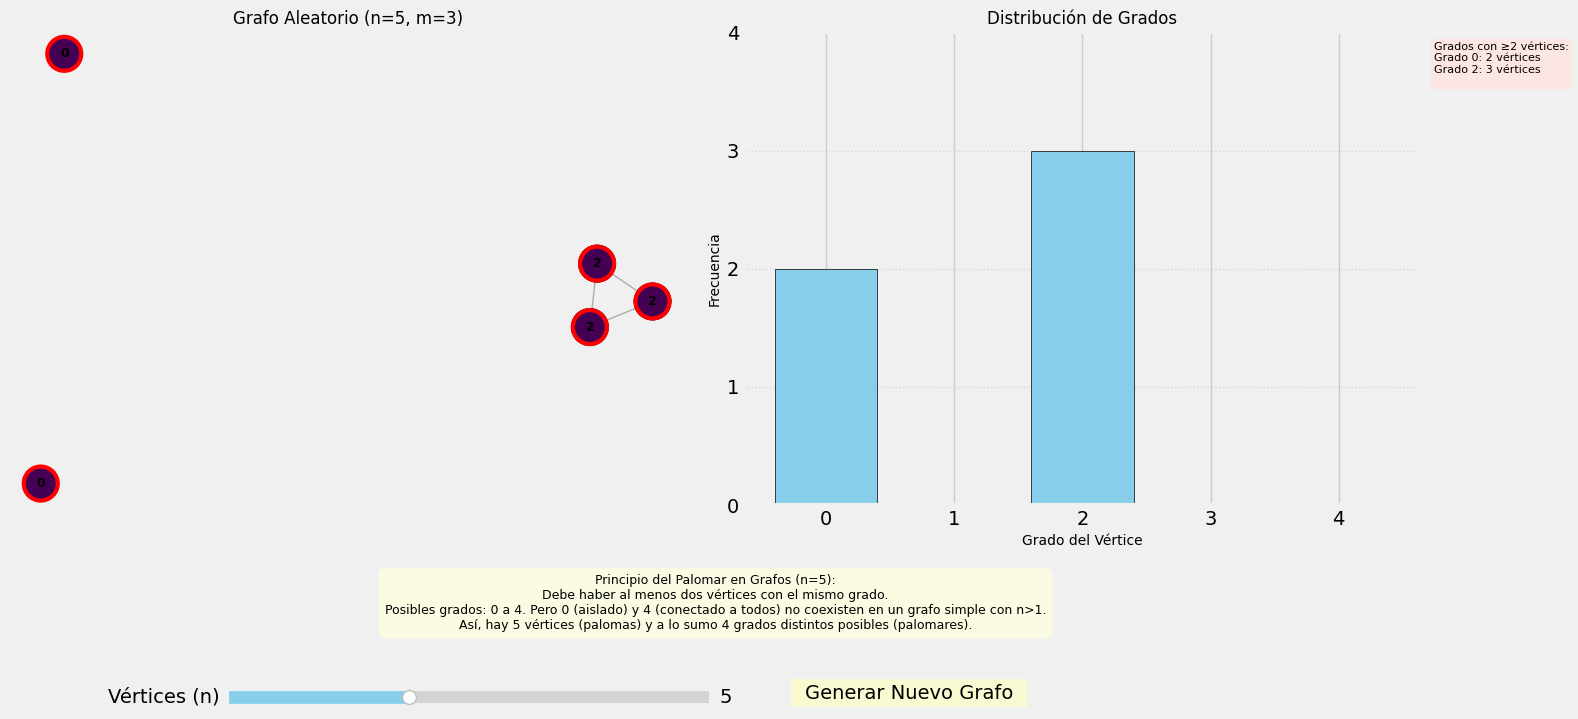

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# import random # No se usa random directamente, nx.gnp_random_graph sí
import numpy as np # Usado para np.arange y otros
from matplotlib.widgets import Button, Slider
from collections import Counter

class GrafoVisualizador:
    def __init__(self):
        # Crear la figura principal y los ejes para los gráficos
        self.fig = plt.figure(figsize=(16, 8)) # Figura un poco más alta
        gs = self.fig.add_gridspec(2, 2, height_ratios=[5, 1]) # GridSpec para mejor control

        self.ax1 = self.fig.add_subplot(gs[0, 0]) # Eje para el grafo
        self.ax2 = self.fig.add_subplot(gs[0, 1]) # Eje para el histograma

        # Eje para la explicación, sin ticks ni marco
        self.explanation_ax = self.fig.add_subplot(gs[1, :]) # Ocupa toda la fila inferior
        self.explanation_ax.axis('off')
        self.explanation_text_obj = None # Para guardar referencia al objeto de texto

        self.fig.canvas.manager.set_window_title('Teoría de Grafos - Principio del Palomar')

        # Configuraciones iniciales
        self.num_vertices = 5
        self.grafo = None
        self.contador_grados = Counter()
        self.mostrar_explicacion = True

        # Crear controles (Sliders y Botones)
        # Usaremos add_axes para posicionarlos explícitamente en la figura
        # [left, bottom, width, height] en coordenadas de figura (0 a 1)
        slider_ax_rect = [0.15, 0.05, 0.3, 0.03]
        button_ax_rect = [0.50, 0.05, 0.15, 0.04]

        self.slider_matplotlib_ax = self.fig.add_axes(slider_ax_rect)
        self.slider = Slider(self.slider_matplotlib_ax, 'Vértices (n)', 2, 10,
                             valinit=self.num_vertices, valstep=1, color='skyblue')
        self.slider.on_changed(self.actualizar_num_vertices)

        self.generar_button_matplotlib_ax = self.fig.add_axes(button_ax_rect)
        self.generar_button = Button(self.generar_button_matplotlib_ax, 'Generar Nuevo Grafo',
                                     color='lightgoldenrodyellow', hovercolor='0.9')
        self.generar_button.on_clicked(self.generar_nuevo_grafo)

        self.generar_grafo()

    def actualizar_num_vertices(self, val):
        self.num_vertices = int(val)
        self.generar_grafo()

    def generar_nuevo_grafo(self, event):
        self.generar_grafo()

    def generar_grafo(self):
        if self.num_vertices < 2:
            self.grafo = nx.Graph()
            grados = []
            self.contador_grados = Counter()
            vertices_repetidos = []
        else:
            self.grafo = nx.gnp_random_graph(self.num_vertices, 0.4)
            grados = [d for _, d in self.grafo.degree()]
            self.contador_grados = Counter(grados)
            vertices_repetidos = [nodo for nodo, grado_val in enumerate(grados)
                                 if self.contador_grados[grado_val] > 1]

        self.visualizar_grafo(grados, vertices_repetidos)

    def visualizar_grafo(self, grados, vertices_repetidos):
        self.ax1.clear()
        self.ax2.clear()
        # Limpiar texto de explicación anterior del explanation_ax
        if self.explanation_text_obj:
            self.explanation_text_obj.remove()
            self.explanation_text_obj = None


        if not self.grafo or self.num_vertices < 2:
            self.ax1.text(0.5, 0.5, f"Grafo con n={self.num_vertices}.\nMínimo 2 vértices para el principio.",
                          ha='center', va='center', fontsize=10)
            self.ax2.text(0.5, 0.5, "Sin datos de grado", ha='center', va='center', fontsize=10)
            self.fig.canvas.draw_idle()
            return

        pos = nx.spring_layout(self.grafo, seed=np.random.randint(0,100)) # Semilla aleatoria para variar layout

        max_possible_degree = self.num_vertices - 1 if self.num_vertices > 0 else 0
        colores_mapa = plt.cm.get_cmap('viridis', max(1, max_possible_degree + 1))
        colores_nodos = [colores_mapa(grado / max(1, max_possible_degree)) if max_possible_degree > 0 else colores_mapa(0) for grado in grados]

        nx.draw_networkx_edges(self.grafo, pos, ax=self.ax1, alpha=0.6, edge_color='gray')

        nodelist_all = list(self.grafo.nodes())
        # Ajustar tamaño de nodo dinámicamente, pero con un mínimo y máximo razonable
        base_node_size = 600
        node_sizes_all = [base_node_size + g * (300 / max(1, self.num_vertices)) for g in grados]

        nx.draw_networkx_nodes(self.grafo, pos, ax=self.ax1, nodelist=nodelist_all,
                                  node_color=colores_nodos,
                                  node_size=node_sizes_all, edgecolors='black', linewidths=0.5)

        if vertices_repetidos:
            nx.draw_networkx_nodes(self.grafo, pos, ax=self.ax1, nodelist=vertices_repetidos,
                                  node_size=[node_sizes_all[self.grafo.nodes[n]['_idx_original']] if '_idx_original' in self.grafo.nodes[n] else base_node_size for n in vertices_repetidos], # Necesitamos mapear nodo a su índice original para tamaño y color
                                  node_color=[colores_nodos[self.grafo.nodes[n]['_idx_original']] if '_idx_original' in self.grafo.nodes[n] else colores_mapa(0) for n in vertices_repetidos],
                                  edgecolors='red', linewidths=3)

        etiquetas = {node_idx: str(grados[i]) for i, node_idx in enumerate(self.grafo.nodes())}
        # Guardar índices originales si los nodos no son 0..N-1 (aunque gnp_random_graph los crea así)
        for i, node_idx in enumerate(self.grafo.nodes()):
            self.grafo.nodes[node_idx]['_idx_original'] = i


        nx.draw_networkx_labels(self.grafo, pos, labels=etiquetas, ax=self.ax1, font_color='black',
                                font_weight='bold', font_size=max(6, 10 - self.num_vertices // 3))

        self.ax1.set_title(f'Grafo Aleatorio (n={self.num_vertices}, m={self.grafo.number_of_edges()})', fontsize=12)
        self.ax1.set_axis_off()

        if self.contador_grados:
            posibles_grados = range(self.num_vertices)
            frecuencias = [self.contador_grados.get(grado, 0) for grado in posibles_grados]

            self.ax2.bar(posibles_grados, frecuencias, color='skyblue', edgecolor='black', width=0.8)

            self.ax2.set_xlabel('Grado del Vértice', fontsize=10)
            self.ax2.set_ylabel('Frecuencia', fontsize=10)
            self.ax2.set_title('Distribución de Grados', fontsize=12)
            self.ax2.set_xticks(posibles_grados)
            if any(f > 0 for f in frecuencias):
                 self.ax2.set_yticks(np.arange(0, max(frecuencias) + 2, step=max(1, (max(frecuencias)+1)//5 )))
            self.ax2.grid(axis='y', linestyle=':', alpha=0.7)
        else:
            self.ax2.text(0.5,0.5, "No hay datos de grado.", ha='center', va='center')

        if self.mostrar_explicacion and self.num_vertices >= 2:
            max_grado_posible = self.num_vertices - 1
            texto_explicacion = (
                f"Principio del Palomar en Grafos (n={self.num_vertices}):\n"
                f"Debe haber al menos dos vértices con el mismo grado.\n"
                f"Posibles grados: 0 a {max_grado_posible}. Pero 0 (aislado) y {max_grado_posible} (conectado a todos) no coexisten en un grafo simple con n>1.\n"
                f"Así, hay {self.num_vertices} vértices (palomas) y a lo sumo {max_grado_posible} grados distintos posibles (palomares)."
            )
            # Usar el Axes dedicado para la explicación
            self.explanation_text_obj = self.explanation_ax.text(0.5, 0.95, texto_explicacion,
                                                                  ha='center', va='top', wrap=True,
                                                                  fontsize=9,
                                                                  bbox=dict(facecolor='lightyellow', alpha=0.8,
                                                                            boxstyle='round,pad=0.5'))

        if vertices_repetidos:
            # Re-calcular grados para asegurar que coincidan con los nodos actuales del grafo
            current_grados_dict = dict(self.grafo.degree())
            grados_de_repetidos = [current_grados_dict[v] for v in vertices_repetidos]
            grados_unicos_repetidos = sorted(list(set(grados_de_repetidos)))

            if grados_unicos_repetidos:
                repetidos_info = "Grados con ≥2 vértices:\n"
                for grado_val in grados_unicos_repetidos:
                    num_vertices_con_grado = self.contador_grados[grado_val]
                    repetidos_info += f"Grado {grado_val}: {num_vertices_con_grado} vértices\n"

                # Colocar este texto a la derecha del ax2 si hay espacio, o debajo.
                # Por simplicidad, lo ponemos relativo al ax2
                self.ax2.text(1.02, 0.98, repetidos_info, transform=self.ax2.transAxes,
                              va='top', ha='left', fontsize=8,
                              bbox=dict(facecolor='mistyrose', alpha=0.8, boxstyle='round,pad=0.3'))

        # Ajustar layout para que todo quepa bien, incluyendo el explanation_ax
        self.fig.tight_layout(rect=[0, 0.08, 1, 0.95]) # Dejar espacio en la parte inferior para controles y superior para título
        self.fig.canvas.draw_idle()

    def mostrar(self):
        plt.show()

if __name__ == "__main__":
    visualizador = GrafoVisualizador()
    visualizador.mostrar()

In [ ]:
from IPython.display import display, HTML

# Variable html_content con el formato completo para la Paradoja del Cumpleaños
html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>La Paradoja del Cumpleaños: Teoría y Aplicaciones</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-light: #ffffff;
      --text-light: #333333;
      --header-light: #2c3e50;
      --button-bg: #3498db;
      --button-hover: #2980b9;
      --toggle-bg-dark: #95a5a6;
      --toggle-hover-dark: #7f8c8d;
      --table-border-light: #ddd;
      --table-header-bg-light: #f2f2f2;
      --table-border-dark: #4A6572;
      --table-header-bg-dark: #34495e;
      --link-light: #3498db;
      --link-hover-light: #2980b9;
      --link-dark: #5dade2;
      --link-hover-dark: #85c1e9;
    }
    body {
      margin: 0;
      padding: 20px;
      font-family: 'Roboto', sans-serif;
      background-color: var(--bg-light);
      color: var(--text-light);
      transition: background-color 0.3s, color 0.3s;
      line-height: 1.6;
    }
    body.dark-mode {
      --bg-light: #2c3e50;
      --text-light: #ecf0f1;
      --header-light: #ecf0f1;
      --table-border-light: var(--table-border-dark);
      --table-header-bg-light: var(--table-header-bg-dark);
    }
    .container {
      max-width: 900px;
      margin: auto;
    }
    h1 {
      text-align: center;
      color: var(--header-light);
      margin-bottom: 5px; /* Reduced margin */
    }
     h2.subtitle { /* Style for the subtitle */
        text-align: center;
        color: var(--header-light);
        font-size: 1.2em;
        font-weight: normal;
        margin-top: 0;
        margin-bottom: 20px;
    }
    h4 {
        margin-top: 20px;
        margin-bottom: 10px;
        color: var(--header-light);
    }
    .theme-toggle {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 5px;
      cursor: pointer;
      float: right;
      margin-bottom: 10px;
    }
    .theme-toggle:hover {
      background-color: var(--button-hover);
    }
    .toggle-button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 10px 15px;
      border-radius: 5px;
      cursor: pointer;
      width: 100%;
      text-align: left;
      font-size: 1.1em;
      margin-top: 10px;
      font-weight: bold;
    }
    .toggle-button:hover {
      background-color: var(--button-hover);
    }
    body.dark-mode .toggle-button {
      background-color: var(--toggle-bg-dark);
    }
    body.dark-mode .toggle-button:hover {
      background-color: var(--toggle-hover-dark);
    }
    .hidden { display: none; }
    .content-section {
        padding: 15px;
        border: 1px solid var(--table-border-light);
        border-top: none;
        border-radius: 0 0 5px 5px;
        background-color: var(--bg-light);
    }
    body.dark-mode .content-section {
        border-color: var(--table-border-dark);
    }
    ul, ol {
        margin-left: 20px;
        padding-left: 20px;
    }
    li {
        margin-bottom: 10px; /* Slightly more space between list items */
    }
    code { /* Added basic styling for potential inline code */
      background-color: #f0f0f0;
      padding: 2px 4px;
      border-radius: 3px;
      font-family: monospace;
    }
    body.dark-mode code {
      background-color: #4A6572;
      color: #f1c40f;
    }
    strong { /* Keyword highlighting */
        font-weight: bold;
        color: var(--button-bg);
    }
    body.dark-mode strong {
        color: #f1c40f;
    }
    table {
      width: 100%;
      border-collapse: collapse;
      margin-top: 20px;
      margin-bottom: 20px;
    }
    th, td {
      border: 1px solid var(--table-border-light);
      padding: 10px;
      text-align: left;
      vertical-align: top; /* Align text to top */
    }
    th {
      background-color: var(--table-header-bg-light);
      font-weight: bold;
    }
    td:first-child { /* Style the first column often used for labels */
       font-weight: bold;
       width: 30%; /* Give more defined width */
    }
    body.dark-mode th, body.dark-mode td {
       border-color: var(--table-border-dark);
    }
    body.dark-mode th {
       background-color: var(--table-header-bg-dark);
    }
    /* Center align text in table header */
    table th {
        text-align: center;
    }
    /* Center align text in specific table cells if needed */
    table td:nth-child(2) { /* Example: Center the second column */
         text-align: center;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Modo Oscuro</button>
    <h1>La Paradoja del Cumpleaños</h1>
    <h2 class="subtitle">Más Allá de la Intuición - Teoría, Conexiones y Aplicaciones Críticas</h2>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec1', this)">1. Introducción: La Sorprendente Probabilidad de Coincidencia</button>
    <div id="sec1" class="hidden content-section">
      <p>La <strong>Paradoja del Cumpleaños</strong> es uno de los resultados más contraintuitivos y fascinantes de la teoría de la probabilidad. Afirma que en un grupo de tan solo <strong>23 personas</strong> seleccionadas al azar, la probabilidad de que <strong>al menos dos de ellas compartan la misma fecha de cumpleaños</strong> (día y mes) es <strong>superior al 50%</strong>.</p>
      <p>Esta afirmación choca con nuestra intuición. Con 365 días posibles en un año (ignorando años bisiestos por simplicidad inicial), esperaríamos necesitar un número mucho mayor de personas para alcanzar una probabilidad tan alta de coincidencia. La clave para entenderla radica en que no buscamos una coincidencia con <em>nuestro</em> cumpleaños, sino <em>cualquier</em> par de coincidencias dentro del grupo. Este documento explora la matemática detrás de la paradoja, su relación fundamental con el <strong>Principio del Palomar</strong>, y sus profundas implicaciones en áreas críticas como la <strong>criptografía</strong>, el análisis de <strong>sistemas distribuidos</strong> y <strong>Big Data</strong>.</p>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec2', this)">2. La Matemática Detrás de la Paradoja</button>
    <div id="sec2" class="hidden content-section">
      <p>Para calcular la probabilidad, es más sencillo calcular la probabilidad del evento complementario: que <strong>ninguna</strong> persona en el grupo comparta cumpleaños, y luego restar este valor de 1.</p>
      <p>Consideremos un grupo de \(n\) personas y asumamos que hay \(D = 365\) días posibles para un cumpleaños, todos igualmente probables.</p>
      <ul>
        <li>La primera persona puede tener cualquier cumpleaños (\(D/D\)).</li>
        <li>La segunda persona, para no coincidir, debe tener uno de los \(D-1\) días restantes. La probabilidad es \((D-1)/D\).</li>
        <li>La tercera persona, para no coincidir con las dos anteriores, debe tener uno de los \(D-2\) días restantes. La probabilidad es \((D-2)/D\).</li>
        <li>...</li>
        <li>La \(n\)-ésima persona, para no coincidir con las \(n-1\) anteriores, debe tener uno de los \(D - (n-1)\) días restantes. La probabilidad es \((D-n+1)/D\).</li>
      </ul>
      <p>La probabilidad de que <strong>todas</strong> las \(n\) personas tengan cumpleaños distintos, \(P_{\text{distintos}}(n)\), es el producto de estas probabilidades individuales (asumiendo independencia):</p>
      <p>\[ P_{\text{distintos}}(n) = \frac{D}{D} \cdot \frac{D-1}{D} \cdot \frac{D-2}{D} \cdots \frac{D-n+1}{D} = \frac{D!}{D^n (D-n)!} = \frac{P(D, n)}{D^n} \]</p>
      <p>Donde \(P(D, n)\) representa las permutaciones de \(D\) elementos tomados de \(n\) en \(n\).</p>
      <p>La probabilidad de que <strong>al menos dos personas coincidan</strong> es el complemento:</p>
      <p>\[ P_{\text{coincidencia}}(n) = 1 - P_{\text{distintos}}(n) \]</p>
      <p>Calculando para \(n=23\) y \(D=365\):</p>
      <p>\[ P_{\text{coincidencia}}(23) = 1 - \frac{365!}{365^{23} (365-23)!} \approx 1 - 0.4927 = 0.5073 \]</p>
      <p>¡Efectivamente, la probabilidad supera el <strong>50.7%</strong>!</p>

      <h4>Visualización de la Probabilidad (D=365):</h4>
      <table>
        <thead>
          <tr>
            <th>Número de Personas (n)</th>
            <th>Probabilidad de Coincidencia (aprox.)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>10</td>
            <td>11.7%</td>
          </tr>
          <tr>
            <td>20</td>
            <td>41.1%</td>
          </tr>
          <tr>
            <td><strong>23</strong></td>
            <td><strong>50.7%</strong></td>
          </tr>
          <tr>
            <td>30</td>
            <td>70.6%</td>
          </tr>
          <tr>
            <td>50</td>
            <td>97.0%</td>
          </tr>
           <tr>
            <td>70</td>
            <td>99.9%</td>
          </tr>
          <tr>
            <td>366</td>
            <td>100% (Garantía del Principio del Palomar)</td>
          </tr>
        </tbody>
      </table>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec3', this)">3. Relación Fundamental con el Principio del Palomar (PHP)</button>
    <div id="sec3" class="hidden content-section">
      <p>El <strong>Principio del Palomar</strong> (o <strong>Principio de los Cajones de Dirichlet</strong>) establece que si se colocan \(n\) objetos ("palomas") en \(m\) cajas ("palomares") y \(n > m\), entonces al menos una caja debe contener más de un objeto.</p>
      <p>En el contexto de los cumpleaños:</p>
      <ul>
        <li><strong>Objetos (Palomas):</strong> Las \(n\) personas.</li>
        <li><strong>Cajas (Palomares):</strong> Los \(D=365\) días del año.</li>
      </ul>
      <p>El PHP nos da una <strong>garantía determinista</strong>: si tenemos \(n = 366\) personas (\(n > D\)), es <strong>absolutamente seguro</strong> (probabilidad 100%) que al menos dos compartirán cumpleaños.</p>
      <p>La Paradoja del Cumpleaños actúa como una <strong>versión probabilística y anticipada del PHP</strong>. No espera a la garantía absoluta de \(n > D\), sino que cuantifica la probabilidad de una "<strong>colisión</strong>" (dos personas en la misma "caja" de día) mucho antes, revelando que esta probabilidad crece sorprendentemente rápido. Muestra que las colisiones son <strong>probables</strong> mucho antes de ser <strong>inevitables</strong>.</p>
    </div>

     <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec4', this)">4. El Ataque de Cumpleaños y las Funciones Hash Criptográficas</button>
    <div id="sec4" class="hidden content-section">
       <p>Esta es quizás la aplicación más famosa y crítica de la paradoja. Las <strong>funciones hash criptográficas</strong> (como <strong>SHA-256</strong>, <strong>SHA-3</strong>) toman una entrada de tamaño arbitrario (un mensaje, un archivo) y producen una salida de tamaño fijo (el "hash" o "digest"), por ejemplo, 256 bits. Propiedades deseables incluyen:</p>
       <ul>
         <li><strong>Resistencia a la preimagen:</strong> Difícil encontrar la entrada original dado el hash.</li>
         <li><strong>Resistencia a la segunda preimagen:</strong> Difícil encontrar <em>otra</em> entrada que produzca el mismo hash que una entrada dada.</li>
         <li><strong>Resistencia a colisiones:</strong> Difícil encontrar <em>cualquier par</em> de entradas distintas que produzcan el mismo hash.</li>
       </ul>
       <p>El <strong>Ataque de Cumpleaños</strong> se enfoca en la <strong>resistencia a colisiones</strong>. No intenta revertir un hash específico, sino encontrar <em>cualquier</em> colisión.</p>
       <p>Consideremos una función hash ideal que produce salidas de \(N\) bits. Hay \(M = 2^N\) posibles valores hash (el "<strong>espacio de hash</strong>"). Si generamos \(k\) entradas distintas y calculamos sus hashes, ¿cuál es la probabilidad de encontrar una colisión?</p>
       <p>La Paradoja del Cumpleaños generalizada nos dice que la probabilidad de colisión se vuelve significativa (cercana al 50%) cuando el número de entradas \(k\) es aproximadamente la raíz cuadrada del tamaño del espacio de salida, \(M\).</p>
       <p>\[ k \approx \sqrt{M} = \sqrt{2^N} = 2^{N/2} \]</p>
       <h4>Implicaciones:</h4>
       <ul>
         <li>Para un hash de \(N\) bits, un atacante no necesita generar \(2^N\) entradas (ataque de fuerza bruta para preimagen), sino solo alrededor de \(2^{N/2}\) entradas para tener una buena probabilidad de encontrar una <strong>colisión</strong>.</li>
         <li><strong>Ejemplo SHA-256 (N=256):</strong> El espacio de hash es \(2^{256}\). Un ataque de cumpleaños requeriría aproximadamente \(2^{256/2} = 2^{128}\) operaciones de hashing para encontrar una colisión con alta probabilidad. Aunque \(2^{128}\) es un número astronómicamente grande e inviable hoy en día, es <em>mucho</em> menor que \(2^{256}\).</li>
         <li><strong>Debilidad de Hashes Antiguos:</strong> Funciones como <strong>MD5</strong> (128 bits) y <strong>SHA-1</strong> (160 bits) tienen resistencias a colisión de solo \(2^{64}\) y \(2^{80}\) respectivamente. Estos niveles son computacionalmente factibles hoy en día, lo que ha llevado a su deprecación para aplicaciones críticas como <strong>firmas digitales</strong>. Un atacante podría crear dos documentos (uno legítimo, otro malicioso) con el mismo hash MD5 o SHA-1, hacer firmar el legítimo, y luego sustituirlo por el malicioso sin invalidar la firma.</li>
        </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec5', this)">5. Aplicaciones Ampliadas en Computación y Big Data</button>
    <div id="sec5" class="hidden content-section">
        <p>La lógica de la paradoja del cumpleaños se extiende a numerosos problemas en sistemas a gran escala:</p>
        <ul>
            <li><strong>Tablas Hash (Hash Tables):</strong> Son estructuras de datos fundamentales que usan una función hash para mapear claves a índices en un array (buckets). Las <strong>colisiones</strong> ocurren cuando dos claves distintas mapean al mismo bucket. La paradoja predice que incluso con una tabla grande y una buena función hash, las colisiones aparecerán mucho antes de que la tabla esté llena, afectando el rendimiento (necesidad de manejar colisiones mediante encadenamiento, sondeo abierto, etc.). El análisis de la probabilidad de colisión es clave para dimensionar tablas hash y evaluar su <strong>factor de carga</strong> óptimo.</li>
            <li><strong>Sistemas de Almacenamiento y Deduplicación de Datos:</strong> Para ahorrar espacio, los sistemas de almacenamiento (como en la nube o backups) calculan hashes de bloques de datos o archivos para identificar duplicados. Si dos bloques distintos tienen el mismo hash (una colisión), el sistema podría erróneamente considerar que son idénticos y almacenar solo una copia, llevando a la <strong>corrupción de datos</strong> al restaurar. Aunque la probabilidad es baja con hashes modernos, no es cero, y el riesgo debe evaluarse en función de la escala del sistema (billones de archivos).</li>
            <li><strong>Bases de Datos Distribuidas y Balanceo de Carga:</strong> Las claves de datos a menudo se hashean para determinar en qué servidor o partición deben almacenarse (<strong>sharding</strong>). Una distribución desigual de hashes o colisiones inherentes pueden llevar a que algunos servidores reciban muchas más claves que otros ("hot spots" o "<strong>skew</strong>"), degradando el rendimiento. La paradoja ayuda a entender por qué incluso con funciones hash diseñadas para ser uniformes, la aleatoriedad inherente puede causar desequilibrios probabilísticos.</li>
            <li><strong>Generación de Identificadores Únicos:</strong> Sistemas que generan IDs aleatorios (<strong>UUIDs</strong>, claves de sesión, IDs de transacción en <strong>blockchain</strong>) deben considerar la probabilidad de generar accidentalmente un duplicado. Aunque el espacio de IDs suele ser enorme (e.g., 128 bits para UUIDv4), la paradoja nos recuerda que el número de IDs que se pueden generar antes de esperar una colisión es la raíz cuadrada de ese espacio (\(2^{64}\) para UUIDs).</li>
            <li><strong>Redes y Análisis de Datos Masivos:</strong> Al analizar grandes conjuntos de datos (logs, tráfico de red, redes sociales), buscar patrones o coincidencias a menudo implica comparar hashes o firmas de elementos. La paradoja puede indicar la probabilidad de encontrar coincidencias espurias o inesperadas simplemente debido al gran volumen de datos.</li>
             <li><strong>Simulación y Juegos Online:</strong> La asignación de recursos, IDs de jugadores o instancias en mundos virtuales puede usar hashing. Comprender la probabilidad de colisión ayuda a diseñar sistemas robustos.</li>
            <li><strong>Machine Learning (Hashing Trick):</strong> Técnica usada para reducir la dimensionalidad de datos categóricos (e.g., palabras en texto) mapeándolos a un vector de tamaño fijo mediante hashing. Las colisiones son intencionales pero deben ser controladas; si demasiadas características distintas mapean al mismo índice, la calidad del modelo se degrada. La elección del tamaño del espacio hash se basa en equilibrar compresión y riesgo de colisión.</li>
        </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec6', this)">6. Generalización y Extensiones Conceptuales</button>
    <div id="sec6" class="hidden content-section">
         <p>La paradoja no se limita a cumpleaños o 365 días. Se aplica a cualquier escenario donde se mapean elementos de un conjunto grande a un conjunto más pequeño de "categorías" o "contenedores".</p>
        <ul>
            <li><strong>Parámetros Variables:</strong> Se puede calcular la probabilidad para diferentes números de "días" \(D\) (tamaño del espacio de salida/hash) y diferentes números de "personas" \(k\) (número de entradas/items).</li>
            <li><strong>Coincidencias Múltiples:</strong> Se puede extender para calcular la probabilidad de que al menos \(k\) elementos coincidan en la misma categoría.</li>
            <li><strong>Dominios Diversos:</strong> Como se vio en las aplicaciones, los "días" pueden ser buckets de hash, secuencias de ADN, identificadores de blockchain, puertos de red, etc. Los "objetos" pueden ser claves, archivos, usuarios, transacciones, etc.</li>
        </ul>
    </div>

    <button class="toggle-button" aria-expanded="false" onclick="toggleSection('sec7', this)">7. Conclusión: Un Principio Probabilístico con Impacto Real</button>
    <div id="sec7" class="hidden content-section">
        <p>La <strong>Paradoja del Cumpleaños</strong> es mucho más que una curiosidad matemática. Es una manifestación cuantitativa de cómo las <strong>colisiones</strong> se vuelven probables en sistemas donde se mapean elementos a un espacio finito, mucho antes de lo que dicta la garantía determinista del <strong>Principio del Palomar</strong>. Su comprensión es fundamental para:</p>
        <ul>
            <li><strong>Diseñar Sistemas Seguros:</strong> Especialmente en criptografía, eligiendo tamaños de hash que ofrezcan la resistencia a colisiones necesaria contra <strong>ataques de cumpleaños</strong>.</li>
            <li><strong>Construir Sistemas Eficientes:</strong> Dimensionando correctamente tablas hash, sistemas de caché y particiones en bases de datos distribuidas para mitigar el impacto de las colisiones inevitables.</li>
            <li><strong>Evaluar Riesgos en Grandes Escalas:</strong> Comprendiendo la probabilidad (aunque sea pequeña) de colisiones accidentales en sistemas de deduplicación, generación de IDs, y análisis de <strong>Big Data</strong>.</li>
            <li><strong>Desarrollar Técnicas Inteligentes:</strong> Como el "<strong>hashing trick</strong>" en Machine Learning, donde se maneja conscientemente el trade-off de las colisiones.</li>
        </ul>

        <h4>Resumen Clave:</h4>
        <table>
            <thead>
              <tr>
                <th>Elemento</th>
                <th>Valor / Descripción</th>
              </tr>
            </thead>
            <tbody>
              <tr>
                <td><strong>Naturaleza</strong></td>
                <td>Probabilística (cuantifica la probabilidad de colisión).</td>
              </tr>
              <tr>
                <td><strong>Relación con PHP</strong></td>
                <td>Complemento probabilístico del Principio del Palomar (colisiones probables vs. garantizadas).</td>
              </tr>
              <tr>
                <td><strong>Umbral Contraintuitivo</strong></td>
                <td>Solo 23 personas para >50% de coincidencia en 365 días.</td>
              </tr>
              <tr>
                 <td><strong>Implicación General</strong></td>
                 <td>\( \approx \sqrt{M} \) intentos para colisión probable en un espacio de tamaño \(M\).</td>
              </tr>
              <tr>
                <td><strong>Aplicación Crítica</strong></td>
                <td>Ataques de cumpleaños a funciones hash criptográficas (\(2^{N/2}\) complejidad).</td>
              </tr>
              <tr>
                <td><strong>Usos en Sistemas</strong></td>
                <td>Tablas Hash, Deduplicación, BD Distribuidas, IDs Únicos, Criptografía, ML, Simulación.</td>
              </tr>
               <tr>
                 <td><strong>Consecuencia Práctica</strong></td>
                 <td>Las colisiones son más comunes de lo esperado; deben gestionarse en diseño y seguridad.</td>
               </tr>
            </tbody>
        </table>
    </div>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle('dark-mode');
      var btn = document.querySelector('.theme-toggle');
      btn.textContent = document.body.classList.contains('dark-mode') ? 'Modo Claro' : 'Modo Oscuro';
      localStorage.setItem('theme', document.body.classList.contains('dark-mode') ? 'dark' : 'light');
    }
    function toggleSection(id, btn) {
      var sec = document.getElementById(id);
      if (sec) { // Check if section exists
        var isHidden = sec.classList.toggle('hidden');
        btn.setAttribute('aria-expanded', String(!isHidden));
      } else {
        console.warn("toggleSection: Section with ID '" + id + "' not found.");
      }
    }
    // Initialize theme based on localStorage
    document.addEventListener('DOMContentLoaded', function() {
      try {
        if (localStorage.getItem('theme') === 'dark') {
          document.body.classList.add('dark-mode');
          var themeBtn = document.querySelector('.theme-toggle');
          if (themeBtn) themeBtn.textContent = 'Modo Claro';
        } else {
          document.body.classList.remove('dark-mode');
          var themeBtn = document.querySelector('.theme-toggle');
          if (themeBtn) themeBtn.textContent = 'Modo Oscuro';
        }
      } catch (e) {
        console.error("Error accessing localStorage or setting theme: ", e);
      }

      var buttons = document.querySelectorAll('.toggle-button');
      buttons.forEach(function(button) {
        var onclickAttr = button.getAttribute('onclick');
        if (onclickAttr) {
            // Improved regex to handle potential variations or errors
            var match = onclickAttr.match(/toggleSection\(\s*['"]([^'"]+)['"]\s*,/);
            if (match && match[1]) {
                var sectionId = match[1];
                var section = document.getElementById(sectionId);
                if (section) {
                    section.classList.add('hidden'); // Ensure it's hidden
                    button.setAttribute('aria-expanded', 'false'); // Set ARIA attribute
                } else {
                    console.warn("DOMContentLoaded: Section with ID '" + sectionId + "' not found for button: ", button);
                }
            } else {
                console.warn("DOMContentLoaded: Could not extract sectionId from onclick: '", onclickAttr, "' for button: ", button);
            }
        } else {
             console.warn("DOMContentLoaded: Button found without onclick attribute: ", button);
        }
      });
       // Trigger MathJax rendering after setup
       if (typeof MathJax !== 'undefined') {
            MathJax.Hub.Queue(["Typeset", MathJax.Hub]);
       }
    });
  </script>
</body>
</html>
"""

# --- Fin de la definición de html_content ---

display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML
import math # Import math just for reference or potential future Python-side calcs

# We will perform calculations mainly in JavaScript for interactivity
# but define the core logic conceptually here.

# --- HTML, CSS, and JavaScript ---
html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Simulador: Paradoja del Cumpleaños</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-color: #f4f7f6;
      --text-color: #333;
      --header-color: #2c3e50;
      --button-bg: #3498db;
      --button-hover: #2980b9;
      --input-border: #ccc;
      --result-bg: #e8f6fd;
      --result-border: #b0e0f6;
      --probability-color: #e74c3c; /* Red color for emphasis */
      --complement-color: #27ae60; /* Green color */
    }
    body {
      font-family: 'Roboto', sans-serif;
      background-color: var(--bg-color);
      color: var(--text-color);
      line-height: 1.6;
      padding: 20px;
      margin: 0;
    }
    .container {
      max-width: 700px;
      margin: 20px auto;
      background-color: #fff;
      padding: 30px;
      border-radius: 8px;
      box-shadow: 0 4px 10px rgba(0,0,0,0.1);
    }
    h1 {
      color: var(--header-color);
      text-align: center;
      margin-bottom: 25px;
    }
    .input-section label {
      display: block;
      margin-bottom: 8px;
      font-weight: bold;
      color: #555;
    }
    .input-section input[type="number"] {
      width: 100%;
      padding: 10px;
      margin-bottom: 15px;
      border: 1px solid var(--input-border);
      border-radius: 4px;
      box-sizing: border-box; /* Include padding in width */
      font-size: 1em;
    }
    .input-section button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 12px 20px;
      border-radius: 5px;
      cursor: pointer;
      font-size: 1em;
      width: 100%;
      transition: background-color 0.3s;
      font-weight: bold;
    }
    .input-section button:hover {
      background-color: var(--button-hover);
    }
    #result-area {
      margin-top: 30px;
      padding: 20px;
      background-color: var(--result-bg);
      border: 1px solid var(--result-border);
      border-radius: 5px;
      display: none; /* Hidden initially */
      text-align: center;
    }
     #result-area h2 {
        margin-top: 0;
        color: var(--header-color);
        font-size: 1.3em;
     }
     .probability-display {
        font-size: 2.5em;
        font-weight: bold;
        color: var(--probability-color);
        margin: 15px 0;
     }
     .complement-display {
        font-size: 1.1em;
        color: var(--complement-color);
        margin-bottom: 15px;
     }
     .explanation {
        font-size: 1em;
        color: #444;
        margin-bottom: 20px;
     }
     .formula-display {
         font-size: 0.9em;
         color: #666;
         margin-top: 15px;
         border-top: 1px dashed #ccc;
         padding-top: 15px;
         text-align: left; /* Align formula section left */
     }
     .error-message {
         color: #c0392b;
         font-weight: bold;
         margin-top: 10px;
     }
     /* Style for MathJax rendering */
     .MathJax_Display {
        margin: 1em 0 !important;
        display: block !important;
        text-align: center !important; /* Center block formulas */
     }

  </style>
</head>
<body>
  <div class="container">
    <h1>Simulador de la Paradoja del Cumpleaños</h1>

    <div class="input-section">
      <label for="num-people">Número de Personas en el Grupo:</label>
      <input type="number" id="num-people" name="num-people" min="1" value="23" required>
      <button onclick="calculateBirthdayProbability()">Calcular Probabilidad</button>
      <div id="error-output" class="error-message"></div>
    </div>

    <div id="result-area">
      <h2>Resultado del Cálculo</h2>
      <div class="explanation" id="result-intro"></div>
      <div class="probability-display" id="probability-output">-- %</div>
      <div class="complement-display" id="complement-output">(Probabilidad de que nadie coincida: -- %)</div>
      <div class="explanation" id="result-interpretation"></div>
      <div class="formula-display">
        <strong>Fórmula utilizada (D=365):</strong><br>
        Probabilidad de que nadie coincida (\(P_{\text{distintos}}\)):
        \[ P_{\text{distintos}}(n) = \frac{365}{365} \times \frac{364}{365} \times \cdots \times \frac{365-n+1}{365} = \frac{P(365, n)}{365^n} \]
        Probabilidad de al menos una coincidencia:
        \[ P_{\text{coincidencia}}(n) = 1 - P_{\text{distintos}}(n) \]
        <small>Nota: Los cálculos usan punto flotante estándar de JavaScript, la precisión puede disminuir para números muy grandes de personas.</small>
      </div>
    </div>
  </div>

  <script>
    function calculateBirthdayProbability() {
      const peopleInput = document.getElementById('num-people');
      const resultArea = document.getElementById('result-area');
      const probOutput = document.getElementById('probability-output');
      const complOutput = document.getElementById('complement-output');
      const introOutput = document.getElementById('result-intro');
      const interpOutput = document.getElementById('result-interpretation');
      const errorOutput = document.getElementById('error-output');

      errorOutput.textContent = ''; // Clear previous errors
      let n = parseInt(peopleInput.value);
      const D = 365; // Number of days

      // --- Input Validation ---
      if (isNaN(n) || n < 1) {
        errorOutput.textContent = 'Por favor, ingresa un número válido de personas (al menos 1).';
        resultArea.style.display = 'none'; // Hide result area
        return;
      }

      let probDistinct = 1.0;
      let probCollision = 0.0;

      // --- Handle Special Cases ---
      if (n === 1) {
          probDistinct = 1.0;
          probCollision = 0.0;
      } else if (n > D) {
          // Pigeonhole Principle guarantees collision
          probDistinct = 0.0;
          probCollision = 1.0;
      } else {
          // --- Iterative Calculation for P(Distinct) ---
          // More numerically stable than factorials/permutations for large n
          // Note: Standard JS floats (64-bit) are used. Precision loss for very large n.
          probDistinct = 1.0; // Start with probability 1
          for (let i = 0; i < n; i++) {
              probDistinct *= (D - i) / D;
              // Check for underflow, though unlikely here unless n is huge
              if (probDistinct === 0) break;
          }
          probCollision = 1.0 - probDistinct;
      }

      // --- Display Results ---
      const probCollisionPercent = (probCollision * 100).toFixed(4); // Format to 4 decimal places
      const probDistinctPercent = (probDistinct * 100).toFixed(4);

      introOutput.textContent = `Para un grupo de ${n} persona(s):`;
      probOutput.textContent = `${probCollisionPercent} %`;
      complOutput.textContent = `(Probabilidad de que nadie coincida: ${probDistinctPercent} %)`;

      // Interpretation
      let interpretationText = `Hay una probabilidad del ${probCollisionPercent}% de que al menos dos personas compartan el mismo cumpleaños. `;
      if (n === 23) {
          interpretationText += "¡Este es el famoso umbral donde la probabilidad supera el 50%, lo cual es sorprendentemente bajo! ";
      } else if (probCollision > 0.999) {
           interpretationText += "¡La coincidencia es prácticamente segura! ";
      } else if (probCollision > 0.75) {
          interpretationText += "La coincidencia es muy probable. ";
      } else if (probCollision < 0.1) {
          interpretationText += "La coincidencia es bastante improbable. ";
      }

      if (n > D) {
          interpretationText += `Con más de ${D} personas, el Principio del Palomar garantiza una coincidencia al 100%.`;
      } else if (n === 1) {
          interpretationText = `Con solo una persona, no puede haber coincidencias.`;
      }


      interpOutput.textContent = interpretationText;
      resultArea.style.display = 'block'; // Show results

      // Rerender MathJax if needed after content update
      if (typeof MathJax !== 'undefined') {
            MathJax.Hub.Queue(["Typeset", MathJax.Hub, resultArea]);
       }
    }

    // Optional: Calculate on initial load if needed or when input changes
    // document.addEventListener('DOMContentLoaded', calculateBirthdayProbability);
    // document.getElementById('num-people').addEventListener('input', calculateBirthdayProbability);

  </script>
</body>
</html>
"""

# --- Display the HTML in Colab ---
display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML

html_content_hash_attack = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Simulador: Ataque de Cumpleaños a Funciones Hash</title>
  <!-- MathJax for rendering formulas -->
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    :root {
      --bg-color: #f0f4f8; /* Light blue-gray */
      --text-color: #333;
      --header-color: #1a2533; /* Darker blue */
      --button-bg: #2980b9; /* Blue */
      --button-hover: #206694; /* Darker blue */
      --input-border: #a0b4c8;
      --result-bg: #eaf2f8;
      --result-border: #c5d9e8;
      --security-high: #27ae60; /* Green */
      --security-medium: #f39c12; /* Orange */
      --security-low: #e74c3c; /* Red */
    }
    body {
      font-family: 'Roboto', sans-serif;
      background-color: var(--bg-color);
      color: var(--text-color);
      line-height: 1.6;
      padding: 20px;
      margin: 0;
    }
    .container {
      max-width: 800px;
      margin: 20px auto;
      background-color: #fff;
      padding: 30px;
      border-radius: 8px;
      box-shadow: 0 5px 15px rgba(0,0,0,0.1);
    }
    h1 {
      color: var(--header-color);
      text-align: center;
      margin-bottom: 10px;
    }
    .description {
        font-size: 0.95em;
        color: #555;
        margin-bottom: 25px;
        text-align: justify;
    }
    .input-section label {
      display: block;
      margin-bottom: 8px;
      font-weight: bold;
      color: #444;
    }
    .input-section input[type="number"] {
      width: calc(100% - 22px); /* Adjust for padding and border */
      padding: 10px;
      margin-bottom: 15px;
      border: 1px solid var(--input-border);
      border-radius: 4px;
      box-sizing: border-box;
      font-size: 1em;
    }
    .input-section button {
      background-color: var(--button-bg);
      color: white;
      border: none;
      padding: 12px 20px;
      border-radius: 5px;
      cursor: pointer;
      font-size: 1em;
      width: 100%;
      transition: background-color 0.3s;
      font-weight: bold;
    }
    .input-section button:hover {
      background-color: var(--button-hover);
    }
    #hash-result-area {
      margin-top: 30px;
      padding: 20px;
      background-color: var(--result-bg);
      border: 1px solid var(--result-border);
      border-radius: 5px;
      display: none; /* Hidden initially */
    }
     #hash-result-area h2 {
        margin-top: 0;
        color: var(--header-color);
        font-size: 1.4em;
        text-align: center;
        margin-bottom: 20px;
     }
     .result-item {
         margin-bottom: 15px;
         font-size: 1.05em;
     }
     .result-item strong {
         color: var(--header-color);
         min-width: 220px; /* Ensure alignment */
         display: inline-block;
     }
     .result-item .value {
         font-weight: bold;
     }
     .result-item .value.security-high { color: var(--security-high); }
     .result-item .value.security-medium { color: var(--security-medium); }
     .result-item .value.security-low { color: var(--security-low); }

     .formula-display {
         font-size: 0.9em;
         color: #666;
         margin-top: 20px;
         border-top: 1px dashed #ccc;
         padding-top: 15px;
         text-align: left;
     }
     .error-message {
         color: #c0392b;
         font-weight: bold;
         margin-top: 10px;
     }
     .MathJax_Display { /* Center MathJax formulas */
        margin: 1em auto !important;
        display: block !important;
        text-align: center !important;
     }
     .example-buttons {
        margin-bottom: 20px;
        text-align: center;
     }
     .example-buttons button {
        background-color: #7f8c8d;
        color: white;
        border: none;
        padding: 8px 12px;
        border-radius: 4px;
        cursor: pointer;
        margin: 5px;
        font-size: 0.9em;
     }
     .example-buttons button:hover {
        background-color: #6c7a7d;
     }

  </style>
</head>
<body>
  <div class="container">
    <h1>Simulador: Ataque de Cumpleaños a Funciones Hash</h1>
    <div class="description">
      <p>Las <strong>funciones hash criptográficas</strong> (como SHA-256) producen una salida de tamaño fijo (el "hash"). El <strong>Ataque de Cumpleaños</strong> explota la paradoja del cumpleaños para encontrar <strong>colisiones</strong> (dos entradas distintas con el mismo hash) más eficientemente de lo que se esperaría por fuerza bruta. Este simulador muestra cómo la seguridad efectiva contra colisiones es aproximadamente la mitad del tamaño en bits del hash.</p>
    </div>

    <div class="input-section">
      <label for="hash-bits">Tamaño de Salida del Hash (N bits):</label>
      <input type="number" id="hash-bits" name="hash-bits" min="1" max="1024" value="256" required>

      <div class="example-buttons">
        <button onclick="setHashBits(32)">Ej: Hash Débil (32 bits)</button>
        <button onclick="setHashBits(64)">Ej: MD5 (Colisión \(2^{32}\))</button>
        <button onclick="setHashBits(128)">Ej: MD5 Real (128 bits)</button>
        <button onclick="setHashBits(160)">Ej: SHA-1 (160 bits)</button>
        <button onclick="setHashBits(256)">Ej: SHA-256 (256 bits)</button>
      </div>

      <button onclick="calculateHashAttack()">Calcular Implicaciones</button>
      <div id="hash-error-output" class="error-message"></div>
    </div>

    <div id="hash-result-area">
      <h2>Resultados para un Hash de <span id="display-n-bits">N</span> bits</h2>
      <div class="result-item">
        <strong>Tamaño del Espacio de Hash (M):</strong>
        <span class="value" id="hash-space-output">\(2^N\)</span>
      </div>
      <div class="result-item">
        <strong>Hashes para Colisión probable (k):</strong>
        <span class="value" id="collision-hashes-output">\( \approx 2^{N/2}\)</span>
      </div>
      <div class="result-item">
        <strong>Nivel de Seguridad Estimado:</strong>
        <span class="value" id="security-level-output">--</span>
      </div>
      <div class="result-item">
        <strong>Interpretación:</strong>
        <span id="interpretation-output">--</span>
      </div>

      <div class="formula-display">
        <strong>Concepto Clave:</strong>
        <p>La Paradoja del Cumpleaños generalizada indica que para encontrar una colisión en un espacio de \(M\) posibles hashes, se necesitan generar aproximadamente \(k \approx \sqrt{M}\) hashes.
        Si un hash tiene \(N\) bits, entonces \(M = 2^N\). Por lo tanto:</p>
        \[ k \approx \sqrt{2^N} = (2^N)^{1/2} = 2^{N/2} \]
        <p>Esto significa que la "fuerza" efectiva de un hash contra ataques de colisión es de \(N/2\) bits, no \(N\) bits completos.</p>
      </div>
    </div>
  </div>

  <script>
    function setHashBits(bits) {
        document.getElementById('hash-bits').value = bits;
        calculateHashAttack(); // Optionally, calculate immediately
    }

    function calculateHashAttack() {
      const bitsInput = document.getElementById('hash-bits');
      const resultArea = document.getElementById('hash-result-area');
      const displayNBits = document.getElementById('display-n-bits');
      const hashSpaceOutput = document.getElementById('hash-space-output');
      const collisionHashesOutput = document.getElementById('collision-hashes-output');
      const securityLevelOutput = document.getElementById('security-level-output');
      const interpretationOutput = document.getElementById('interpretation-output');
      const errorOutput = document.getElementById('hash-error-output');

      errorOutput.textContent = ''; // Clear previous errors
      let N = parseInt(bitsInput.value);

      // --- Input Validation ---
      if (isNaN(N) || N < 1) {
        errorOutput.textContent = 'Por favor, ingresa un número válido de bits (al menos 1).';
        resultArea.style.display = 'none';
        return;
      }
      if (N > 1024) { // Practical limit for display and relevance
          errorOutput.textContent = 'Para valores muy grandes, la visualización es menos práctica. Prueba con N <= 1024.';
          // resultArea.style.display = 'none'; // Optionally hide, or let it calculate
          // return;
      }


      // --- Calculations ---
      // We'll mostly display these as powers of 2
      const M_display = `\\(2^{${N}}\\)`; // MathJax format
      const k_approx_display = `\\( \\approx 2^{${N/2}}\\)`; // MathJax format

      // --- Security Interpretation ---
      let securityLevel = "";
      let securityClass = "";
      let interpretationText = "";

      const effectiveSecurity = N / 2;
      displayNBits.textContent = N; // Update title

      if (effectiveSecurity < 40) {
        securityLevel = "Extremadamente Bajo (Vulnerable)";
        securityClass = "security-low";
        interpretationText = `Un atacante solo necesitaría generar alrededor de \\(2^{${effectiveSecurity}}\\) hashes. Esto es computacionalmente trivial hoy en día. Cualquier sistema que dependa de la resistencia a colisiones de este hash está en grave riesgo.`;
      } else if (effectiveSecurity < 64) {
        securityLevel = "Muy Bajo (Obsoleto/Roto)";
        securityClass = "security-low";
        interpretationText = `Con aproximadamente \\(2^{${effectiveSecurity}}\\) operaciones, una colisión es factible para atacantes con recursos moderados. Hashes como MD5 (con \\(2^{64}\\) de seguridad teórica, pero debilidades prácticas la hacen aún menor) caen aquí. No usar para firmas digitales.`;
      } else if (effectiveSecurity < 80) {
        securityLevel = "Bajo (Débil/No Recomendado)";
        securityClass = "security-medium";
        interpretationText = `Alrededor de \\(2^{${effectiveSecurity}}\\) operaciones son necesarias. Esto empieza a ser costoso pero potencialmente alcanzable por organizaciones con grandes recursos. SHA-1 (con \\(2^{80}\\) de seguridad contra colisiones) se considera roto.`;
      } else if (effectiveSecurity < 112) {
        securityLevel = "Medio (Adecuado para algunos usos, pero con precaución)";
        securityClass = "security-medium";
        interpretationText = `Se requieren cerca de \\(2^{${effectiveSecurity}}\\) operaciones. Aún considerable, pero se prefiere mayor seguridad para aplicaciones a largo plazo o de alto valor.`;
      } else if (effectiveSecurity < 128) {
        securityLevel = "Bueno (Resistente a corto/medio plazo)";
        securityClass = "security-high";
        interpretationText = `Con \\(2^{${effectiveSecurity}}\\) operaciones requeridas, encontrar colisiones es muy difícil con la tecnología actual, pero se acerca al límite de lo que podría considerarse para el futuro.`;
      } else { // >= 128 bits of effective security (e.g., SHA-256, SHA-384, SHA-512)
        securityLevel = "Alto (Actualmente Seguro)";
        securityClass = "security-high";
        interpretationText = `Se necesitarían aproximadamente \\(2^{${effectiveSecurity}}\\) operaciones de hashing. Esto se considera computacionalmente inviable con la tecnología actual y previsible, ofreciendo una fuerte resistencia a colisiones.`;
      }
       if (N === 128 && effectiveSecurity === 64) { // Special case for MD5's full bits
          interpretationText += " (Ejemplo: MD5 usa 128 bits, pero su seguridad efectiva contra colisiones es cercana a \\(2^{64}\\), e incluso menor debido a ataques específicos)."
      }
      if (N === 160 && effectiveSecurity === 80) { // Special case for SHA-1
          interpretationText += " (Ejemplo: SHA-1 usa 160 bits, ofreciendo \\(2^{80}\\) de seguridad contra colisiones, ya vulnerado en la práctica)."
      }
      if (N === 256 && effectiveSecurity === 128) {
          interpretationText += " (Ejemplo: SHA-256 es un estándar actual para muchas aplicaciones que requieren alta seguridad)."
      }


      // --- Display Results ---
      hashSpaceOutput.innerHTML = M_display;
      collisionHashesOutput.innerHTML = k_approx_display;
      securityLevelOutput.textContent = securityLevel;
      securityLevelOutput.className = "value " + securityClass;
      interpretationOutput.innerHTML = interpretationText; // Use innerHTML for MathJax if present

      resultArea.style.display = 'block';

      // Rerender MathJax
      if (typeof MathJax !== 'undefined' && MathJax.Hub) {
            MathJax.Hub.Queue(["Typeset", MathJax.Hub, resultArea]);
            MathJax.Hub.Queue(["Typeset", MathJax.Hub, document.getElementById('formula-display')]); // Also formula section if needed
      }
    }

    // Initialize with a default value on load
    document.addEventListener('DOMContentLoaded', function() {
        calculateHashAttack(); // Calculate for the default value (256 bits)
         // Ensure MathJax typesets the static formulas initially
        if (typeof MathJax !== 'undefined' && MathJax.Hub) {
            MathJax.Hub.Queue(["Typeset", MathJax.Hub]);
        }
    });

  </script>
</body>
</html>
"""

# --- Display the HTML in Colab ---
display(HTML(html_content_hash_attack))

In [ ]:
import hashlib
import time
import math # Usado para la raíz cuadrada en la estimación

def demonstrate_hash_collision(bits_to_keep):
    """
    Realiza la demostración de colisión de hash para el número de bits especificado.
    (Esta es la función del código anterior, sin cambios internos significativos)
    """
    if bits_to_keep % 8 != 0:
        # Esta validación ahora se hace antes de llamar a la función,
        # pero la dejamos por seguridad si se llama directamente.
        print("Error interno: bits_to_keep debe ser múltiplo de 8.")
        return

    num_bytes_to_keep = bits_to_keep // 8
    num_possible_hashes = 2**bits_to_keep
    # Aproximación de intentos esperados por la Paradoja del Cumpleaños
    # Usamos math.sqrt para mayor precisión con números grandes antes de convertir a int
    expected_attempts = int(math.sqrt(num_possible_hashes))

    print(f"\n--- Iniciando Demostración ({bits_to_keep} bits) ---")
    print(f"Espacio de Hash: {num_possible_hashes:,.0f} valores (2^{bits_to_keep})")
    print(f"Intentos esperados para colisión (aprox.): {expected_attempts:,.0f} (sqrt(Espacio))")
    print(f"Conservando los primeros {num_bytes_to_keep} bytes del hash SHA-1.")
    print("Buscando colisión...")

    hashes_seen = {}  # Diccionario para guardar {hash_truncado_hex: numero_input}
    attempts = 0
    start_time = time.time()

    while True:
        attempts += 1
        input_data_str = str(attempts)
        input_data_bytes = input_data_str.encode('utf-8')

        # Calcular hash SHA-1 completo y truncar
        full_hash_bytes = hashlib.sha1(input_data_bytes).digest()
        truncated_hash_bytes = full_hash_bytes[:num_bytes_to_keep]
        truncated_hash_hex = truncated_hash_bytes.hex()

        # Mostrar progreso (menos frecuente para valores más grandes)
        progress_interval = max(1, expected_attempts // 5) # Mostrar ~5 veces
        if attempts % progress_interval == 0 and attempts > 0:
             # Usar \r para sobrescribir la línea anterior (funciona mejor en terminal)
             # En Colab/Jupyter puede que no sobrescriba tan limpiamente.
             print(f"\rIntento {attempts:,.0f}...", end='')

        # Revisar colisión
        if truncated_hash_hex in hashes_seen:
            original_input_num = hashes_seen[truncated_hash_hex]
            colliding_input_num = attempts
            end_time = time.time()

            # Imprimir una línea en blanco para separar del progreso
            print("\r" + " " * 40 + "\r") # Limpiar la línea de progreso

            print("===================================")
            print(f"¡COLISIÓN ENCONTRADA!")
            print(f"Intentos realizados: {attempts:,.0f}")
            print(f"Tiempo transcurrido: {end_time - start_time:.4f} segundos")
            print("===================================")

            print(f"Entrada Original : '{original_input_num}'")
            print(f"Entrada Colisión: '{colliding_input_num}'")
            print(f"Ambas producen el hash SHA-1 truncado a {bits_to_keep} bits:")
            print(f"Hash Truncado (hex): {truncated_hash_hex}")

            # (Opcional) Mostrar hashes completos
            original_input_bytes = str(original_input_num).encode('utf-8')
            original_full_hash_hex = hashlib.sha1(original_input_bytes).hexdigest()
            colliding_full_hash_hex = hashlib.sha1(input_data_bytes).hexdigest()
            print("\n(Hashes SHA-1 completos - diferentes):")
            print(f"Hash('{original_input_num}') = {original_full_hash_hex}")
            print(f"Hash('{colliding_input_num}') = {colliding_full_hash_hex}")

            break # Salir del bucle

        else:
            hashes_seen[truncated_hash_hex] = attempts

# --- Sección Interactiva ---

print("--- Simulador Interactivo de Colisión de Hash ---")
print("Este programa demuestra el 'Ataque de Cumpleaños'.")
print("Encontraremos dos números diferentes que, al aplicarles la función hash SHA-1")
print("y conservar solo los primeros N bits, producen la misma salida (colisión).\n")

print("Valores sugeridos para N (número de bits a conservar):")
print("  - 16 bits (muy rápido, < 1 segundo)")
print("  - 24 bits (rápido, ~1-2 segundos)")
print("  - 32 bits (moderado, ~5-15 segundos)")
print("  - 40 bits (lento, ~1-5 minutos, ¡depende de tu máquina!)")
print("  (Valores mayores a 40 pueden tardar mucho tiempo)\n")

# Bucle para obtener una entrada válida del usuario
while True:
    try:
        user_input_str = input("Ingresa el número de bits (N) a conservar (debe ser múltiplo de 8, ej. 24): ")
        bits_selection = int(user_input_str)

        # Validación
        if bits_selection < 8:
            print("Error: El número de bits debe ser al menos 8.")
        elif bits_selection % 8 != 0:
            print("Error: El número de bits debe ser un múltiplo de 8 (ej. 8, 16, 24, 32...).")
        elif bits_selection > 48: # Un límite práctico para no esperar demasiado
            print("Advertencia: Elegir más de 48 bits puede hacer que la demostración sea muy lenta.")
            confirm = input("¿Estás seguro de que quieres continuar? (s/n): ").lower()
            if confirm == 's':
                print(f"\nConfirmado. Iniciando con {bits_selection} bits (puede tardar)...")
                break # Salir del bucle while
            else:
                print("Selección cancelada. Por favor, elige un valor más bajo.")
        else:
            # Entrada válida y dentro del rango rápido/moderado
            print(f"\nSeleccionado: {bits_selection} bits.")
            break # Salir del bucle while

    except ValueError:
        print("Error: Por favor, ingresa un número entero válido.")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")
        print("Inténtalo de nuevo.")

# --- Llamar a la función de demostración con el valor validado ---
if 'bits_selection' in locals() and bits_selection >= 8 and bits_selection % 8 == 0:
    demonstrate_hash_collision(bits_selection)
else:
    print("\nNo se seleccionó un número válido de bits para ejecutar la demostración.")

--- Simulador Interactivo de Colisión de Hash ---
Este programa demuestra el 'Ataque de Cumpleaños'.
Encontraremos dos números diferentes que, al aplicarles la función hash SHA-1
y conservar solo los primeros N bits, producen la misma salida (colisión).

Valores sugeridos para N (número de bits a conservar):
  - 16 bits (muy rápido, < 1 segundo)
  - 24 bits (rápido, ~1-2 segundos)
  - 32 bits (moderado, ~5-15 segundos)
  - 40 bits (lento, ~1-5 minutos, ¡depende de tu máquina!)
  (Valores mayores a 40 pueden tardar mucho tiempo)

Ingresa el número de bits (N) a conservar (debe ser múltiplo de 8, ej. 24): 24

Seleccionado: 24 bits.

--- Iniciando Demostración (24 bits) ---
Espacio de Hash: 16,777,216 valores (2^24)
Intentos esperados para colisión (aprox.): 4,096 (sqrt(Espacio))
Conservando los primeros 3 bytes del hash SHA-1.
Buscando colisión...
                                        
¡COLISIÓN ENCONTRADA!
Intentos realizados: 5,244
Tiempo transcurrido: 0.0073 segundos
Entrada Origina


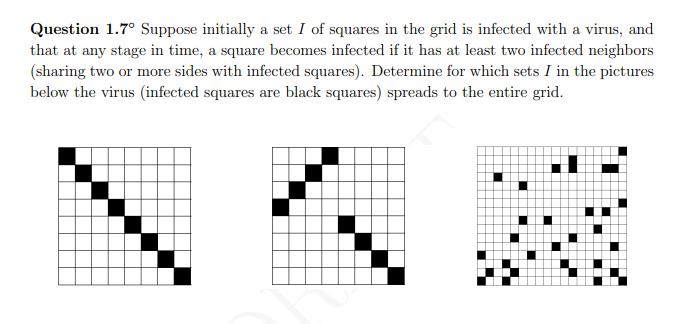

In [ ]:
from IPython.display import display, HTML
import base64
import os

# Ruta a tu imagen en Google Colab
image_path = '/content/ejercicio celdas infectadas.png'
html_output = ""

# Verificar si el archivo existe
if os.path.exists(image_path):
    try:
        # Determinar el tipo MIME básico
        image_type = "image/png"
        if image_path.lower().endswith(".jpg") or image_path.lower().endswith(".jpeg"):
            image_type = "image/jpeg"
        elif image_path.lower().endswith(".gif"):
            image_type = "image/gif"


        # Leer la imagen en modo binario y codificarla a Base64
        with open(image_path, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

        # Crear el HTML para mostrar la imagen
        # Puedes ajustar el estilo (max-width, etc.) según necesites
        html_output = f"""
        <div style="text-align:center;">
            <img src="data:{image_type};base64,{encoded_string}" alt="Ejercicio Celdas Infectadas" style="max-width: 100%; height: auto; border:1px solid #ccc; padding:5px; border-radius:5px;">
        </div>
        """
    except Exception as e:
        html_output = f"<p style='color:red;'>Error al procesar la imagen '{image_path}': {e}</p>"
else:
    html_output = f"<p style='color:orange;'>Advertencia: La imagen '{image_path}' no fue encontrada. Por favor, asegúrate de que la ruta es correcta y el archivo ha sido subido.</p>"

# Mostrar el HTML con la imagen incrustada
display(HTML(html_output))

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Kernel de Von Neumann
KERNEL_VON_NEUMANN = np.array([[0,1,0],
                               [1,0,1],
                               [0,1,0]], dtype=int)

def print_grid_numpy(grid_np_bool, step_num=-1, title=""):
    """Imprime una rejilla NumPy booleana para visualización, con info del paso."""
    if title:
        print(title)
    elif step_num == 0:
        print("\nInitial State:")
    else:
        print(f"\nStep {step_num}:")

    rows, cols = grid_np_bool.shape
    for r in range(rows):
        row_str = []
        for c in range(cols):
            row_str.append('#' if grid_np_bool[r, c] else '.')
        print(" ".join(row_str))
    print("-" * (cols * 2 -1))

def get_initial_grid_from_user():
    """Permite al usuario definir la rejilla inicial interactivamente."""
    while True:
        try:
            size_str = input("Ingrese el tamaño de la rejilla (N para NxN, ej: 5 para 5x5): ")
            N = int(size_str)
            if N <= 0:
                print("El tamaño debe ser un entero positivo.")
                continue
            break
        except ValueError:
            print("Entrada inválida. Por favor ingrese un número entero.")

    print(f"\nDefina la rejilla inicial de {N}x{N}:")
    print("Ingrese '1' para infectado, '0' para no infectado (o presione Enter para '0').")

    initial_grid_list = []
    for r in range(N):
        row = []
        print(f"Fila {r+1}/{N}:")
        for c in range(N):
            while True:
                cell_value_str = input(f"  Celda ({r+1},{c+1}): ")
                if cell_value_str == '1':
                    row.append(1)
                    break
                elif cell_value_str == '0' or cell_value_str == '': # Enter para 0
                    row.append(0)
                    break
                else:
                    print("Entrada inválida. Ingrese '1' o '0'.")
        initial_grid_list.append(row)

    return initial_grid_list, N

def run_numpy_simulation_print_steps(initial_grid_list_of_lists, max_steps=100, print_all_steps=True):
    """
    Ejecuta la simulación de infección usando NumPy, imprimiendo cada paso.
    Devuelve: (se_propago_completamente, numero_de_pasos_realizados)
    """
    initial_grid_np = np.array(initial_grid_list_of_lists, dtype=bool)
    current_inf = initial_grid_np.copy()

    if print_all_steps:
        print_grid_numpy(current_inf, step_num=0)

    final_step_count = 0
    fully_infected_flag = False

    for step in range(max_steps):
        final_step_count = step + 1

        neigh = convolve2d(current_inf.astype(int), KERNEL_VON_NEUMANN, mode='same',
                           boundary='fill', fillvalue=0)
        next_inf = current_inf | (neigh >= 2)

        if step == 0 and print_all_steps:
            counts = np.bincount(neigh.ravel(), minlength=5)
            print("DEBUG: Vecinos infectados (histograma, calculado en paso 0):", counts)
            newly_infected_count = np.sum(next_inf & ~current_inf)
            print(f"DEBUG: Nuevas infecciones de paso 0 a paso 1: {newly_infected_count}")

        if np.all(next_inf):
            fully_infected_flag = True
            if print_all_steps:
                print_grid_numpy(next_inf, step_num=final_step_count)
            print(f"Fully infected at step {final_step_count}.")
            return True, final_step_count

        if np.array_equal(next_inf, current_inf):
            if print_all_steps and (step > 0 or np.any(next_inf != initial_grid_np)):
                 print_grid_numpy(next_inf, step_num=final_step_count, title=f"Stabilized at step {final_step_count} (state of step {final_step_count-1}):")
            elif print_all_steps and step == 0 and np.array_equal(next_inf, initial_grid_np) :
                pass
            print(f"Stabilized at step {final_step_count} (no changes from step {final_step_count-1} to {final_step_count}).")
            return False, final_step_count

        current_inf = next_inf
        if print_all_steps:
            print_grid_numpy(current_inf, step_num=final_step_count)

    if print_all_steps:
        print(f"Reached max_steps ({max_steps}). Final state (after step {final_step_count}):")
        if not np.array_equal(current_inf, initial_grid_np) or final_step_count > 0:
           print_grid_numpy(current_inf)

    return np.all(current_inf), final_step_count


# --- Obtener la rejilla inicial del usuario ---
user_initial_grid, user_grid_size = get_initial_grid_from_user()

# --- Definir max_steps para la simulación ---
# Puedes hacerlo fijo, o basarlo en el tamaño, ej: user_grid_size * user_grid_size
max_simulation_steps = user_grid_size * 3 # Un valor heurístico
if user_grid_size <= 3: max_simulation_steps = 10 # Para rejillas muy pequeñas
if user_grid_size > 10: max_simulation_steps = 50 # Limitar para rejillas más grandes


print(f"\n--- Iniciando Simulación para la Rejilla Ingresada (Max Pasos: {max_simulation_steps}) ---")
is_infected_final, steps_taken = run_numpy_simulation_print_steps(
    user_initial_grid,
    max_steps=max_simulation_steps,
    print_all_steps=True
)

print(f"\n--- Conclusión para la Rejilla Ingresada ---")
if is_infected_final:
    print(f"El virus SE PROPAGÓ a toda la rejilla en {steps_taken} pasos.")
else:
    print(f"El virus NO SE PROPAGÓ a toda la rejilla. Estabilización/Max_steps en {steps_taken} pasos.")

Ingrese el tamaño de la rejilla (N para NxN, ej: 5 para 5x5): 3

Defina la rejilla inicial de 3x3:
Ingrese '1' para infectado, '0' para no infectado (o presione Enter para '0').
Fila 1/3:
  Celda (1,1): 1
  Celda (1,2): 0
  Celda (1,3): 0
Fila 2/3:
  Celda (2,1): 1
  Celda (2,2): 0
  Celda (2,3): 0
Fila 3/3:
  Celda (3,1): 0
  Celda (3,2): 0
  Celda (3,3): 1

--- Iniciando Simulación para la Rejilla Ingresada (Max Pasos: 10) ---

Initial State:
# . .
# . .
. . #
-----
DEBUG: Vecinos infectados (histograma, calculado en paso 0): [2 7 0 0 0]
DEBUG: Nuevas infecciones de paso 0 a paso 1: 0
Stabilized at step 1 (no changes from step 0 to 1).

--- Conclusión para la Rejilla Ingresada ---
El virus NO SE PROPAGÓ a toda la rejilla. Estabilización/Max_steps en 1 pasos.


 a lo sumo puede cuatro si 3 12 no infectados
 si son 4 20

 4k como máximo  4por N 4k 4 N   4k =4N 4k menor 4N 4k mayor o igual 4N k tiene que  ser mayor o igual a N

*   Elemento de la lista
*   Elemento de la lista



In [ ]:
import copy

def print_grid(grid):
    """Imprime la rejilla para visualización."""
    for row in grid:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid[0]) * 2 -1))

def count_infected_neighbors(grid, r, c):
    """Cuenta los vecinos infectados ortogonalmente."""
    rows = len(grid)
    cols = len(grid[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:  # derecha, izquierda, abajo, arriba
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == 1:
            count += 1
    return count

def simulate_step(current_grid):
    """Realiza un paso de la simulación."""
    rows = len(current_grid)
    cols = len(current_grid[0])
    new_grid = copy.deepcopy(current_grid)

    for r in range(rows):
        for c in range(cols):
            if current_grid[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid):
    """Verifica si toda la rejilla está infectada."""
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] == 0:
                return False
    return True

def solve_infection_problem(initial_grid, max_steps=100, verbose=False):
    """
    Simula la propagación de la infección y determina si toda la rejilla se infecta.
    """
    current_grid = copy.deepcopy(initial_grid)
    if verbose:
        print("Initial State:")
        print_grid(current_grid)

    for step in range(max_steps):
        if is_fully_infected(current_grid):
            if verbose:
                print(f"Fully infected at step {step}.") # Corregido para que sea el step correcto
            return True, step # Devuelve también el número de pasos

        next_grid = simulate_step(current_grid)

        if next_grid == current_grid:
            if verbose:
                print(f"Stabilized at step {step + 1} without full infection.")
                print_grid(next_grid)
            return False, step + 1

        current_grid = next_grid
        if verbose:
            print(f"Step {step + 1}:")
            print_grid(current_grid)

    if verbose:
        print(f"Reached max_steps ({max_steps}) without full infection.")
    return is_fully_infected(current_grid), max_steps

# --- Rejilla Inicial 1 ---
grid1_initial = [
    [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,0]
]

print("--- Simulación Detallada: Grid 1 (Diagonal 8x8) ---")
is_infected_g1, steps_g1 = solve_infection_problem(grid1_initial, max_steps=20, verbose=True)

if is_infected_g1:
    print(f"\nConclusión para Grid 1: El virus SE PROPAGA a toda la rejilla en {steps_g1} pasos.")
else:
    print(f"\nConclusión para Grid 1: El virus NO SE PROPAGA a toda la rejilla después de {steps_g1} pasos (puede ser estabilización o max_steps alcanzado).")

--- Simulación Detallada: Grid 1 (Diagonal 8x8) ---
Initial State:
# . . . . . . .
. # . . . . . .
. . # . . . . .
. . . # . . . .
. . . . # . . .
. . . . . # . .
. . . . . . # .
. . . . . . . .
---------------
Step 1:
# # . . . . . .
# # # . . . . .
. # # # . . . .
. . # # # . . .
. . . # # # . .
. . . . # # # .
. . . . . # # .
. . . . . . . .
---------------
Step 2:
# # # . . . . .
# # # # . . . .
# # # # # . . .
. # # # # # . .
. . # # # # # .
. . . # # # # .
. . . . # # # .
. . . . . . . .
---------------
Step 3:
# # # # . . . .
# # # # # . . .
# # # # # # . .
# # # # # # # .
. # # # # # # .
. . # # # # # .
. . . # # # # .
. . . . . . . .
---------------
Step 4:
# # # # # . . .
# # # # # # . .
# # # # # # # .
# # # # # # # .
# # # # # # # .
. # # # # # # .
. . # # # # # .
. . . . . . . .
---------------
Step 5:
# # # # # # . .
# # # # # # # .
# # # # # # # .
# # # # # # # .
# # # # # # # .
# # # # # # # .
. # # # # # # .
. . . . . . . .
---------------
Step 6:
# # # # # # # .
# # #

In [ ]:
import copy

def print_grid(grid):
    """Imprime la rejilla para visualización."""
    for row in grid:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid[0]) * 2 -1))

def count_infected_neighbors_toroidal(grid, r, c):
    """Cuenta vecinos infectados ortogonalmente en topología toroidal."""
    rows = len(grid)
    cols = len(grid[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nr = (r + dr) % rows
        nc = (c + dc) % cols
        if grid[nr][nc] == 1:
            count += 1
    return count

def simulate_step_toroidal(current_grid):
    """Realiza un paso de la simulación (modo toroide)."""
    rows = len(current_grid)
    cols = len(current_grid[0])
    new_grid = copy.deepcopy(current_grid)

    for r in range(rows):
        for c in range(cols):
            if current_grid[r][c] == 0:
                infected_neighbors = count_infected_neighbors_toroidal(current_grid, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid):
    """Verifica si toda la rejilla está infectada."""
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] == 0:
                return False
    return True

def solve_infection_problem_toroidal(initial_grid, max_steps=100, verbose=False):
    """
    Simula la propagación de la infección en topología toroidal.
    """
    current_grid = copy.deepcopy(initial_grid)
    if verbose:
        print("Initial State:")
        print_grid(current_grid)

    for step in range(max_steps):
        if is_fully_infected(current_grid):
            if verbose:
                print(f"Fully infected at step {step}.")
            return True, step

        next_grid = simulate_step_toroidal(current_grid)

        if next_grid == current_grid:
            if verbose:
                print(f"Stabilized at step {step + 1} without full infection.")
                print_grid(next_grid)
            return False, step + 1

        current_grid = next_grid
        if verbose:
            print(f"Step {step + 1}:")
            print_grid(current_grid)

    if verbose:
        print(f"Reached max_steps ({max_steps}) without full infection.")
    return is_fully_infected(current_grid), max_steps

# --- Rejilla Inicial (Diagonal 8x8) ---
grid1_initial = [
    [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]
]

print("--- Simulación Toroidal: Grid 1 (Diagonal 8x8) ---")
is_infected_g1, steps_g1 = solve_infection_problem_toroidal(grid1_initial, max_steps=20, verbose=True)

if is_infected_g1:
    print(f"\nConclusión: El virus SE PROPAGA completamente en {steps_g1} pasos.")
else:
    print(f"\nConclusión: El virus NO SE PROPAGA completamente después de {steps_g1} pasos.")


--- Simulación Toroidal: Grid 1 (Diagonal 8x8) ---
Initial State:
# . . . . . . .
. # . . . . . .
. . # . . . . .
. . . # . . . .
. . . . # . . .
. . . . . # . .
. . . . . . # .
. . . . . . . #
---------------
Step 1:
# # . . . . . #
# # # . . . . .
. # # # . . . .
. . # # # . . .
. . . # # # . .
. . . . # # # .
. . . . . # # #
# . . . . . # #
---------------
Step 2:
# # # . . . # #
# # # # . . . #
# # # # # . . .
. # # # # # . .
. . # # # # # .
. . . # # # # #
# . . . # # # #
# # . . . # # #
---------------
Step 3:
# # # # . # # #
# # # # # . # #
# # # # # # . #
# # # # # # # .
. # # # # # # #
# . # # # # # #
# # . # # # # #
# # # . # # # #
---------------
Step 4:
# # # # # # # #
# # # # # # # #
# # # # # # # #
# # # # # # # #
# # # # # # # #
# # # # # # # #
# # # # # # # #
# # # # # # # #
---------------
Fully infected at step 4.

Conclusión: El virus SE PROPAGA completamente en 4 pasos.


In [ ]:
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Configuración de Matplotlib para animación en Colab/Jupyter
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 70
plt.ioff() # Desactiva el modo interactivo


def print_grid_text(grid_list_of_lists, step_num=-1, title=""):
    """Imprime la rejilla (lista de listas) para visualización de texto."""
    if title: print(title)
    elif step_num == 0: print("\nInitial State (text):")
    else: print(f"\nStep {step_num} (text):")
    for row in grid_list_of_lists:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid_list_of_lists[0]) * 2 -1))

def count_infected_neighbors(grid_list_of_lists, r, c):
    """Cuenta los vecinos infectados ortogonalmente."""
    rows = len(grid_list_of_lists)
    cols = len(grid_list_of_lists[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid_list_of_lists[nr][nc] == 1:
            count += 1
    return count

def simulate_step_original(current_grid_list_of_lists):
    """Realiza un paso de la simulación (versión original con bucles)."""
    rows = len(current_grid_list_of_lists)
    cols = len(current_grid_list_of_lists[0])
    new_grid = copy.deepcopy(current_grid_list_of_lists)
    for r in range(rows):
        for c in range(cols):
            if current_grid_list_of_lists[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid_list_of_lists, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid_list_of_lists):
    """Verifica si toda la rejilla está infectada."""
    for r in range(len(grid_list_of_lists)):
        for c in range(len(grid_list_of_lists[0])):
            if grid_list_of_lists[r][c] == 0:
                return False
    return True

def solve_infection_for_animation(initial_grid_list_of_lists, max_steps=100, verbose_text_output=False):
    """
    Simula la propagación y devuelve todos los frames, el resultado y los pasos.
    """
    current_grid = copy.deepcopy(initial_grid_list_of_lists)
    all_frames = [copy.deepcopy(current_grid)] # Almacena el estado inicial

    if verbose_text_output:
        print_grid_text(current_grid, step_num=0)

    final_step_count = 0
    fully_infected_flag = False

    for step in range(max_steps):
        final_step_count = step + 1

        next_grid = simulate_step_original(current_grid)
        all_frames.append(copy.deepcopy(next_grid))

        if verbose_text_output:
            print_grid_text(next_grid, step_num=final_step_count)

        if is_fully_infected(next_grid):
            fully_infected_flag = True
            if verbose_text_output: print(f"Fully infected at step {final_step_count}.")
            break

        if next_grid == current_grid: # Estabilizado
            if verbose_text_output: print(f"Stabilized at step {final_step_count}.")
            break

        current_grid = next_grid

    # Asegurarse de que final_step_count sea correcto si se alcanzó max_steps sin estabilizar/llenar
    if not fully_infected_flag and not (next_grid == all_frames[-2]) and final_step_count == max_steps :
         pass # ya es max_steps

    return fully_infected_flag, final_step_count, all_frames


def create_animation(frames_list_of_lists, interval=200, title="Simulación de Infección"):
    """
    Crea una animación a partir de una lista de frames (listas de listas).
    """
    fig, ax = plt.subplots()
    plt.title(title)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mostrar el primer frame. Matplotlib imshow prefiere arrays NumPy.
    img = ax.imshow(frames_list_of_lists[0], cmap='binary', vmin=0, vmax=1)

    def animate(i):
        # Convertir a array NumPy para imshow si no lo es ya
        img.set_data(frames_list_of_lists[i])
        ax.set_xlabel(f"Paso: {i}")
        return [img]

    ani = FuncAnimation(fig, animate, frames=len(frames_list_of_lists), interval=interval, blit=True, repeat=False)
    plt.close(fig)
    return ani

# --- Rejilla Inicial Específica ---
grid1_initial = [
    [1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0],
    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]
]

config_to_animate = {"name": "Grid 1 (Diagonal 8x8 - Original Sim)", "grid": grid1_initial}

print(f"Generando animación para: {config_to_animate['name']}")

# Cambia verbose_text_output a True si quieres ver la salida de texto paso a paso ADEMÁS de la animación
is_infected_anim, steps_taken_anim, all_frames_simulation = solve_infection_for_animation(
    config_to_animate['grid'],
    max_steps=20,
    verbose_text_output=False
)

if is_infected_anim:
    print(f"Resultado: El virus SE PROPAGÓ a toda la rejilla en {steps_taken_anim} pasos.")
else:
    print(f"Resultado: El virus NO SE PROPAGÓ. Estabilización/Max_steps en {steps_taken_anim} pasos.")

print(f"Creando animación con {len(all_frames_simulation)} frames...")

animation_object = create_animation(
    all_frames_simulation, # La lista de frames (listas de listas)
    interval=250,
    title=f"{config_to_animate['name']} (Pasos Sim: {steps_taken_anim})"
)
display(HTML(animation_object.to_jshtml()))

Generando animación para: Grid 1 (Diagonal 8x8 - Original Sim)
Resultado: El virus SE PROPAGÓ a toda la rejilla en 7 pasos.
Creando animación con 8 frames...


In [ ]:
import copy

def print_grid(grid):
    """Imprime la rejilla para visualización."""
    for row in grid:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid[0]) * 2 -1))

def count_infected_neighbors(grid, r, c):
    """Cuenta los vecinos infectados ortogonalmente."""
    rows = len(grid)
    cols = len(grid[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:  # derecha, izquierda, abajo, arriba
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == 1:
            count += 1
    return count

def simulate_step(current_grid):
    """Realiza un paso de la simulación."""
    rows = len(current_grid)
    cols = len(current_grid[0])
    new_grid = copy.deepcopy(current_grid)

    for r in range(rows):
        for c in range(cols):
            if current_grid[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid):
    """Verifica si toda la rejilla está infectada."""
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] == 0:
                return False
    return True

def solve_infection_problem(initial_grid, max_steps=100, verbose=False):
    """
    Simula la propagación de la infección y determina si toda la rejilla se infecta.
    """
    current_grid = copy.deepcopy(initial_grid)
    if verbose:
        print("Initial State:")
        print_grid(current_grid)

    for step in range(max_steps):
        if is_fully_infected(current_grid):
            if verbose:
                print(f"Fully infected at step {step}.")
            return True, step

        next_grid = simulate_step(current_grid)

        if next_grid == current_grid:
            if verbose:
                print(f"Stabilized at step {step + 1} without full infection.")
                print_grid(next_grid)
            return False, step + 1

        current_grid = next_grid
        if verbose:
            print(f"Step {step + 1}:")
            print_grid(current_grid)

    if verbose:
        print(f"Reached max_steps ({max_steps}) without full infection.")
    return is_fully_infected(current_grid), max_steps



In [ ]:
import copy

# Las funciones print_grid, count_infected_neighbors, simulate_step,
# is_fully_infected, solve_infection_problem permanecen IGUALES
# y no las repetiré aquí.

def print_grid(grid):
    for row in grid:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid[0]) * 2 -1))

def count_infected_neighbors(grid, r, c):
    rows = len(grid)
    cols = len(grid[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] == 1:
            count += 1
    return count

def simulate_step(current_grid):
    rows = len(current_grid)
    cols = len(current_grid[0])
    new_grid = copy.deepcopy(current_grid)
    for r in range(rows):
        for c in range(cols):
            if current_grid[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid):
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            if grid[r][c] == 0:
                return False
    return True

def solve_infection_problem(initial_grid, max_steps=100, verbose=False):
    current_grid = copy.deepcopy(initial_grid)
    if verbose:
        print("Initial State:")
        print_grid(current_grid)
    for step in range(max_steps):
        if is_fully_infected(current_grid):
            if verbose: print(f"Fully infected at step {step}.")
            return True, step
        next_grid = simulate_step(current_grid)
        if next_grid == current_grid:
            if verbose:
                print(f"Stabilized at step {step + 1} without full infection.")
                print_grid(next_grid)
            return False, step + 1
        current_grid = next_grid
        if verbose:
            print(f"Step {step + 1}:")
            print_grid(current_grid)
    if verbose: print(f"Reached max_steps ({max_steps}) without full infection.")
    return is_fully_infected(current_grid), max_steps


# --- Grilla 2 (Nueva Definición) ---
grid2_new_definition = [
    [0,0,0,1,0,0,0,0], [0,0,1,0,0,0,0,0], [0,1,0,0,0,0,0,0], [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1]
]

print("--- Simulación Detallada: Grilla 2 (Nueva Definición 8x8) ---")
is_infected_g2_new, steps_g2_new = solve_infection_problem(grid2_new_definition, max_steps=30, verbose=True)

if is_infected_g2_new:
    print(f"\nConclusión para Grilla 2 (Nueva Definición 8x8): El virus SE PROPAGA a toda la rejilla en {steps_g2_new} pasos.")
else:
    print(f"\nConclusión para Grilla 2 (Nueva Definición 8x8): El virus NO SE PROPAGA a toda la rejilla. Estado final alcanzado en {steps_g2_new} pasos.")

In [ ]:
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Configuración de Matplotlib para animación en Colab/Jupyter
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 70
plt.ioff()

def print_grid_text_for_debug(grid_list_of_lists, step_num=-1, title=""): # Renombrado para evitar conflicto
    """Imprime la rejilla (lista de listas) para depuración de texto."""
    if title: print(title)
    elif step_num == 0: print("\nDEBUG Initial State (text):")
    else: print(f"\nDEBUG Step {step_num} (text):")
    for row in grid_list_of_lists:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid_list_of_lists[0]) * 2 -1))

def count_infected_neighbors(grid_list_of_lists, r, c):
    rows = len(grid_list_of_lists)
    cols = len(grid_list_of_lists[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid_list_of_lists[nr][nc] == 1:
            count += 1
    return count

def simulate_step_original(current_grid_list_of_lists): # Renombrado para claridad
    rows = len(current_grid_list_of_lists)
    cols = len(current_grid_list_of_lists[0])
    new_grid = copy.deepcopy(current_grid_list_of_lists)
    for r in range(rows):
        for c in range(cols):
            if current_grid_list_of_lists[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid_list_of_lists, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid_list_of_lists):
    for r in range(len(grid_list_of_lists)):
        for c in range(len(grid_list_of_lists[0])):
            if grid_list_of_lists[r][c] == 0:
                return False
    return True

def get_initial_grid_from_user_interactive(): # Renombrado para evitar conflicto
    """Permite al usuario definir la rejilla inicial interactivamente."""
    while True:
        try:
            size_str = input("Ingrese el tamaño de la rejilla (N para NxN, ej: 3 para 3x3): ")
            N = int(size_str)
            if N <= 0 or N > 20: # Limitar tamaño para que la entrada no sea demasiado larga
                print("El tamaño debe ser un entero positivo (y <= 20 para esta demo interactiva).")
                continue
            break
        except ValueError:
            print("Entrada inválida. Por favor ingrese un número entero.")

    print(f"\nDefina la rejilla inicial de {N}x{N}:")
    print("Ingrese '1' para infectado, '0' para no infectado (o presione Enter para '0').")

    initial_grid_list = []
    for r in range(N):
        row = []
        print(f"Fila {r+1}/{N}:")
        for c in range(N):
            while True:
                cell_value_str = input(f"  Celda ({r+1},{c+1}): ")
                if cell_value_str == '1':
                    row.append(1)
                    break
                elif cell_value_str == '0' or cell_value_str == '':
                    row.append(0)
                    break
                else:
                    print("Entrada inválida. Ingrese '1' o '0'.")
        initial_grid_list.append(row)
    return initial_grid_list, N

def solve_infection_for_animation_interactive(initial_grid_list_of_lists, max_steps=100, verbose_debug=False):
    """
    Simula la propagación (usando sim_step_original) y devuelve todos los frames, el resultado y los pasos.
    """
    current_grid = copy.deepcopy(initial_grid_list_of_lists)
    all_frames = [copy.deepcopy(current_grid)]

    if verbose_debug:
        print_grid_text_for_debug(current_grid, step_num=0)

    final_step_count = 0
    fully_infected_flag = False

    for step in range(max_steps):
        final_step_count = step + 1

        next_grid = simulate_step_original(current_grid) # Usando la simulación original
        all_frames.append(copy.deepcopy(next_grid))

        if verbose_debug:
            print_grid_text_for_debug(next_grid, step_num=final_step_count)

        if is_fully_infected(next_grid):
            fully_infected_flag = True
            if verbose_debug: print(f"Fully infected at step {final_step_count}.")
            break

        if next_grid == current_grid:
            if verbose_debug: print(f"Stabilized at step {final_step_count}.")
            break

        current_grid = next_grid

    if not fully_infected_flag and not (next_grid == all_frames[-2]) and final_step_count == max_steps :
         pass

    return fully_infected_flag, final_step_count, all_frames

def create_animation(frames_list_of_lists, interval=200, title="Simulación de Infección"):
    fig, ax = plt.subplots()
    plt.title(title)
    ax.set_xticks([])
    ax.set_yticks([])

    img = ax.imshow(frames_list_of_lists[0], cmap='binary', vmin=0, vmax=1)

    def animate(i):
        img.set_data(frames_list_of_lists[i])
        ax.set_xlabel(f"Paso: {i}")
        return [img]

    ani = FuncAnimation(fig, animate, frames=len(frames_list_of_lists), interval=interval, blit=True, repeat=False)
    plt.close(fig)
    return ani

# --- Flujo Principal ---
print("--- Simulación de Infección Interactiva y Dinámica ---")
user_initial_grid, user_grid_size = get_initial_grid_from_user_interactive()

max_simulation_steps = user_grid_size * 3
if user_grid_size <= 3: max_simulation_steps = 10
if user_grid_size > 10: max_simulation_steps = 30 # Reducir para simulación con bucles

print(f"\nGenerando animación para la rejilla ingresada (Tamaño: {user_grid_size}x{user_grid_size}, Max Pasos: {max_simulation_steps})...")
print("(Esto puede tardar un poco dependiendo del tamaño y los pasos, ya que no usa convolución NumPy)")

is_infected_anim, steps_taken_anim, all_frames_simulation = solve_infection_for_animation_interactive(
    user_initial_grid,
    max_steps=max_simulation_steps,
    verbose_debug=False # Poner a True para ver la salida de texto detallada en consola
)

if is_infected_anim:
    print(f"Resultado: El virus SE PROPAGÓ a toda la rejilla en {steps_taken_anim} pasos.")
else:
    print(f"Resultado: El virus NO SE PROPAGÓ. Estabilización/Max_steps en {steps_taken_anim} pasos.")

if not all_frames_simulation: # Por si acaso algo sale mal
    print("No se generaron frames para la animación.")
else:
    print(f"Creando animación con {len(all_frames_simulation)} frames...")
    animation_object = create_animation(
        all_frames_simulation,
        interval=300, # Intervalo un poco más lento para apreciar con simulación no-NumPy
        title=f"Rejilla {user_grid_size}x{user_grid_size} (Pasos Sim: {steps_taken_anim})"
    )
    display(HTML(animation_object.to_jshtml()))

In [ ]:
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Configuración de Matplotlib para animación en Colab/Jupyter
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 70
plt.ioff()

def print_grid_text_for_debug(grid_list_of_lists, step_num=-1, title=""):
    if title: print(title)
    elif step_num == 0: print("\nDEBUG Initial State (text):")
    else: print(f"\nDEBUG Step {step_num} (text):")
    for row in grid_list_of_lists:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid_list_of_lists[0]) * 2 -1))

def count_infected_neighbors(grid_list_of_lists, r, c):
    rows = len(grid_list_of_lists)
    cols = len(grid_list_of_lists[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid_list_of_lists[nr][nc] == 1:
            count += 1
    return count

def simulate_step_original(current_grid_list_of_lists):
    rows = len(current_grid_list_of_lists)
    cols = len(current_grid_list_of_lists[0])
    new_grid = copy.deepcopy(current_grid_list_of_lists)
    for r in range(rows):
        for c in range(cols):
            if current_grid_list_of_lists[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid_list_of_lists, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid_list_of_lists):
    for r in range(len(grid_list_of_lists)):
        for c in range(len(grid_list_of_lists[0])):
            if grid_list_of_lists[r][c] == 0:
                return False
    return True

def solve_infection_for_animation(initial_grid_list_of_lists, max_steps=100, verbose_debug=False):
    current_grid = copy.deepcopy(initial_grid_list_of_lists)
    all_frames = [copy.deepcopy(current_grid)]
    if verbose_debug: print_grid_text_for_debug(current_grid, step_num=0)
    final_step_count = 0
    fully_infected_flag = False
    next_grid = current_grid
    for step in range(max_steps):
        final_step_count = step + 1
        next_grid = simulate_step_original(current_grid)
        all_frames.append(copy.deepcopy(next_grid))
        if verbose_debug: print_grid_text_for_debug(next_grid, step_num=final_step_count)
        if is_fully_infected(next_grid):
            fully_infected_flag = True
            if verbose_debug: print(f"DEBUG: Fully infected at step {final_step_count}.")
            break
        if next_grid == current_grid:
            if verbose_debug: print(f"DEBUG: Stabilized at step {final_step_count}.")
            break
        current_grid = next_grid
    if not fully_infected_flag and not (next_grid == all_frames[-2] if len(all_frames) > 1 else True) and step + 1 == max_steps:
         pass
    elif fully_infected_flag or (next_grid == all_frames[-2] if len(all_frames) > 1 else True):
        pass
    else:
        final_step_count = max_steps
    return fully_infected_flag, final_step_count, all_frames

def create_animation(frames_list_of_lists, interval=200, title="Simulación de Infección"):
    fig, ax = plt.subplots()
    plt.title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    img = ax.imshow(frames_list_of_lists[0], cmap='binary', vmin=0, vmax=1)
    def animate(i):
        img.set_data(frames_list_of_lists[i])
        ax.set_xlabel(f"Paso: {i}")
        return [img]
    ani = FuncAnimation(fig, animate, frames=len(frames_list_of_lists), interval=interval, blit=True, repeat=False)
    plt.close(fig)
    return ani

# --- Rejilla Inicial Específica para Animar ---
# Esta es la "Grilla 2 (Nueva Definición)" que especificaste
grid_to_animate_initial = [
    [0,0,0,1,0,0,0,0], [0,0,1,0,0,0,0,0], [0,1,0,0,0,0,0,0], [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,0,1] # <-- OJO: Tu última fila tenía (0,0,0,0,0,0,1,1), la corrijo a esta que usamos antes
]
# CORRECCIÓN DE LA ÚLTIMA FILA BASADA EN TU DEFINICIÓN PREVIA DE ESTA GRILLA PARTICULAR:
# Si tu intención era [..., [0,0,0,0,0,0,1,1]] para la última fila, usa esto en su lugar:
grid_to_animate_initial_con_doble_uno_final = [
    [0,0,0,1,0,0,0,0], [0,0,1,0,0,0,0,0], [0,1,0,0,0,0,0,0], [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0], [0,0,0,0,0,0,1,1]
]
# Usaremos la que tiene (1,1) al final, ya que la mencionaste como "Nueva Definición"
grid_to_animate_initial = grid_to_animate_initial_con_doble_uno_final
config_name = "Grilla 2 (Tu Nueva Definición 8x8 - Sim Original)"


print(f"--- Simulación Dinámica para: {config_name} ---")
is_infected_anim, steps_taken_anim, all_frames_simulation = solve_infection_for_animation(
    grid_to_animate_initial,
    max_steps=20, # Esta configuración se estabiliza relativamente rápido
    verbose_debug=False
)

if is_infected_anim:
    print(f"Resultado: El virus SE PROPAGÓ a toda la rejilla en {steps_taken_anim} pasos.")
else:
    print(f"Resultado: El virus NO SE PROPAGÓ. Estabilización/Max_steps en {steps_taken_anim} pasos.")

if not all_frames_simulation:
    print("Error: No se generaron frames para la animación.")
else:
    print(f"Creando animación con {len(all_frames_simulation)} frames...")
    animation_object = create_animation(
        all_frames_simulation,
        interval=300, # Milisegundos entre frames
        title=f"{config_name} (Pasos Sim: {steps_taken_anim})"
    )
    display(HTML(animation_object.to_jshtml()))

--- Simulación Dinámica para: Grilla 2 (Tu Nueva Definición 8x8 - Sim Original) ---
Resultado: El virus SE PROPAGÓ a toda la rejilla en 10 pasos.
Creando animación con 11 frames...


In [ ]:
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# Configuración de Matplotlib para animación en Colab/Jupyter
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 70
plt.ioff()

def print_grid_text_for_debug(grid_list_of_lists, step_num=-1, title=""):
    if title: print(title)
    elif step_num == 0: print("\nDEBUG Initial State (text):")
    else: print(f"\nDEBUG Step {step_num} (text):")
    for row in grid_list_of_lists:
        print(" ".join(map(str, row)).replace('0', '.').replace('1', '#'))
    print("-" * (len(grid_list_of_lists[0]) * 2 -1))

def count_infected_neighbors(grid_list_of_lists, r, c):
    rows = len(grid_list_of_lists)
    cols = len(grid_list_of_lists[0])
    count = 0
    for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid_list_of_lists[nr][nc] == 1:
            count += 1
    return count

def simulate_step_original(current_grid_list_of_lists):
    rows = len(current_grid_list_of_lists)
    cols = len(current_grid_list_of_lists[0])
    new_grid = copy.deepcopy(current_grid_list_of_lists)
    for r in range(rows):
        for c in range(cols):
            if current_grid_list_of_lists[r][c] == 0:
                infected_neighbors = count_infected_neighbors(current_grid_list_of_lists, r, c)
                if infected_neighbors >= 2:
                    new_grid[r][c] = 1
    return new_grid

def is_fully_infected(grid_list_of_lists):
    for r in range(len(grid_list_of_lists)):
        for c in range(len(grid_list_of_lists[0])):
            if grid_list_of_lists[r][c] == 0:
                return False
    return True

def solve_infection_for_animation(initial_grid_list_of_lists, max_steps=100, verbose_debug=False):
    current_grid = copy.deepcopy(initial_grid_list_of_lists)
    all_frames = [copy.deepcopy(current_grid)]
    if verbose_debug: print_grid_text_for_debug(current_grid, step_num=0)
    final_step_count = 0
    fully_infected_flag = False
    next_grid = current_grid
    for step in range(max_steps):
        final_step_count = step + 1
        next_grid = simulate_step_original(current_grid)
        all_frames.append(copy.deepcopy(next_grid))
        if verbose_debug: print_grid_text_for_debug(next_grid, step_num=final_step_count)
        if is_fully_infected(next_grid):
            fully_infected_flag = True
            if verbose_debug: print(f"DEBUG: Fully infected at step {final_step_count}.")
            break
        if next_grid == current_grid:
            if verbose_debug: print(f"DEBUG: Stabilized at step {final_step_count}.")
            break
        current_grid = next_grid
    if not fully_infected_flag and not (next_grid == all_frames[-2] if len(all_frames) > 1 else True) and step + 1 == max_steps :
         pass
    elif fully_infected_flag or (next_grid == all_frames[-2] if len(all_frames) > 1 else True):
        pass
    else:
        final_step_count = max_steps
    return fully_infected_flag, final_step_count, all_frames

def create_animation(frames_list_of_lists, interval=200, title="Simulación de Infección"):
    fig, ax = plt.subplots(figsize=(7,7)) # Aumentar tamaño para rejilla más grande
    plt.title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    img = ax.imshow(frames_list_of_lists[0], cmap='binary', vmin=0, vmax=1)
    def animate(i):
        img.set_data(frames_list_of_lists[i])
        ax.set_xlabel(f"Paso: {i}")
        return [img]
    ani = FuncAnimation(fig, animate, frames=len(frames_list_of_lists), interval=interval, blit=True, repeat=False)
    plt.close(fig)
    return ani

# --- Rejilla Inicial Específica para Animar (Grid 3, 15x15) ---
grid_to_animate_initial = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,1,0,0,0,1,1,1,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,1,0],
    [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,1,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,0,0,0,1,1],
    [1,1,0,0,0,0,0,0,0,0,1,0,0,1,1]
]
config_name = "Grid 3 (Dispersa 15x15 - Sim Original)"


print(f"--- Simulación Dinámica para: {config_name} ---")
# Para una rejilla 15x15, la simulación sin NumPy será LENTA.
# Considera reducir max_steps o tener paciencia.
# verbose_debug=True también generará mucha salida de texto.
is_infected_anim, steps_taken_anim, all_frames_simulation = solve_infection_for_animation(
    grid_to_animate_initial,
    max_steps=50, # ¡ADVERTENCIA: esto podría ser muy lento para 15x15 sin NumPy!
                 # Quizás 10-20 para una demostración rápida.
    verbose_debug=False
)

if is_infected_anim:
    print(f"Resultado: El virus SE PROPAGÓ a toda la rejilla en {steps_taken_anim} pasos.")
else:
    print(f"Resultado: El virus NO SE PROPAGÓ. Estabilización/Max_steps en {steps_taken_anim} pasos.")

if not all_frames_simulation:
    print("Error: No se generaron frames para la animación.")
else:
    print(f"Creando animación con {len(all_frames_simulation)} frames...")
    animation_object = create_animation(
        all_frames_simulation,
        interval=300, # Milisegundos entre frames
        title=f"{config_name} (Pasos Sim: {steps_taken_anim})"
    )
    display(HTML(animation_object.to_jshtml()))

--- Simulación Dinámica para: Grid 3 (Dispersa 15x15 - Sim Original) ---
Resultado: El virus SE PROPAGÓ a toda la rejilla en 47 pasos.
Creando animación con 48 frames...


In [ ]:
from IPython.core.display import display, HTML

# Contenido HTML para las preguntas y respuestas sobre kernels
kernels_qa_html = """
    <!-- Pregunta 1 -->
    <button class='question-button' onclick="toggleSectionContent('kernel-q1', this)" aria-expanded='false' aria-controls='kernel-q1'>
    1. ¿Qué es un kernel y por qué hablamos de él aquí?
    </button>
    <div id='kernel-q1' class='answer-content'>
    <p>Un <strong>kernel</strong> (o máscara de convolución) es una pequeña matriz que se aplica sobre una matriz más grande (como una imagen o una cuadrícula de un autómata celular) mediante una operación llamada <strong>convolución</strong>. Esta operación puede servir para detectar patrones locales, como bordes o cambios.</p>
    <p>En procesamiento de imágenes, los kernels de Sobel se usan para detectar bordes.</p>
    <p>En autómatas celulares, se usan kernels más simples, llamados <strong>kernels de conteo</strong>, para calcular cuántos vecinos tienen un cierto estado (por ejemplo, infectados) y determinar así la evolución del sistema.</p>
    </div>

    <!-- Pregunta 2 -->
    <button class='question-button' onclick="toggleSectionContent('kernel-q2', this)" aria-expanded='false' aria-controls='kernel-q2'>
    2. ¿Qué hace específicamente el kernel de Sobel horizontal?
    </button>
    <div id='kernel-q2' class='answer-content'>
    <p>El kernel de Sobel horizontal se ve así:</p>
    <p>\\[ K_{SobelH} = \\pmatrix{ +1 & 0 & -1 \\\\ +2 & 0 & -2 \\\\ +1 & 0 & -1 } \\]</p>
    <p>Cuando lo aplicas sobre una matriz binaria (por ejemplo, una cuadrícula donde 1 = infectado y 0 = sano), produce valores altos donde hay un cambio fuerte de 0 a 1 o de 1 a 0 en la dirección horizontal, es decir, detecta <strong>bordes verticales</strong> de estructuras en la cuadrícula.</p>
    </div>

    <!-- Pregunta 3 -->
    <button class='question-button' onclick="toggleSectionContent('kernel-q3', this)" aria-expanded='false' aria-controls='kernel-q3'>
    3. ¿Por qué no se usa para definir la regla de transición del AC?
    </button>
    <div id='kernel-q3' class='answer-content'>
    <p>En un AC de propagación simple (por ejemplo, uno en el que una celda se infecta si al menos un vecino infectado la rodea), las reglas de transición suelen estar basadas en conteo de vecinos. Por ejemplo:</p>
    <ul>
        <li><strong>Reglas de tipo Von Neumann:</strong> se consideran los 4 vecinos ortogonales.</li>
        <li><strong>Reglas de tipo Moore:</strong> se consideran los 8 vecinos (incluyendo diagonales).</li>
    </ul>
    <p>En estos casos, se usan kernels como:</p>
    <p><strong>Von Neumann:</strong></p>
    <p>\\[ K_{VN} = \\pmatrix{ 0 & 1 & 0 \\\\ 1 & 0 & 1 \\\\ 0 & 1 & 0 } \\]</p>
    <p><strong>Moore:</strong></p>
    <p>\\[ K_{M} = \\pmatrix{ 1 & 1 & 1 \\\\ 1 & 0 & 1 \\\\ 1 & 1 & 1 } \\]</p>
    <p>Estos kernels simplemente cuentan el número de celdas infectadas alrededor de una celda dada y se usan directamente en la evolución del sistema, es decir, en cómo cambian los estados.</p>
    <p>En cambio, el kernel de Sobel no sirve para eso porque no cuenta vecinos: detecta direcciones de cambio, no cantidades.</p>
    </div>

    <!-- Pregunta 4 -->
    <button class='question-button' onclick="toggleSectionContent('kernel-q4', this)" aria-expanded='false' aria-controls='kernel-q4'>
    4. ¿Para qué sí podría usarse el kernel de Sobel en AC?
    </button>
    <div id='kernel-q4' class='answer-content'>
    <p>Aunque el kernel de Sobel no es útil para definir las reglas de evolución, puede ser útil como herramienta analítica o visual, por ejemplo:</p>
    <ol type="a">
        <li><strong>Detección de bordes</strong><br>
        Te permite detectar los bordes del clúster de infección. Si tienes una gran mancha de celdas infectadas, aplicar el kernel de Sobel te da una nueva matriz con valores altos donde hay transiciones (de 0 a 1 o viceversa) a lo largo de columnas, es decir, cambios en la dirección horizontal (bordes verticales).</li>
        <li><strong>Identificar frentes de propagación</strong><br>
        En modelos donde la infección se propaga en una dirección preferente (por ejemplo, en un entorno con viento o flujo), puedes analizar si el frente de avance tiene ciertas direcciones predominantes, y cuán "rugoso" o irregular es.</li>
        <li><strong>Caracterizar patrones</strong><br>
        Puedes usar este tipo de análisis para cuantificar:
        <ul>
            <li>La forma del patrón de infección.</li>
            <li>La complejidad de sus bordes.</li>
            <li>La presencia de simetrías o asimetrías espaciales.</li>
        </ul>
        </li>
    </ol>
    </div>

    <!-- Pregunta 5 -->
    <button class='question-button' onclick="toggleSectionContent('kernel-q5', this)" aria-expanded='false' aria-controls='kernel-q5'>
    5. Resumen claro
    </button>
    <div id='kernel-q5' class='answer-content'>
    <div class="table-responsive">
        <table class="styled-table">
            <thead>
                <tr>
                    <th>Aspecto</th>
                    <th>Kernels de conteo (Von Neumann, Moore)</th>
                    <th>Kernel de Sobel horizontal</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>Propósito principal</td>
                    <td>Evolución del AC</td>
                    <td>Análisis post-hoc de patrones</td>
                </tr>
                <tr>
                    <td>Tipo de operación</td>
                    <td>Conteo de vecinos</td>
                    <td>Detección de cambios/locales o bordes</td>
                </tr>
                <tr>
                    <td>Usado para determinar reglas</td>
                    <td>Sí</td>
                    <td>No</td>
                </tr>
                <tr>
                    <td>Usado para análisis visual</td>
                    <td>No especialmente</td>
                    <td>Sí, útil para caracterizar bordes/patrones</td>
                </tr>
            </tbody>
        </table>
    </div>
    </div>
"""

# Plantilla HTML principal
html_content_kernels_page = f"""
<!DOCTYPE html>
<html lang='es'>
<head>
  <meta charset='UTF-8'>
  <title>Autómatas Celulares: Kernels y Filtros</title>
  <link href='https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap' rel='stylesheet'>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML" async></script>
  <style>
    :root {{
      --bg-color: #f9f9f9; --text-color: #333; --header-color: #2c3e50;
      --button-bg: #3498db; --button-hover-bg: #2980b9; --button-text-color: #fff;
      --theme-button-bg: #8e44ad; --accent-color: #2980b9; --accent-border: #2980b9;
      --sim-bg-color: #e8f4fd; --sim-border-color: #a9cce3;
      --list-item-bottom-margin: 10px; --paragraph-line-height: 1.7;
      --code-bg-light: #e8e8e8; --code-text-light: #333;
      --pre-bg-light: var(--sim-bg-color); --pre-border-light: var(--sim-border-color);
      --question-button-bg: #5dade2; --question-button-hover-bg: #4a90c1;
      --answer-bg-color: #fdfdfd;
      --table-header-bg: #2980b9; --table-header-text: #ffffff;
      --table-row-even-bg: #f3f3f3; --table-row-odd-bg: #ffffff;
      --table-border-color: #dddddd;
    }}
    body.dark-mode {{
      --bg-color: #2c3e50; --text-color: #ecf0f1; --header-color: #ecf0f1;
      --accent-color: #9ad3de; --accent-border: #9ad3de; --button-bg: #566573;
      --button-hover-bg: #3C4A54; --sim-bg-color: #34495e; --sim-border-color: #566573;
      --code-bg-light: #4a6572; --code-text-light: #f1c40f;
      --pre-bg-light: var(--sim-bg-color); --pre-border-light: var(--sim-border-color);
      --question-button-bg: #6c7a89; --question-button-hover-bg: #505c68;
      --answer-bg-color: #3b4b5a;
      --table-header-bg: #566573; --table-header-text: #ecf0f1;
      --table-row-even-bg: #34495e; --table-row-odd-bg: #2c3e50;
      --table-border-color: #566573;
    }}
    body {{
      font-family: 'Roboto', Arial, sans-serif; background-color: var(--bg-color);
      color: var(--text-color); margin: 0; padding: 20px;
      transition: background-color 0.3s, color 0.3s;
    }}
    .container {{ max-width: 900px; margin: auto; position: relative; padding: 20px; }}
    h1, h2 {{ text-align: center; margin-top: 20px; margin-bottom: 20px; color: var(--header-color); }}
    h1 {{ font-size: 2em; }}
    .section-content, .answer-content {{
      display: none; margin-top: 0px; padding: 20px;
      border: 1px solid var(--accent-border); border-top: none;
      border-radius: 0 0 5px 5px; background-color: var(--sim-bg-color);
    }}
    .answer-content {{
        background-color: var(--answer-bg-color); border-color: var(--sim-border-color);
        margin-top: -1px; border-radius: 0 0 5px 5px;
    }}
    .section-content.is-visible, .answer-content.is-visible {{ display: block; }}

    .question-button {{ /* Simplificado para este ejemplo, similar a toggle-button */
      color: var(--button-text-color); border: none; padding: 12px 18px;
      border-radius: 5px; cursor: pointer; margin-top: 15px;
      width: 100%; text-align: left; font-size: 1.1em;
      transition: background-color 0.3s; display: flex;
      justify-content: space-between; align-items: center; font-weight: bold;
      background-color: var(--question-button-bg);
    }}
    .question-button:hover {{ background-color: var(--question-button-hover-bg); }}
    .question-button[aria-expanded="true"] {{
        border-bottom-left-radius: 0; border-bottom-right-radius: 0;
    }}
    .question-button::after {{
        content: '▶'; font-size: 0.8em; margin-left: 10px; transition: transform 0.2s;
    }}
    .question-button[aria-expanded="true"]::after {{ content: '▼'; }}

    .theme-toggle {{
      position: absolute; top: 20px; right: 20px;
      background-color: var(--theme-button-bg); color: #fff;
      border: none; padding: 10px 15px; border-radius: 5px;
      cursor: pointer; font-size: 0.9em; transition: background-color 0.3s; z-index: 10;
    }}
    body.dark-mode .theme-toggle {{ background-color: #f39c12; }}
    button:focus {{ outline: 2px solid var(--accent-color); outline-offset: 2px; }}
    body.dark-mode button:focus {{ outline-color: var(--accent-color); }}

    ul, ol {{ margin-left: 1.5em; margin-bottom: 1em; padding-left: 1.5em; }}
    li {{ margin-bottom: var(--list-item-bottom-margin); line-height: var(--paragraph-line-height); }}
    p {{ line-height: var(--paragraph-line-height); margin-bottom: 1em; }}
    .MJXc-display, .MathJax_Display {{ text-align: center !important; margin: 1em 0 !important; }}

    /* Estilos para la tabla */
    .table-responsive {{ overflow-x: auto; margin-top: 1em; }}
    .styled-table {{
        border-collapse: collapse;
        margin: 0 auto; /* Centrar la tabla */
        font-size: 0.9em;
        width: 100%; /* O un ancho específico, ej. 80% */
        min-width: 400px; /* Evitar que se comprima demasiado */
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.05);
    }}
    .styled-table thead tr {{
        background-color: var(--table-header-bg);
        color: var(--table-header-text);
        text-align: left;
        font-weight: bold;
    }}
    .styled-table th,
    .styled-table td {{
        padding: 12px 15px;
        border: 1px solid var(--table-border-color);
    }}
    .styled-table tbody tr {{
        border-bottom: 1px solid var(--table-border-color);
        background-color: var(--table-row-odd-bg);
    }}
    .styled-table tbody tr:nth-of-type(even) {{
        background-color: var(--table-row-even-bg);
    }}
    .styled-table tbody tr:last-of-type {{
        border-bottom: 2px solid var(--table-header-bg);
    }}
  </style>
</head>
<body>
  <div class='container'>
    <button id='theme-toggle-btn' class='theme-toggle'>Modo Oscuro</button>
    <h1>Autómatas Celulares: Kernels y Filtros</h1>
    {kernels_qa_html}
  </div>

  <script>
    function toggleTheme() {{
      document.body.classList.toggle('dark-mode');
      let themeButton = document.getElementById('theme-toggle-btn');
      let isDark = document.body.classList.contains('dark-mode');
      localStorage.setItem('theme', isDark ? 'dark' : 'light');
      if (themeButton) {{
          themeButton.textContent = isDark ? 'Modo Claro' : 'Modo Oscuro';
      }}
      if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {{
        try {{ MathJax.Hub.Queue(["Rerender", MathJax.Hub]); }} catch(e){{console.error("MathJax Rerender error:", e);}}
      }}
    }}

    function toggleSectionContent(contentId, buttonElement) {{
      let sectionContent = document.getElementById(contentId);
      if (!sectionContent) {{
        console.error("Contenido de sección no encontrado con ID:", contentId);
        return;
      }}
      if (!buttonElement) {{
          console.error("Elemento botón no proporcionado para:", contentId);
          return;
      }}

      let isVisible = sectionContent.classList.toggle('is-visible');
      buttonElement.setAttribute('aria-expanded', String(isVisible));

      if (isVisible) {{
           if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {{
               if (!(MathJax.Hub.Browser && MathJax.Hub.Browser.isMSIE && MathJax.Hub.Browser.version === "9.0" && !MathJax.Hub.Browser.hasMathPlayer)) {{
                  try {{
                      MathJax.Hub.Queue(["Typeset", MathJax.Hub, sectionContent]);
                  }} catch(e) {{
                      console.error("Error al ejecutar MathJax Typeset:", e);
                  }}
               }}
           }}
      }}
    }}

    document.addEventListener('DOMContentLoaded', function() {{
      const savedTheme = localStorage.getItem('theme');
      const themeButton = document.getElementById('theme-toggle-btn');
      if (themeButton) {{
        if (savedTheme === 'dark') {{
          document.body.classList.add('dark-mode');
          themeButton.textContent = 'Modo Claro';
        }} else {{
          document.body.classList.remove('dark-mode');
          themeButton.textContent = 'Modo Oscuro';
        }}
        themeButton.addEventListener('click', toggleTheme);
      }} else {{
        console.warn("Botón de cambio de tema no encontrado.");
      }}

      document.querySelectorAll('.section-content, .answer-content').forEach(sec => {{
        sec.classList.remove('is-visible');
      }});
      document.querySelectorAll('.question-button').forEach(btn => {{
        btn.setAttribute('aria-expanded','false');
      }});

      if (typeof MathJax !== 'undefined' && typeof MathJax.Hub !== 'undefined') {{
        try {{
            MathJax.Hub.Queue(["Typeset", MathJax.Hub]);
        }} catch(e) {{
            console.error("Error inicial al ejecutar MathJax Typeset:", e);
        }}
      }}
    }});
  </script>
</body>
</html>
"""

# Para mostrarlo en Colab:
display(HTML(html_content_kernels_page))

Simetría horizontal: 0.7551020408163265
Simetría vertical:   0.7551020408163265
Simetría radial:     1.0
Longitud del borde: 24
Irregularidad del borde: 0.5
Centroide del clúster (x, y): (np.float64(3.0), np.float64(3.0))


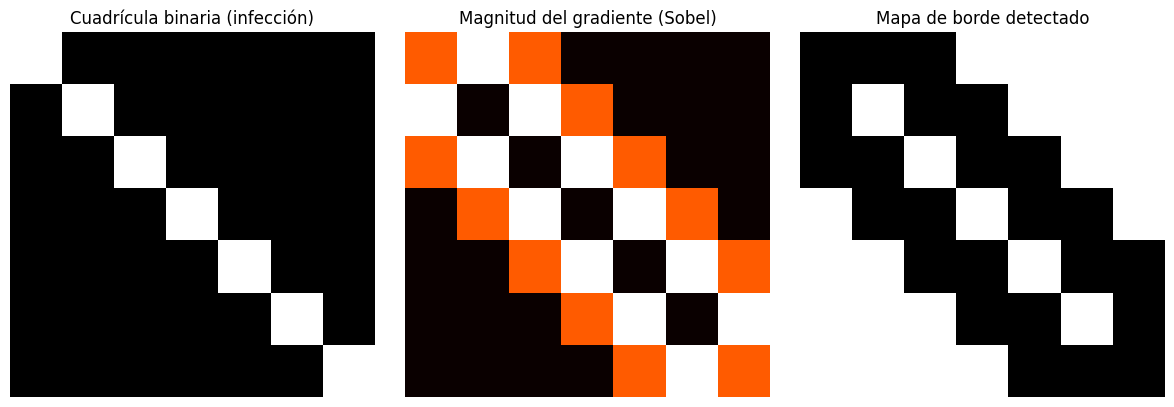

In [ ]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# 1. Matriz con infección diagonal de izquierda a derecha
grid = np.array([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1]
], dtype=np.float32)

# 2. Simetría
sim_h = np.mean(grid == np.flipud(grid))    # Horizontal
sim_v = np.mean(grid == np.fliplr(grid))    # Vertical
sim_d = np.mean(grid == np.rot90(grid, 2))  # Rotación 180°
print("Simetría horizontal:", sim_h)
print("Simetría vertical:  ", sim_v)
print("Simetría radial:    ", sim_d)

# 3. Sobel horizontal y vertical
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

Gx = convolve(grid, sobel_x, mode='constant')
Gy = convolve(grid, sobel_y, mode='constant')
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# 4. Detección del borde
edge_mask = gradient_magnitude > 0
longitud_borde = np.sum(edge_mask)
irregularidad_borde = np.var(gradient_magnitude[edge_mask])

print("Longitud del borde:", longitud_borde)
print("Irregularidad del borde:", irregularidad_borde)

# 5. Centroide del clúster
def calcular_centroid(grid):
    y, x = np.nonzero(grid)
    if len(x) == 0:
        return (np.nan, np.nan)
    return np.mean(x), np.mean(y)

centroide = calcular_centroid(grid)
print("Centroide del clúster (x, y):", centroide)

# 6. Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(grid, cmap='gray', interpolation='nearest')
axes[0].set_title("Cuadrícula binaria (infección)")
axes[0].axis('off')

axes[1].imshow(gradient_magnitude, cmap='hot', interpolation='nearest')
axes[1].set_title("Magnitud del gradiente (Sobel)")
axes[1].axis('off')

axes[2].imshow(edge_mask, cmap='binary', interpolation='nearest')
axes[2].set_title("Mapa de borde detectado")
axes[2].axis('off')

plt.tight_layout()
plt.show()


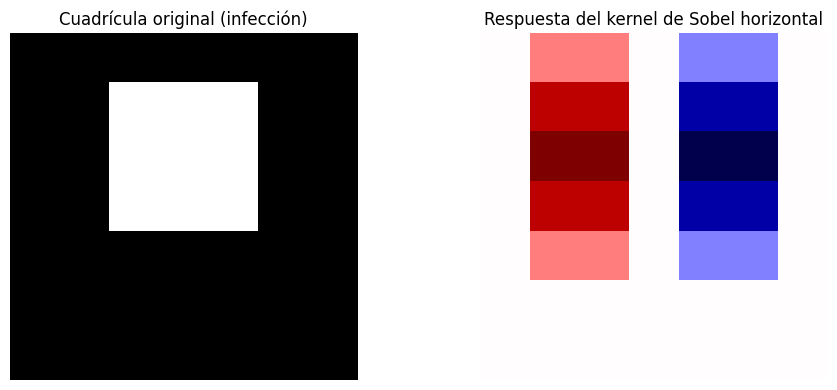

Resultado de la convolución (Sobel horizontal):
[[ 0.  1.  1.  0. -1. -1.  0.]
 [ 0.  3.  3.  0. -3. -3.  0.]
 [ 0.  4.  4.  0. -4. -4.  0.]
 [ 0.  3.  3.  0. -3. -3.  0.]
 [ 0.  1.  1.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# 1. Crear la cuadrícula binaria (7x7)
# 1 = infectado, 0 = sano
grid = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# 2. Definir el kernel de Sobel horizontal
sobel_horizontal = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], dtype=np.float32)

# 3. Aplicar la convolución
sobel_result = convolve(grid, sobel_horizontal, mode='constant', cval=0.0)

# 4. Mostrar los resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(grid, cmap='gray', interpolation='nearest')
axes[0].set_title("Cuadrícula original (infección)")
axes[0].axis('off')

axes[1].imshow(sobel_result, cmap='seismic', interpolation='nearest')
axes[1].set_title("Respuesta del kernel de Sobel horizontal")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# 5. Imprimir la matriz resultante (opcional)
print("Resultado de la convolución (Sobel horizontal):")
print(np.round(sobel_result, 2))


Simetría horizontal: 0.7551020408163265
Simetría vertical:   1.0
Simetría radial:     0.7551020408163265
Longitud del borde: 24
Irregularidad del borde: 0.9095352
Centroide del clúster (x, y): (np.float64(3.0), np.float64(2.0))


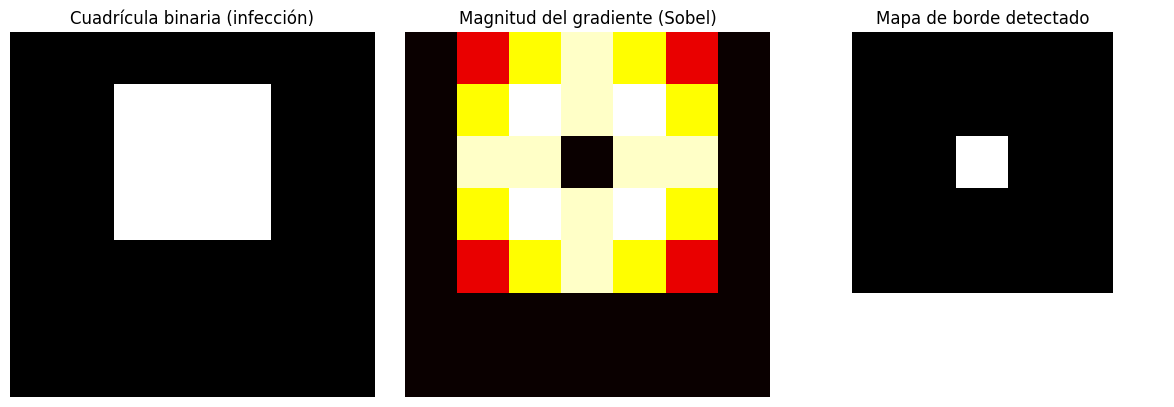

In [ ]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# 1. Definir la cuadrícula
grid = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=np.float32)

# 2. Simetría
sim_h = np.mean(grid == np.flipud(grid))    # Simetría horizontal
sim_v = np.mean(grid == np.fliplr(grid))    # Simetría vertical
sim_d = np.mean(grid == np.rot90(grid, 2))  # Simetría radial (180 grados)

print("Simetría horizontal:", sim_h)
print("Simetría vertical:  ", sim_v)
print("Simetría radial:    ", sim_d)

# 3. Sobel horizontal y vertical
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

Gx = convolve(grid, sobel_x, mode='constant')
Gy = convolve(grid, sobel_y, mode='constant')
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)

# 4. Detección del borde
edge_mask = gradient_magnitude > 0
longitud_borde = np.sum(edge_mask)
irregularidad_borde = np.var(gradient_magnitude[edge_mask])

print("Longitud del borde:", longitud_borde)
print("Irregularidad del borde:", irregularidad_borde)

# 5. Centroide del clúster
def calcular_centroid(grid):
    y, x = np.nonzero(grid)
    if len(x) == 0:
        return (np.nan, np.nan)
    return np.mean(x), np.mean(y)

centroide = calcular_centroid(grid)
print("Centroide del clúster (x, y):", centroide)

# 6. Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(grid, cmap='gray', interpolation='nearest')
axes[0].set_title("Cuadrícula binaria (infección)")
axes[0].axis('off')

axes[1].imshow(gradient_magnitude, cmap='hot', interpolation='nearest')
axes[1].set_title("Magnitud del gradiente (Sobel)")
axes[1].axis('off')

axes[2].imshow(edge_mask, cmap='binary', interpolation='nearest')
axes[2].set_title("Mapa de borde detectado")
axes[2].axis('off')

plt.tight_layout()
plt.show()



Inicializando Autómata Celular...

1. Visualización estática de todos los filtros de detección de bordes:


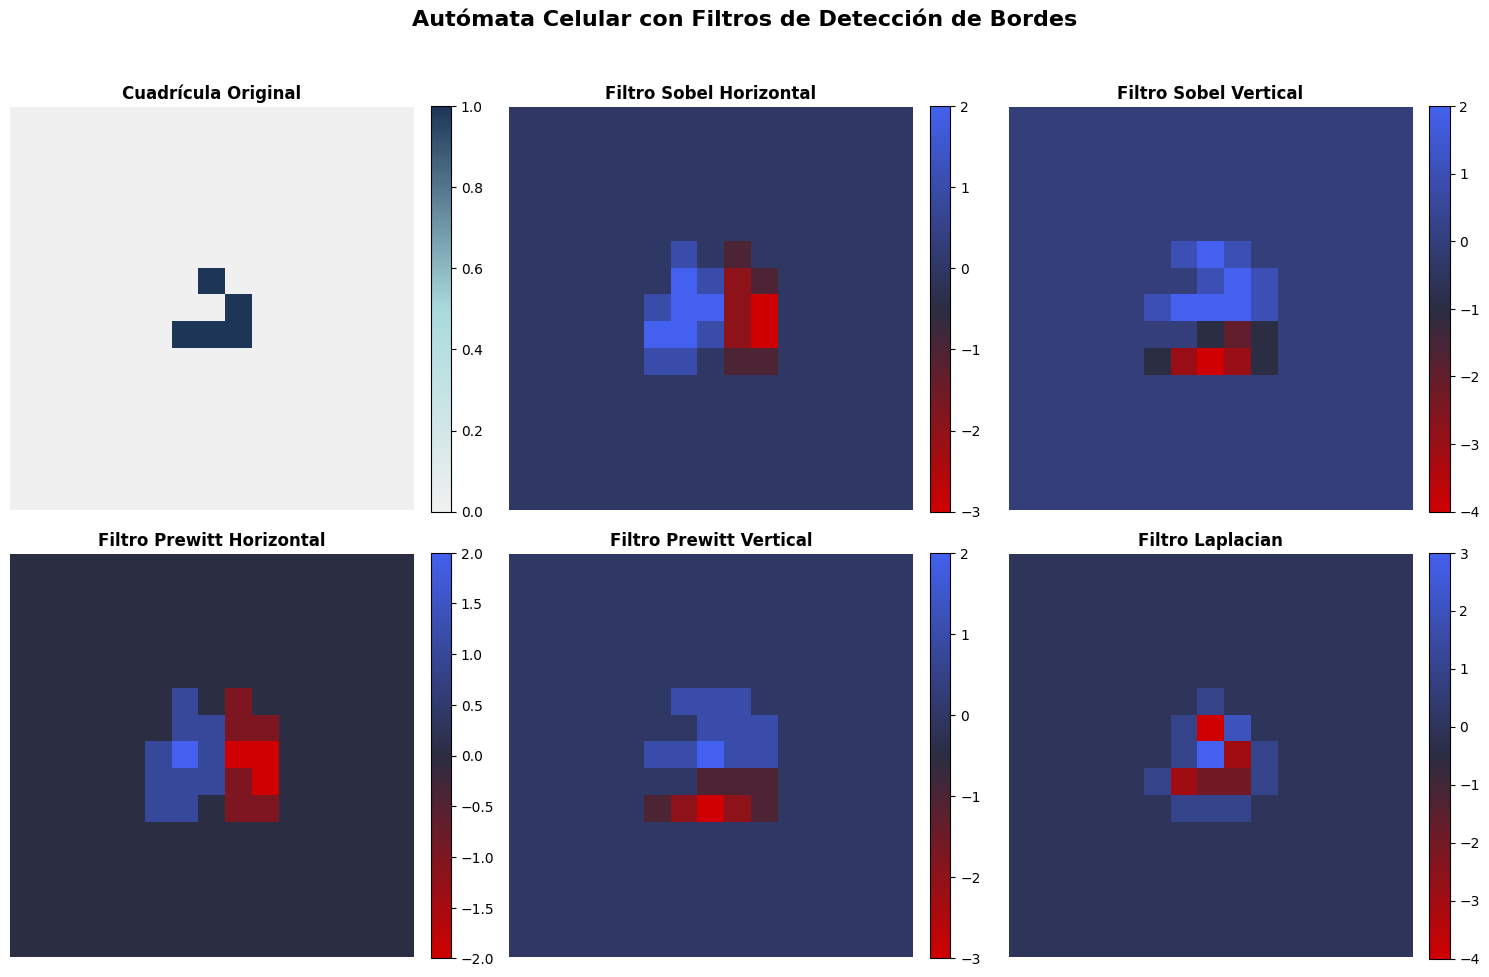


2. Visualización compuesta con filtro Sobel horizontal:

3. Visualización compuesta con filtro Laplaciano:

4. Animación del autómata celular con filtro Sobel:



5. Probando con patrón aleatorio y filtro Prewitt vertical:

6. Animación del patrón aleatorio con filtro Laplaciano:


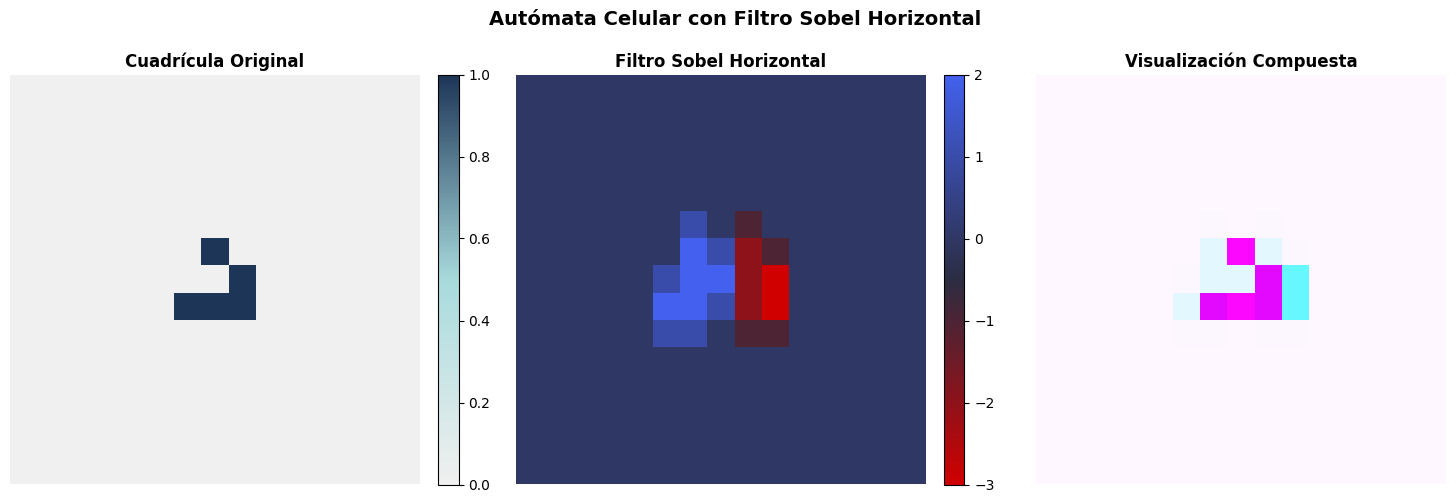

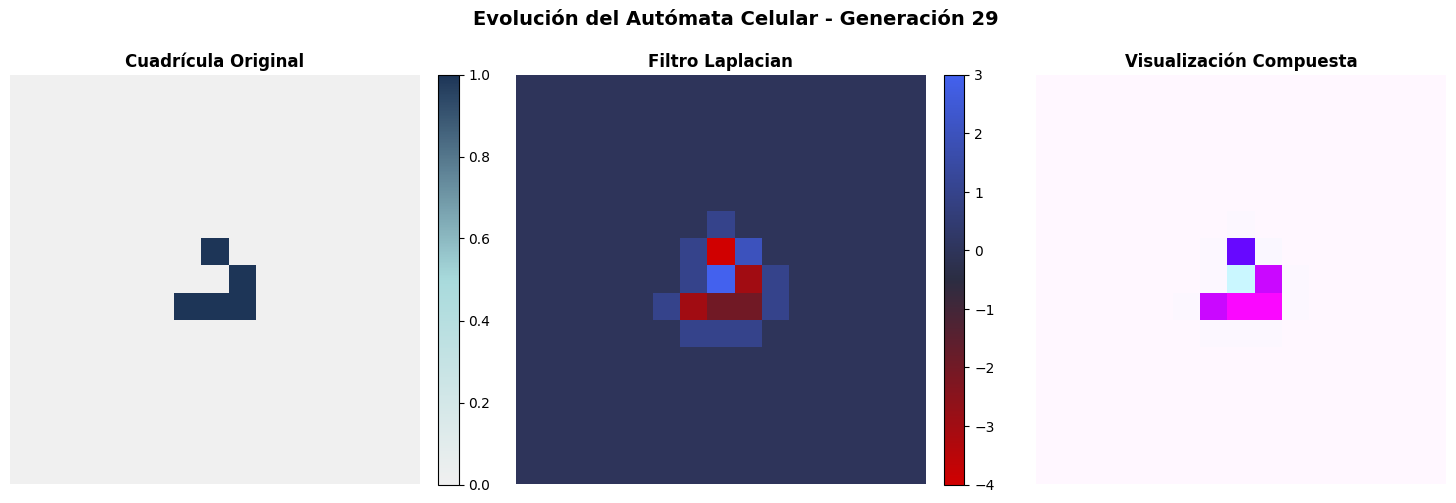

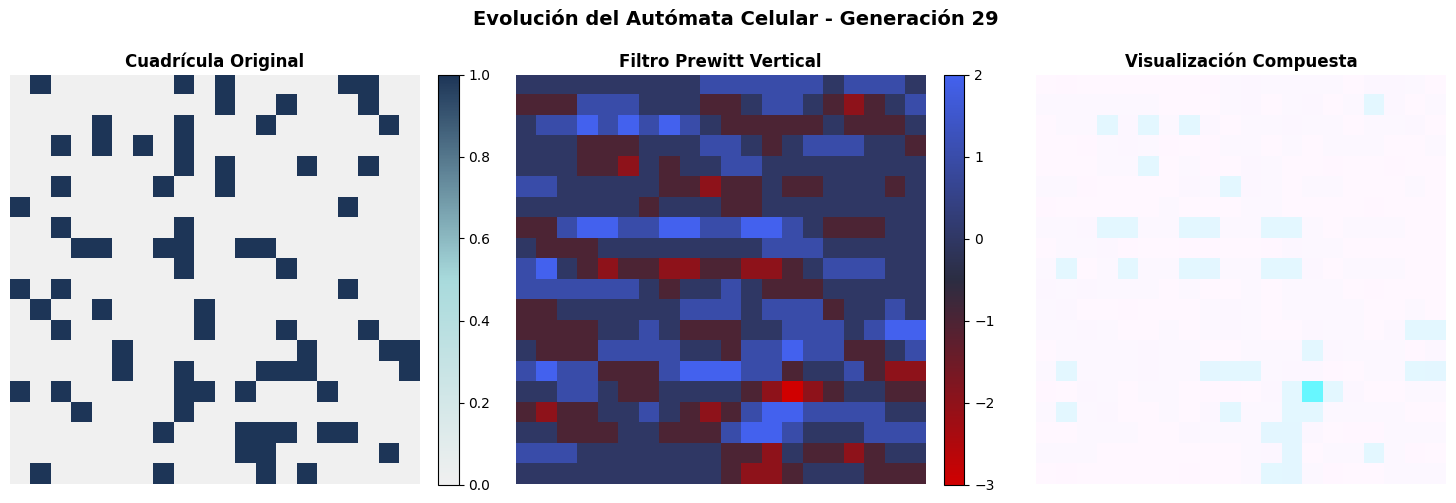

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm

class CellularAutomaton:
    def __init__(self, grid_size=15, initial_pattern="glider"):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size), dtype=np.float32)
        self.set_initial_pattern(initial_pattern)

        # Definir varios kernels de detección de bordes
        self.kernels = {
            "sobel_horizontal": np.array([
                [1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]
            ], dtype=np.float32),

            "sobel_vertical": np.array([
                [1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]
            ], dtype=np.float32),

            "prewitt_horizontal": np.array([
                [1, 0, -1],
                [1, 0, -1],
                [1, 0, -1]
            ], dtype=np.float32),

            "prewitt_vertical": np.array([
                [1, 1, 1],
                [0, 0, 0],
                [-1, -1, -1]
            ], dtype=np.float32),

            "laplacian": np.array([
                [0, 1, 0],
                [1, -4, 1],
                [0, 1, 0]
            ], dtype=np.float32)
        }

        # Crear colormaps personalizados
        self.create_colormaps()

    def create_colormaps(self):
        """Crear colormaps personalizados para las visualizaciones"""
        # Mapa de color para la cuadrícula original
        self.grid_cmap = LinearSegmentedColormap.from_list(
            'infection',
            [(0, '#f0f0f0'), (0.5, '#a8dadc'), (1, '#1d3557')],
            N=256
        )

        # Mapa de color para resultados de convolución
        self.edge_cmap = LinearSegmentedColormap.from_list(
            'edge_detection',
            ['#d00000', '#2b2d42', '#4361ee'],
            N=256
        )

    def set_initial_pattern(self, pattern):
        """Establecer patrón inicial"""
        center = self.grid_size // 2

        if pattern == "block":
            # Patrón de bloque 2x2
            self.grid[center-1:center+1, center-1:center+1] = 1

        elif pattern == "glider":
            # Patrón deslizador (glider) clásico
            glider = np.array([
                [0, 1, 0],
                [0, 0, 1],
                [1, 1, 1]
            ])
            self.grid[center-1:center+2, center-1:center+2] = glider

        elif pattern == "pulsar":
            # Patrón cruz central (simplificado)
            self.grid[center, center-2:center+3] = 1
            self.grid[center-2:center+3, center] = 1

        elif pattern == "random":
            # Patrón aleatorio
            self.grid = np.random.choice([0, 1], size=(self.grid_size, self.grid_size), p=[0.8, 0.2])

        else:  # "manual" - patrón manual similar al original
            self.grid[center-1:center+2, center-1:center+2] = 1

    def apply_edge_detection(self, kernel_name):
        """Aplicar detección de bordes usando el kernel especificado"""
        if kernel_name not in self.kernels:
            raise ValueError(f"Kernel '{kernel_name}' no encontrado")

        return convolve(self.grid, self.kernels[kernel_name], mode='constant', cval=0.0)

    def apply_edge_detection_all(self):
        """Aplicar todos los filtros de detección de bordes"""
        results = {}
        for name, kernel in self.kernels.items():
            results[name] = convolve(self.grid, kernel, mode='constant', cval=0.0)
        return results

    def update_grid(self):
        """Actualizar la cuadrícula según las reglas del juego de la vida de Conway"""
        # Definir el kernel para contar vecinos
        kernel = np.array([
            [1, 1, 1],
            [1, 0, 1],
            [1, 1, 1]
        ])

        # Contar vecinos para cada celda
        neighbors = convolve(self.grid, kernel, mode='constant', cval=0)

        # Aplicar reglas del juego de la vida
        new_grid = np.zeros_like(self.grid)

        # Regla 1: Una célula muerta con exactamente 3 vecinos vivos se convierte en viva
        new_grid[(self.grid == 0) & (neighbors == 3)] = 1

        # Regla 2: Una célula viva con 2 o 3 vecinos vivos sigue viva
        new_grid[(self.grid == 1) & ((neighbors == 2) | (neighbors == 3))] = 1

        self.grid = new_grid
        return self.grid

    def visualize_static(self):
        """Visualizar la cuadrícula original y todos los filtros de detección de bordes"""
        results = self.apply_edge_detection_all()
        n_filters = len(results)

        # Crear una figura con n_filters + 1 subplots
        fig = plt.figure(figsize=(15, 10))
        grid_spec = plt.GridSpec(2, 3, figure=fig)

        # Mostrar la cuadrícula original
        ax_original = fig.add_subplot(grid_spec[0, 0])
        im_original = ax_original.imshow(self.grid, cmap=self.grid_cmap, interpolation='nearest')
        ax_original.set_title("Cuadrícula Original", fontsize=12, fontweight='bold')
        ax_original.axis('off')
        plt.colorbar(im_original, ax=ax_original, fraction=0.046, pad=0.04)

        # Mostrar los resultados de los filtros
        positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

        for i, (name, result) in enumerate(results.items()):
            ax = fig.add_subplot(grid_spec[positions[i]])

            # Normalizar para mejor visualización
            vmin, vmax = np.min(result), np.max(result)

            im = ax.imshow(result, cmap=self.edge_cmap, interpolation='nearest', vmin=vmin, vmax=vmax)
            ax.set_title(f"Filtro {name.replace('_', ' ').title()}", fontsize=12, fontweight='bold')
            ax.axis('off')
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        plt.tight_layout()
        plt.suptitle("Autómata Celular con Filtros de Detección de Bordes", fontsize=16, fontweight='bold', y=0.98)
        plt.subplots_adjust(top=0.9)
        plt.show()

        return fig

    def animate(self, frames=50, kernel_name="sobel_horizontal"):
        """Crear una animación que muestra la evolución del autómata y la detección de bordes"""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Función de inicialización
        def init():
            axes[0].set_title("Autómata Celular", fontsize=12, fontweight='bold')
            axes[0].axis('off')

            axes[1].set_title(f"Filtro {kernel_name.replace('_', ' ').title()}", fontsize=12, fontweight='bold')
            axes[1].axis('off')

            return []

        # Función de actualización para cada frame
        def update(frame):
            axes[0].clear()
            axes[1].clear()

            if frame > 0:
                self.update_grid()

            axes[0].imshow(self.grid, cmap=self.grid_cmap, interpolation='nearest')
            axes[0].set_title("Autómata Celular", fontsize=12, fontweight='bold')
            axes[0].axis('off')

            edge_result = self.apply_edge_detection(kernel_name)
            img2 = axes[1].imshow(edge_result, cmap=self.edge_cmap, interpolation='nearest')
            axes[1].set_title(f"Filtro {kernel_name.replace('_', ' ').title()}", fontsize=12, fontweight='bold')
            axes[1].axis('off')

            plt.suptitle(f"Evolución del Autómata Celular - Generación {frame}",
                         fontsize=14, fontweight='bold')

            return []

        # Crear la animación
        anim = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=200)
        plt.tight_layout()
        plt.close()  # Prevenir que se muestre dos veces

        return HTML(anim.to_jshtml())

    def visualize_composite(self, kernel_name="sobel_horizontal"):
        """Crear una visualización compuesta combinando la cuadrícula y la detección de bordes"""
        # Aplicar el filtro
        edge_result = self.apply_edge_detection(kernel_name)

        # Normalizar para mejor visualización
        normalized_edge = np.abs(edge_result) / np.max(np.abs(edge_result)) if np.max(np.abs(edge_result)) > 0 else edge_result

        # Crear colormaps personalizados para la visualización
        cell_colormap = plt.cm.Blues
        edge_colormap = plt.cm.Reds

        # Crear una figura con subplots
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Mostrar la cuadrícula original
        im1 = axes[0].imshow(self.grid, cmap=self.grid_cmap, interpolation='nearest')
        axes[0].set_title("Cuadrícula Original", fontsize=12, fontweight='bold')
        axes[0].axis('off')
        plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

        # Mostrar la detección de bordes
        im2 = axes[1].imshow(edge_result, cmap=self.edge_cmap, interpolation='nearest')
        axes[1].set_title(f"Filtro {kernel_name.replace('_', ' ').title()}", fontsize=12, fontweight='bold')
        axes[1].axis('off')
        plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

        # Crear una visualización compuesta usando RGBA
        composite = np.zeros((self.grid_size, self.grid_size, 4))

        # Asignar canal R basado en la detección de bordes positivos
        composite[:,:,0] = edge_colormap(np.clip(normalized_edge, 0, 1))[:,:,0]

        # Asignar canal B basado en la detección de bordes negativos
        composite[:,:,2] = edge_colormap(np.clip(-normalized_edge, 0, 1))[:,:,0]

        # Asignar canal G basado en la cuadrícula original
        composite[:,:,1] = cell_colormap(self.grid)[:,:,0]

        # Asignar canal alpha
        composite[:,:,3] = 1.0

        # Mostrar la visualización compuesta
        im3 = axes[2].imshow(composite, interpolation='nearest')
        axes[2].set_title("Visualización Compuesta", fontsize=12, fontweight='bold')
        axes[2].axis('off')

        plt.tight_layout()
        plt.suptitle(f"Autómata Celular con Filtro {kernel_name.replace('_', ' ').title()}",
                     fontsize=14, fontweight='bold', y=0.98)
        plt.subplots_adjust(top=0.85)

        return fig

# Demostración del uso de la clase
def demonstrate_cellular_automaton():
    # Crear un autómata celular
    print("Inicializando Autómata Celular...")
    automaton = CellularAutomaton(grid_size=15, initial_pattern="glider")

    # Visualización estática
    print("\n1. Visualización estática de todos los filtros de detección de bordes:")
    automaton.visualize_static()

    # Visualización compuesta
    print("\n2. Visualización compuesta con filtro Sobel horizontal:")
    automaton.visualize_composite(kernel_name="sobel_horizontal")

    # Visualización compuesta con otro filtro
    print("\n3. Visualización compuesta con filtro Laplaciano:")
    automaton.visualize_composite(kernel_name="laplacian")

    # Animación
    print("\n4. Animación del autómata celular con filtro Sobel:")
    animation = automaton.animate(frames=30, kernel_name="sobel_horizontal")
    display(animation)

    print("\n5. Probando con patrón aleatorio y filtro Prewitt vertical:")
    automaton_random = CellularAutomaton(grid_size=20, initial_pattern="random")
    automaton_random.visualize_composite(kernel_name="prewitt_vertical")

    print("\n6. Animación del patrón aleatorio con filtro Laplaciano:")
    animation_random = automaton_random.animate(frames=30, kernel_name="laplacian")
    display(animation_random)

# Ejecutar la demostración
if __name__ == "__main__":
    demonstrate_cellular_automaton()